In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style 
import re
from copy import deepcopy
from collections import defaultdict


plt.rcParams['font.family'] = 'Times New Roman'
plot_dir = "./plots/"
#style.use('tableau-colorblind10')

class DataBase():
    def __init__(self):
        self.database = {}

    def get_data(self, model: str, dataset: str, initialization: str, optimizer: str)->dict:
        key = f"{model}.{dataset}.{initialization}.{optimizer}"
        if key not in self.database:
            self.database[key] = {"model": model, "dataset": dataset, "initialization": initialization, "optimizer": optimizer}
        return self.database[key]
    
database = DataBase()

In [19]:
def string_to_vect(input_string):
    lines = input_string.strip().split('\n')
    regnumber = re.compile(r'^\d+(?:.\d*)?$')
    matrix = defaultdict(list)
    for line in lines:
        split = re.split(';|,|:|%|/| ', line)
        for i, text in enumerate(split):
            if regnumber.match(text):
                matrix[i].append(text)

    line_i = 1
    print('data[""] = [', end="")
    for i in matrix:
        if line_i == 1:
            print('[', end="")
        else:
            print('        [', end="")
        for j in matrix[i][:-1]:
            print(j, end=", ")
        if line_i < len(matrix):
            print(matrix[i][-1], end="],\n")
        else:
            print(matrix[i][-1], end="]]\n")
        line_i += 1

def preprocess(data):
    # for pruningcriteria in ["l1", "random", "lobs", "nrelief"]:
    #     if pruningcriteria in data:
    #         base_acc_list = data[pruningcriteria][-1]
    #         for key in data:
    #             if pruningcriteria in key and "_" in key and isinstance(data[key], list):
    #                 acc_list = data[key][-1]
    #                 for i, acc in enumerate(acc_list):
    #                     base_acc = base_acc_list[i]
    #                     if base_acc > acc:
    #                         acc_list[i] = base_acc
    
    for key in data:
        if isinstance(data[key], list):
            data_list = data[key][0]
            for i, num in enumerate(data_list):
                data_list[i] = num / 100
            data[key][0] = data_list
            data_list = data[key][-1]
            for i, num in enumerate(data_list):
                data_list[i] = num / 100
            data[key][-1] = data_list
        if isinstance(data[key], float):
            data[key] = data[key] / 100

def plot_loss(model, dataset, show=False):
    plt.figure(figsize=(4, 2))

    initialization = "Fernandez Sinusoidal"
    for i, optimizer in enumerate(["SGD", "Adam", "AdamW"]):
        try:
            data = database.get_data(model, dataset, initialization, optimizer)
            label = optimizer + " with " + initialization
            alpha = (i+1) / 3
            epochs = np.arange(len(data["train_loss"])) + 1
            plt.plot(epochs, data["train_loss"],
                label=label, alpha=alpha,
                color='C2', linestyle='-', linewidth=2,
                marker='.', markersize=1)
        except:
            pass
        
    initialization = "Fernandez Sinusoidal 2"
    for i, optimizer in enumerate(["SGD", "Adam", "AdamW"]):
        try:
            data = database.get_data(model, dataset, initialization, optimizer)
            label = optimizer + " with " + initialization
            alpha = (i+1) / 3
            epochs = np.arange(len(data["train_loss"])) + 1
            plt.plot(epochs, data["train_loss"],
                label=label, alpha=alpha,
                color='C3', linestyle='-', linewidth=2,
                marker='.', markersize=1)
        except:
            print(f"{optimizer} fail")

    initialization = "Default initialization"
    for i, optimizer in enumerate(["SGD", "Adam", "AdamW"]):
        try:
            data = database.get_data(model, dataset, initialization, optimizer)
            label = optimizer + " with " + initialization
            alpha = (i+1) / 3
            epochs = np.arange(len(data["train_loss"])) + 1
            plt.plot(epochs, data["train_loss"],
                label=label, alpha=alpha,
                color='C1', linestyle='-', linewidth=2,
                marker='+', markersize=1)
        except:
            pass

    plt.xlabel('Epoch')
    plt.ylabel('Train Loss')
    plt.title(f'{data["model"]} on {data["dataset"]} Train Loss')

    #plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1)) 
    #plt.gca().xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1))
    #plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1))
    #plt.xlim(0, 1)
    #plt.ylim(0, 1)
    #plt.legend(loc="center left", bbox_to_anchor=(1.04, 0.5))
    plt.savefig(f'{plot_dir}loss_{data["model"].lower().replace("/","")}_{data["dataset"].lower()}.pdf', 
                format='pdf', bbox_inches='tight')

    # Show the plot
    if show:
        plt.show()
    else:
        plt.close()

def plot_acc(model, dataset, show=False):
    plt.figure(figsize=(4, 2))

    initialization = "Fernandez Sinusoidal"
    for i, optimizer in enumerate(["SGD", "Adam", "AdamW"]):
        try:
            data = database.get_data(model, dataset, initialization, optimizer)
            label = optimizer + " with " + initialization
            alpha = (i+1) / 3
            epochs = np.arange(len(data["val_metric"])) + 1
            acc = np.array(data["val_metric"])
            if acc[-1] > 1:
                acc = acc / 100
            plt.plot(epochs, acc,
                label=label, alpha=alpha,
                color='C2', linestyle='-', linewidth=2,
                marker='.', markersize=1)
        except:
            print(f"{optimizer} fail")

    initialization = "Fernandez Sinusoidal 2"
    for i, optimizer in enumerate(["SGD", "Adam", "AdamW"]):
        try:
            data = database.get_data(model, dataset, initialization, optimizer)
            label = optimizer + " with " + initialization
            alpha = (i+1) / 3
            epochs = np.arange(len(data["val_metric"])) + 1
            acc = np.array(data["val_metric"])
            if acc[-1] > 1:
                acc = acc / 100
            plt.plot(epochs, acc,
                label=label, alpha=alpha,
                color='C3', linestyle='-', linewidth=2,
                marker='.', markersize=1)
        except:
            pass


    initialization = "Default initialization"
    for i, optimizer in enumerate(["SGD", "Adam", "AdamW"]):
        try:
            data = database.get_data(model, dataset, initialization, optimizer)
            label = optimizer + " with " + initialization
            alpha = (i+1) / 3
            epochs = np.arange(len(data["val_metric"])) + 1
            acc = np.array(data["val_metric"])
            if acc[-1] > 1:
                acc = acc / 100
            plt.plot(epochs, acc,
                label=label, alpha=alpha,
                color='C1', linestyle='-', linewidth=2,
                marker='+', markersize=1)
        except:
            pass

    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.title(f'{data["model"]} on {data["dataset"]} Validation Accuracy')

    #plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1)) 
    #plt.gca().xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1))
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1))
    #plt.xlim(0, 1)
    #plt.ylim(0, 1)
    #plt.legend(loc="center left", bbox_to_anchor=(1.04, 0.5))
    plt.savefig(f'{plot_dir}acc_{data["model"].lower().replace("/","")}_{data["dataset"].lower()}.pdf', 
                format='pdf', bbox_inches='tight')

    # Show the plot
    if show:
        plt.show()
    else:
        plt.close()

def plot_legend():
    x,y = range(5), range(5)
    legendFig = plt.figure("Legend plot", figsize=(4,2))
    fig = plt.figure("Line plot")
    ax = fig.add_subplot(111)
    model = "ResNet-50"
    dataset = "CIFAR-100"

    lines = []
    labels = []

    for i, optimizer in enumerate(["SGD", "Adam", "AdamW"]):    
        for j, initialization in enumerate(["Fernandez Sinusoidal", "Default initialization"]):
            data = database.get_data(model, dataset, initialization, optimizer)
            label = optimizer + " with " + initialization
            labels += [label]
            alpha = (i+1) / 3
            epochs = np.arange(len(data["val_metric"])) + 1
            acc = np.array(data["val_metric"])
            if acc[-1] > 1:
                acc = acc / 100

            if j == 0:
                line, = ax.plot(epochs, acc,
                    label=label, alpha=alpha,
                    color='C2', linestyle='-', linewidth=2,
                    marker='.', markersize=1)
            else:
                line, = ax.plot(epochs, acc,
                    label=label, alpha=alpha,
                    color='C1', linestyle='-', linewidth=2,
                    marker='+', markersize=1)

            lines += [line]
            
    
    legendFig.legend(lines, labels, ncol=3, loc='center')
    legendFig.savefig(f'{plot_dir}legend.pdf', 
                      format='pdf', bbox_inches='tight')
    
    plt.close()

def plot_fpo(data, show=False):
    fig, ax1 = plt.subplots(figsize=(4, 2))
    #ax1 = plt.figure(figsize=(4, 2))
    ax2 = ax1.twinx() 
    
    fpo_shape = data["fpo_shape"]
    batch_size = data["batch_size"]

    # Fine Tuning
    fpo = 0
    for l in range(len(fpo_shape[0])):
        fpo += fpo_shape[0][l] * fpo_shape[1][l] * fpo_shape[2][l] 
    fpo = fpo * 2 / batch_size
    fpo_array = np.zeros(len(data["l1"][0]))
    epochs = data["l1_finetuning"][1]
    for i in range(fpo_array.shape[0]):
        fpo_array[i] = 3 * fpo * data["samples"] * epochs[i]
    ax1.plot(data["l1_finetuning"][0], fpo_array, 
             label='Fine Tuning FLOPs', 
             color='C1', linestyle='-', linewidth=2,
             marker='.', markersize=6)
    ax2.plot(data["l1_finetuning"][0], data["l1_finetuning"][2], 
             label='Fine Tuning Accuracy', 
             color='C1', linestyle='--', linewidth=1,
             marker='.', markersize=3)
    

    # SVD
    pruning_rate = data["l1_nm_svd"][0]
    fpo_array = np.zeros(len(pruning_rate))
    for i in range(fpo_array.shape[0]):
        fpo_array[i] = 2 * fpo * data["nm_samples"]
        for l in range(len(fpo_shape[0])):
            _b, _i, _o = fpo_shape[0][l], fpo_shape[1][l], fpo_shape[2][l]
            m = np.min([data["nm_samples"] * _b / data["batch_size"], data["store_factor"] * _i])
            n = _i * (1 - pruning_rate[i])
            fpo_array[i] += _o * 2 * (n**2 * (m - (n/3)) + n**2 + m**2 + m*n)
    ax1.plot(data["l1_nm_svd"][0], fpo_array, 
             label='N. Mimicking SVD FLOPs', 
             color='C4', linestyle='-', linewidth=2,
             marker='x', markersize=6)
    ax2.plot(data["l1_nm_svd"][0], data["l1_nm_svd"][1], 
             label='N. Mimicking SVD Accuracy', 
             color='C4', linestyle='--', linewidth=1,
             marker='x', markersize=3)
    
    # LBFGS
    pruning_rate = data["l1_nm_lbfgs"][0]
    fpo_array = np.zeros(len(pruning_rate))
    for i in range(fpo_array.shape[0]):
        fpo_array[i] = 2 * fpo * data["nm_samples"]
        for l in range(len(fpo_shape[0])):
            _b, _i, _o = fpo_shape[0][l], fpo_shape[1][l], fpo_shape[2][l]
            m = np.min([data["nm_samples"] * _b / data["batch_size"], data["store_factor"] * _i])
            fpo_array[i] += 200 * _o * m * _i + 2000 * _o * _i 
    ax1.plot(data["l1_nm_lbfgs"][0], fpo_array, 
             label='N. Mimicking L-BFGS FLOPs', 
             color='C2', linestyle='-', linewidth=2,
             marker='+', markersize=8)
    ax2.plot(data["l1_nm_lbfgs"][0], data["l1_nm_lbfgs"][1], 
             label='N. Mimicking L-BFGS Accuracy', 
             color='C2', linestyle='--', linewidth=1,
             marker='+', markersize=4)

    
    ax1.set_xlabel('Parameters pruned (%)')
    ax1.set_ylabel('FLOPs')
    ax2.set_ylabel('Test accuracy (%)')
    ax1.title.set_text(f'{data["model"]} on {data["dataset"]}')

    fig.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1)) 
    fig.gca().xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1))
    ax1.set_yscale('log')
    fig.savefig(f'{plot_dir}flop_{data["model"].lower().replace("/","")}_{data["dataset"].lower()}.pdf', 
                format='pdf', bbox_inches='tight')

    # Show the plot
    if show:
        fig.show()
    else:
        plt.close(fig)

def plot_fpo2(data, show=False):
    fig, ax2 = plt.subplots(figsize=(4, 2))
    #ax1 = plt.figure(figsize=(4, 2))
    ax1 = ax2.twinx() 

    
    flops = {}
    
    fpo_shape = data["fpo_shape"]
    batch_size = data["batch_size"]

    # Fine Tuning
    fpo = 0
    for l in range(len(fpo_shape[0])):
        fpo += fpo_shape[0][l] * fpo_shape[1][l] * fpo_shape[2][l] 
    fpo = fpo * 2 / batch_size
    fpo_array = np.zeros(len(data["l1"][0]))
    epochs = data["l1_finetuning"][1]
    for i in range(fpo_array.shape[0]):
        fpo_array[i] = 3 * fpo * data["samples"] * epochs[i]
    flops["Fine Tuning FLOPs"] = fpo_array

    # SVD
    pruning_rate = data["l1_nm_svd"][0]
    fpo_array = np.zeros(len(pruning_rate))
    for i in range(fpo_array.shape[0]):
        fpo_array[i] = 2 * fpo * data["nm_samples"]
        for l in range(len(fpo_shape[0])):
            _b, _i, _o = fpo_shape[0][l], fpo_shape[1][l], fpo_shape[2][l]
            m = np.min([data["nm_samples"] * _b / data["batch_size"], data["store_factor"] * _i])
            n = _i * (1 - pruning_rate[i])
            fpo_array[i] += _o * 2 * (n**2 * (m - (n/3)) + n**2 + m**2 + m*n)
    flops["N. Mimicking SVD FLOPs"] = fpo_array
    
    # LBFGS
    pruning_rate = data["l1_nm_lbfgs"][0]
    fpo_array = np.zeros(len(pruning_rate))
    for i in range(fpo_array.shape[0]):
        fpo_array[i] = 2 * fpo * data["nm_samples"]
        for l in range(len(fpo_shape[0])):
            _b, _i, _o = fpo_shape[0][l], fpo_shape[1][l], fpo_shape[2][l]
            m = np.min([data["nm_samples"] * _b / data["batch_size"], data["store_factor"] * _i])
            fpo_array[i] += 200 * _o * m * _i + 2000 * _o * _i 
    flops["N. Mimicking L-BFGS FLOPs"] = fpo_array
    

    pruning = np.array(data["l1_finetuning"][0])
    colors = ["C1", "C4", "C2"]
    width = 0.023
    i = 0
    for attribute, measurement in flops.items():
        offset = width * (i-1)
        ax2.bar(pruning + offset, measurement, width, label=attribute, color=colors[i], alpha=0.7)
        i += 1


    # Fine Tuning
    ax1.plot(data["l1_finetuning"][0], data["l1_finetuning"][2], 
             label='Fine Tuning FLOPs', 
             color='C1', linestyle='--', linewidth=2,
             marker='.', markersize=6)

    # SVD
    ax1.plot(data["l1_nm_svd"][0], data["l1_nm_svd"][1], 
             label='N. Mimicking SVD Accuracy', 
             color='C4', linestyle='--', linewidth=2,
             marker='x', markersize=6)
    
    # LBFGS
    ax1.plot(data["l1_nm_lbfgs"][0], data["l1_nm_lbfgs"][1], 
             label='N. Mimicking L-BFGS Accuracy', 
             color='C2', linestyle='--', linewidth=2,
             marker='+', markersize=8)
    

    ax2.set_ylabel('FLOPs')
    ax2.set_xlabel('Parameters pruned (%)')
    ax1.set_ylabel('Test accuracy (%)')
    ax1.title.set_text(f'{data["model"]} on {data["dataset"]}')

    fig.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1)) 
    fig.gca().xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1))
    ax2.set_yscale('log')
    fig.savefig(f'{plot_dir}flop_{data["model"].lower().replace("/","")}_{data["dataset"].lower()}.pdf', 
                format='pdf', bbox_inches='tight')

    # Show the plot
    if show:
        fig.show()
    else:
        plt.close(fig)

    return flops

def plot_legend_fpo():
    x,y = range(5), range(5)
    legendFig = plt.figure("Legend plot fpo", figsize=(4,2))
    fig = plt.figure("Line plot")
    ax = fig.add_subplot(111)

    lines = []
    line, = ax.plot(x,y, 
             label='Fine Tuning FLOPs', 
             color='C1', linestyle='-', linewidth=2,
             marker='.', markersize=6)
    lines += [line]
    line, = ax.plot(x,y, 
             label='Fine Tuning Acc.', 
             color='C1', linestyle='--', linewidth=1,
             marker='.', markersize=6)
    lines += [line]
    line, = ax.plot(x,y, 
             label='N. Mimicking SVD FLOPs', 
             color='C4', linestyle='-', linewidth=2,
             marker='x', markersize=6)
    lines += [line]
    line, = ax.plot(x,y, 
             label='N. Mimicking SVD acc.', 
             color='C4', linestyle='--', linewidth=1,
             marker='x', markersize=6)
    lines += [line]
    line, = ax.plot(x,y, 
             label='N. Mimicking L-BFGS FLOPs', 
             color='C2', linestyle='-', linewidth=2,
             marker='+', markersize=8)
    lines += [line]
    line, = ax.plot(x,y, 
             label='N. Mimicking L-BFGS acc.', 
             color='C2', linestyle='--', linewidth=1,
             marker='+', markersize=8)
    lines += [line]


    labels = ['Fine Tuning FLOPs', 'Fine Tuning Accuracy', 
              'N. Mimicking SVD FLOPs', 'N. Mimicking SVD Accuracy',
              'N. Mimicking L-BFGS FLOPs', 'N. Mimicking L-BFGS Accuracy']
    
    legendFig.legend(lines, labels, ncol=3, loc='center')
    legendFig.savefig(f'{plot_dir}legend_fpo.pdf', 
                      format='pdf', bbox_inches='tight')
    
    plt.close()

def plot_legend_fpo2():
    x,y = range(1), range(1)
    legendFig = plt.figure("Legend plot fpo", figsize=(4,2))
    fig = plt.figure("Line plot")
    ax = fig.add_subplot(111) 

    lines = []
    line, = ax.bar(x, height=y,
             label='Fine Tuning FLOPs', 
             color='C1', alpha=0.7)
    lines += [line]
    line, = ax.plot(x,y, 
             label='Fine Tuning Acc.', 
             color='C1', linestyle='--', linewidth=2,
             marker='.', markersize=6)
    lines += [line]
    line, = ax.bar(x,y, 
             label='N. Mimicking SVD FLOPs', 
             color='C4', alpha=0.7)
    lines += [line]
    line, = ax.plot(x,y, 
             label='N. Mimicking SVD Acc.', 
             color='C4', linestyle='--', linewidth=2,
             marker='x', markersize=6)
    lines += [line]
    line, = ax.bar(x,y, 
             label='N. Mimicking L-BFGS FLOPs', 
             color='C2', alpha=0.7)
    lines += [line]
    line, = ax.plot(x,y, 
             label='N. Mimicking L-BFGS Acc.', 
             color='C2', linestyle='--', linewidth=2,
             marker='+', markersize=8)
    lines += [line]


    labels = ['Fine Tuning FLOPs', 'Fine Tuning Accuracy', 
              'N. Mimicking SVD FLOPs', 'N. Mimicking SVD Accuracy',
              'N. Mimicking L-BFGS FLOPs', 'N. Mimicking L-BFGS Accuracy']
    
    legendFig.legend(lines, labels, ncol=3, loc='center')
    legendFig.savefig(f'{plot_dir}legend_fpo.pdf', 
                      format='pdf', bbox_inches='tight')
    
    plt.close()

def plot_pruningcriteria(data, show=False):
    plt.figure(figsize=(4, 2))
    plt.plot(data["l1"][0], [data["accuracy"]]*9, 
             label='Original accuracy', 
             color='gray', linestyle='--')
    plt.plot(data["l1"][0], data["l1"][-1], 
             label='L1 pruning', 
             color='C1', linestyle='--', linewidth=1,
             marker='.', markersize=9)
    plt.plot(data["l1_nm_lbfgs"][0], data["l1_nm_lbfgs"][-1], 
             label='L1 pruning + N. Mimicking', 
             color='C1', linestyle='-', linewidth=2,
             marker='.', markersize=9)
    plt.plot(data["random"][0], data["random"][-1], 
             label='Random pruning', 
             color='C2', linestyle='--', linewidth=1,
             marker='+', markersize=8)
    plt.plot(data["random_nm_lbfgs"][0], data["random_nm_lbfgs"][-1], 
             label='Random pruning + N. Mimicking', 
             color='C2', linestyle='-', linewidth=2,
             marker='+', markersize=8)
    plt.plot(data["lobs"][0], data["lobs"][-1], 
             label='L-OBS pruning', 
             color='C3', linestyle='--', linewidth=1,
             marker='x', markersize=6)
    plt.plot(data["lobs_nm_lbfgs"][0], data["lobs_nm_lbfgs"][-1], 
             label='L-OBS pruning + N. Mimicking', 
             color='C3', linestyle='-', linewidth=2,
             marker='x', markersize=6)
    plt.plot(data["nrelief"][0], data["nrelief"][-1], 
             label='N. Relief pruning', 
             color='C4', linestyle='--', linewidth=1,
             marker='s', markersize=4)
    plt.plot(data["nrelief_nm_lbfgs"][0], data["nrelief_nm_lbfgs"][-1], 
             label='N. Relief pruning + N. Mimicking', 
             color='C4', linestyle='-', linewidth=2,
             marker='s', markersize=4)

    plt.xlabel('Parameters pruned (%)')
    plt.ylabel('Test accuracy (%)')
    plt.title(f'{data["model"]} on {data["dataset"]}')

    plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1)) 
    plt.gca().xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1))
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1))
    #plt.xlim(0, 1)
    #plt.ylim(0, 1)
    #plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
    plt.savefig(f'{plot_dir}pruningcriteria_{data["model"].lower().replace("/","")}_{data["dataset"].lower()}_acc.pdf', 
                format='pdf', bbox_inches='tight')

    # Show the plot
    if show:
        plt.show()
    else:
        plt.close()

def plot_legend_pruningcriteria():
    x,y = range(5), range(5)
    legendFig = plt.figure("Legend plot pruningcriteria", figsize=(4,2))
    fig = plt.figure("Line plot")
    ax = fig.add_subplot(111)

    lines = []
    line, = ax.plot(x,y,
             label='L1 pruning', 
             color='C1', linestyle='--', linewidth=1,
             marker='.', markersize=9)
    lines += [line]
    line, = ax.plot(x,y,
             label='L1 pruning + N. Mimicking', 
             color='C1', linestyle='-', linewidth=2,
             marker='.', markersize=9)
    lines += [line]
    line, = ax.plot(x,y,
             label='Random pruning', 
             color='C2', linestyle='--', linewidth=1,
             marker='+', markersize=8)
    lines += [line]
    line, = ax.plot(x,y,
             label='Random pruning + N. Mimicking', 
             color='C2', linestyle='-', linewidth=2,
             marker='+', markersize=8)
    lines += [line]
    line, = ax.plot(x,y,
             label='L-OBS pruning', 
             color='C3', linestyle='--', linewidth=1,
             marker='x', markersize=6)
    lines += [line]
    line, = ax.plot(x,y,
             label='L-OBS pruning + N. Mimicking', 
             color='C3', linestyle='-', linewidth=2,
             marker='x', markersize=6)
    lines += [line]
    line, = ax.plot(x,y,
             label='N. Relief pruning', 
             color='C4', linestyle='--', linewidth=1,
             marker='s', markersize=4)
    lines += [line]
    line, = ax.plot(x,y,
             label='N. Relief pruning + N. Mimicking', 
             color='C4', linestyle='-', linewidth=2,
             marker='s', markersize=4)
    lines += [line]
    line, = ax.plot(x,y,
             label='Original accuracy', 
             color='gray', linestyle='--')
    lines += [line]



    labels = ['L1 pruning', 'L1 pruning + N. Mimicking',
              'Random pruning', 'Random pruning + N. Mimicking', 
              'L-OBS pruning', 'L-OBS pruning + N. Mimicking',
              'N. Relief pruning', 'N. Relief pruning + N. Mimicking',
              'Original accuracy']
    
    legendFig.legend(lines, labels, ncol=5, loc='center')
    legendFig.savefig(f'{plot_dir}legend_pruningcriteria.pdf', 
                      format='pdf', bbox_inches='tight')
    
    plt.close()

def plot_solvingmethods(data, show=False):
    plt.figure(figsize=(4, 2))
    plt.plot(data["l1"][0], [data["accuracy"]]*9, 
             label='Original accuracy', 
             color='gray', linestyle='--')
    plt.plot(data["l1"][0], data["l1"][-1], 
             label='L1 pruning', 
             color='gray', linestyle='-')
    plt.plot(data["l1_nm_sgd"][0], data["l1_nm_sgd"][-1], 
             label='L1 pruning + N. Mimicking SGD', 
             color='C1', linestyle='-', linewidth=2,
             marker='.', markersize=6)
    plt.plot(data["l1_nm_lbfgs"][0], data["l1_nm_lbfgs"][-1], 
             label='L1 pruning + N. Mimicking L-BFGS', 
             color='C2', linestyle='-', linewidth=2,
             marker='+', markersize=8)
    plt.plot(data["l1_nm_qr"][0], data["l1_nm_qr"][-1], 
             label='L1 pruning + N. Mimicking RRQR', 
             color='C3', linestyle='-', linewidth=2,
             marker='s', markersize=4)
    plt.plot(data["l1_nm_svd"][0], data["l1_nm_svd"][-1], 
             label='L1 pruning + N. Mimicking SVD', 
             color='C4', linestyle='-', linewidth=2,
             marker='x', markersize=6)

    plt.xlabel('Parameters pruned (%)')
    plt.ylabel('Test accuracy (%)')
    plt.title(f'{data["model"]} on {data["dataset"]}')

    plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1)) 
    plt.gca().xaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1))
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1))
    #plt.xlim(0, 1)
    #plt.ylim(0, 1)
    #plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
    plt.savefig(f'{plot_dir}solvers_{data["model"].lower().replace("/","")}_{data["dataset"].lower()}.pdf', 
                format='pdf', bbox_inches='tight')

    # Show the plot
    if show:
        plt.show()
    else:
        plt.close()

def plot_legend_solvingmethods():
    x,y = range(5), range(5)
    legendFig = plt.figure("Legend plot solvingmethods", figsize=(4,2))
    fig = plt.figure("Line plot")
    ax = fig.add_subplot(111)

    lines = []
    line, = ax.plot(x,y,
             label='Original accuracy', 
             color='gray', linestyle='--')
    lines += [line]
    line, = ax.plot(x,y,
             label='L1 pruning', 
             color='gray', linestyle='-')
    lines += [line]
    line, = ax.plot(x,y,
             label='L1 pruning + N. Mimicking SGD', 
             color='C1', linestyle='-', linewidth=2,
             marker='.', markersize=6)
    lines += [line]
    line, = ax.plot(x,y,
             label='L1 pruning + N. Mimicking L-BFGS', 
             color='C2', linestyle='-', linewidth=2,
             marker='+', markersize=8)
    lines += [line]
    line, = ax.plot(x,y,
             label='L1 pruning + N. Mimicking RRQR', 
             color='C3', linestyle='-', linewidth=2,
             marker='s', markersize=4)
    lines += [line]
    line, = ax.plot(x,y,
             label='L1 pruning + N. Mimicking SVD', 
             color='C4', linestyle='-', linewidth=2,
             marker='x', markersize=6)
    lines += [line]

    labels = ['Original accuracy', 'L1 pruning',
              'L1 pruning + N. Mimicking SGD', 'L1 pruning + N. Mimicking L-BFGS', 
              'L1 pruning + N. Mimicking RRQR', 'L1 pruning + N. Mimicking SVD']
    
    legendFig.legend(lines, labels, ncol=3, loc='center')
    legendFig.savefig(f'{plot_dir}legend_solvers.pdf', 
                      format='pdf', bbox_inches='tight')
    
    plt.close()

def to_csv(data):
    print(f'{data["model"]}; {data["dataset"]}')
    for key, value in data.items():
        if key in ["model", "dataset"]:
            pass
        elif value is None:
            print(f"{key}; Not yet")
        elif not isinstance(value, list):
            print(f"{key}; {value}")
        else:
            print(f"{key} pruning rate", end=";")
            for x in value[0]:
                print(x, end=";")
            print()
            print(f"{key} accuracy", end=";")
            for x in value[-1]:
                print(x, end=";")
            print()
    
    print("\n\n")



In [ ]:
input_string = '''
Epoch   1/100: Train Acc: 2.12%. Val Acc: 3.06%. - learning rate: 0.0010
Epoch   2/100: Train Acc: 3.48%. Val Acc: 3.89%. - learning rate: 0.0010
Epoch   3/100: Train Acc: 4.60%. Val Acc: 5.60%. - learning rate: 0.0010
Epoch   4/100: Train Acc: 5.97%. Val Acc: 7.09%. - learning rate: 0.0010
Epoch   5/100: Train Acc: 7.08%. Val Acc: 7.61%. - learning rate: 0.0010
Epoch   6/100: Train Acc: 8.25%. Val Acc: 9.30%. - learning rate: 0.0010
Epoch   7/100: Train Acc: 9.77%. Val Acc: 10.92%. - learning rate: 0.0010
Epoch   8/100: Train Acc: 10.70%. Val Acc: 10.66%. - learning rate: 0.0010
Epoch   9/100: Train Acc: 11.87%. Val Acc: 12.93%. - learning rate: 0.0010
Epoch  10/100: Train Acc: 12.99%. Val Acc: 13.89%. - learning rate: 0.0010
Epoch  11/100: Train Acc: 13.92%. Val Acc: 14.79%. - learning rate: 0.0010
Epoch  12/100: Train Acc: 14.66%. Val Acc: 15.51%. - learning rate: 0.0010
Epoch  13/100: Train Acc: 15.76%. Val Acc: 16.65%. - learning rate: 0.0010
Epoch  14/100: Train Acc: 16.49%. Val Acc: 17.24%. - learning rate: 0.0010
Epoch  15/100: Train Acc: 17.65%. Val Acc: 17.74%. - learning rate: 0.0010
Epoch  16/100: Train Acc: 18.39%. Val Acc: 19.04%. - learning rate: 0.0010
Epoch  17/100: Train Acc: 19.12%. Val Acc: 19.67%. - learning rate: 0.0010
Epoch  18/100: Train Acc: 19.90%. Val Acc: 20.58%. - learning rate: 0.0010
Epoch  19/100: Train Acc: 20.72%. Val Acc: 21.45%. - learning rate: 0.0010
Epoch  20/100: Train Acc: 21.60%. Val Acc: 22.69%. - learning rate: 0.0010
Epoch  21/100: Train Acc: 22.45%. Val Acc: 23.49%. - learning rate: 0.0010
Epoch  22/100: Train Acc: 23.36%. Val Acc: 23.69%. - learning rate: 0.0010
Epoch  23/100: Train Acc: 23.92%. Val Acc: 23.87%. - learning rate: 0.0010
Epoch  24/100: Train Acc: 24.61%. Val Acc: 24.62%. - learning rate: 0.0010
Epoch  25/100: Train Acc: 25.27%. Val Acc: 25.02%. - learning rate: 0.0010
Epoch  26/100: Train Acc: 26.32%. Val Acc: 26.19%. - learning rate: 0.0010
Epoch  27/100: Train Acc: 26.72%. Val Acc: 26.72%. - learning rate: 0.0010
Epoch  28/100: Train Acc: 27.51%. Val Acc: 26.94%. - learning rate: 0.0010
Epoch  29/100: Train Acc: 27.84%. Val Acc: 27.69%. - learning rate: 0.0010
Epoch  30/100: Train Acc: 28.95%. Val Acc: 28.53%. - learning rate: 0.0010
Epoch  31/100: Train Acc: 29.38%. Val Acc: 29.24%. - learning rate: 0.0010
Epoch  32/100: Train Acc: 29.89%. Val Acc: 29.91%. - learning rate: 0.0010
Epoch  33/100: Train Acc: 30.60%. Val Acc: 29.81%. - learning rate: 0.0010
Epoch  34/100: Train Acc: 31.05%. Val Acc: 30.49%. - learning rate: 0.0010
Epoch  35/100: Train Acc: 31.76%. Val Acc: 31.13%. - learning rate: 0.0010
Epoch  36/100: Train Acc: 32.30%. Val Acc: 31.92%. - learning rate: 0.0010
Epoch  37/100: Train Acc: 33.10%. Val Acc: 30.32%. - learning rate: 0.0010
Epoch  38/100: Train Acc: 33.57%. Val Acc: 32.41%. - learning rate: 0.0010
Epoch  39/100: Train Acc: 33.89%. Val Acc: 32.43%. - learning rate: 0.0010
Epoch  40/100: Train Acc: 34.48%. Val Acc: 33.39%. - learning rate: 0.0010
Epoch  41/100: Train Acc: 35.41%. Val Acc: 32.78%. - learning rate: 0.0010
Epoch  42/100: Train Acc: 35.83%. Val Acc: 34.30%. - learning rate: 0.0010
Epoch  43/100: Train Acc: 36.28%. Val Acc: 34.89%. - learning rate: 0.0010
Epoch  44/100: Train Acc: 36.81%. Val Acc: 34.45%. - learning rate: 0.0010
Epoch  45/100: Train Acc: 37.23%. Val Acc: 34.72%. - learning rate: 0.0010
Epoch  46/100: Train Acc: 38.09%. Val Acc: 35.12%. - learning rate: 0.0010
Epoch  47/100: Train Acc: 38.44%. Val Acc: 36.78%. - learning rate: 0.0010
Epoch  48/100: Train Acc: 39.01%. Val Acc: 35.93%. - learning rate: 0.0010
Epoch  49/100: Train Acc: 39.60%. Val Acc: 37.13%. - learning rate: 0.0010
Epoch  50/100: Train Acc: 39.85%. Val Acc: 36.96%. - learning rate: 0.0010
Epoch  51/100: Train Acc: 40.32%. Val Acc: 37.79%. - learning rate: 0.0010
Epoch  52/100: Train Acc: 40.90%. Val Acc: 38.06%. - learning rate: 0.0010
Epoch  53/100: Train Acc: 41.16%. Val Acc: 37.93%. - learning rate: 0.0010
Epoch  54/100: Train Acc: 42.10%. Val Acc: 38.64%. - learning rate: 0.0010
Epoch  55/100: Train Acc: 42.35%. Val Acc: 38.25%. - learning rate: 0.0010
Epoch  56/100: Train Acc: 42.68%. Val Acc: 39.86%. - learning rate: 0.0010
Epoch  57/100: Train Acc: 43.34%. Val Acc: 39.60%. - learning rate: 0.0010
Epoch  58/100: Train Acc: 43.92%. Val Acc: 39.65%. - learning rate: 0.0010
Epoch  59/100: Train Acc: 44.44%. Val Acc: 40.06%. - learning rate: 0.0010
Epoch  60/100: Train Acc: 44.47%. Val Acc: 40.91%. - learning rate: 0.0010
Epoch  61/100: Train Acc: 45.08%. Val Acc: 41.46%. - learning rate: 0.0010
Epoch  62/100: Train Acc: 45.65%. Val Acc: 40.60%. - learning rate: 0.0010
Epoch  63/100: Train Acc: 45.78%. Val Acc: 40.90%. - learning rate: 0.0010
Epoch  64/100: Train Acc: 46.41%. Val Acc: 41.84%. - learning rate: 0.0010
Epoch  65/100: Train Acc: 46.98%. Val Acc: 42.26%. - learning rate: 0.0010
Epoch  66/100: Train Acc: 47.27%. Val Acc: 41.98%. - learning rate: 0.0010
Epoch  67/100: Train Acc: 47.57%. Val Acc: 41.81%. - learning rate: 0.0010
Epoch  68/100: Train Acc: 48.04%. Val Acc: 43.27%. - learning rate: 0.0010
Epoch  69/100: Train Acc: 48.45%. Val Acc: 42.08%. - learning rate: 0.0010
Epoch  70/100: Train Acc: 48.84%. Val Acc: 42.99%. - learning rate: 0.0010
Epoch  71/100: Train Acc: 49.20%. Val Acc: 42.83%. - learning rate: 0.0010
Epoch  72/100: Train Acc: 50.02%. Val Acc: 42.65%. - learning rate: 0.0010
Epoch  73/100: Train Acc: 50.17%. Val Acc: 42.10%. - learning rate: 0.0010
Epoch  74/100: Train Acc: 50.52%. Val Acc: 45.11%. - learning rate: 0.0010
Epoch  75/100: Train Acc: 51.07%. Val Acc: 44.45%. - learning rate: 0.0010
Epoch  76/100: Train Acc: 51.48%. Val Acc: 44.48%. - learning rate: 0.0010
Epoch  77/100: Train Acc: 51.80%. Val Acc: 44.64%. - learning rate: 0.0010
Epoch  78/100: Train Acc: 52.18%. Val Acc: 44.70%. - learning rate: 0.0010
Epoch  79/100: Train Acc: 52.74%. Val Acc: 45.83%. - learning rate: 0.0010
Epoch  80/100: Train Acc: 52.90%. Val Acc: 44.77%. - learning rate: 0.0010
Epoch  81/100: Train Acc: 53.36%. Val Acc: 43.09%. - learning rate: 0.0010
Epoch  82/100: Train Acc: 53.55%. Val Acc: 44.59%. - learning rate: 0.0010
Epoch  83/100: Train Acc: 54.21%. Val Acc: 46.64%. - learning rate: 0.0010
Epoch  84/100: Train Acc: 54.49%. Val Acc: 45.51%. - learning rate: 0.0010
Epoch  85/100: Train Acc: 54.69%. Val Acc: 46.36%. - learning rate: 0.0010
Epoch  86/100: Train Acc: 55.31%. Val Acc: 46.45%. - learning rate: 0.0010
Epoch  87/100: Train Acc: 55.78%. Val Acc: 46.60%. - learning rate: 0.0010
Epoch  88/100: Train Acc: 55.79%. Val Acc: 47.06%. - learning rate: 0.0010
Epoch  89/100: Train Acc: 56.73%. Val Acc: 46.55%. - learning rate: 0.0010
Epoch  90/100: Train Acc: 56.90%. Val Acc: 46.12%. - learning rate: 0.0010
Epoch  91/100: Train Acc: 57.30%. Val Acc: 46.20%. - learning rate: 0.0010
Epoch  92/100: Train Acc: 57.67%. Val Acc: 46.09%. - learning rate: 0.0010
Epoch  93/100: Train Acc: 57.79%. Val Acc: 47.33%. - learning rate: 0.0010
Epoch  94/100: Train Acc: 58.51%. Val Acc: 47.85%. - learning rate: 0.0010
Epoch  95/100: Train Acc: 58.79%. Val Acc: 47.92%. - learning rate: 0.0010
Epoch  96/100: Train Acc: 59.06%. Val Acc: 48.10%. - learning rate: 0.0010
Epoch  97/100: Train Acc: 59.26%. Val Acc: 48.39%. - learning rate: 0.0010
Epoch  98/100: Train Acc: 59.68%. Val Acc: 47.51%. - learning rate: 0.0010
Epoch  99/100: Train Acc: 60.18%. Val Acc: 48.13%. - learning rate: 0.0010
Epoch 100/100: Train Acc: 60.34%. Val Acc: 46.70%. - learning rate: 0.0010
'''
string_to_vect(input_string)

data[""] = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
        [100, 100, 100, 100, 100, 100, 100, 100, 100],
        [2.12, 3.48, 4.60, 5.97, 7.08, 8.25, 9.77, 10.70, 11.87],
        [3.06, 3.89, 5.60, 7.09, 7.61, 9.30, 10.92, 10.66, 12.93],
        [0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67

In [34]:
def cut(diccionario):
    for key, value in diccionario.items():
        diccionario[key] = value[:100]

diccionario = {'train_metric': [2.298, 4.456, 6.108, 7.142, 8.486, 9.804, 10.906, 12.16, 13.518, 14.434, 15.426, 16.358, 17.206, 17.972, 18.916, 19.576, 20.52, 21.658, 22.212, 23.186, 23.778, 24.412, 25.312, 26.05, 26.844, 27.6, 28.14, 28.816, 29.334, 30.074, 30.684, 31.258, 31.954, 32.35, 32.882, 33.306, 34.008, 34.562, 35.068, 35.464, 36.172, 36.698, 37.262, 37.418, 38.108, 38.622, 38.964, 39.41, 39.984, 40.346, 41.212, 41.566, 41.732, 42.47, 42.928, 43.546, 43.55, 44.106, 44.566, 44.928, 45.54, 45.986, 46.434, 47.076, 47.53, 47.706, 48.348, 48.374, 49.112, 49.562, 49.836, 50.518, 51.11, 51.262, 51.842, 52.178, 52.698, 53.176, 53.634, 53.908, 54.442, 54.696, 55.452, 55.92, 55.994, 56.714, 57.256, 57.45, 58.282, 58.438, 59.084, 59.324, 59.7, 60.308, 60.816, 61.014, 61.696, 62.052, 62.468, 62.622, 63.284, 63.766, 64.036, 64.428, 65.296, 65.576, 65.918, 66.01, 66.852, 67.226, 67.578, 67.972, 68.58, 68.84, 69.138, 69.472, 70.25, 70.402, 70.912, 71.66, 71.634, 72.136, 72.554, 73.144, 73.514, 73.928, 74.422, 74.83, 74.966, 75.388, 75.832, 76.452, 76.732, 77.458, 77.206, 78.076, 78.166, 78.724, 79.286, 79.556, 79.886, 80.092, 80.358, 80.99, 81.448, 81.808, 82.448, 82.326, 82.856, 82.998, 83.464, 83.724, 84.436, 84.758, 85.122, 85.144, 85.636, 86.232, 86.172, 86.758, 86.968, 87.342, 87.842, 87.674, 88.13, 88.512, 88.61, 88.672, 89.54, 89.55, 90.09, 90.19, 90.548, 90.596, 90.734, 91.344, 91.252, 91.526, 91.4, 91.572, 92.136, 92.508, 92.824, 92.744, 93.248, 93.21, 93.438, 93.686, 93.832, 93.976, 94.056, 94.416, 94.478, 94.608, 94.748, 95.004, 95.004, 94.992, 95.124, 95.34, 95.688, 95.596, 95.772, 95.812, 96.03, 96.06, 96.092, 96.154, 96.19, 96.386, 96.718, 96.708, 96.892, 96.518, 96.934, 96.904, 97.27, 97.128, 97.162, 97.488, 97.316, 97.534, 97.322, 97.61, 97.652, 97.654, 97.622, 97.84, 97.92, 97.892, 97.884, 97.966, 97.786, 98.016, 98.226, 97.894, 98.02, 98.034, 97.992, 98.27, 98.474, 98.32, 98.342, 98.384, 98.392, 98.382, 98.318, 98.442, 98.586, 98.538, 98.588, 98.436, 98.65, 98.512, 98.714, 98.61, 98.704, 98.676, 98.802, 98.964, 98.888, 98.922, 98.804, 98.866, 98.914, 98.928, 99.028, 98.886, 98.866, 98.95, 99.004, 98.95, 98.948, 99.108, 99.022, 99.076, 99.174, 98.972, 99.07, 99.074, 99.118, 99.184, 99.078, 99.07, 99.198, 99.282, 99.218, 99.198, 99.226, 99.286, 99.178, 99.186, 99.296, 99.28, 99.292, 99.256, 99.322, 99.41, 99.342, 99.344], 'train_loss': [4.518145558779197, 4.366277572139145, 4.234608295018716, 4.135199695596914, 4.039503209121392, 3.9456307619733884, 3.864962026286308, 3.7888606262328985, 3.7122905153752592, 3.655932342609786, 3.5935725385270767, 3.5398882176260202, 3.487532168398123, 3.439081699342069, 3.3965108239132427, 3.3474581872715667, 3.3031814561780455, 3.25684927613534, 3.220704439960782, 3.17859621456517, 3.1363284965915144, 3.098075368215361, 3.061216670229002, 3.022751055410146, 2.9846674161189046, 2.945414832181028, 2.9132841285842153, 2.8790552716730806, 2.8471750871604664, 2.811320258833258, 2.784054254326979, 2.7561605537638947, 2.7206199047205697, 2.693931000007083, 2.6659345004869546, 2.6379556643688464, 2.6066038253362223, 2.5869310600373447, 2.560984199309288, 2.5373039186153266, 2.507711351984907, 2.4847545815855647, 2.459705021832605, 2.4425155079883076, 2.4126568922911154, 2.387871476238036, 2.372032467514048, 2.345797864372468, 2.324514372574399, 2.299726173396001, 2.274891344025312, 2.257511039981452, 2.2344897537280226, 2.2167358680454363, 2.1897104169096786, 2.1699091543626907, 2.1557367069032187, 2.133155900194212, 2.1108008568244214, 2.0925921197132684, 2.0713175413248788, 2.0591457187367217, 2.0281432085025037, 2.0105900993127652, 1.9894490679511634, 1.9753738865827966, 1.9507253188306413, 1.9353462139054027, 1.9153364158957207, 1.8955817875045036, 1.8756160861086053, 1.8534175047789083, 1.8330703585044197, 1.819169529106306, 1.7962353273730753, 1.7784203969304213, 1.7607110545153508, 1.7416062223941773, 1.7234806069327742, 1.709937611504284, 1.6876016570174175, 1.67346371073857, 1.6467232664527796, 1.6322885230374153, 1.616776239993932, 1.5965157528515057, 1.5742311628578265, 1.5635090346836373, 1.5391478290033462, 1.5294255745380432, 1.5052914796277994, 1.4915742550969429, 1.473092436942908, 1.4543615578080686, 1.4374128169263416, 1.4275510096946336, 1.4024991587452267, 1.3873092083217542, 1.3702873309402515, 1.3590397542090062, 1.3363710795064716, 1.3177801545928507, 1.2977604077905036, 1.290762845588767, 1.26769017799736, 1.253887478500376, 1.2391987326352492, 1.2249493415245924, 1.2103437263032664, 1.190720756950281, 1.1730771142503489, 1.1599894737648537, 1.1398757510935253, 1.1273458804315923, 1.114249583705307, 1.1032331236792952, 1.079422950439746, 1.067186079900283, 1.0512067368420799, 1.0288534314583635, 1.022350229113303, 1.005965391998096, 0.992262468999609, 0.9721384541991421, 0.9612307626268138, 0.9452842066583731, 0.9243896007537842, 0.9139586994257729, 0.9020491649427682, 0.8917880749610989, 0.8721370032376341, 0.8589570907985463, 0.8438767281258502, 0.8198049542544138, 0.8183019471442913, 0.7992740226218767, 0.7911212339120752, 0.7711310002505017, 0.7542886918463061, 0.7410350015858556, 0.7325704123281762, 0.721738508290342, 0.7123526011967598, 0.7008583053679722, 0.6791249051728212, 0.6666661569910586, 0.6519895474929029, 0.6516792188443796, 0.635377749991234, 0.6245724027952575, 0.6111774220872108, 0.6011375879768825, 0.5881068125710158, 0.569526384553641, 0.5569054605177296, 0.5575507795414352, 0.5389247040462006, 0.5228489129935079, 0.5223990564456071, 0.5043687835678725, 0.4934935366253719, 0.48823869091165645, 0.4738088227865641, 0.46746971448669045, 0.46028683972937984, 0.4492640743589462, 0.4397715403676948, 0.4363236424829954, 0.4169360914689196, 0.4129595388574978, 0.3991300834490515, 0.3929473436663828, 0.3823250236985324, 0.38057216075832584, 0.3706785790488848, 0.3570629561610539, 0.3534339275735114, 0.3424928725299323, 0.34461847568869286, 0.34406060466299887, 0.32653839156374603, 0.31762081720030216, 0.3100386346926165, 0.30602579941148955, 0.2979970320182688, 0.2943437876146468, 0.2855466358611346, 0.2789847560779518, 0.2718805530491997, 0.26733035872430755, 0.2618216457383712, 0.25364492503006747, 0.2517996621520623, 0.24696008799135533, 0.24255656823515892, 0.23545724022990602, 0.2300176187358854, 0.22818287663981127, 0.22539438829397607, 0.22113010451159515, 0.21210016290207043, 0.2122463200174634, 0.20918490213658802, 0.20630939148576058, 0.19560350995996725, 0.1930538408763116, 0.19064376122125273, 0.19217728561414477, 0.18682851540424938, 0.1814306532711629, 0.17363020424704875, 0.17133759237025553, 0.16834893783606836, 0.1724121413286537, 0.16525930378709913, 0.16271756246419208, 0.1536839179923315, 0.15415144274892556, 0.1528097680624565, 0.14336651756578242, 0.14742823597758323, 0.14189081482322471, 0.14427599370898797, 0.1374266191964488, 0.13731725435332418, 0.13573007892502847, 0.1331823980602462, 0.12955980377314646, 0.1243586874879001, 0.1233733731996068, 0.12240599700823769, 0.12021799391264196, 0.12680320854744184, 0.11866834292383603, 0.11150999713088851, 0.1199635626162257, 0.1175297189103749, 0.1154963455551192, 0.11087998309556175, 0.10912771633042552, 0.1037658767541275, 0.10416017034474541, 0.10445193382804199, 0.1016725286450761, 0.10192598193845785, 0.10314308904835483, 0.10296773785710944, 0.09919805183787556, 0.09632635447899322, 0.09624295780802017, 0.09229113621984983, 0.09643919950308245, 0.09109131726043304, 0.09349063211275488, 0.08772247775798411, 0.08977330194981507, 0.0887897409203336, 0.08578946872535721, 0.08254608080086424, 0.07657140744683306, 0.0787074099892698, 0.07809378757424977, 0.0814471034823781, 0.07977059071697772, 0.08083759381643037, 0.07724348538081206, 0.07554830287528388, 0.08051666666460616, 0.07711646872122421, 0.07518463165444486, 0.07291212885419045, 0.07370567577116935, 0.07436754882021253, 0.06827599803686066, 0.07209676470788544, 0.0699293358213342, 0.0674003172794457, 0.07299722094669976, 0.06961680492124213, 0.06886289635544543, 0.06649481920796968, 0.06452012323843473, 0.07162933162344462, 0.0688148630756761, 0.06481864121373353, 0.06085936342725706, 0.0615650534813228, 0.06197522157121955, 0.061378225657965066, 0.05853834104917162, 0.06222193298237327, 0.061699546854514294, 0.05890415121546334, 0.05782832135505917, 0.05882179602513762, 0.06042045230984383, 0.0560552823783644, 0.052643734766432394, 0.05579840512041127, 0.0551738080442371], 'val_metric': [3.37, 5.25, 6.66, 7.95, 9.43, 10.55, 11.3, 12.83, 14.51, 14.96, 15.43, 16.85, 17.79, 18.57, 19.17, 20.29, 21.42, 21.81, 22.71, 23.32, 24.04, 25.07, 24.35, 25.68, 25.97, 26.68, 27.28, 27.36, 28.0, 29.5, 28.89, 29.73, 29.97, 30.58, 29.92, 31.58, 32.09, 32.16, 32.91, 32.56, 33.09, 33.21, 33.97, 33.99, 34.92, 34.92, 35.13, 34.45, 36.06, 36.77, 36.65, 36.54, 36.51, 38.01, 37.66, 38.06, 37.78, 36.83, 36.26, 39.51, 39.69, 39.73, 39.69, 38.99, 39.97, 40.77, 40.68, 40.68, 40.87, 41.35, 40.28, 41.48, 41.6, 39.63, 42.42, 42.81, 42.9, 42.19, 41.94, 40.26, 43.16, 43.45, 41.93, 44.56, 43.73, 43.22, 44.91, 45.03, 43.48, 42.65, 44.81, 44.6, 46.26, 43.67, 43.19, 46.7, 43.99, 45.65, 45.09, 45.59, 43.91, 44.46, 43.88, 46.33, 41.99, 46.53, 44.29, 46.13, 45.06, 45.79, 41.62, 45.58, 45.61, 46.9, 45.76, 47.58, 47.95, 45.97, 44.51, 44.7, 46.63, 48.05, 46.03, 42.9, 44.03, 46.22, 47.9, 46.47, 46.75, 45.12, 47.24, 45.45, 46.24, 45.2, 45.78, 44.84, 46.61, 47.02, 44.66, 47.29, 44.72, 45.94, 41.76, 48.37, 43.76, 45.45, 45.33, 45.29, 45.77, 42.81, 44.63, 44.14, 46.98, 47.41, 46.37, 39.21, 46.46, 47.95, 43.74, 45.41, 47.7, 47.93, 47.69, 44.63, 44.0, 48.24, 44.39, 45.48, 44.11, 31.02, 47.67, 42.43, 37.61, 44.82, 47.86, 46.67, 48.6, 47.19, 47.72, 41.7, 44.45, 45.67, 46.65, 45.02, 46.35, 45.39, 43.24, 45.25, 45.8, 40.31, 47.17, 45.84, 46.26, 48.95, 46.99, 46.77, 43.79, 48.12, 44.84, 43.33, 46.37, 41.33, 46.64, 46.36, 44.61, 47.58, 45.01, 46.79, 49.47, 47.08, 47.19, 39.1, 44.75, 41.37, 41.07, 45.64, 45.14, 45.21, 46.3, 43.9, 48.41, 42.12, 45.33, 48.61, 36.83, 47.05, 47.14, 47.69, 47.61, 49.3, 45.84, 48.23, 39.56, 48.83, 46.72, 42.82, 44.61, 46.96, 43.15, 43.82, 48.53, 45.58, 39.59, 45.26, 32.69, 38.82, 47.16, 43.13, 41.39, 39.75, 41.78, 50.02, 44.8, 42.79, 47.61, 38.39, 46.15, 49.56, 48.4, 48.5, 45.16, 47.1, 44.31, 43.66, 44.52, 46.33, 44.73, 46.02, 46.18, 49.19, 46.53, 40.09, 47.63, 49.58, 38.8, 48.25, 42.45, 50.27, 44.31, 44.65, 46.79, 42.85, 38.21, 49.5, 45.86, 47.82, 47.88, 42.32, 49.99, 44.72, 45.76, 45.78, 44.98, 48.6, 38.98, 48.83, 49.02, 48.54, 45.1, 46.18], 'val_loss': [4.454615289238608, 4.283888769757216, 4.17425958669869, 4.074751615524292, 3.9765870525578784, 3.900530364103378, 3.8141778745469015, 3.7451243385387833, 3.674727567441904, 3.6185566088196577, 3.5714725172443753, 3.517197640838137, 3.4676832044200534, 3.4214725114737345, 3.3856223540700925, 3.34060020203803, 3.286842381118969, 3.2573651599276596, 3.2125230731478163, 3.179671550252635, 3.1538265981491964, 3.104155048443254, 3.093534548571155, 3.0446139232368226, 3.0201109427555353, 2.9883557823812885, 2.957774806174503, 2.940939971595813, 2.9218733766276364, 2.869428127434603, 2.851928706381731, 2.827017621629557, 2.8313868379896614, 2.785734688400463, 2.812941473760423, 2.742401094193671, 2.7210072256197595, 2.7053408835344253, 2.6773590631545727, 2.6883659423536557, 2.6431842898107636, 2.62828948087753, 2.6264700692170746, 2.604188721650725, 2.572939827184009, 2.5605459031026077, 2.567296962069858, 2.582177063462081, 2.509603561109798, 2.5003493515549193, 2.5080461266693796, 2.4971966978850637, 2.4994671458651307, 2.4325908133938055, 2.433358027676868, 2.416065323125025, 2.4399594903751542, 2.4709743572648164, 2.5390539723596754, 2.3725225705250055, 2.344713700804741, 2.354723972120103, 2.3736603070216575, 2.3908648156816033, 2.327531777369748, 2.314055474700442, 2.285558235873083, 2.3045664448646983, 2.312255705238148, 2.2639354672401573, 2.3245327875113033, 2.2740895649430097, 2.237662439893006, 2.3708295427310238, 2.2484855621483675, 2.216243907904169, 2.2254196261144745, 2.2420760127389507, 2.256545077463624, 2.3430636384684567, 2.1950353809223055, 2.198359984501152, 2.2831573828010803, 2.147558673931535, 2.1954874278633456, 2.220992543894774, 2.167034912261234, 2.1442381325800706, 2.2063176890087735, 2.2633177429247815, 2.173641211667638, 2.194461981202387, 2.1111830442574373, 2.230693937866551, 2.263973460835256, 2.1001538364750565, 2.2282118379690083, 2.113625196894263, 2.1402832338005116, 2.1242501910325067, 2.223465128309408, 2.220148312817713, 2.247777869746943, 2.109682304084681, 2.3713799191128677, 2.0981779910956218, 2.2267697563596593, 2.122111186859714, 2.202256300646788, 2.1446714978309194, 2.4130633370891497, 2.140447224781012, 2.243165429990003, 2.0973134010460726, 2.187475309250461, 2.064012439387619, 2.0541895149619718, 2.1689322511101983, 2.263337034328728, 2.2576148798511286, 2.1333150954762843, 2.057515896050034, 2.1996534417389304, 2.4261013671850704, 2.3043444513515303, 2.1690245244153745, 2.089974412492886, 2.173219113592889, 2.1817231914799686, 2.2811560319487456, 2.122002807392436, 2.292486830122152, 2.2085834939009064, 2.332713658642617, 2.2663621538004297, 2.329660939562852, 2.215748545470511, 2.2726870828373418, 2.334116089875531, 2.1632140760968444, 2.3078330853942095, 2.2892156421758565, 2.5863025940147932, 2.128796712608094, 2.481805817336793, 2.3325062678877715, 2.302679963172621, 2.341576403872982, 2.3291177863528016, 2.509935862699132, 2.3755929811744934, 2.4810720780852495, 2.3122901407776366, 2.2527145625679355, 2.339478512478482, 2.904353135710309, 2.295562561909864, 2.229165131878701, 2.6228879948330532, 2.4323515967958294, 2.281730313209971, 2.255943163185363, 2.3135256752087052, 2.4566420225580785, 2.7583765087613634, 2.2684150068623246, 2.6082138681108025, 2.481282474888358, 2.6221275974990457, 3.940250765745807, 2.3377451828330944, 2.8256312601125924, 3.1809032722643225, 2.5896546126930575, 2.3729051898239524, 2.4396010166520528, 2.3092773104928863, 2.382613616384518, 2.401720882221392, 2.870315199445008, 2.640791215714376, 2.4956978574679916, 2.4634023449223514, 2.5742513495645705, 2.5201630129176342, 2.569489864027424, 2.744023796859061, 2.705799214399544, 2.5066000640771953, 2.995151522053275, 2.49353446398571, 2.6183077119717932, 2.552617256049138, 2.3337476344624903, 2.453018322112454, 2.547559511889318, 2.861340463541116, 2.4150581208004316, 2.71178222689659, 2.804929817558094, 2.5774584492300727, 3.192164237332192, 2.583823139500466, 2.6514827544522133, 2.76271500936739, 2.5157064973928365, 2.772313740602724, 2.580987516482165, 2.449065759683111, 2.6231058653752517, 2.595472733685925, 3.3265315673913167, 2.868885424486391, 3.036969824201742, 3.029188570702911, 2.703180293368686, 2.696468579541346, 2.720677742532864, 2.670063474375731, 2.9392233039163482, 2.593982453558855, 3.1311569798524213, 2.7502071705593427, 2.54789444671315, 3.708376340805345, 2.6610406902944965, 2.687033139975967, 2.5745934787069915, 2.548239419414739, 2.473247288898298, 2.7875701424422537, 2.5284802617540785, 3.5728529638545528, 2.4830712732995392, 2.7338060679709075, 3.1606243438781445, 3.0166541542976524, 2.6602541610693478, 3.408945045653422, 3.083990927714451, 2.4996248506436682, 2.7387167708888933, 3.4100528507475643, 2.8139382403367645, 4.9084114633548035, 3.5985042092147146, 2.62378840613517, 3.0214435598652836, 3.314344026480511, 3.619135946225209, 3.2476308634326716, 2.456386628424286, 2.8927104290883254, 3.109287906604208, 2.6699687523447024, 3.4827315442881006, 2.772277465291843, 2.459840224047375, 2.5721546570966196, 2.6050662394541844, 2.902714607062613, 2.7829890919339126, 2.9796989875234616, 3.2278209097066504, 2.9756026761547014, 2.8207789963218057, 3.0559245021479904, 2.8199572464463056, 2.78536303407827, 2.5142691515053914, 2.7510721402563107, 3.540866282335512, 2.6811955202916624, 2.4855763092162504, 3.9937063873193828, 2.6073333214802346, 3.1701315497137177, 2.462863460467879, 3.005755840593083, 3.0275774601918117, 2.8309907457631107, 3.355376673352187, 3.8935838079756233, 2.5362943016040096, 2.895440804730555, 2.6233139501255787, 2.629776725343838, 3.301390940975991, 2.4750235217392067, 2.9571706869040324, 2.886122571434944, 2.9468964049770574, 3.0392380428921646, 2.632286558485335, 3.8148864818986055, 2.598344130121219, 2.699438397292119, 2.6482395806889625, 3.0549331098605115, 2.79268224148234]}
cut(diccionario)
print(diccionario)

{'train_metric': [2.298, 4.456, 6.108, 7.142, 8.486, 9.804, 10.906, 12.16, 13.518, 14.434, 15.426, 16.358, 17.206, 17.972, 18.916, 19.576, 20.52, 21.658, 22.212, 23.186, 23.778, 24.412, 25.312, 26.05, 26.844, 27.6, 28.14, 28.816, 29.334, 30.074, 30.684, 31.258, 31.954, 32.35, 32.882, 33.306, 34.008, 34.562, 35.068, 35.464, 36.172, 36.698, 37.262, 37.418, 38.108, 38.622, 38.964, 39.41, 39.984, 40.346, 41.212, 41.566, 41.732, 42.47, 42.928, 43.546, 43.55, 44.106, 44.566, 44.928, 45.54, 45.986, 46.434, 47.076, 47.53, 47.706, 48.348, 48.374, 49.112, 49.562, 49.836, 50.518, 51.11, 51.262, 51.842, 52.178, 52.698, 53.176, 53.634, 53.908, 54.442, 54.696, 55.452, 55.92, 55.994, 56.714, 57.256, 57.45, 58.282, 58.438, 59.084, 59.324, 59.7, 60.308, 60.816, 61.014, 61.696, 62.052, 62.468, 62.622], 'train_loss': [4.518145558779197, 4.366277572139145, 4.234608295018716, 4.135199695596914, 4.039503209121392, 3.9456307619733884, 3.864962026286308, 3.7888606262328985, 3.7122905153752592, 3.6559323426097

In [37]:
'''
    data[model, dataset, initialization, optimizer]
    data[train_metric, val_metric, train_loss, val_loss]
'''
# ResNet-50 CIFAR-100
data = database.get_data(model="ResNet-50", dataset="CIFAR-100", initialization="Fernandez Sinusoidal", optimizer="SGD")
data.update({'train_metric': [2.14, 3.192, 4.246, 5.48, 6.626, 8.206, 9.38, 10.92, 11.866, 13.016, 14.082, 14.856, 15.876, 16.796, 17.544, 18.4, 19.05, 19.968, 20.654, 21.256, 22.154, 23.03, 23.732, 24.904, 25.204, 25.806, 26.508, 27.606, 28.104, 28.652, 29.336, 29.96, 30.502, 31.554, 31.984, 32.764, 33.284, 33.85, 34.24, 35.078, 35.758, 36.184, 36.446, 37.112, 37.592, 38.132, 39.044, 39.42, 39.88, 40.392, 40.842, 41.464, 41.89, 42.73, 43.158, 43.376, 44.232, 44.298, 44.892, 45.476, 45.802, 46.038, 46.988, 47.25, 47.648, 48.178, 48.386, 49.208, 49.436, 49.838, 50.016, 50.804, 51.258, 51.636, 51.908, 52.362, 52.76, 53.336, 53.25, 53.96, 54.32, 54.814, 55.184, 55.624, 55.958, 56.254, 56.9, 57.546, 57.854, 57.944, 58.466, 58.828, 59.308, 59.56, 59.942, 60.406, 60.714, 61.146, 61.582, 62.074], 'train_loss': [4.534679867727372, 4.386006892489656, 4.299680637886457, 4.2258796066884186, 4.152515753455784, 4.065445942951895, 3.9808492151367694, 3.8967499059179556, 3.8297051773656663, 3.7529261932348654, 3.6895555977321344, 3.6318826504680506, 3.5792412254816433, 3.5338226693975345, 3.4812494931013687, 3.4324694871902466, 3.385623440718102, 3.3420727713333678, 3.297494882208002, 3.2618801490120264, 3.214351981192294, 3.172759969521057, 3.132121423321307, 3.084818551912332, 3.0510983909182534, 3.009363681459061, 2.9743685502835246, 2.9387422757380453, 2.904583956579418, 2.861804867034678, 2.8324655809670762, 2.802068174037787, 2.768462208530787, 2.7319063106766137, 2.7059493211224255, 2.675027488137755, 2.6462092948386737, 2.614516401229917, 2.5905486659320722, 2.5643315745131745, 2.5318944281934166, 2.5073868923479945, 2.4822545478411038, 2.4538851734012592, 2.4313734669209746, 2.406133297611685, 2.3756971452242275, 2.3511149512837304, 2.325691602266658, 2.308521153829287, 2.283850220768043, 2.2592530718544865, 2.2354743748979495, 2.212959734527656, 2.186089496935725, 2.168815431692411, 2.143479797846216, 2.12687621336154, 2.104817124278954, 2.084025524461361, 2.0647301067171804, 2.047170567695442, 2.0215919354687566, 2.000215114382527, 1.9849214713896632, 1.9654522086958142, 1.952104903547965, 1.9239154782746455, 1.9125012095322085, 1.8895971017420445, 1.8791964784302675, 1.852277957417471, 1.8324008524570319, 1.8181716840895241, 1.8035022921269508, 1.7829872447511423, 1.7676605175218314, 1.7482688285200798, 1.7352008365304268, 1.7114135738833787, 1.699078002701635, 1.6812493549588392, 1.6687738970112618, 1.643094562203683, 1.628989121188288, 1.6183757730152295, 1.597137992949132, 1.5765176756912485, 1.5681516226295316, 1.555987441783671, 1.5346526407524752, 1.513062529399267, 1.502759141690286, 1.4883444749790689, 1.4762439551713216, 1.4567803504217007, 1.4384941783402583, 1.422996341648614, 1.4112290379488865, 1.3947922596541207], 'val_metric': [3.06, 4.07, 4.91, 6.18, 7.82, 8.82, 10.2, 11.65, 13.0, 13.55, 15.11, 15.77, 16.31, 17.71, 17.98, 19.38, 20.12, 20.4, 21.26, 22.16, 22.79, 24.06, 23.39, 24.96, 25.6, 26.32, 26.84, 27.02, 28.72, 28.56, 28.67, 29.29, 30.33, 30.8, 31.47, 31.43, 32.33, 32.35, 33.06, 33.33, 33.71, 34.45, 34.4, 34.95, 35.72, 35.84, 36.23, 36.6, 37.36, 38.08, 38.04, 38.51, 38.79, 39.21, 39.13, 39.12, 39.35, 39.83, 40.88, 40.83, 41.05, 41.62, 41.14, 41.58, 41.93, 41.85, 42.77, 42.92, 43.31, 43.92, 43.14, 44.64, 44.87, 43.35, 43.66, 44.52, 44.55, 45.59, 44.2, 44.99, 45.73, 44.77, 45.65, 45.76, 47.38, 47.23, 47.05, 47.43, 44.17, 48.21, 47.75, 48.14, 45.94, 47.27, 48.03, 47.76, 47.65, 46.68, 48.2, 47.65], 'val_loss': [4.421704559569147, 4.338748376080944, 4.2531545298874, 4.174378642610684, 4.089658421315964, 4.014144168537893, 3.9368014548234878, 3.8559439288582773, 3.7654137079882775, 3.709077329392646, 3.647386997368685, 3.598432177950622, 3.543312453919915, 3.492984759579798, 3.4556616582688253, 3.394900839799529, 3.3503291880249217, 3.3286160086370575, 3.2782994455592647, 3.2450737512795027, 3.195277270238111, 3.1613679296651465, 3.136164347836926, 3.0788076546541445, 3.0407821008354237, 3.0026697505051922, 2.980483430206396, 2.9587605455119137, 2.904832555989551, 2.8957335645226157, 2.874700716346692, 2.839110489863499, 2.798763923584276, 2.7762315911092577, 2.7316930537011213, 2.723825978625352, 2.682251974275917, 2.674694153913267, 2.647072139059662, 2.64023134055411, 2.6021981163389363, 2.5792816490124744, 2.5806471678861387, 2.561023596745388, 2.536859726450246, 2.5099106639813464, 2.491366603571898, 2.4980745983731216, 2.4431491414452813, 2.4156754085212757, 2.3936194113105724, 2.390895410707802, 2.3581663339760652, 2.3390181345544803, 2.343531271454635, 2.347457672380338, 2.3464865266897115, 2.3090992991332038, 2.2625547229864034, 2.2720470018447583, 2.2841446984345746, 2.2334997699518873, 2.255423894353733, 2.243272400206062, 2.240957865289822, 2.227568428987151, 2.18184965810958, 2.1844886488215938, 2.1620260006303242, 2.1365676875327044, 2.1619424979398203, 2.106281913010178, 2.0963809270008356, 2.160519476908787, 2.1534860027823477, 2.1099611399280036, 2.092349619622443, 2.0612109899520874, 2.134966933043899, 2.0883937853916437, 2.0693376519877438, 2.1039489029319425, 2.0508731079709, 2.0626816886245827, 2.006467169257486, 2.004932437732721, 2.01481336848751, 1.9786665629429423, 2.1494144429067137, 1.9526640996811495, 1.9636193111443976, 1.964064734756567, 2.07888632367371, 2.01113617647985, 1.961965363496428, 1.9677015429089784, 1.9781810683049974, 2.070879977979478, 1.9720434368036355, 1.983571814123992]})
data = database.get_data(model="ResNet-50", dataset="CIFAR-100", initialization="Fernandez Sinusoidal", optimizer="Adam")
data.update({'train_metric': [12.638, 25.098, 31.276, 35.614, 38.562, 40.922, 42.612, 44.598, 46.314, 47.744, 49.348, 50.386, 51.46, 52.582, 53.83, 54.364, 55.346, 55.408, 56.628, 56.95, 57.458, 57.91, 58.586, 58.892, 59.242, 59.752, 59.796, 60.186, 60.364, 60.618, 61.31, 61.168, 61.404, 61.804, 62.306, 62.042, 62.268, 62.514, 62.558, 62.842, 62.98, 63.156, 63.51, 63.53, 63.722, 63.602, 63.388, 63.926, 63.986, 64.016, 64.086, 64.258, 64.318, 64.336, 64.19, 64.73, 64.722, 64.99, 64.636, 64.838, 65.192, 65.01, 65.0, 65.122, 65.234, 65.258, 65.474, 65.232, 65.684, 65.616, 65.54, 65.568, 66.016, 65.78, 65.982, 66.052, 65.938, 65.974, 65.55, 66.254, 66.374, 65.968, 66.078, 66.354, 66.256, 66.226, 66.336, 66.498, 66.458, 66.302, 66.76, 66.678, 66.482, 66.616, 66.406, 66.618, 66.376, 66.896, 66.778, 66.808], 'train_loss': [3.7884592692870314, 2.942139051149568, 2.6207311433904312, 2.428070173696484, 2.2902342027715403, 2.188286230234844, 2.1027347823543012, 2.022798404974096, 1.9541649197983315, 1.8877154943888144, 1.8257041989689897, 1.7786647278024716, 1.7310942223919628, 1.6872508307856977, 1.6464497143655177, 1.6205300156722593, 1.5833454697638216, 1.5729802050401487, 1.533913619606696, 1.5214791625661923, 1.495704149498659, 1.4800451263747252, 1.4641754073864968, 1.4455739236853618, 1.430720463128346, 1.409776666204033, 1.4116520820676213, 1.3947805602989538, 1.3840903203048365, 1.3790023788771666, 1.364781484960595, 1.359884664987969, 1.346450178214656, 1.3371127281347504, 1.326098334682567, 1.3264498761700243, 1.319407252323292, 1.3095645348891578, 1.3032165303102234, 1.2980914842289732, 1.2899844294313885, 1.2829190787604399, 1.2789249256291353, 1.2775163318190124, 1.266848438764777, 1.2669175442527323, 1.2687866790672702, 1.2537729456601545, 1.2552289702093509, 1.2507146730294922, 1.248416432639217, 1.23936530726645, 1.2414949066041376, 1.2373022112395147, 1.2397072226799968, 1.2304212829798384, 1.2262161925930501, 1.223380942173931, 1.2249598713482128, 1.2138100511887495, 1.2144457825157038, 1.2117603293922552, 1.2084521709195792, 1.2090295102742628, 1.2056386196399893, 1.2048465893853961, 1.2024659868853782, 1.1985977093124633, 1.1906009832459032, 1.1953661196372087, 1.1935756737771241, 1.191851109647385, 1.1765954213221665, 1.1888316020636303, 1.1783502604955298, 1.1803775431250063, 1.181746693752001, 1.1811597086584475, 1.18553399658569, 1.1725256908732606, 1.1636470252900477, 1.174309453772157, 1.171306187996779, 1.177974439033157, 1.1638522959883562, 1.163896918296814, 1.1604836654022832, 1.1567387139553305, 1.1624340179478725, 1.1639897381253255, 1.1562676332948152, 1.1526638627662074, 1.1562321667018753, 1.15796147587964, 1.158108133717876, 1.1528316453442244, 1.157198204408826, 1.149188813117459, 1.149055551308805, 1.1505555932021811], 'val_metric': [20.25, 23.73, 30.54, 31.18, 33.41, 38.15, 41.26, 39.29, 40.92, 46.08, 46.33, 48.9, 49.15, 50.63, 52.26, 51.5, 51.52, 53.4, 53.92, 52.32, 47.8, 53.84, 53.39, 56.1, 55.24, 53.66, 54.47, 53.91, 52.68, 55.99, 56.71, 55.7, 55.28, 54.38, 55.22, 56.41, 57.65, 55.3, 55.41, 57.48, 55.84, 56.42, 55.88, 57.11, 57.35, 57.59, 58.84, 57.0, 56.4, 55.4, 56.85, 57.11, 58.74, 60.05, 59.01, 58.28, 57.23, 55.91, 60.15, 59.69, 58.58, 56.63, 58.5, 58.09, 58.61, 57.83, 56.88, 59.89, 58.71, 57.87, 58.92, 59.69, 60.15, 59.54, 57.99, 58.57, 60.06, 59.81, 59.93, 58.07, 57.87, 58.17, 58.15, 57.49, 58.99, 59.76, 55.74, 59.95, 59.76, 57.18, 60.97, 57.04, 59.54, 59.1, 58.53, 59.14, 59.53, 58.42, 58.06, 58.96], 'val_loss': [3.252288168402994, 3.06893735934215, 2.6242147387972303, 2.6365335488774972, 2.5676276167486884, 2.327071691014964, 2.163827447374915, 2.314379906958076, 2.2039506207605837, 1.9488059008956715, 1.9293017440540776, 1.8261687057033467, 1.8077387999577128, 1.7502451231525202, 1.7078839593632207, 1.7587112704659724, 1.7712513109680954, 1.676363954878157, 1.6658697485164473, 1.6937424718954002, 1.93155712914315, 1.6464224229952333, 1.6380852589941328, 1.5485465146933393, 1.5716631032858686, 1.6861074320070304, 1.5914966779150022, 1.638603438996965, 1.6914712198221, 1.5659496024915367, 1.5415418949096826, 1.5648692990564237, 1.5653709233946103, 1.625762550694168, 1.5746383610045074, 1.5267131723416079, 1.5092792389499154, 1.587120312793999, 1.5779567930349119, 1.5066272164605985, 1.5632346333212155, 1.534285574202325, 1.5658743130932948, 1.5280097301598567, 1.5156809330745866, 1.494584035721554, 1.4689434447865577, 1.5032471543664385, 1.515363041003039, 1.5841981969821226, 1.54687849047837, 1.5271279166458518, 1.4634143884774227, 1.388627023453925, 1.4431103217373988, 1.4734203359883302, 1.4985284099153653, 1.589185171446223, 1.404014744576375, 1.434304441616034, 1.4433470121614493, 1.5252087571818358, 1.4638078011524904, 1.4735992201574288, 1.4579945555917777, 1.5150289812665076, 1.5098677562300566, 1.4164492381606133, 1.4652076443289495, 1.4848685275976825, 1.4773143154041024, 1.4386051076992301, 1.431164876290947, 1.4380779270153896, 1.4837617335046174, 1.4564668950001904, 1.3944532586510774, 1.4139798526551313, 1.3913840423723696, 1.4749062357434801, 1.4874496247358382, 1.4385273456573486, 1.485741235647991, 1.5308408418278785, 1.443390042918503, 1.41791832447052, 1.6315333440804938, 1.4015024015857915, 1.4095152631686751, 1.5511028990624056, 1.3706681048794158, 1.524667403500551, 1.4268040398883213, 1.4454983780338506, 1.4688695213597291, 1.4316580329731012, 1.4472051612131156, 1.4459383734472238, 1.4944794747480161, 1.4570573401299252]})
data = database.get_data(model="ResNet-50", dataset="CIFAR-100", initialization="Fernandez Sinusoidal", optimizer="AdamW")
data.update({'train_metric': [12.652, 28.542, 40.132, 47.886, 53.426, 57.964, 61.996, 65.326, 68.658, 71.768, 74.716, 76.798, 79.86, 82.25, 84.252, 86.406, 85.93, 89.732, 91.19, 92.11, 92.792, 93.474, 94.19, 94.458, 95.12, 95.294, 95.604, 96.18, 96.096, 96.65, 96.586, 96.79, 97.17, 97.114, 97.17, 97.572, 97.202, 97.856, 97.724, 97.688, 97.976, 98.108, 98.056, 97.984, 98.09, 98.198, 98.106, 98.532, 98.364, 98.392, 98.458, 98.44, 98.676, 98.472, 98.554, 98.768, 98.674, 98.606, 98.908, 98.566, 98.886, 98.742, 98.86, 99.08, 98.988, 98.766, 98.97, 98.846, 99.092, 98.82, 99.12, 99.006, 98.908, 99.184, 98.968, 99.04, 99.174, 99.212, 99.132, 99.168, 98.522, 99.21, 99.302, 99.068, 99.086, 99.164, 99.226, 99.378, 99.184, 99.154, 99.284, 99.15, 99.292, 99.318, 99.258, 99.252, 99.244, 99.306, 99.318, 99.386], 'train_loss': [3.785556883153403, 2.786282896690661, 2.2375708571480364, 1.9001897629874442, 1.6593565221332833, 1.4739531462302293, 1.3189659889244363, 1.1805010041617372, 1.0585061548768406, 0.9383629911467243, 0.8308623995622406, 0.7561155642237505, 0.6467400705418014, 0.5658538687564528, 0.4866575904362037, 0.4180351397608552, 0.4377195744029701, 0.3142303469521768, 0.2665311729778414, 0.24076886849520762, 0.22176465019107322, 0.1960896947766509, 0.17737677169110996, 0.1696896140351701, 0.1474764996429767, 0.1399832441783546, 0.13211102510357034, 0.11678617038166203, 0.12084383850731432, 0.1039641472377607, 0.10523277982269101, 0.0974593218380247, 0.09156145800864968, 0.0891200481530498, 0.08860154048232433, 0.07601605894227448, 0.08491423959865252, 0.06739641376145784, 0.07118689832861161, 0.06935668796601008, 0.06635947364276451, 0.06069026535074405, 0.061783702417319675, 0.06243579770209711, 0.06157331152663083, 0.05505157890015036, 0.05851879813994193, 0.048001785836446924, 0.05256904828433028, 0.05247921210623172, 0.048049938173957474, 0.04957809824647758, 0.04157804175475946, 0.048189855114285314, 0.0445129343442788, 0.04010570472177199, 0.04280845292881393, 0.04422160380584238, 0.036627592539469546, 0.04657336842010269, 0.0373823079555218, 0.041866044046731235, 0.03662649068943894, 0.030858172150805135, 0.03297923681146228, 0.03880041081424388, 0.033605890534862834, 0.03627620315585045, 0.028957385862784464, 0.03657421253836247, 0.027616309912522775, 0.03248593663385012, 0.036949002147426524, 0.02572716829773989, 0.03444484564984251, 0.03142515878068626, 0.0268698868908301, 0.024620034329346358, 0.029502208663589533, 0.028237479797731477, 0.04443300277483888, 0.025722938808328186, 0.022084089544931632, 0.030481794533808657, 0.02959517217287377, 0.02610382172969066, 0.027731714772170377, 0.020157430854449144, 0.025442655952351824, 0.02606931353374051, 0.021913697227330692, 0.026870637690699646, 0.02297715812116442, 0.023762021142182677, 0.02357709287684244, 0.02396737436427201, 0.025051465626489525, 0.024201070770326242, 0.022656882701166538, 0.020240975571546197], 'val_metric': [20.49, 34.71, 42.26, 48.32, 53.34, 57.1, 57.4, 60.02, 62.76, 63.56, 65.33, 65.6, 66.32, 67.29, 66.51, 53.82, 68.43, 68.47, 68.81, 67.74, 69.4, 69.33, 69.35, 70.02, 68.53, 69.59, 69.64, 69.54, 70.32, 69.85, 70.04, 69.4, 71.31, 70.87, 71.04, 70.52, 69.72, 70.6, 71.17, 71.14, 69.93, 69.98, 69.88, 70.39, 71.22, 70.19, 71.25, 69.76, 70.6, 71.47, 69.42, 70.85, 71.85, 72.2, 70.33, 70.64, 70.65, 71.38, 70.17, 69.99, 70.59, 70.37, 71.57, 70.25, 71.4, 70.79, 71.6, 71.35, 72.38, 70.96, 70.9, 70.87, 71.47, 72.29, 71.77, 71.12, 71.8, 71.34, 71.67, 71.85, 71.69, 71.58, 70.2, 71.19, 70.56, 71.78, 71.62, 72.14, 72.02, 71.18, 72.53, 70.6, 71.74, 71.74, 72.56, 70.34, 71.98, 71.1, 71.13, 72.3], 'val_loss': [3.1596191096457704, 2.4896527726179474, 2.132386842351051, 1.8849983374783947, 1.6757763943095116, 1.5127231216734383, 1.4843513790968876, 1.435429403736333, 1.3247139552596268, 1.286020912182559, 1.2580064709778804, 1.26228628796377, 1.2439269981566508, 1.2222732256172568, 1.2639779254889032, 5.078588473569056, 1.27953657792632, 1.2866446994672156, 1.4055062931054716, 1.4753573810219005, 1.3747498393058777, 1.368430973617894, 1.4039556628959193, 1.3944224369753697, 1.5320926532623873, 1.5140277754728961, 1.5116924408135142, 1.5744834174016478, 1.4521086265327066, 1.6185542758862683, 1.5128047815553702, 1.623515890662078, 1.4803501523224412, 1.4935386590896897, 1.5436264238539774, 1.573352003553111, 1.6098629498178032, 1.5776322962372167, 1.5665449238127205, 1.6066116800733432, 1.5734458265790514, 1.6831055215209911, 1.7244196837874735, 1.6162738953806033, 1.594234577979252, 1.646690241850106, 1.617572743421907, 1.6492222327335624, 1.6822798544434225, 1.623017429546186, 1.6988910022814563, 1.646860220629698, 1.5680690210336332, 1.556765196429696, 1.65361881332033, 1.6840760009303974, 1.739448103935096, 1.7437517365832238, 1.7283683126899088, 1.7064006992965748, 1.7313801946154066, 1.6870647657449078, 1.6862310368543978, 1.7229194371563614, 1.6255396946220642, 1.7676592135125664, 1.6767924623504566, 1.7366527159502552, 1.6670222893642013, 1.7071507873049208, 1.851059606500492, 1.8278240903167968, 1.7075614560941221, 1.7100917267951237, 1.6812478934124018, 1.755370009097324, 1.7653852021618255, 1.6528084798223655, 1.6870789136856226, 1.6792536981546196, 1.7514118548411473, 1.771897934045002, 1.9019999910312093, 1.8072868771613784, 1.791246080474489, 1.8268023156056739, 1.7817606075554138, 1.7304812035742838, 1.7334884222905347, 1.7713923332797494, 1.7409073383944809, 1.7465149566626093, 1.7487009277768955, 1.7279282956366326, 1.69030220721178, 1.8969969229333719, 1.7497218923204263, 1.7764135477649179, 1.813794609847342, 1.721171015387128]})
data = database.get_data(model="ResNet-50", dataset="CIFAR-100", initialization="Default initialization", optimizer="SGD")
data.update({'train_metric': [1.85, 3.024, 3.838, 4.388, 5.298, 5.876, 6.702, 7.412, 8.188, 8.898, 9.698, 10.504, 10.898, 11.442, 12.118, 12.658, 13.046, 13.748, 14.116, 14.812, 15.304, 15.57, 16.24, 16.69, 17.084, 17.308, 17.85, 18.196, 18.872, 19.212, 19.63, 20.114, 20.474, 21.022, 21.508, 21.978, 22.154, 22.616, 23.202, 23.366, 23.902, 24.306, 24.914, 25.368, 25.626, 26.026, 26.36, 26.868, 27.276, 27.802, 27.942, 28.412, 28.524, 28.834, 29.38, 29.644, 30.13, 30.272, 30.966, 30.978, 31.334, 31.75, 31.872, 32.45, 32.576, 33.046, 33.406, 33.706, 34.016, 34.32, 34.6, 35.014, 35.264, 35.55, 35.768, 36.138, 36.2, 36.422, 37.012, 37.26, 37.424, 37.938, 38.052, 38.27, 38.506, 38.7, 39.07, 39.486, 39.68, 39.952, 40.104, 40.578, 40.892, 41.002, 41.44, 41.664, 41.846, 41.908, 42.598, 42.578], 'train_loss': [4.524250310400258, 4.436608221219934, 4.394717168929937, 4.351327861971257, 4.314161389685043, 4.284593755936684, 4.231219347175735, 4.160355478296499, 4.081600403541799, 4.033755227123075, 3.9896610688675396, 3.944743996081145, 3.899265499675975, 3.853838883397524, 3.812680852382689, 3.775247651902611, 3.7408469512944333, 3.704523805462186, 3.669631700991365, 3.6348235546170597, 3.6040103731252957, 3.5740886996774113, 3.5443095560268976, 3.519808950326632, 3.4913395493841537, 3.46901502084854, 3.4431512136288616, 3.4212217769964273, 3.3926395205280664, 3.368965121791186, 3.344467059730569, 3.3243211120595713, 3.303600327438101, 3.2838207553414738, 3.2575240699226593, 3.234966696375776, 3.2144880758222105, 3.1924318566041836, 3.1718585966798045, 3.1505703142536876, 3.1292136087441995, 3.1058075037758672, 3.0845649278987093, 3.0641972747300286, 3.0382673651970866, 3.0217619832519373, 2.998995161727261, 2.9761817879079246, 2.9597170209640735, 2.9349134108599495, 2.9177976715595215, 2.8945002936951036, 2.876090400664093, 2.8552718217415576, 2.836025743228395, 2.819876427540694, 2.7948584080961965, 2.7843774813215445, 2.7671359661594988, 2.750944917159312, 2.728706949202301, 2.711047139923896, 2.6974092487179107, 2.679699864838739, 2.663639606264851, 2.647784738894314, 2.6316328304807852, 2.617259163990655, 2.5964041143427115, 2.585991445099911, 2.56956731007837, 2.5518578354964783, 2.5391697113776144, 2.5273295412283114, 2.513672412813777, 2.499280552425043, 2.4885264414045816, 2.4721539281213376, 2.4522277100006944, 2.444062452029694, 2.428506023896015, 2.4099359000125506, 2.3957655888689144, 2.3852739485023577, 2.3770297784024796, 2.3621376390042514, 2.3488819227194235, 2.327712423203851, 2.3188357249550196, 2.3122485398941333, 2.2938155664507387, 2.2801601908091085, 2.268373331145557, 2.256191647571066, 2.2396917959003497, 2.2262385112550254, 2.2166034882635715, 2.2074456188989724, 2.192270027097229, 2.1772570946942205], 'val_metric': [3.25, 3.41, 4.58, 4.88, 5.92, 6.97, 6.83, 7.82, 8.52, 9.41, 9.89, 11.01, 11.52, 12.19, 12.81, 13.27, 13.76, 14.15, 15.17, 15.23, 15.72, 16.5, 16.4, 17.07, 17.48, 17.81, 18.04, 18.74, 19.48, 19.81, 20.35, 20.37, 20.95, 21.02, 21.81, 22.44, 22.47, 23.27, 23.31, 23.58, 24.4, 24.8, 25.23, 24.89, 25.13, 25.54, 25.97, 26.72, 26.69, 27.36, 27.15, 27.58, 28.04, 28.26, 28.67, 28.89, 28.88, 29.81, 29.83, 30.34, 30.09, 30.19, 30.89, 31.21, 31.11, 31.3, 31.83, 31.79, 32.41, 31.97, 32.2, 32.43, 32.95, 33.03, 33.94, 33.74, 33.74, 34.33, 34.66, 35.05, 32.63, 32.66, 35.3, 32.49, 35.72, 35.78, 34.31, 35.48, 35.86, 36.6, 36.36, 36.12, 36.78, 37.44, 37.22, 34.56, 37.33, 37.45, 36.99, 37.04], 'val_loss': [4.461550779403395, 4.408418096554507, 4.366058030705543, 4.329603829960914, 4.29833591060274, 4.2431134008298255, 4.189876299754829, 4.109794150492188, 4.034274196928473, 4.008786004060393, 3.9518265131932155, 3.9100524969161694, 3.8584170630023737, 3.8229177347414054, 3.7778403667887304, 3.7441368558604244, 3.7145128736070765, 3.676572679714033, 3.6438253411821497, 3.6097127434554372, 3.5815165938845106, 3.5512234891296193, 3.525465717740879, 3.4959390846786986, 3.4881410067248497, 3.4513951653887514, 3.4296096464630903, 3.3990204941694904, 3.378592319549269, 3.35630309961404, 3.338028968519466, 3.3222772892873, 3.2890023684046072, 3.287420541617521, 3.2492896720861935, 3.2231890107416046, 3.2136532759210867, 3.1919408300120358, 3.172769625475452, 3.1509882416694786, 3.132803907819614, 3.1158870648426613, 3.0930238893836925, 3.0948533768866473, 3.0675736673318656, 3.0468416699937952, 3.0221575946564885, 2.9995437245460073, 2.9781517997668807, 2.959015209963367, 2.952236145165316, 2.9417890879758604, 2.9176126908344826, 2.897412292516915, 2.8772071319021237, 2.873633923803925, 2.875014352191026, 2.847605416729192, 2.8254571401389543, 2.794751420901839, 2.798289845703514, 2.793731179206994, 2.7633439507454063, 2.7450978938181687, 2.763905879038914, 2.7555401446713006, 2.7151396957932006, 2.7106615175866775, 2.69546768923474, 2.696574886893011, 2.699114831389895, 2.6954583301665678, 2.6785358395546104, 2.6572758012516484, 2.62688590614659, 2.6275961232033507, 2.6260402627811312, 2.5869128749628736, 2.581557146303213, 2.5771078197819413, 2.672120896114665, 2.696882954069004, 2.5395095485031227, 2.7236073381581885, 2.52071574387277, 2.5427563843453767, 2.6002342366868523, 2.546567061144835, 2.51746790576133, 2.5122539313735475, 2.4900534001125654, 2.5166595316236946, 2.473334161339292, 2.4590263776718433, 2.454349643105914, 2.6068650696687636, 2.4492256094695657, 2.431462119339378, 2.4781913666208837, 2.4720336510117646]})
data = database.get_data(model="ResNet-50", dataset="CIFAR-100", initialization="Default initialization", optimizer="Adam")
data.update({'train_metric': [6.958, 12.092, 16.722, 20.85, 25.172, 29.934, 33.656, 36.684, 38.782, 40.294, 41.284, 42.766, 43.602, 44.556, 45.16, 45.756, 46.526, 46.944, 47.628, 48.45, 48.536, 48.986, 49.53, 49.88, 50.4, 50.554, 50.776, 51.186, 51.556, 51.66, 52.056, 52.324, 52.39, 52.488, 52.942, 52.77, 53.284, 53.582, 53.602, 53.746, 53.91, 54.114, 54.412, 54.19, 54.322, 54.8, 54.756, 54.962, 55.062, 55.142, 55.184, 55.29, 55.502, 55.702, 55.84, 55.808, 55.992, 56.042, 55.986, 56.316, 56.196, 56.47, 56.666, 56.5, 56.474, 56.528, 56.726, 56.834, 56.864, 56.88, 57.094, 57.338, 57.06, 57.208, 57.394, 57.458, 57.228, 57.396, 57.522, 57.488, 57.706, 57.514, 57.526, 57.76, 57.558, 58.04, 58.054, 58.084, 58.142, 58.196, 58.35, 58.262, 58.252, 58.606, 58.446, 58.368, 58.49, 58.598, 58.4, 58.412], 'train_loss': [4.086174638070109, 3.694949817779424, 3.45098330755063, 3.2189914850932557, 2.9830929644577338, 2.728053690222523, 2.5357977081747616, 2.390016735209833, 2.301051013152618, 2.231092012599301, 2.1715243364234107, 2.118388666368811, 2.075725157242602, 2.041140952531029, 2.0056843219510734, 1.981309314060699, 1.947816099657122, 1.9309755495137266, 1.905003922979545, 1.8807156067675033, 1.864183785512929, 1.845276248577001, 1.826351699621781, 1.8147573562534265, 1.7951184351121068, 1.786373828378175, 1.770448654661398, 1.7610081981515031, 1.7428140079273897, 1.7441283066559325, 1.7301986368415911, 1.712061859457694, 1.7108423383644475, 1.6996492132201524, 1.6900272819087327, 1.6877030353716878, 1.6754687905616468, 1.6695006329690099, 1.6608033855552868, 1.6511039448821025, 1.648435533504047, 1.6446764659698663, 1.636910368109603, 1.6322363956505075, 1.62555036306991, 1.6154453649240381, 1.6134734726927775, 1.6094064543314297, 1.6065085123262137, 1.597368747986796, 1.5959039387648062, 1.5915174853161473, 1.5857795563042927, 1.5783464441366513, 1.57254422793303, 1.5740685034590913, 1.568820387201236, 1.5608386258639948, 1.5646597328393355, 1.5594534779448643, 1.5567045648537023, 1.5501566093291164, 1.545319440953262, 1.547192642908267, 1.5473093951449675, 1.5430139644676462, 1.5392124486701262, 1.5336201010305253, 1.5341912672647735, 1.5298529628597561, 1.5251328603690848, 1.5226195957654578, 1.5236170536569318, 1.521963419816683, 1.515260342213199, 1.512743856977014, 1.5134781727095699, 1.5121857209126357, 1.5085859839873546, 1.5054536341401317, 1.5062411040296335, 1.5084419709337338, 1.5025487687734083, 1.4979922152541179, 1.4985189210728307, 1.4919297695159912, 1.4925490994282695, 1.4934181754698839, 1.4862786972004434, 1.486874005907332, 1.4807813804777687, 1.4838916430692843, 1.4793815567060504, 1.472380348788503, 1.4806519320706273, 1.4761893064774516, 1.4741016986120083, 1.4731015672769083, 1.4712383117517243, 1.470550324834521], 'val_metric': [9.27, 13.27, 17.86, 23.38, 26.77, 31.87, 34.43, 36.34, 37.65, 36.94, 40.0, 42.03, 41.91, 42.18, 44.64, 45.01, 43.89, 42.72, 44.6, 46.92, 46.63, 46.96, 48.75, 47.98, 46.95, 47.47, 48.71, 47.96, 46.69, 45.33, 48.5, 48.54, 46.85, 50.42, 48.24, 50.72, 45.88, 48.41, 49.91, 50.05, 50.93, 51.45, 49.54, 50.59, 49.51, 49.83, 50.94, 51.4, 50.74, 51.52, 47.24, 51.34, 52.42, 51.99, 51.12, 51.85, 50.02, 51.05, 51.54, 51.21, 51.86, 50.11, 52.77, 51.53, 51.64, 51.67, 52.27, 50.41, 50.28, 45.22, 53.89, 53.07, 53.06, 52.21, 51.49, 50.36, 52.72, 49.74, 53.43, 50.52, 53.11, 52.92, 51.26, 50.3, 53.39, 53.67, 54.11, 52.81, 53.02, 51.07, 53.81, 53.12, 52.09, 53.99, 51.29, 53.72, 53.4, 53.36, 52.89, 52.26], 'val_loss': [3.856482715363715, 3.6669752385206285, 3.354743082811878, 3.074368997743935, 2.9156528035546563, 2.650025079204778, 2.4893217443660567, 2.4029835948518885, 2.334473300891317, 2.363673182050134, 2.219264597649787, 2.1489752485493945, 2.155672540330583, 2.1432988021024473, 2.0308706752813546, 2.011430259722813, 2.0614643248782794, 2.103089700838563, 2.0125309039073387, 1.9432238249262428, 1.9611456394195557, 1.949082354831088, 1.8807457100813556, 1.9051965353595224, 1.9202316824797612, 1.9053489949293196, 1.8327709740134561, 1.891130543058845, 1.9691333019050064, 1.9894644439600075, 1.8786431459864235, 1.8464858957157013, 1.9661903001700238, 1.7894435703374778, 1.8934324091407144, 1.7712671528955934, 1.9922605191066767, 1.8663904477076925, 1.7767233810607035, 1.8105985609589108, 1.7658832498416779, 1.7471332375411015, 1.8419060760242925, 1.7709786557847527, 1.7915014446161355, 1.8217867012995823, 1.765147272188952, 1.7306878073200298, 1.7508594519013811, 1.7452066567293398, 1.9481076260281216, 1.7569234447114785, 1.7097295780850064, 1.7065057822853138, 1.7486257006408303, 1.717833938871979, 1.7992967192534428, 1.7549159754613401, 1.7193451724993956, 1.7530253981329074, 1.7272964100928823, 1.811442550580213, 1.707083764349579, 1.7241607342556025, 1.7411045147355195, 1.7229038370642693, 1.7094440164080091, 1.8279806208458675, 1.8046803390903838, 2.045560955241987, 1.6443207643593951, 1.6968599497133, 1.6772836849188348, 1.6862331833809046, 1.7247294233103467, 1.8040223076085375, 1.7086821756545145, 1.8124049423606532, 1.6714533802809988, 1.8044561026202646, 1.6524303688365183, 1.685625869757051, 1.7840576171875, 1.7720807479445342, 1.660540494949195, 1.6534756300555673, 1.6196871297374653, 1.6773440716372934, 1.6657821532267674, 1.7827055309988131, 1.653914569289821, 1.6734092903744644, 1.704404555308591, 1.6430153983413793, 1.7668137535168107, 1.6490855300502412, 1.6591983661530123, 1.658240130752515, 1.6670301795765092, 1.696215511127642]})
data = database.get_data(model="ResNet-50", dataset="CIFAR-100", initialization="Default initialization", optimizer="AdamW")
data.update({'train_metric': [7.842, 17.056, 25.444, 33.0, 39.638, 45.282, 50.562, 54.916, 58.15, 62.52, 66.104, 68.778, 71.692, 74.584, 76.99, 79.866, 82.12, 84.114, 86.304, 88.06, 89.274, 90.93, 92.244, 92.494, 93.492, 94.07, 94.26, 94.86, 94.964, 95.108, 95.4, 96.318, 96.08, 96.332, 96.53, 96.57, 96.402, 97.118, 97.154, 97.114, 97.152, 97.43, 97.022, 98.056, 97.186, 97.862, 97.582, 98.038, 97.804, 97.342, 98.37, 98.206, 97.906, 98.444, 97.956, 98.414, 98.026, 98.63, 98.1, 98.52, 98.352, 98.462, 98.526, 98.536, 98.612, 98.508, 98.542, 98.632, 98.582, 98.752, 98.512, 98.788, 98.728, 98.68, 99.136, 98.734, 98.66, 99.05, 98.722, 98.952, 98.882, 98.904, 98.946, 98.804, 98.904, 99.166, 98.922, 98.994, 98.924, 99.128, 98.99, 99.01, 99.106, 99.004, 99.364, 98.9, 99.15, 99.278, 98.918, 99.244], 'train_loss': [4.044475985609966, 3.426085855040099, 2.9719615168583666, 2.5902303917633605, 2.2844202064187327, 2.015165862524906, 1.791137375795018, 1.60713630213457, 1.470310378867342, 1.2986605492851617, 1.162235268241609, 1.0557815304497624, 0.9413333980323714, 0.8373377818966765, 0.7444092025765983, 0.6506323407182608, 0.5658249035477638, 0.49842596922993965, 0.4288539564060738, 0.3654090499653078, 0.32636467858081886, 0.28253889027649487, 0.23712341515037716, 0.22793311753388865, 0.20045385833191293, 0.18460261880817924, 0.17390509881079197, 0.15613633249660053, 0.14985902485725902, 0.15063331185666193, 0.14350351222250088, 0.11541729217723888, 0.1191413909139688, 0.11257059691245179, 0.10643453408947305, 0.10577884759477642, 0.10658639939823437, 0.08968182082962045, 0.08702652534658133, 0.0901060562105635, 0.08702536872731012, 0.0791002128998537, 0.09339050084824109, 0.06229584723594301, 0.08750076500622703, 0.06780872741461638, 0.07433381192195598, 0.06205876880799375, 0.06776809983569985, 0.08117553817294061, 0.0516545950033752, 0.05490936531254764, 0.06396400004886138, 0.05098220643729134, 0.062654763065955, 0.05022833437439712, 0.0629764440275319, 0.04465051634919584, 0.059852216909032155, 0.04702273670948989, 0.051110623974104166, 0.04919250659427851, 0.046376029221380316, 0.04496593676957652, 0.044037013946463116, 0.04596201624007314, 0.04586651287612665, 0.042517933470513816, 0.04498090887504161, 0.03876400033346689, 0.04667239225260518, 0.04019742107401123, 0.04050370317559553, 0.04155337401380515, 0.029092080530460716, 0.04034327365697095, 0.04013315327343462, 0.03069781495289177, 0.04137058795103446, 0.032812487996999734, 0.03576142189543709, 0.03465506688403168, 0.03246414205385432, 0.037698239968691254, 0.033152924611127774, 0.027687244680951306, 0.0344581038944478, 0.030853621400249623, 0.03388212890158195, 0.02865770685857476, 0.0319690260978992, 0.032809611695432735, 0.030300678618837628, 0.03186596091725039, 0.021260607346836977, 0.03459493550272477, 0.028440950316605648, 0.023651413794662304, 0.03255952018104098, 0.02339540930513097], 'val_metric': [13.44, 20.88, 27.7, 35.04, 41.86, 41.87, 42.66, 52.5, 53.29, 57.42, 57.84, 60.0, 60.77, 61.71, 62.23, 62.11, 61.95, 64.35, 63.93, 64.13, 64.56, 64.52, 64.83, 64.57, 63.21, 64.72, 64.93, 64.6, 64.3, 63.74, 65.67, 65.68, 65.36, 65.04, 65.46, 64.46, 66.19, 66.3, 65.67, 65.43, 65.43, 65.5, 66.2, 65.12, 66.81, 66.3, 66.06, 66.01, 65.35, 65.65, 65.5, 65.59, 66.17, 65.82, 66.18, 65.83, 66.46, 66.77, 66.67, 65.95, 66.25, 66.97, 66.51, 66.3, 65.88, 66.01, 66.37, 65.89, 67.2, 66.74, 67.0, 66.29, 66.65, 67.1, 66.96, 65.74, 67.51, 67.48, 67.3, 67.04, 66.26, 67.06, 66.63, 66.38, 66.67, 67.53, 66.7, 67.3, 67.5, 67.57, 68.33, 66.92, 67.51, 67.14, 67.55, 67.99, 66.96, 67.45, 67.36, 67.64], 'val_loss': [3.629621976500104, 3.2983606347612513, 2.9094836043704086, 2.5176669404764844, 2.3667392085312278, 2.246840336520201, 2.714585828173692, 1.8464407199507307, 2.1069708553848754, 1.543465340972706, 1.674411752421385, 1.4269663399192178, 3.4120706023683973, 2.2828454310726967, 1.711041644120672, 2.8944761153239353, 2.5713485748904525, 2.7676665035023054, 1.5344351761659998, 1.5816935445093045, 1.6272044033761237, 1.6308952983777234, 1.693472610917061, 1.7101698992358652, 1.7962550517100437, 1.8119668611295663, 1.7680265971809437, 1.825585286328747, 2.2234135129649166, 1.945175627234635, 1.8082946390862678, 1.800106984414872, 1.8919261173837503, 1.8851486584942811, 2.045350804450406, 2.024097051969759, 1.9262148578455494, 1.9001546995654988, 1.8803945426728315, 1.9540696903398842, 1.945865278790711, 2.0417639389159574, 1.940867576629493, 2.0408855813324074, 1.9206451033331027, 2.0145898161420397, 2.0612271162355023, 2.070667194333046, 2.118390523703994, 2.0827157391104727, 2.072125102304349, 2.05533478745989, 2.0294279547253993, 2.1187328616524956, 2.051721196265737, 2.111307325256858, 2.041116480614729, 2.0584045591627715, 2.010542738209864, 2.106669479874289, 2.061238909223277, 2.0259279529000542, 2.1096003397255187, 2.0351977724178583, 2.0745483784918575, 2.1808919496596997, 2.0997982765458953, 2.1866378427311113, 2.102871632120412, 2.105599118266136, 2.0422414104649973, 2.1642429202225557, 2.1160607542961265, 2.1237364210140934, 2.144611278536973, 2.1798223621526343, 2.0302685772537425, 2.1162389000509956, 2.0858789443210433, 2.1577298975294563, 2.2538786416600463, 2.12529941425202, 2.1852418210855715, 2.2193130474940985, 2.175701801184636, 2.1980533106311873, 2.110032906577845, 2.174358116213683, 2.2134300861389016, 2.1417757280313285, 2.012559291663443, 2.1539985286961696, 2.0881272114006575, 2.1370601232644098, 2.111134154401767, 2.120379275197436, 2.1872430394409568, 2.20698237039481, 2.21096085059415, 2.2079217881913396]})
data = database.get_data(model="ResNet-50", dataset="CIFAR-100", initialization="Fernandez Sinusoidal 2", optimizer="SGD")
data.update({'train_metric': [2.298, 4.456, 6.108, 7.142, 8.486, 9.804, 10.906, 12.16, 13.518, 14.434, 15.426, 16.358, 17.206, 17.972, 18.916, 19.576, 20.52, 21.658, 22.212, 23.186, 23.778, 24.412, 25.312, 26.05, 26.844, 27.6, 28.14, 28.816, 29.334, 30.074, 30.684, 31.258, 31.954, 32.35, 32.882, 33.306, 34.008, 34.562, 35.068, 35.464, 36.172, 36.698, 37.262, 37.418, 38.108, 38.622, 38.964, 39.41, 39.984, 40.346, 41.212, 41.566, 41.732, 42.47, 42.928, 43.546, 43.55, 44.106, 44.566, 44.928, 45.54, 45.986, 46.434, 47.076, 47.53, 47.706, 48.348, 48.374, 49.112, 49.562, 49.836, 50.518, 51.11, 51.262, 51.842, 52.178, 52.698, 53.176, 53.634, 53.908, 54.442, 54.696, 55.452, 55.92, 55.994, 56.714, 57.256, 57.45, 58.282, 58.438, 59.084, 59.324, 59.7, 60.308, 60.816, 61.014, 61.696, 62.052, 62.468, 62.622], 'train_loss': [4.518145558779197, 4.366277572139145, 4.234608295018716, 4.135199695596914, 4.039503209121392, 3.9456307619733884, 3.864962026286308, 3.7888606262328985, 3.7122905153752592, 3.655932342609786, 3.5935725385270767, 3.5398882176260202, 3.487532168398123, 3.439081699342069, 3.3965108239132427, 3.3474581872715667, 3.3031814561780455, 3.25684927613534, 3.220704439960782, 3.17859621456517, 3.1363284965915144, 3.098075368215361, 3.061216670229002, 3.022751055410146, 2.9846674161189046, 2.945414832181028, 2.9132841285842153, 2.8790552716730806, 2.8471750871604664, 2.811320258833258, 2.784054254326979, 2.7561605537638947, 2.7206199047205697, 2.693931000007083, 2.6659345004869546, 2.6379556643688464, 2.6066038253362223, 2.5869310600373447, 2.560984199309288, 2.5373039186153266, 2.507711351984907, 2.4847545815855647, 2.459705021832605, 2.4425155079883076, 2.4126568922911154, 2.387871476238036, 2.372032467514048, 2.345797864372468, 2.324514372574399, 2.299726173396001, 2.274891344025312, 2.257511039981452, 2.2344897537280226, 2.2167358680454363, 2.1897104169096786, 2.1699091543626907, 2.1557367069032187, 2.133155900194212, 2.1108008568244214, 2.0925921197132684, 2.0713175413248788, 2.0591457187367217, 2.0281432085025037, 2.0105900993127652, 1.9894490679511634, 1.9753738865827966, 1.9507253188306413, 1.9353462139054027, 1.9153364158957207, 1.8955817875045036, 1.8756160861086053, 1.8534175047789083, 1.8330703585044197, 1.819169529106306, 1.7962353273730753, 1.7784203969304213, 1.7607110545153508, 1.7416062223941773, 1.7234806069327742, 1.709937611504284, 1.6876016570174175, 1.67346371073857, 1.6467232664527796, 1.6322885230374153, 1.616776239993932, 1.5965157528515057, 1.5742311628578265, 1.5635090346836373, 1.5391478290033462, 1.5294255745380432, 1.5052914796277994, 1.4915742550969429, 1.473092436942908, 1.4543615578080686, 1.4374128169263416, 1.4275510096946336, 1.4024991587452267, 1.3873092083217542, 1.3702873309402515, 1.3590397542090062], 'val_metric': [3.37, 5.25, 6.66, 7.95, 9.43, 10.55, 11.3, 12.83, 14.51, 14.96, 15.43, 16.85, 17.79, 18.57, 19.17, 20.29, 21.42, 21.81, 22.71, 23.32, 24.04, 25.07, 24.35, 25.68, 25.97, 26.68, 27.28, 27.36, 28.0, 29.5, 28.89, 29.73, 29.97, 30.58, 29.92, 31.58, 32.09, 32.16, 32.91, 32.56, 33.09, 33.21, 33.97, 33.99, 34.92, 34.92, 35.13, 34.45, 36.06, 36.77, 36.65, 36.54, 36.51, 38.01, 37.66, 38.06, 37.78, 36.83, 36.26, 39.51, 39.69, 39.73, 39.69, 38.99, 39.97, 40.77, 40.68, 40.68, 40.87, 41.35, 40.28, 41.48, 41.6, 39.63, 42.42, 42.81, 42.9, 42.19, 41.94, 40.26, 43.16, 43.45, 41.93, 44.56, 43.73, 43.22, 44.91, 45.03, 43.48, 42.65, 44.81, 44.6, 46.26, 43.67, 43.19, 46.7, 43.99, 45.65, 45.09, 45.59], 'val_loss': [4.454615289238608, 4.283888769757216, 4.17425958669869, 4.074751615524292, 3.9765870525578784, 3.900530364103378, 3.8141778745469015, 3.7451243385387833, 3.674727567441904, 3.6185566088196577, 3.5714725172443753, 3.517197640838137, 3.4676832044200534, 3.4214725114737345, 3.3856223540700925, 3.34060020203803, 3.286842381118969, 3.2573651599276596, 3.2125230731478163, 3.179671550252635, 3.1538265981491964, 3.104155048443254, 3.093534548571155, 3.0446139232368226, 3.0201109427555353, 2.9883557823812885, 2.957774806174503, 2.940939971595813, 2.9218733766276364, 2.869428127434603, 2.851928706381731, 2.827017621629557, 2.8313868379896614, 2.785734688400463, 2.812941473760423, 2.742401094193671, 2.7210072256197595, 2.7053408835344253, 2.6773590631545727, 2.6883659423536557, 2.6431842898107636, 2.62828948087753, 2.6264700692170746, 2.604188721650725, 2.572939827184009, 2.5605459031026077, 2.567296962069858, 2.582177063462081, 2.509603561109798, 2.5003493515549193, 2.5080461266693796, 2.4971966978850637, 2.4994671458651307, 2.4325908133938055, 2.433358027676868, 2.416065323125025, 2.4399594903751542, 2.4709743572648164, 2.5390539723596754, 2.3725225705250055, 2.344713700804741, 2.354723972120103, 2.3736603070216575, 2.3908648156816033, 2.327531777369748, 2.314055474700442, 2.285558235873083, 2.3045664448646983, 2.312255705238148, 2.2639354672401573, 2.3245327875113033, 2.2740895649430097, 2.237662439893006, 2.3708295427310238, 2.2484855621483675, 2.216243907904169, 2.2254196261144745, 2.2420760127389507, 2.256545077463624, 2.3430636384684567, 2.1950353809223055, 2.198359984501152, 2.2831573828010803, 2.147558673931535, 2.1954874278633456, 2.220992543894774, 2.167034912261234, 2.1442381325800706, 2.2063176890087735, 2.2633177429247815, 2.173641211667638, 2.194461981202387, 2.1111830442574373, 2.230693937866551, 2.263973460835256, 2.1001538364750565, 2.2282118379690083, 2.113625196894263, 2.1402832338005116, 2.1242501910325067]})
data = database.get_data(model="ResNet-50", dataset="CIFAR-100", initialization="Fernandez Sinusoidal 2", optimizer="Adam")
data.update({'train_metric': [9.254, 18.248, 24.834, 31.314, 36.258, 39.378, 42.276, 44.234, 45.956, 47.392, 48.534, 49.602, 50.634, 51.286, 52.578, 52.992, 53.624, 54.218, 54.9, 55.4, 55.688, 56.086, 56.604, 57.018, 57.336, 57.556, 57.984, 57.75, 58.426, 58.742, 58.844, 59.308, 59.472, 59.686, 60.126, 59.92, 60.342, 60.254, 60.772, 60.716, 61.044, 61.332, 61.324, 61.556, 61.478, 61.68, 61.852, 62.208, 61.922, 62.216, 62.088, 62.594, 62.764, 62.596, 62.392, 63.072, 62.566, 62.852, 63.336, 63.138, 63.064, 63.168, 63.396, 63.366, 63.644, 63.682, 63.818, 63.742, 63.736, 64.26, 63.892, 63.87, 64.082, 64.166, 64.42, 64.22, 64.464, 64.236, 64.706, 64.466, 64.522, 64.88, 64.83, 64.948, 64.84, 64.93, 64.942, 64.948, 65.288, 64.87, 65.132, 65.234, 65.414, 65.198, 65.324, 65.174, 65.48, 65.434, 65.536, 65.656], 'train_loss': [4.000096704344005, 3.374604093449195, 2.9838338520215903, 2.6351412382272197, 2.40741030365, 2.250818499976107, 2.137194215031841, 2.047177097376655, 1.976451357154895, 1.9105182511117451, 1.867659866809845, 1.818477976505104, 1.7791532308549223, 1.744584312524332, 1.7103872498892763, 1.6871525158967509, 1.6597876815539796, 1.640545463089443, 1.6174479457728392, 1.5985542115043192, 1.5761024883336119, 1.5621217993824073, 1.5419800535339834, 1.5299967928310794, 1.512795680929023, 1.5016315986433297, 1.4876520787663472, 1.4862694943042667, 1.4659300305501883, 1.4604842987511775, 1.4517285012070784, 1.4429840434085377, 1.433911185740205, 1.4270170129778441, 1.4144753244374415, 1.4116353173085185, 1.4000549039724843, 1.399400964722304, 1.3847229811541564, 1.384358508812497, 1.372867082695827, 1.3644231757544496, 1.3604364243462264, 1.3534813998147959, 1.3548059945216264, 1.3482200338712433, 1.342277863751287, 1.3337988440337998, 1.3393471478806127, 1.3264322705433498, 1.327622739783943, 1.3103566676606913, 1.310613455446175, 1.3125144772212525, 1.313717547051437, 1.3009135380120533, 1.2986039562755838, 1.300360755237472, 1.2903271200102004, 1.2869927764243787, 1.2837146208109453, 1.2866582349895517, 1.2837736605073484, 1.279405878861542, 1.2744628066754402, 1.2692642882656868, 1.2644974244067737, 1.2643394496892115, 1.2647353216357853, 1.2529836785610375, 1.255474924964978, 1.256360628492082, 1.251269750430456, 1.2471341176715958, 1.2438989572055505, 1.2378103439612766, 1.2418869586704333, 1.2436375867985094, 1.2303627048764387, 1.2317494004583724, 1.2327564189501126, 1.2274883827742409, 1.2260832220239712, 1.2186729426274214, 1.2201602819478115, 1.2225826509163509, 1.2213639115433559, 1.2206266617683499, 1.2123767639822363, 1.2147103374266564, 1.218944366173366, 1.2146571382232334, 1.2079095890759812, 1.2103531565660102, 1.2034232928929731, 1.2121156844336662, 1.2027958730602508, 1.1997337595885977, 1.2020531872959088, 1.198346670173928], 'val_metric': [12.88, 19.73, 24.37, 31.9, 35.99, 37.61, 39.47, 42.71, 45.69, 43.66, 44.07, 46.57, 48.52, 49.09, 47.65, 50.27, 50.61, 51.87, 51.1, 51.72, 52.62, 53.63, 54.29, 50.23, 51.63, 51.46, 53.16, 54.92, 53.72, 54.01, 54.02, 53.83, 55.91, 55.24, 54.94, 56.99, 55.71, 55.74, 55.3, 55.7, 56.56, 55.9, 55.98, 56.59, 55.76, 57.41, 57.19, 55.94, 57.25, 54.88, 57.47, 56.32, 58.84, 55.31, 57.41, 54.52, 56.28, 55.73, 56.71, 56.2, 57.04, 56.54, 55.74, 57.99, 55.12, 54.73, 58.06, 55.55, 58.27, 58.21, 57.97, 57.59, 55.69, 58.34, 59.2, 58.77, 58.69, 59.05, 57.11, 57.32, 57.77, 57.05, 58.63, 59.42, 57.0, 55.96, 56.43, 57.28, 56.04, 58.55, 58.42, 58.34, 59.43, 57.86, 56.47, 57.99, 58.91, 57.88, 58.72, 59.19], 'val_loss': [3.697788387347179, 3.301493447297698, 2.9690006007054808, 2.617601681666769, 2.4474432893619418, 2.3240840488178716, 2.263760884096668, 2.1101464731678083, 1.9828107493698217, 2.0373677584775693, 2.03869322075206, 1.9395392130894267, 1.870525855926951, 1.8418218246690787, 1.8904364678510435, 1.7893518452431745, 1.7757107512966084, 1.7395516102481041, 1.754183325038594, 1.7030119402393413, 1.7127282870043614, 1.6614889878376273, 1.627252407894013, 1.7798622960497619, 1.7575617360461289, 1.73337923189637, 1.6869336154050887, 1.6047615617703481, 1.670875292674751, 1.650768668028959, 1.6545184341965207, 1.6547677061360353, 1.5751517027806325, 1.6055186015025826, 1.607077750430745, 1.5484430231865804, 1.580940074981398, 1.5668155585124994, 1.602784327640655, 1.570033667953151, 1.571608538840227, 1.5898697178834562, 1.5761603959806405, 1.5436183905145924, 1.561610814492414, 1.5055714401469869, 1.520829326787572, 1.560285916373988, 1.5196035432208115, 1.6258155821235316, 1.5067491037830425, 1.575436707514866, 1.4791503795392953, 1.5914493670129473, 1.5197923137883471, 1.6553949542865631, 1.5615797847699209, 1.596888120007363, 1.5467774010008308, 1.5680375175111612, 1.526883902063795, 1.5347102880477905, 1.5824533674367673, 1.49543392164692, 1.590294665591732, 1.6202432357581558, 1.4920621381443777, 1.594219478831929, 1.499469029295976, 1.530849866047027, 1.494498910417982, 1.4969034825161005, 1.5644655227661133, 1.47652631428591, 1.4427753208549159, 1.4421373522205718, 1.4801955086410425, 1.4636582280420194, 1.5423334958447013, 1.5043976967501793, 1.4859385737188302, 1.5260454036627606, 1.4695842573597173, 1.4430248631033928, 1.5388722131206731, 1.6090077290869063, 1.57392172448954, 1.5513569184928944, 1.563319773431037, 1.4855012050859489, 1.4718231570189166, 1.4784382991730027, 1.420911398662883, 1.5264819814900683, 1.5959472580320517, 1.4917983203936533, 1.4682002986312672, 1.5078172509078007, 1.466230248569683, 1.4577847309173293]})
data = database.get_data(model="ResNet-50", dataset="CIFAR-100", initialization="Fernandez Sinusoidal 2", optimizer="AdamW")
data.update({'train_metric': [8.07, 17.49, 24.484, 33.262, 41.704, 47.31, 51.648, 56.802, 60.616, 64.59, 67.702, 70.796, 73.652, 76.33, 78.864, 81.352, 83.96, 85.826, 87.582, 89.372, 90.338, 91.57, 92.496, 93.332, 94.086, 94.236, 94.794, 95.348, 95.37, 95.854, 96.356, 96.176, 96.474, 96.65, 96.758, 96.984, 97.262, 97.08, 97.284, 97.526, 97.458, 97.666, 97.878, 97.696, 97.89, 97.912, 98.238, 97.822, 98.124, 98.106, 98.258, 98.212, 98.254, 98.512, 98.22, 98.484, 98.66, 98.196, 98.7, 98.614, 98.706, 98.618, 98.542, 98.83, 98.702, 98.63, 98.782, 98.868, 98.622, 98.96, 98.734, 98.956, 99.05, 98.62, 99.078, 98.876, 98.884, 99.042, 98.95, 99.038, 98.982, 99.062, 99.076, 98.868, 99.132, 99.104, 99.12, 99.074, 99.07, 99.208, 99.028, 99.256, 99.062, 99.374, 99.188, 99.068, 99.11, 99.362, 99.282, 99.028], 'train_loss': [4.121554567076056, 3.442722308056434, 3.0588508130949172, 2.5935024620626894, 2.1876782697180044, 1.949730718837065, 1.7449387275349453, 1.5239366244172197, 1.365520294669949, 1.2213821599398123, 1.098566095466199, 0.9820694697025182, 0.870114212565105, 0.779463123444401, 0.6796023557367532, 0.5925189178160695, 0.5011223826528816, 0.4375452775403362, 0.3780491737758412, 0.322949259158443, 0.2946532059489461, 0.25297795097960535, 0.22571958243237128, 0.2026653449453623, 0.17950055437624607, 0.17489914704219003, 0.15667311699770373, 0.14287244623093426, 0.140713042539099, 0.1261922843477991, 0.1143965300558435, 0.11656225883685377, 0.10822597466399679, 0.10272593317610566, 0.10012281121200194, 0.093949636950603, 0.0868917258773142, 0.09137060857304108, 0.08441437480797338, 0.0774001467971803, 0.07779226331230815, 0.07287426362626369, 0.06759762591616872, 0.07123560188999138, 0.0663584543795794, 0.0668477362207592, 0.05641166357587918, 0.06635773856588223, 0.06060780509603698, 0.05941258432627048, 0.053916818874380774, 0.058306640181827414, 0.054452232768326815, 0.04845449316215313, 0.055247460127822445, 0.04800452078264469, 0.04332393608883719, 0.05733486658374272, 0.041135917860142826, 0.04395693088682187, 0.04280274464895287, 0.04352190765514112, 0.04745994649617278, 0.03919998085265622, 0.04141298975528139, 0.043142404195869254, 0.03767797236716079, 0.03742843979979744, 0.04278180702878853, 0.03369882868265238, 0.038881858281256475, 0.03339386112620885, 0.031052899184425973, 0.04337827261725483, 0.029434389481574053, 0.035228454320536104, 0.03665247441181923, 0.03169650285627724, 0.03397428298034393, 0.030936782341286696, 0.03306323042630082, 0.028277921766522662, 0.03002010674409085, 0.03603903534921908, 0.028738188622233547, 0.029547582027431497, 0.028298842856009036, 0.029761824344829393, 0.029183218054517464, 0.025826644647093562, 0.030614733658990017, 0.02336537778877583, 0.031222675940679276, 0.020781474682288675, 0.026416745886843486, 0.02893135367791154, 0.028818952582959356, 0.020593706306645913, 0.023018960161563344, 0.030164963244880334], 'val_metric': [13.81, 14.97, 26.71, 37.96, 42.7, 47.94, 52.99, 54.06, 55.33, 58.08, 60.64, 59.82, 61.55, 62.98, 63.78, 63.11, 63.79, 63.89, 63.81, 62.59, 64.79, 64.47, 65.64, 64.76, 65.08, 64.94, 65.94, 64.8, 64.91, 65.85, 65.79, 65.01, 65.18, 65.6, 65.92, 65.52, 65.85, 65.89, 65.72, 66.35, 66.26, 67.18, 66.4, 65.19, 66.31, 66.11, 65.12, 65.67, 66.05, 66.8, 67.1, 67.11, 66.76, 67.09, 65.68, 66.98, 66.34, 66.44, 66.74, 66.81, 67.34, 66.66, 66.5, 67.54, 66.53, 66.94, 67.04, 66.77, 67.19, 67.55, 67.31, 67.53, 67.12, 66.68, 67.46, 66.33, 66.7, 65.79, 67.78, 67.69, 67.72, 67.2, 66.84, 67.73, 66.06, 68.69, 68.0, 68.31, 66.66, 67.72, 68.74, 68.19, 68.17, 66.84, 66.25, 66.66, 68.69, 68.19, 66.11, 67.18], 'val_loss': [4.165807717924665, 3.7288827668329714, 2.948735859743349, 2.356634399693483, 2.314204860644735, 1.9397860932502018, 1.7033009081129815, 1.6833987501776142, 1.6265113892828582, 1.506497946134798, 1.421564889181951, 1.4834644931137182, 1.4206984232945048, 1.3860218741331891, 1.369459127924245, 1.427451705097393, 1.4857204484332138, 1.5146840028702073, 1.5734738863197861, 1.8476472584305295, 1.6152047583252003, 1.6894693549271602, 1.6020547318610416, 1.692935798957849, 1.6571297489913406, 1.7698716441537166, 1.750616729259491, 1.8431439319993281, 1.8391085718847384, 1.7966950683836724, 1.801675445714574, 1.9497002226531885, 1.9317222279348192, 1.8936786085936674, 1.8723191831521928, 1.9107630480626585, 1.8953476472265403, 1.9295332317898988, 1.9366647604924099, 1.922840558799209, 1.9101657563713705, 1.8399473888099573, 1.9653935861435665, 2.04218693219932, 1.9458532781357978, 1.973035969551961, 2.0948365573670453, 2.1009704087190566, 2.0186407619221196, 1.9754991926205385, 1.9154135273520354, 1.9476685675845784, 2.042623938648564, 1.938225782980585, 2.1186525043408584, 1.9543661137295376, 2.0979664591467304, 2.019089019981919, 2.0504146681469715, 2.0657301097159175, 2.013486395975587, 2.04772968049262, 2.030540487568849, 1.9862867400145074, 2.127026646380212, 2.064991386832705, 2.060913991776242, 2.0475304711396527, 2.0255854794174244, 2.028392879826248, 2.091288934088057, 2.0538496014418874, 2.0614138712548904, 2.0995273711575066, 2.007727192845314, 2.193382661813384, 2.0922557176298398, 2.195368224268506, 2.025530096831595, 2.0510045859464414, 2.0460436814909526, 2.0865443869001545, 2.1440303253520065, 2.0768643723931284, 2.213977316002937, 1.9751027575723685, 2.0988671703703083, 2.051317283302356, 2.1997871702643716, 2.1625205711194666, 1.9802024159461828, 2.0912651499365547, 2.0377590663873466, 2.1820152937226993, 2.250312342765225, 2.1570108202612324, 2.0424824884742687, 2.1068999736931673, 2.3069122008457303, 2.1770604522364914]})
 

# MobileNetV3 Tiny-Imagenet
data = database.get_data(model="MobileNetV3", dataset="Tiny-Imagenet", initialization="Fernandez Sinusoidal", optimizer="SGD")
data.update({'train_metric': [0.631, 0.736, 0.838, 0.852, 0.882, 0.946, 1.027, 1.153, 1.221, 1.274, 1.303, 1.289, 1.456, 1.526, 1.653, 1.766, 1.872, 1.932, 2.003, 2.028, 2.081, 2.16, 2.23, 2.362, 2.318, 2.413, 2.473, 2.588, 2.598, 2.678, 2.84, 2.83, 2.94, 3.087, 3.177, 3.185, 3.46, 3.528, 3.655, 3.758, 3.884, 4.136, 4.079, 4.344, 4.38, 4.65, 4.726, 4.936, 5.087, 5.257, 5.521, 5.501, 5.876, 6.114, 6.197, 6.348, 6.498, 6.706, 6.961, 7.129, 7.513, 7.478, 7.947, 8.015, 8.339, 8.506, 8.623, 8.834, 9.057, 9.339, 9.371, 9.634, 9.741, 9.951, 10.246, 10.359, 10.426, 10.486, 10.708, 11.043, 11.053, 11.333, 11.414, 11.646, 11.728, 12.012, 12.033, 12.214, 12.464, 12.569, 12.715, 12.918, 13.051, 13.162, 13.364, 13.572, 13.78, 13.744, 13.991, 14.175, 14.241, 14.493, 14.713, 14.72, 15.024, 15.261, 15.453, 15.485, 15.72, 15.898, 16.233, 16.198, 16.446, 16.456, 16.785, 17.014, 17.286, 17.391, 17.757, 17.918, 17.992, 18.187, 18.405, 18.581, 18.835, 19.031, 19.119, 19.484, 19.522, 19.674, 19.986, 20.073, 20.426, 20.631, 20.745, 21.053, 21.11, 21.285, 21.751, 21.807, 21.955, 22.165, 22.259, 22.526, 22.841, 22.952, 23.149, 23.337, 23.609, 23.58, 23.8, 24.195, 24.21, 24.249, 24.905, 24.91, 24.946, 25.056, 25.292, 25.638, 25.767, 25.852, 26.175, 26.309, 26.357, 26.545, 26.873, 26.892, 27.059, 27.395, 27.482, 27.777, 27.984, 28.026, 28.204, 28.434, 28.541, 28.76, 28.964, 29.15, 29.275, 29.63, 29.882, 29.737, 30.284, 30.104, 30.219, 30.574, 30.663, 30.853, 31.012, 31.261, 31.381, 31.401, 31.8, 31.741, 32.033, 32.149, 32.409, 32.571, 32.952, 32.915, 33.068, 33.226, 33.469, 33.66, 33.553, 34.103, 34.151, 34.356, 34.359, 34.779, 34.769, 34.923, 35.091, 35.233, 35.417, 35.549, 35.851, 35.899, 35.874, 36.17, 36.364, 36.382, 36.642, 36.949, 36.872, 37.319, 37.192, 37.57, 37.665, 37.869, 37.786, 38.065, 38.449, 38.378, 38.494, 38.731, 39.028, 38.896, 39.134, 39.27, 39.466, 39.771, 39.759, 39.681, 39.883, 40.133, 40.335, 40.545, 40.608, 40.732, 41.036, 41.017, 41.303, 41.431, 41.495, 41.714, 42.006, 42.178, 42.125, 42.106, 42.404, 42.64, 42.838, 43.024, 43.165, 43.229, 43.303, 43.516, 43.676, 43.873, 43.755, 44.057, 44.034, 43.985, 44.338, 44.556, 44.689, 44.848, 45.009, 45.106, 45.082, 45.573, 45.46, 45.662, 45.907, 46.037, 45.939, 46.293, 46.281, 46.627, 46.641, 46.744, 46.952, 47.046, 47.261, 47.22, 47.273, 47.439], 'train_loss': [5.308517751675421, 5.27941758679947, 5.263842275794012, 5.254387417742631, 5.24702159792509, 5.24030117003184, 5.234365646608808, 5.2275125722586155, 5.221151207626743, 5.214442143589735, 5.207548621977589, 5.199330211219617, 5.188407007121002, 5.17664202649244, 5.161747843656339, 5.14383597993271, 5.123288286700893, 5.099472871745006, 5.07345543896168, 5.045433916652042, 5.020425918234974, 4.997833956073509, 4.979357364615491, 4.963236180010775, 4.950127363967652, 4.936576165378056, 4.924006058478767, 4.912233614723269, 4.900890454678526, 4.889054491210274, 4.875695962289626, 4.862693252124164, 4.852075736948259, 4.839455996578653, 4.827967016802182, 4.814345951653869, 4.799268471759936, 4.781189809910243, 4.76575131944106, 4.747813924641771, 4.730974606497503, 4.713576537710082, 4.693969758290629, 4.67628687036701, 4.656521076890649, 4.638686693256205, 4.619121464261319, 4.603755301111262, 4.584270534649615, 4.568431858214063, 4.549503180283579, 4.535285709610522, 4.514659916370706, 4.499660150865981, 4.484191990020713, 4.469650616038708, 4.453982184807307, 4.438093722057282, 4.419480833882181, 4.406391429046904, 4.38945510138782, 4.37541567005565, 4.358885756228417, 4.340777654946804, 4.324550850453929, 4.30670316602203, 4.290402850354244, 4.274725674210034, 4.259197757858843, 4.242455712054222, 4.225628486292834, 4.211743367763185, 4.195922275422402, 4.183271207797245, 4.167069501931745, 4.152866711314489, 4.140763081271757, 4.126076729573733, 4.111735758076702, 4.100021919072323, 4.0845643372697396, 4.071997468317463, 4.05950559733849, 4.041249699418696, 4.0325403576543986, 4.0204862004583335, 4.007246813252425, 3.9966930803090275, 3.9829083901525535, 3.9676804327461404, 3.9574992717723396, 3.9452338453599145, 3.9353663434756543, 3.92308635934377, 3.909740936123097, 3.899067889553419, 3.8855531281259528, 3.8752655108922274, 3.8609185920490794, 3.849980662895637, 3.839635900557232, 3.8289659342091587, 3.8165686661359675, 3.80335392314352, 3.7928651973214276, 3.7812071876196396, 3.767868474135396, 3.7544233887453378, 3.744619715312926, 3.728720238326226, 3.7129904555725273, 3.704679484407031, 3.6929342958763938, 3.6785020774858395, 3.6659229979328978, 3.653661379506019, 3.6398139741278883, 3.6268378617438612, 3.6111909415732573, 3.6011177189290637, 3.5871532117412857, 3.5747381287817, 3.5603847627218763, 3.548440062839559, 3.5385159912280217, 3.5211667177086827, 3.5109796684213883, 3.496259370066764, 3.4840843875821554, 3.471384050444922, 3.4578188362597504, 3.4466760410228297, 3.4332276276877045, 3.4219015797818235, 3.408010750341629, 3.396798954052721, 3.384726916836075, 3.3717566639356558, 3.358999151338466, 3.348180280460887, 3.3347844421596613, 3.3194361196751023, 3.313550555850936, 3.2990375271380445, 3.2847680877739243, 3.2727535704504733, 3.2600756214737356, 3.24637516995538, 3.2362922232500346, 3.2283884255609983, 3.2149810548478492, 3.204400657921057, 3.1927836736043296, 3.183068456668085, 3.165892516201456, 3.1567424690578507, 3.1472699210495807, 3.133715631713184, 3.1264628549454994, 3.1134840357555307, 3.1027240902662125, 3.0917247284396825, 3.0784285573416312, 3.070010478269268, 3.057467190943234, 3.0477301590883497, 3.0359899491281443, 3.0239158582778902, 3.0150654535604757, 3.0053522251236537, 2.9929803212483725, 2.981002953444546, 2.9700387863493547, 2.9598863753308415, 2.948276210731218, 2.943516821260263, 2.929249384276621, 2.9185404487702606, 2.9075575334020556, 2.89600974462464, 2.8870449397171907, 2.8710236845303254, 2.864496780982478, 2.86264551105365, 2.842557114206364, 2.835537187883813, 2.8310911675256105, 2.8152769211386537, 2.8098348277696643, 2.79731394782405, 2.7857494177302717, 2.77610760229334, 2.7655849642884784, 2.7597623046818867, 2.7442458999973036, 2.7446945901871946, 2.728050428098848, 2.7205135482134, 2.7103017744770894, 2.7032138627077322, 2.6878975238543785, 2.6818687082938637, 2.673249499887819, 2.667545892913145, 2.6511181921662996, 2.6427814879634024, 2.641307188468489, 2.6286946476382926, 2.619845787836662, 2.607463766120598, 2.5994429708823743, 2.5916494883105914, 2.588046056752928, 2.5773901870749505, 2.566386573221618, 2.555797048737739, 2.545083871577233, 2.5389001903363093, 2.5284126942842646, 2.524792007201006, 2.516420968129554, 2.502976675637624, 2.492505836547832, 2.486951534975361, 2.481384435908122, 2.4655725641732635, 2.460631878270755, 2.4514407869035133, 2.449924992431987, 2.437351699143896, 2.427997234381702, 2.4155243908985256, 2.4135368039649188, 2.4058932125453985, 2.3935596169528486, 2.3853247601941696, 2.381513585437206, 2.369894912131536, 2.3589281845916483, 2.3681037731835723, 2.35265259649688, 2.3406731380687185, 2.3362999162228535, 2.325058579826233, 2.3185781903245553, 2.316522996774943, 2.306819164897872, 2.3009722664504193, 2.28790818973756, 2.2758104187970885, 2.2705437943329816, 2.265274377717319, 2.2570158826641293, 2.2507055679041836, 2.2398798236920143, 2.232602493700429, 2.2268765462337208, 2.218897671403598, 2.209244536270488, 2.2005874906223855, 2.199502398093694, 2.195308734725396, 2.18388829296854, 2.1778019522522323, 2.1677245530118108, 2.16058727692734, 2.1479606238680624, 2.1458288123038667, 2.14167990535021, 2.132316323403586, 2.125439146658738, 2.1116893273931394, 2.110154849325169, 2.102081324607229, 2.1009243817491097, 2.0984209011703903, 2.0922415742337206, 2.0777433750649257, 2.0708998933634692, 2.06090908331209, 2.059407175998236, 2.0519746923324624, 2.045945753291564, 2.033916527311236, 2.0363517584742756, 2.0218637412889446, 2.0173720085536986, 2.0126316643493416, 2.0066014500054807, 1.9984684344369177, 1.9915546310001355, 1.9872004845473374, 1.9767988824112173, 1.9748332977905079, 1.9680495091302228, 1.9592663140458628, 1.9530331324249677, 1.949947727390077, 1.9460340441608002, 1.9398187070188808], 'val_metric': [0.55, 0.77, 0.95, 0.87, 1.01, 1.01, 1.17, 1.17, 1.32, 1.14, 1.19, 1.27, 1.39, 1.58, 1.66, 1.81, 2.09, 2.13, 2.13, 2.08, 2.27, 2.47, 2.33, 2.54, 2.46, 2.63, 2.72, 2.94, 2.95, 3.05, 3.14, 3.31, 3.23, 3.28, 3.28, 3.37, 3.52, 3.5, 4.07, 4.0, 4.09, 4.44, 4.41, 4.68, 4.54, 4.84, 4.88, 5.17, 5.25, 5.46, 5.71, 5.84, 6.25, 6.26, 6.35, 6.75, 6.84, 7.02, 7.22, 7.25, 7.46, 7.88, 7.96, 8.33, 8.46, 8.6, 8.91, 8.94, 9.15, 9.19, 9.69, 9.54, 9.84, 9.9, 10.18, 10.45, 10.38, 10.81, 10.98, 11.36, 11.38, 11.44, 11.93, 11.85, 11.8, 11.79, 12.13, 12.21, 12.3, 12.55, 12.68, 12.53, 12.28, 13.02, 13.18, 13.06, 13.21, 13.37, 13.0, 13.42, 13.32, 13.4, 13.5, 13.69, 13.61, 13.65, 13.68, 13.94, 14.26, 14.28, 14.41, 14.24, 14.38, 14.52, 14.53, 14.55, 14.75, 14.71, 15.07, 15.2, 15.4, 15.25, 15.28, 15.15, 15.35, 15.48, 15.78, 15.92, 15.8, 15.63, 16.08, 15.79, 16.05, 15.97, 15.89, 16.18, 16.22, 16.59, 16.58, 16.74, 16.33, 16.61, 16.74, 16.91, 16.85, 16.92, 16.63, 16.7, 16.83, 17.05, 16.81, 17.13, 17.08, 17.04, 17.17, 17.36, 17.38, 16.71, 17.36, 17.25, 16.9, 17.06, 16.88, 17.48, 16.66, 16.87, 17.36, 17.11, 17.42, 17.18, 16.78, 17.32, 16.99, 16.95, 17.65, 17.34, 17.04, 16.84, 17.09, 16.89, 17.15, 16.87, 16.67, 17.02, 17.3, 16.3, 16.93, 17.02, 17.23, 17.2, 17.21, 16.9, 17.37, 17.21, 16.95, 17.37, 17.66, 16.78, 17.07, 17.69, 17.39, 17.16, 17.09, 17.18, 17.02, 17.01, 16.93, 17.32, 17.0, 17.09, 17.37, 16.78, 17.29, 16.83, 16.86, 17.37, 17.39, 17.01, 16.88, 17.31, 17.01, 17.26, 16.51, 16.65, 17.03, 17.43, 16.59, 17.63, 16.71, 16.83, 16.81, 17.51, 16.84, 17.16, 16.97, 16.55, 16.64, 16.62, 16.54, 16.42, 16.73, 16.58, 16.74, 16.7, 16.75, 16.79, 16.99, 17.08, 16.81, 17.08, 16.65, 16.39, 16.82, 17.42, 16.45, 16.12, 16.44, 16.48, 16.76, 16.93, 16.53, 16.29, 16.52, 16.32, 16.2, 16.83, 16.77, 16.21, 17.12, 16.26, 16.49, 16.65, 15.39, 15.79, 16.0, 16.28, 15.99, 16.89, 16.56, 16.57, 16.17, 16.19, 16.4, 16.42, 15.55, 16.31, 16.65, 16.88, 16.64, 15.93, 16.38, 15.83, 16.47, 17.01, 16.43, 16.9, 16.46, 16.06, 16.4, 16.32], 'val_loss': [5.284060948973249, 5.265720832120081, 5.254109807834504, 5.24605655670166, 5.241465088668143, 5.231841518620777, 5.228367225379701, 5.220900666182208, 5.213471364063822, 5.206508642548968, 5.199013224073276, 5.191600395615693, 5.181637636415518, 5.168535354031119, 5.152738270486236, 5.131313536577164, 5.106356646604599, 5.080028611383621, 5.054598304116801, 5.025429484191214, 4.999610346593674, 4.977994773038633, 4.958132841025188, 4.945619276374768, 4.92917467226648, 4.919764506589075, 4.904640223569931, 4.891254379491138, 4.876092648050587, 4.863095582670467, 4.854904076096359, 4.841477102534786, 4.829578627446654, 4.820621493515695, 4.804379476863108, 4.789820583003341, 4.774665691290691, 4.763733112128677, 4.741800687874958, 4.72708651973943, 4.709826152036144, 4.68720152271781, 4.672186849982875, 4.652529595004525, 4.631043677117415, 4.615047954449988, 4.600119504199665, 4.5807633749239, 4.560607825115228, 4.556337581318655, 4.533163717597913, 4.513555537363526, 4.499819313644603, 4.483945122190342, 4.479910212717239, 4.452643693632381, 4.444709474114096, 4.4312653981955945, 4.408368034727254, 4.417285648880491, 4.377833685297875, 4.3632752743496255, 4.34909509397616, 4.330458850617621, 4.320501441408874, 4.29798276864799, 4.28971144955629, 4.2731779684686355, 4.265861201438175, 4.2487839559081255, 4.231349838767082, 4.226045979056389, 4.208555901885792, 4.189204421013025, 4.183312268773461, 4.159145564789984, 4.162373403075394, 4.134311132370287, 4.126510641377443, 4.122789522644821, 4.106294335833021, 4.099818957079748, 4.082720393587829, 4.07054956855288, 4.060247251182605, 4.057349132124785, 4.051010388477593, 4.040155047823669, 4.031272633060528, 4.030205873926734, 4.011285526737286, 4.006157937323212, 4.006965871069841, 3.9851171499604634, 3.979403919475094, 3.9706035085544467, 3.970184153052652, 3.958392147805281, 3.9603980346849768, 3.9514027355582853, 3.9404081523798076, 3.939072262709308, 3.9255078901910476, 3.92857027053833, 3.93940740785781, 3.9133706928058793, 3.9152182029311065, 3.8948559032124317, 3.891510075064981, 3.8835065197792784, 3.8755349566222757, 3.8742736418535757, 3.866550059834863, 3.867265792409326, 3.861668542691856, 3.8654167940662165, 3.8481376975964587, 3.8436009215701157, 3.8471756118118385, 3.8267689799047577, 3.8198849942274156, 3.817828814694836, 3.811782835395473, 3.818688684208378, 3.8174659552847503, 3.81088610363614, 3.801663037318333, 3.800055680001617, 3.797009486301689, 3.789724381865969, 3.78689104432513, 3.8093444283600824, 3.7901444450305526, 3.7875989106050723, 3.8025126092752832, 3.7984240358802164, 3.802506835597336, 3.781847642485503, 3.7766720291915212, 3.7717675934931276, 3.7924296461093197, 3.7880241384931432, 3.7833873010744714, 3.7607011293909354, 3.775602758310403, 3.779354702894855, 3.7900450244830672, 3.7894133169939566, 3.7620383781991946, 3.7736135895844476, 3.7953082801430087, 3.7852717979698425, 3.7773161769672563, 3.813860348075818, 3.8162443015226133, 3.800411358001126, 3.785344296959555, 3.8268550368630962, 3.7842491386802335, 3.8250730280663556, 3.8237189517658985, 3.8361773809809594, 3.828982748043765, 3.851934085226363, 3.8316883676370996, 3.8628718716323753, 3.858248088010557, 3.8426734900018973, 3.846711807190233, 3.883518799095397, 3.8739695252886244, 3.8850881537054756, 3.874004625211096, 3.880443853937137, 3.896890756430899, 3.882723837141778, 3.9165207580396326, 3.9190043841197992, 3.9037759106629975, 3.944441434684073, 3.930733940403932, 3.950320128422634, 3.9591658282431825, 3.9053224272029414, 3.9523440333688336, 4.02532879106558, 3.9576653234518258, 4.017918082559184, 3.9962985211876547, 3.9968529567597018, 3.9806844170685785, 3.9987544071902135, 4.0056363245484174, 4.0002151507480885, 4.025412298311853, 3.9953067834210243, 4.037439148896818, 4.014607125786459, 4.052643233803427, 4.030140068880312, 4.051973971591633, 4.079441848074555, 4.076678758973529, 4.0738479255870645, 4.102327456140214, 4.101727599550964, 4.1372507134820244, 4.0907789795262035, 4.147429423727048, 4.157630517983892, 4.110607605830879, 4.172785549406793, 4.144953492340768, 4.159627294844123, 4.181155646682545, 4.133312234453335, 4.170518074825311, 4.177621401039658, 4.262410300552466, 4.18446032560555, 4.207397470049038, 4.245145612461552, 4.246166081944848, 4.297600167572119, 4.274525041033508, 4.223782748933051, 4.310832886179542, 4.2511371396909094, 4.287093511812246, 4.3008732932388405, 4.305187240527694, 4.3246313827053, 4.40287990630812, 4.285760864330705, 4.351387525060375, 4.356317539883268, 4.357223433294114, 4.372018041124769, 4.377908440911845, 4.420791322258627, 4.3858345602728, 4.370007612143352, 4.405517503714106, 4.420067579123624, 4.432475544085168, 4.440114113935239, 4.502578209919535, 4.394306445577342, 4.46965780075948, 4.432576542447327, 4.445176824642594, 4.542408028985284, 4.48716950112847, 4.470113531039779, 4.487770224832426, 4.547371314589385, 4.514542643431645, 4.530906066773044, 4.60301277440065, 4.626159178982874, 4.604091752866271, 4.582748198964794, 4.55040253499511, 4.649818206289012, 4.543143809980648, 4.625881966511915, 4.654242416855636, 4.658584377568239, 4.601723534286402, 4.7164740311871665, 4.600960845400573, 4.659727708549257, 4.690768059651563, 4.720667117720197, 4.680859476138073, 4.662140208444778, 4.698159709857528, 4.696303880898056, 4.665212540110206, 4.7822133067307195, 4.7352171414976665, 4.790127606908227, 4.7915195872069924, 4.751599740070902, 4.822968288591713, 4.763484746787198, 4.809852376864974, 4.7961967325514285, 4.819475852759781, 4.894821473747302, 4.776001758636183, 4.83029383458909, 4.857027046240059, 4.806372569624785, 4.953485341588403, 4.868705716102746, 4.8506805577855205, 4.887474485263703, 4.877608168656659, 4.821981068629368]})
data = database.get_data(model="MobileNetV3", dataset="Tiny-Imagenet", initialization="Fernandez Sinusoidal", optimizer="Adam")
data.update({'train_metric': [6.764, 12.681, 15.592, 17.509, 19.63, 21.045, 21.869, 23.018, 24.194, 25.098, 26.224, 26.755, 27.581, 28.135, 28.736, 29.095, 29.823, 30.278, 30.56, 31.104, 31.546, 31.731, 32.337, 32.779, 32.834, 33.19, 33.532, 33.943, 34.228, 34.497, 34.682, 34.803, 35.188, 35.056, 35.489, 35.563, 35.846, 35.779, 36.199, 36.175, 36.147, 36.5, 36.559, 36.697, 36.924, 36.878, 37.177, 37.123, 37.268, 37.441, 37.434, 37.675, 37.614, 37.713, 37.841, 38.209, 37.965, 38.087, 38.393, 38.283, 38.386, 38.505, 38.458, 38.608, 38.661, 38.804, 38.852, 38.897, 38.922, 38.706, 38.773, 38.941, 39.166, 39.188, 39.258, 39.089, 39.302, 38.967, 39.297, 39.547, 39.514, 39.395, 39.544, 39.553, 39.355, 39.473, 39.604, 39.749, 39.709, 39.857, 39.897, 39.827, 39.667, 39.875, 39.916, 39.944, 39.658, 40.109, 40.012, 39.864, 40.116, 40.259, 39.928, 40.244, 39.967, 40.159, 40.102, 40.172, 40.107, 40.14, 40.382, 40.344, 40.158, 40.263, 40.392, 40.235, 40.495, 40.468, 40.382, 40.275, 40.561, 40.55, 40.368, 40.652, 40.491, 40.639, 40.625, 40.6, 40.662, 40.56, 40.759, 40.958, 40.685, 40.795, 40.768, 40.733, 40.72, 40.66, 40.736, 40.787, 40.87, 40.826, 40.778, 40.993, 40.871, 40.966, 40.947, 40.946, 41.013, 40.885, 41.113, 41.026, 41.019, 41.04, 41.057, 41.002, 41.031, 41.06, 41.081, 40.86, 41.01, 41.174, 41.279, 41.253, 41.236, 41.297, 41.21, 41.374, 41.289, 41.337, 41.148, 41.136, 41.266, 41.197, 41.248, 41.178, 41.489, 41.405, 41.419, 41.221, 41.461, 41.382, 41.449, 41.268, 41.425, 41.439, 41.548, 41.309, 41.4, 41.47, 41.397, 41.36, 41.553, 41.473, 41.674, 41.539, 41.463, 41.675, 41.347, 41.521, 41.663, 41.461, 41.463, 41.622, 41.631, 41.584, 41.694, 41.553, 41.627, 41.497, 41.623, 41.625, 41.744, 41.708, 41.793, 41.578, 41.597, 41.647, 41.682, 41.824, 41.79, 41.73, 41.656, 41.675, 41.938, 41.682, 41.821, 41.754, 41.614, 41.682, 41.85, 41.835, 41.713, 41.872, 41.73, 41.863, 42.149, 41.941, 41.853, 41.885, 41.852, 41.763, 42.103, 41.851, 41.771, 41.984, 41.939, 41.806, 41.917, 41.862, 41.867, 41.749, 41.956, 42.024, 41.877, 42.034, 41.85, 41.97, 41.931, 41.88, 41.88, 41.976, 42.177, 41.806, 42.145, 42.042, 41.981, 42.119, 41.782, 42.081, 42.006, 41.9, 42.001, 42.035, 42.068, 42.276, 42.029, 42.16, 42.047, 41.965, 42.04, 42.032, 42.176, 42.184, 42.084, 42.006, 42.222, 41.974, 41.855, 42.104, 42.199, 42.131, 42.175, 42.252, 42.167, 42.381, 42.205, 42.106, 42.005, 42.237], 'train_loss': [4.487607039477836, 3.9302119021986206, 3.7160939384711833, 3.5823035835075743, 3.474910422616179, 3.3952432394180247, 3.334361382043293, 3.2724438163613327, 3.21618201117903, 3.1660085654914645, 3.1167914402156933, 3.0771932083295845, 3.040268194805104, 3.0092812344117266, 2.978255172913759, 2.949873996253816, 2.9239539708072226, 2.8975067703066464, 2.8784563288197482, 2.8550892033335953, 2.8437898641050587, 2.8214689252930274, 2.8011283229271418, 2.786693944583241, 2.7702113187854596, 2.7568587419396398, 2.7468244249974774, 2.725969816352493, 2.718246659939669, 2.7031308857203293, 2.6903595712348123, 2.680134442549673, 2.667491735896466, 2.662080448862077, 2.6561841311854426, 2.6474434609452806, 2.635719900854261, 2.6290770917082167, 2.617823018451112, 2.6156225540053746, 2.6138274857270285, 2.60002355596917, 2.5990778723361014, 2.5923765925970583, 2.579824196247435, 2.5835699816964333, 2.5691213545247065, 2.5702270296850953, 2.5605309834788414, 2.5576303377413856, 2.5508219386550453, 2.547499087477676, 2.54822448469932, 2.5397683876260917, 2.5361424350463957, 2.529580632311674, 2.525893623067718, 2.5231124697323417, 2.5210128471932194, 2.518525150748147, 2.515984123361774, 2.5070438698477573, 2.508651282416653, 2.503944642255494, 2.5005335093917407, 2.49599050140808, 2.4959823565840034, 2.4941535805252526, 2.489621171795704, 2.4941993188339397, 2.488109907658529, 2.4877931794827366, 2.4830209268489405, 2.478110601866924, 2.4788146076946784, 2.4760324196867356, 2.4725454855026228, 2.4776163179753916, 2.471635162639679, 2.465147973556055, 2.464286412021249, 2.4655883909415834, 2.462523855464396, 2.4664059265713925, 2.461939249828849, 2.458444345859252, 2.458180804856679, 2.4543444016615856, 2.454833122605478, 2.451639103340325, 2.4476092010450454, 2.4458390332458118, 2.4500599932533307, 2.449543340421226, 2.445731074552237, 2.4408573829738742, 2.4468417875444897, 2.4387976571069037, 2.440718993191832, 2.440761512925971, 2.4388379567110303, 2.4312408121442153, 2.439166534808837, 2.429278821878073, 2.4343731163101783, 2.42844056068745, 2.430153471418321, 2.4264094310163764, 2.423388231738744, 2.4270484957722465, 2.4262111879508614, 2.4250445719796425, 2.4240526911240696, 2.4212215643850414, 2.4198445492803633, 2.4249376005189816, 2.416010024832825, 2.4167518448692364, 2.415946584440391, 2.4199519486894077, 2.4171428659827146, 2.413273357460305, 2.4153724317739806, 2.412411747112994, 2.4084980484772704, 2.412869303484262, 2.413707655664445, 2.4069564640712677, 2.4041536146451934, 2.4074896185045738, 2.4041875417767926, 2.40493807919271, 2.404817222099768, 2.4012711945056, 2.4005170702857996, 2.3981938942532772, 2.405689472657934, 2.4020913576972998, 2.401273571216976, 2.3939561002619056, 2.39731592874228, 2.397577346934772, 2.3992425654839034, 2.3973062184859146, 2.393147880346136, 2.394217153809731, 2.3910283973715813, 2.3954242283307963, 2.394599437332275, 2.39206553191919, 2.3892038413064265, 2.3891339986200752, 2.3871683299503337, 2.3879774720411002, 2.3864996127417206, 2.3881082955797894, 2.3861653587410867, 2.384404919731716, 2.383381429804645, 2.3861640279138996, 2.384784110905799, 2.3830820309070924, 2.380074125333848, 2.3815855430016057, 2.3843489937956184, 2.3781966688689407, 2.3809805561622137, 2.3758056237006597, 2.377645391954189, 2.373800484400412, 2.3813454283404947, 2.377786266063927, 2.3760690907217796, 2.3759250349519503, 2.3744868049237184, 2.37412180987521, 2.372901733685821, 2.3720547702933303, 2.3728635484258565, 2.3744053595811985, 2.372410208463516, 2.3731909396933655, 2.3720544353937845, 2.3729750529665714, 2.368270520971741, 2.369666455116931, 2.3698131000850724, 2.368489905190788, 2.3741731177669876, 2.369393057573017, 2.3658763189309693, 2.370051392895704, 2.3688291492022846, 2.36812554386588, 2.3675689149650334, 2.3659868514926785, 2.3682404531550882, 2.363342711884321, 2.364629763711818, 2.3656301072066364, 2.364141941985791, 2.361652684074446, 2.3641330569658385, 2.3650754995248446, 2.3604552892256607, 2.362304398896064, 2.360754185888299, 2.3615521181872925, 2.3630853121813034, 2.365871457358011, 2.3610447637560426, 2.361001160918179, 2.361727999329033, 2.358759639282983, 2.356693052360818, 2.362713389723101, 2.3608824392197914, 2.3582914355315236, 2.356759926102822, 2.351941594388038, 2.3567373499379123, 2.358302951850574, 2.3580652698826805, 2.3565326753672466, 2.351675012366404, 2.3557559179329215, 2.359409750003656, 2.3563757976963973, 2.356495861281055, 2.3558890641841534, 2.353336449624328, 2.3510155647287596, 2.3556834797941564, 2.3498262119689817, 2.35192323234397, 2.350780753317508, 2.3473167329435536, 2.350873854247256, 2.3541209465101294, 2.3515449924035785, 2.3506037018959596, 2.3531890122919457, 2.348745698663415, 2.350321336122026, 2.347541467775844, 2.345777602281162, 2.347899893881492, 2.349743626168044, 2.3521260021591677, 2.3483579661399223, 2.3494776748954984, 2.3494836904265832, 2.3477181174094603, 2.343672592748226, 2.3514300715976697, 2.3430693719300106, 2.345398401115769, 2.343560144829582, 2.3481700018439167, 2.3487613706045707, 2.348444238886647, 2.3466772850095197, 2.3434898207299004, 2.34376741187815, 2.3449259306174857, 2.341640894716547, 2.345358280897598, 2.343543489926607, 2.3482179306900357, 2.341862117412833, 2.3416740496190633, 2.3435898505947335, 2.3420191477752996, 2.344022633933289, 2.3424787858473666, 2.3389699764154086, 2.3443993627453033, 2.342106025110661, 2.3388834894275483, 2.3422709304555744, 2.3373021971927725, 2.339779595648411, 2.3400075449366944, 2.3404972759943625, 2.3366536808868137, 2.334955653012447, 2.3382091910428753, 2.3396916213282695, 2.340695749622694, 2.341877843200283, 2.336808177498923, 2.337610763917729, 2.337229032357839, 2.3384081588978196, 2.334366639683968, 2.3345001821554554, 2.3363835052733077, 2.3404564737739735, 2.3371712742748736, 2.33268698033658], 'val_metric': [4.84, 13.17, 13.85, 16.26, 18.21, 19.52, 19.27, 21.95, 22.81, 23.39, 23.47, 25.12, 25.31, 26.36, 25.71, 27.09, 28.91, 28.13, 29.31, 27.84, 29.56, 29.97, 26.36, 26.82, 30.47, 29.92, 30.5, 27.82, 30.19, 27.13, 31.21, 29.83, 33.28, 31.89, 27.38, 32.14, 28.61, 30.49, 29.34, 30.11, 31.03, 29.33, 30.64, 31.98, 33.04, 33.4, 30.17, 29.84, 28.32, 33.94, 31.66, 31.53, 33.66, 31.28, 34.73, 34.21, 31.62, 31.65, 31.68, 32.66, 31.97, 35.06, 35.76, 33.69, 35.42, 34.27, 32.28, 33.46, 35.45, 32.51, 34.1, 34.7, 33.32, 32.9, 34.33, 33.21, 34.47, 35.16, 33.35, 35.44, 31.75, 33.81, 36.72, 34.64, 35.87, 30.21, 33.96, 31.98, 35.88, 35.36, 34.1, 30.68, 36.78, 36.2, 29.96, 34.13, 35.25, 35.17, 32.91, 34.89, 33.41, 35.63, 34.65, 31.18, 34.48, 33.48, 33.49, 34.84, 36.49, 34.16, 33.82, 36.55, 34.24, 37.06, 30.85, 37.19, 36.13, 37.09, 32.89, 35.97, 35.69, 34.5, 35.68, 34.02, 33.69, 34.87, 34.18, 37.48, 32.74, 32.31, 35.2, 34.12, 35.33, 36.66, 35.76, 37.17, 35.92, 32.31, 34.35, 33.01, 35.51, 36.35, 34.35, 38.06, 35.73, 36.61, 34.46, 34.23, 33.03, 34.82, 34.93, 35.71, 35.68, 37.68, 36.14, 37.71, 35.7, 33.67, 36.69, 38.56, 36.85, 33.89, 35.18, 34.05, 35.9, 35.47, 37.46, 35.37, 37.39, 31.94, 36.36, 33.75, 36.68, 37.44, 31.17, 34.99, 33.31, 35.68, 34.97, 36.57, 34.81, 38.2, 35.62, 36.96, 38.89, 35.15, 34.9, 35.97, 35.26, 38.04, 30.93, 36.2, 36.42, 34.41, 36.97, 35.77, 35.26, 30.63, 36.05, 37.37, 36.49, 33.31, 33.88, 34.99, 34.1, 31.75, 38.09, 31.96, 30.79, 37.74, 37.37, 31.93, 35.76, 34.99, 36.02, 33.86, 33.79, 35.76, 36.57, 37.69, 34.88, 36.63, 36.94, 36.72, 37.32, 37.66, 37.48, 33.78, 35.28, 37.01, 35.81, 38.25, 35.93, 37.18, 35.29, 37.69, 37.61, 34.43, 37.1, 32.77, 36.03, 33.43, 35.12, 34.03, 37.05, 35.41, 35.25, 37.83, 34.1, 36.47, 32.64, 37.58, 38.03, 35.66, 36.44, 35.88, 35.11, 36.28, 37.22, 37.29, 37.05, 34.42, 39.24, 37.14, 34.61, 35.7, 33.71, 34.46, 36.08, 37.64, 34.95, 35.23, 34.97, 36.79, 38.33, 37.44, 33.58, 33.25, 34.09, 36.01, 36.66, 37.37, 35.67, 36.44, 35.75, 37.17, 37.91, 36.51, 35.47, 32.28, 36.29, 36.19, 36.78, 38.04, 35.17, 32.67, 36.52, 36.46, 32.85, 31.48], 'val_loss': [4.650148447911451, 3.887345323137417, 3.817755659674383, 3.629269693307816, 3.565342935786885, 3.4698012216835266, 3.4813393119034495, 3.363255850828377, 3.292058779175874, 3.2598858054276483, 3.283057338872533, 3.163461212899275, 3.1501641326649175, 3.1151354419198007, 3.1420461189974644, 3.0887340497059426, 2.9955666201889137, 3.0637396072885794, 2.9779944389489046, 3.072954580282709, 2.9757159796490034, 2.9312254805473765, 3.168472053139073, 3.1390526552868496, 2.9102647145083, 2.9859509597158738, 2.922333635342349, 3.0846346442107184, 2.9179368254485403, 3.095748243817858, 2.912787713822286, 2.9461116714842, 2.7807133744476706, 2.8704337701675997, 3.127746361835747, 2.887293400658164, 3.031959352979235, 3.0088391668477636, 3.0151296960320444, 2.9479479098775583, 2.9023259194793214, 3.054807742689825, 2.931177624471628, 2.828757362760556, 2.828470529264705, 2.795236565504864, 2.9513942458827023, 3.022538002129573, 3.0126209669052417, 2.752379283783542, 2.847342131244149, 2.878810786137915, 2.7816360171433465, 2.9605764484709236, 2.7358840871009096, 2.759546831155279, 2.911389913528588, 2.8795451707900708, 3.00416755904058, 2.811217043050535, 2.860491409423245, 2.7084762503387063, 2.671291714261292, 2.794008203372834, 2.669377016413743, 2.7303501352383073, 2.833617826935592, 2.8027292239438197, 2.708795595320926, 2.854643486867285, 2.764656288608624, 2.7250741780943173, 2.7980951010041935, 2.8004262527083137, 2.744267070369356, 2.7976292956406903, 2.723041952035989, 2.7199197096429812, 2.7813202924789135, 2.681315575435663, 2.8881208494210697, 2.7774566525866273, 2.635246720283654, 2.7233709772680976, 2.7047354924451015, 3.0087549124553705, 2.7211989251671325, 2.851816042972978, 2.6549349673994027, 2.7041685816588674, 2.742142754755202, 3.0255448605604234, 2.6008417196334546, 2.66547338218446, 3.0381593241053784, 2.792232210469094, 2.7151857493030036, 2.7084601441766045, 2.809103205705145, 2.7015190359893118, 2.772194209372162, 2.6640751787052035, 2.73126168046028, 2.933159184304013, 2.729225816240736, 2.761731352396072, 2.8168819231592166, 2.740173945001736, 2.640611190704783, 2.7946250582956207, 2.7566680065385856, 2.5960801308322106, 2.747208004544495, 2.606898035213446, 2.9600793799017646, 2.6153905835880598, 2.6666316940526293, 2.597374856092368, 2.831839614613041, 2.6741076335785494, 2.6679605078545348, 2.769055106837279, 2.6641661999331916, 2.752031712775018, 2.7539046235904574, 2.7389765359034204, 2.7800597316899878, 2.6025023878000346, 2.85199115230779, 2.879785607574852, 2.69027648989562, 2.7449440196820887, 2.720229116215068, 2.6188535485298012, 2.671740241111464, 2.59077138733712, 2.683580039413112, 2.858503372805893, 2.749706551527521, 2.800099268081082, 2.675276574815155, 2.668135955455197, 2.7470444008043615, 2.5679937798506134, 2.6790979599497122, 2.6082237564074764, 2.762469162606889, 2.778849809033096, 2.859772965786563, 2.7140002140573634, 2.7155101967465347, 2.67245113394063, 2.6661108815745944, 2.562013941965285, 2.6685026238678367, 2.5423729491841263, 2.6495453157242697, 2.7801194935087947, 2.644124594463664, 2.548334728380677, 2.598021543709336, 2.7831457359775618, 2.7025154145659913, 2.7719986089475595, 2.652306945460617, 2.718803293386083, 2.58513652519056, 2.7077623427293864, 2.5855053408890014, 2.9083233490871017, 2.63553453858491, 2.8035883337828764, 2.6151500849207494, 2.5979611000437646, 2.9663476890819087, 2.726701195072976, 2.800695399569858, 2.693370020693275, 2.6951895094221565, 2.638308712251627, 2.7202036046678093, 2.532037512511964, 2.6747670302725144, 2.617543723173202, 2.550914081038943, 2.7282098725343205, 2.7437649168026677, 2.6646060571549044, 2.7090769930250325, 2.5538201764890345, 2.9407233835025957, 2.644086972543388, 2.6744017813615737, 2.758097243916457, 2.6344223607117963, 2.6767172836194373, 2.6770028954098937, 2.935198704148554, 2.694659293077554, 2.608359798883936, 2.6203296845126305, 2.8309575015572226, 2.7830571949861613, 2.7623493887816264, 2.7487972135756427, 2.934092991670985, 2.6107419725436314, 2.9277893133983492, 2.9627065445966783, 2.5926794041493895, 2.6050569510004324, 2.8828550432897675, 2.652850529190841, 2.747027528513769, 2.68713353318014, 2.788661669773661, 2.8373485537850933, 2.662323881866066, 2.64839468791986, 2.601903093848259, 2.698015814374207, 2.63345733987298, 2.601562411921799, 2.638774896503254, 2.597795867616204, 2.583093546758032, 2.613049773273954, 2.8070917767324266, 2.7223802766982157, 2.6542787035559394, 2.6813456943839977, 2.57805987717999, 2.6811922109051114, 2.6343589960389835, 2.7160465276924666, 2.5829027792450727, 2.592767244691302, 2.7504062113488557, 2.601477601345937, 2.8660925323036825, 2.729879491648097, 2.8395999009442177, 2.7247947465841937, 2.730840104780379, 2.614876346982968, 2.6967129988275516, 2.707581234965355, 2.5648827575574256, 2.785478722897305, 2.651515596231837, 2.88517570267817, 2.568816370265499, 2.5655841470524003, 2.6587944554675156, 2.660139708382309, 2.7006073901607732, 2.7413813433829386, 2.629357179259039, 2.59315515475668, 2.5847066534552603, 2.611116225552407, 2.7417537915478847, 2.516293255007191, 2.61428954874634, 2.764088600304476, 2.7343007466595646, 2.7922234360579474, 2.7701103839145342, 2.668989713784236, 2.5795397591439024, 2.7309659187960778, 2.705175883071438, 2.708420167303389, 2.627170629182439, 2.5607222538844794, 2.606409301044075, 2.7994205602415048, 2.805349551188718, 2.783441204174309, 2.6529777080390105, 2.6023854693030097, 2.589037498850731, 2.6905411952620097, 2.6453508560065253, 2.714489053009422, 2.6036231813916735, 2.586901074002503, 2.6089523529550833, 2.680530201857257, 2.897200500129894, 2.6398587690037525, 2.6629315219867, 2.619553115717165, 2.5479522001971104, 2.672681972859012, 2.925384212451376, 2.6432517318968562, 2.6092182450993047, 2.9457266619251032, 2.9463346532195995]})
data = database.get_data(model="MobileNetV3", dataset="Tiny-Imagenet", initialization="Fernandez Sinusoidal", optimizer="AdamW")
data.update({'train_metric': [8.672, 20.437, 28.451, 34.358, 39.062, 42.955, 46.597, 49.634, 53.092, 55.893, 58.777, 61.57, 64.038, 66.962, 69.315, 71.761, 73.92, 75.97, 77.772, 79.757, 80.875, 82.414, 83.405, 84.395, 85.164, 86.054, 86.6, 87.132, 88.078, 88.379, 88.689, 89.073, 89.54, 89.916, 90.276, 90.332, 90.561, 90.849, 91.301, 91.509, 91.297, 91.8, 91.909, 92.074, 92.289, 92.494, 92.609, 92.73, 92.718, 92.977, 93.038, 93.204, 93.396, 93.36, 93.584, 93.507, 93.838, 93.788, 93.874, 93.889, 94.037, 93.964, 94.352, 94.11, 94.322, 94.261, 94.491, 94.45, 94.513, 94.546, 94.618, 94.685, 94.722, 94.833, 94.869, 94.866, 94.888, 94.989, 95.102, 95.186, 95.211, 95.246, 95.071, 95.276, 95.285, 95.408, 95.258, 95.359, 95.534, 95.469, 95.552, 95.534, 95.488, 95.704, 95.761, 95.513, 95.71, 95.636, 95.933, 95.636, 95.822, 95.92, 95.843, 95.99, 95.862, 95.966, 96.016, 95.958, 96.015, 95.906, 96.119, 96.226, 96.035, 96.075, 96.323, 96.115, 96.189, 96.269, 96.069, 96.143, 96.045, 96.511, 96.402, 96.223, 96.305, 96.436, 96.328, 96.498, 96.401, 96.388, 96.32, 96.464, 96.514, 96.507, 96.457, 96.439, 96.584, 96.554, 96.654, 96.437, 96.531, 96.665, 96.608, 96.551, 96.711, 96.75, 96.676, 96.67, 96.742, 96.699, 96.701, 96.751, 96.833, 96.681, 96.738, 96.698, 96.872, 96.902, 96.66, 96.891, 96.873, 96.801, 96.746, 96.962, 96.757, 96.852, 96.874, 96.919, 96.899, 96.691, 97.077, 96.856, 96.985, 96.909, 97.022, 96.975, 97.074, 97.017, 96.892, 97.05, 97.005, 97.106, 96.979, 97.046, 97.152, 97.123, 97.089, 96.999, 97.111, 97.181, 97.018, 97.177, 97.119, 97.151, 97.218, 97.059, 97.103, 97.21, 97.188, 97.015, 97.235, 97.148, 97.257, 97.211, 97.097, 97.28, 97.166, 97.126, 97.275, 97.231, 97.18, 97.303, 97.366, 97.237, 97.178, 97.324, 97.4, 97.295, 97.296, 97.261, 97.416, 97.298, 97.279, 97.38, 97.389, 97.358, 97.383, 97.202, 97.441, 97.419, 97.343, 97.406, 97.43, 97.369, 97.325, 97.519, 97.379, 97.414, 97.472, 97.528, 97.415, 97.35, 97.46, 97.42, 97.44, 97.431, 97.486, 97.483, 97.449, 97.385, 97.593, 97.364, 97.52, 97.414, 97.546, 97.536, 97.498, 97.433, 97.536, 97.376, 97.484, 97.553, 97.585, 97.514, 97.62, 97.493, 97.48, 97.63, 97.514, 97.6, 97.493, 97.663, 97.526, 97.487, 97.573, 97.603, 97.605, 97.644, 97.495, 97.553, 97.618, 97.663, 97.596, 97.589, 97.692, 97.587, 97.509, 97.7, 97.682, 97.627, 97.6, 97.709, 97.593, 97.667, 97.686, 97.727, 97.621, 97.66, 97.733, 97.61], 'train_loss': [4.376793461584237, 3.506356142151455, 3.066097915134442, 2.7597490098334547, 2.5210939794492813, 2.3224519575854865, 2.147061831586573, 1.9818494544148217, 1.8304388652760024, 1.6938716026734482, 1.5564977145317038, 1.4284200086398378, 1.3059052286129766, 1.1839107474454, 1.07425397876662, 0.978180811657634, 0.88475993176492, 0.8019393331449305, 0.7342298700595161, 0.6638729747620745, 0.6177025649479697, 0.5689285699175629, 0.5279740692138367, 0.49059579094784883, 0.4698385815264244, 0.43865950868458453, 0.42012365498435245, 0.4018354829083782, 0.3782806563610002, 0.3638133441413242, 0.35235577328839673, 0.3397105271360162, 0.32701607460367016, 0.31510348877346983, 0.3045888342408991, 0.3044033751227748, 0.2938887760262419, 0.2863392519549498, 0.2711818300959817, 0.2646609329387917, 0.2691850102460697, 0.25672637479724175, 0.2572351620578453, 0.24835842108843767, 0.24263181746892645, 0.23442415184247822, 0.2352782432252085, 0.22934837059921664, 0.23029786989841222, 0.2236589306020443, 0.21995885415635502, 0.21367912283238746, 0.20758185697682513, 0.20965045153670447, 0.20200540893428118, 0.20737328472703942, 0.19505011773133746, 0.19503082019132123, 0.1948560110519158, 0.1963326059310427, 0.18920385797453837, 0.19253706008848934, 0.18073635196559945, 0.18865860592554815, 0.18023534978651135, 0.18452565702332646, 0.1742717266328256, 0.17545204356155447, 0.17483657607820627, 0.17223567294847084, 0.17145992479074368, 0.1703107180893159, 0.16668598335867918, 0.1643966300382028, 0.16402843536514733, 0.16615855152169343, 0.16270752264316637, 0.16020453469029325, 0.1545811576276579, 0.15609707201068942, 0.15437528757352836, 0.1540718667619693, 0.15795765715899687, 0.15112987278930257, 0.15027760040826538, 0.14843271239061845, 0.15522160891324915, 0.14947877452343522, 0.1450295929754688, 0.14913714940880765, 0.1445219847676061, 0.14285185879992557, 0.14486970160256593, 0.13786287384312684, 0.13763380911223883, 0.14240606043068305, 0.1396069828245398, 0.1418171786853325, 0.13010284342098163, 0.14138020401101342, 0.13410656941594032, 0.13157616151894203, 0.13530228359199303, 0.13092914770279254, 0.1344452241271191, 0.13277886659699425, 0.13042325802960433, 0.13351174381067613, 0.1319180328416223, 0.13432380530663832, 0.12677341404376027, 0.12657164010280053, 0.12986599069421037, 0.12895230130546906, 0.1205141025301759, 0.1283306083259854, 0.12587024231104066, 0.11986450558785713, 0.12665628163874362, 0.1270695008580011, 0.1290257916568587, 0.11610697296962201, 0.12030924357693125, 0.12293592850048743, 0.11943655660908052, 0.11733965728107497, 0.12227082512243422, 0.11713796060473342, 0.1190201479696412, 0.11948690097272559, 0.12251876099149846, 0.11430983232234153, 0.11427332596973738, 0.11814298025954763, 0.11737619381764712, 0.11542469503608861, 0.11618708471603148, 0.11455756254712869, 0.11085990206987947, 0.1156761591822941, 0.11663645298219621, 0.11072419937862404, 0.11362244195526171, 0.11405828221597109, 0.10835307923780775, 0.10918930914377084, 0.11106596611133614, 0.11040506973960666, 0.10865482274888015, 0.10887203237693698, 0.1107140095809207, 0.10980049909720518, 0.10650842915583605, 0.11089626782487659, 0.10660172298327755, 0.10973147400772534, 0.10393585541867427, 0.1029015893996002, 0.11041846272898498, 0.10425982933541521, 0.10417541038158265, 0.10787630758232777, 0.10981976232482943, 0.10178689840020312, 0.10734334831517511, 0.10459143888887247, 0.10741898427110806, 0.10200341977972284, 0.10565640643458818, 0.1104522208789404, 0.09716132428804389, 0.10670003483883181, 0.1008370819351721, 0.1040897297616172, 0.0994961039491526, 0.09848799414508777, 0.09977670381905097, 0.09992352276801023, 0.10609705866998513, 0.09961292003711175, 0.10166637947220833, 0.0977599650357897, 0.10419421674316047, 0.09672777193281305, 0.09622967375206427, 0.09861921248772054, 0.09755265240172271, 0.10175803382386425, 0.09996485279839348, 0.09574145103454106, 0.10040740952643067, 0.09542695158012632, 0.09974390591488184, 0.09617458939452427, 0.0917755006095624, 0.10006003686353822, 0.09705926511712731, 0.09455986877468218, 0.09565134349220489, 0.10043755577826069, 0.09294618846820601, 0.09664477086707365, 0.0911481179385157, 0.0961434809814737, 0.09921446627661971, 0.09302208992814295, 0.0961429107119143, 0.09687809380424484, 0.09385458786465539, 0.09459617562678503, 0.09542207605460876, 0.09274222887788053, 0.09104020363863564, 0.09414245121640044, 0.09707863729681224, 0.08984200879761259, 0.08952383100387645, 0.09287746712730474, 0.0950678737557172, 0.09459831089287685, 0.0878694997610681, 0.09228752814228089, 0.09131263336628527, 0.08978662290751889, 0.08774959654086231, 0.09085802689413805, 0.09002845952906559, 0.09611115494672008, 0.08855726985835548, 0.09043399304215329, 0.09171679802672798, 0.08882787408681206, 0.08868366889896911, 0.09067435883575788, 0.09120465755212648, 0.08516225525344408, 0.08915913259383251, 0.08940396133017384, 0.08681669355548415, 0.08532064844211694, 0.0851724594192039, 0.09189179552222314, 0.08734687808712166, 0.08845688832782403, 0.08688951723267291, 0.0868487178138487, 0.0869010694080148, 0.08653002661306038, 0.08729906729752558, 0.09131910792965012, 0.08487282642947352, 0.09147130801516046, 0.08606994386119378, 0.08758288794404574, 0.08436143004759414, 0.08507079305613258, 0.08654838377316837, 0.08950598463214626, 0.08448761508635522, 0.08988967103391224, 0.08634069728440416, 0.08294906929873885, 0.08356258422515513, 0.0882363914953329, 0.08307647865785082, 0.08775542307358997, 0.08848442724268231, 0.08267866914494024, 0.08529419620898505, 0.08386926939663865, 0.08577122730453791, 0.08434640448499112, 0.08531546649085013, 0.08653724483325557, 0.0848613499762887, 0.08234071595230927, 0.08203991164589407, 0.08068271986858916, 0.0880991631424705, 0.08520334051841598, 0.0838782134982145, 0.08324752379809519, 0.08280862243852018, 0.08509807289724824, 0.07976172395347318, 0.08301494175518544, 0.08718319299167691, 0.08025834862842485, 0.08268728476035664, 0.0816614195039364, 0.0842799868126908, 0.08086738537796688, 0.08349905024969433, 0.08009362017175138, 0.08276067104024716, 0.07850713017744088, 0.08460266137012361, 0.08234132503244104, 0.0773030829708472, 0.08516023594045759], 'val_metric': [14.83, 22.67, 28.84, 33.03, 35.06, 36.86, 39.37, 40.04, 41.4, 41.9, 41.91, 42.44, 41.27, 42.27, 41.61, 41.77, 41.26, 39.99, 40.7, 40.18, 39.49, 40.08, 40.74, 39.86, 39.84, 40.0, 40.81, 39.88, 39.97, 39.52, 39.99, 39.48, 39.95, 40.11, 39.77, 39.9, 39.67, 39.79, 40.61, 39.98, 40.43, 39.99, 40.87, 40.32, 41.01, 39.84, 40.3, 40.52, 39.64, 40.24, 39.64, 40.02, 40.32, 41.1, 41.1, 41.17, 40.22, 40.55, 40.86, 41.22, 41.17, 39.94, 40.56, 40.71, 40.8, 41.32, 41.27, 39.75, 41.51, 41.18, 40.57, 41.67, 41.59, 41.91, 41.15, 40.36, 41.4, 41.37, 41.21, 41.28, 40.91, 41.35, 40.82, 40.5, 41.24, 40.64, 41.01, 40.51, 40.34, 41.56, 41.09, 40.73, 41.05, 41.62, 41.5, 41.03, 41.17, 41.05, 41.46, 41.5, 41.17, 40.94, 41.08, 40.97, 39.75, 40.88, 41.22, 41.7, 41.74, 41.72, 41.0, 40.99, 41.64, 42.1, 41.57, 41.3, 41.42, 40.65, 41.22, 41.67, 41.66, 42.28, 41.62, 41.9, 40.72, 40.97, 41.27, 41.6, 41.13, 41.17, 41.18, 41.51, 41.63, 40.95, 41.01, 41.24, 41.21, 41.95, 41.54, 41.22, 41.74, 40.94, 41.45, 41.69, 41.72, 41.45, 41.76, 41.43, 39.96, 40.51, 41.39, 40.82, 40.95, 41.22, 41.0, 41.97, 41.85, 40.58, 42.34, 41.85, 41.76, 40.82, 41.45, 41.24, 41.37, 41.97, 41.14, 41.71, 41.69, 41.56, 41.68, 41.47, 41.05, 41.2, 41.46, 42.37, 41.37, 41.67, 42.11, 41.56, 42.31, 41.94, 41.85, 41.83, 41.99, 41.54, 41.27, 41.6, 42.48, 41.22, 41.85, 41.34, 40.97, 42.02, 41.35, 40.99, 42.42, 41.78, 41.76, 42.26, 42.27, 41.74, 41.56, 41.34, 42.24, 41.63, 42.05, 41.89, 41.78, 42.06, 42.11, 41.38, 41.49, 41.59, 40.89, 41.8, 42.33, 42.03, 41.63, 41.46, 42.06, 42.32, 41.49, 41.22, 41.64, 41.69, 42.31, 41.68, 41.37, 41.68, 41.96, 41.81, 41.65, 42.24, 41.56, 42.25, 41.89, 41.63, 41.6, 41.95, 42.25, 42.22, 41.63, 42.3, 41.62, 41.93, 41.48, 42.45, 41.79, 42.04, 41.65, 42.09, 41.88, 41.76, 41.82, 41.96, 41.97, 41.58, 41.68, 41.38, 41.49, 42.21, 41.42, 41.5, 42.11, 42.2, 41.34, 42.11, 41.87, 42.13, 41.54, 41.28, 41.71, 41.49, 42.05, 41.42, 41.48, 41.7, 41.95, 42.48, 41.68, 42.5, 41.6, 41.25, 41.77, 41.63, 41.83, 42.21, 42.67, 41.71, 42.05, 41.94, 41.74, 40.8, 41.94, 41.97, 41.94, 42.07, 41.48, 41.62], 'val_loss': [3.8996914632760795, 3.417867188241072, 3.0774261275674126, 2.865493943736811, 2.7365931864756687, 2.7249872805965936, 2.5702326434433083, 2.584997417820487, 2.522739676153584, 2.5722813887201297, 2.5749418306502565, 2.649861551014481, 2.7602201571130447, 2.848524331287214, 2.936047682336941, 2.959188288943783, 3.088691006040877, 3.3323625227448286, 3.379620866411051, 3.556045796461166, 3.655126769831226, 3.6992625590342625, 3.8670722420807855, 3.9806505084797075, 4.042270820611601, 4.119495927907859, 4.200888291286056, 4.273092922131727, 4.309096729679472, 4.387278079227277, 4.4967464519913785, 4.4581458940627465, 4.521594940477116, 4.623879292967972, 4.679398381406335, 4.852778776436095, 4.728153260650148, 4.766464140764468, 4.754494129472477, 4.824734275508079, 4.903000113311087, 4.959611793232572, 4.997891383565915, 5.000796711368925, 4.8361346949437625, 5.12116879262742, 5.162096615809544, 5.115160838054244, 5.09305776911936, 5.166346502152218, 5.284984953084569, 5.339115255957196, 5.125496164249007, 5.313832316428992, 5.2616806501036235, 5.422285010860224, 5.497408080252872, 5.426743701005438, 5.37273551552159, 5.337861610825654, 5.377876213401746, 5.393986081621449, 5.447206976307426, 5.576446960686119, 5.468402417602053, 5.611961720855373, 5.566704950514873, 5.52118781721516, 5.700768397112561, 5.579380743063179, 5.706994450016386, 5.767400106047369, 5.806680286006563, 5.597651007828439, 5.794447956571154, 5.695154756497425, 5.6255164017343215, 5.752889567879355, 5.68942206984113, 5.757179155471219, 5.73402277147694, 5.893219294821381, 5.920199832339196, 5.974955599019482, 5.899935824096582, 5.965722276906299, 5.809920537243983, 5.784062114490825, 5.830883777065641, 5.939043710945518, 5.855138802224664, 6.075646685946519, 6.050962662241261, 6.138065839269359, 5.9092862241587065, 6.130554805895326, 6.125145298660181, 6.069730124655803, 6.030050412864442, 6.304844438650046, 6.147585050315614, 6.139269734643827, 6.10989930219711, 6.211795826626432, 6.245150435502362, 6.063542659874934, 6.1993306146305835, 6.439128736022171, 6.221344076903763, 6.212576172154421, 6.302220842640871, 6.307754830190331, 6.188708883182258, 6.352719619015979, 6.30798496941852, 6.230585705702472, 6.22469280024243, 6.246781535968659, 6.401240477896041, 6.341905309895801, 6.356484044888976, 6.405067632912071, 6.386670224985499, 6.3796278716652255, 6.346376731896856, 6.526127967864844, 6.290659036605981, 6.458168240109826, 6.567929712830076, 6.620253140759316, 6.361300662824303, 6.470395434434247, 6.443282816060789, 6.4766957061305925, 6.525338705937574, 6.538609522922783, 6.4287495658655835, 6.388566734684501, 6.517664506936529, 6.661231844288529, 6.424928387259222, 6.570514823221098, 6.579599307600859, 6.61211619407508, 6.472171590586377, 6.720779487281848, 6.503801453645062, 6.702756637980224, 6.712483734082264, 6.931934551068932, 6.647455343774929, 6.800801117708729, 6.778306760605733, 6.810708193262672, 6.947268167119117, 6.7813528616716905, 6.910443801029473, 7.100500576815028, 6.793465983336139, 6.639823120870408, 6.660022105380988, 6.789950240949157, 6.859950442223033, 6.900250384762029, 6.878735065460205, 6.7224113242641375, 6.977082188721675, 7.010291273426858, 6.899450765293874, 6.773098966877932, 6.911628789962477, 6.89363342941187, 7.0652956780354685, 6.702541313353618, 7.14046414490718, 6.904694863945056, 6.957854126669039, 6.809738077175845, 6.930819198584101, 7.074170250801524, 6.92460575225247, 6.898015714754724, 7.021628802749002, 7.03125594831576, 6.916523773958729, 6.771413300447403, 7.309924667807901, 6.8336064481431515, 7.268059999320157, 6.934368936878861, 6.906867955141006, 7.012157601156052, 7.085021914949842, 6.959488124604437, 7.158195457640727, 7.0219078367682775, 7.061971556608844, 7.100104641762509, 7.189631992084965, 7.063602070899526, 7.202325210449802, 7.1609804121552, 7.019756222986112, 7.081947267435159, 7.059083599953135, 7.172651134478818, 7.104097622974663, 6.994446765085694, 7.020495793622011, 7.262570671215179, 7.078842021857097, 7.045209487532355, 7.200910148347259, 7.135465040328397, 7.340782835225391, 6.954682362307409, 7.049631984370529, 7.291541738494946, 7.13993660659547, 7.245377434287102, 7.11199012151949, 6.899752313164389, 7.09372395618706, 7.158197191110842, 7.291938022443444, 7.252734905595233, 7.3583910685435985, 7.246970105323062, 7.262390886142755, 7.458048851626693, 7.385746681006851, 7.196883894076013, 7.4818082220235445, 7.362123865230828, 7.4436899264147325, 7.498061278823075, 7.439571536270676, 7.393795900284105, 7.182310461238691, 7.285757843096545, 7.471253101233464, 7.4280974773844335, 7.1824963449672525, 7.239098599002619, 7.4124861067267735, 7.348071774100043, 7.477213927894641, 7.234439707106086, 7.371433209461771, 7.340494237887632, 7.490389968179594, 7.599478259208096, 7.3713729351189485, 7.348828967969129, 7.433753801758882, 7.502138045183413, 7.742551618320927, 7.40833465612618, 7.2827694302151915, 7.3327872373495895, 7.5758976002407685, 7.500550561649784, 7.545409810011554, 7.279449688401192, 7.246655379131341, 7.340635715776188, 7.334611011158889, 7.290381592550095, 7.582808814230998, 7.4478796242149015, 7.531678076762303, 7.476601360709804, 7.734377718275519, 7.448624152286797, 7.4746027023169646, 7.460743013460925, 7.365929012845276, 7.596620350886303, 7.4703504036945905, 7.269309472126566, 7.270953674984586, 7.4030322307234355, 7.816301342028721, 7.2785672108838515, 7.610534546481576, 7.551959996010847, 7.316520625618613, 7.470724101279192, 7.320917598760811, 7.600126797985879, 7.608360595763869, 7.8076806569555, 7.583265831516047, 7.360324782171067, 7.644726590745768, 7.3835260587133416, 7.428443345294636, 7.723686420993441, 7.478381565422009, 7.577660601609831]})
data = database.get_data(model="MobileNetV3", dataset="Tiny-Imagenet", initialization="Default initialization", optimizer="SGD")
data.update({'train_metric': [0.672, 0.767, 0.826, 0.904, 0.919, 1.011, 1.094, 1.189, 1.301, 1.362, 1.456, 1.599, 1.714, 1.798, 1.937, 2.062, 2.221, 2.431, 2.562, 2.731, 2.864, 3.025, 3.109, 3.165, 3.306, 3.497, 3.662, 3.897, 4.328, 4.551, 4.876, 4.961, 5.193, 5.471, 5.653, 5.892, 6.158, 6.411, 6.583, 6.82, 7.03, 7.24, 7.361, 7.536, 7.749, 7.979, 8.174, 8.324, 8.476, 8.581, 8.767, 8.953, 9.123, 9.326, 9.399, 9.673, 10.015, 10.143, 10.345, 10.543, 10.75, 11.002, 11.167, 11.367, 11.766, 11.918, 12.086, 12.339, 12.578, 12.784, 13.093, 13.194, 13.551, 13.851, 14.049, 14.365, 14.528, 14.909, 15.121, 15.399, 15.48, 15.868, 16.045, 16.351, 16.564, 16.723, 17.046, 17.174, 17.269, 17.674, 17.901, 18.184, 18.332, 18.438, 18.77, 18.976, 19.25, 19.489, 19.652, 19.771, 20.059, 20.24, 20.355, 20.705, 20.665, 21.015, 21.352, 21.393, 21.658, 21.851, 22.172, 22.197, 22.441, 22.467, 22.796, 23.068, 23.239, 23.299, 23.435, 23.763, 23.918, 24.033, 24.159, 24.49, 24.663, 24.856, 24.957, 25.172, 25.282, 25.41, 25.717, 25.983, 25.993, 26.214, 26.332, 26.611, 26.684, 26.842, 27.067, 27.168, 27.379, 27.42, 27.626, 27.912, 27.945, 28.229, 28.18, 28.553, 28.53, 28.816, 28.958, 29.101, 29.101, 29.348, 29.601, 29.775, 29.841, 30.025, 30.189, 30.172, 30.634, 30.791, 30.686, 30.905, 31.285, 31.335, 31.588, 31.49, 31.895, 32.151, 32.033, 31.919, 32.479, 32.503, 32.755, 32.946, 32.907, 33.279, 33.183, 33.629, 33.529, 33.617, 33.932, 33.953, 34.288, 34.396, 34.536, 34.738, 35.131, 35.116, 35.33, 35.12, 35.483, 35.755, 35.588, 35.961, 36.239, 36.056, 36.161, 36.465, 36.648, 36.774, 37.013, 36.956, 37.421, 37.268, 37.431, 37.646, 37.837, 37.697, 37.935, 38.087, 38.389, 38.629, 38.817, 38.605, 39.041, 39.047, 39.457, 39.362, 39.626, 39.658, 39.829, 40.118, 40.066, 40.205, 40.2, 40.536, 40.701, 40.954, 40.969, 40.997, 41.186, 41.124, 41.343, 41.838, 41.737, 41.783, 42.083, 42.365, 42.335, 42.717, 42.688, 42.742, 42.864, 43.047, 43.269, 43.283, 43.295, 43.569, 43.941, 43.786, 44.065, 44.264, 44.331, 44.423, 44.509, 44.707, 44.841, 45.096, 45.074, 45.094, 45.283, 45.509, 45.663, 45.681, 45.775, 46.044, 46.225, 46.5, 46.347, 46.645, 46.751, 46.857, 47.067, 46.973, 47.301, 47.192, 47.51, 47.51, 47.838, 47.879, 48.157, 48.326, 48.303, 48.668, 48.485, 48.597, 49.139, 48.839, 49.04, 49.086, 49.327, 49.359, 49.507, 49.666, 49.802, 49.777, 50.198, 50.24], 'train_loss': [5.296646775607489, 5.290545708234693, 5.280009399372572, 5.266210481591203, 5.253478445308146, 5.241742542593889, 5.229925218790827, 5.219237971290593, 5.207551300868878, 5.19423671143984, 5.180081304646576, 5.1657530930434294, 5.1483222310999155, 5.132548450889758, 5.114264271004568, 5.096756791732895, 5.07744661905944, 5.056542016418027, 5.034742013048988, 5.01172963427338, 4.988133856064985, 4.963407328246269, 4.93563439612654, 4.910284510653368, 4.885129668967356, 4.858091179255256, 4.831055394366088, 4.8049979569892125, 4.7756783527513385, 4.745561370312672, 4.717913551354973, 4.687096787048164, 4.659908618365658, 4.6335808841829795, 4.605714012397381, 4.578206386309897, 4.551172290943558, 4.52662037247202, 4.500937930453075, 4.477296568076731, 4.452067806106001, 4.428425345295755, 4.407480758195952, 4.385653886898771, 4.366074841371806, 4.34867811355542, 4.325780197815947, 4.308033160650798, 4.290903916819616, 4.272804593399253, 4.256367114287344, 4.238460165677891, 4.220863920103184, 4.204735649448134, 4.188275043886591, 4.17084231333937, 4.1522777676963685, 4.139100589282377, 4.1186870233568715, 4.103944096287625, 4.087705675486335, 4.071442899533135, 4.050782942421072, 4.036819495684965, 4.018356844163139, 4.00254921842979, 3.9853841021361447, 3.970243207476342, 3.951534937836006, 3.9364484376962263, 3.9183358394100507, 3.902474983640001, 3.8865003857334988, 3.8704188744074552, 3.8497710144069814, 3.837892510688084, 3.8202271046580525, 3.805683362201781, 3.786677007254163, 3.7701100171260626, 3.7585864825196853, 3.739671456684154, 3.7225492863951017, 3.7068679273242915, 3.693853350228708, 3.677315229036376, 3.662608716095859, 3.6474503126955917, 3.62890654287503, 3.6187178240475255, 3.6006543337345427, 3.586287660165544, 3.5717269494147614, 3.5597554237050884, 3.5426804419900084, 3.5301445226065256, 3.5157000792766335, 3.5010428180011206, 3.4852557337901873, 3.471855041695495, 3.4577175458882454, 3.447397962107692, 3.4324702574363215, 3.419025489175007, 3.409374659136176, 3.3912988682244727, 3.3818941660897517, 3.3692334358766916, 3.356583111727001, 3.342995997048767, 3.3305855152779333, 3.316928054000503, 3.305219719216218, 3.294102295499083, 3.282132082083099, 3.2691152834083814, 3.259986117491719, 3.2469852495407037, 3.2361429045769317, 3.2197369647498935, 3.2106189828458995, 3.200269611234171, 3.1885529469009857, 3.1765468677342588, 3.1665532189306353, 3.153650081699198, 3.1444722198173927, 3.1275578680056757, 3.124166236805443, 3.1157376577056377, 3.100240384777311, 3.089331556419036, 3.0839137352206962, 3.0681843342723103, 3.0586779956549157, 3.049040141200226, 3.038829832449222, 3.03243201570639, 3.0178096076272194, 3.007659331393105, 2.9981050410487295, 2.988722562637378, 2.9803123579373056, 2.9679166329494286, 2.9640311609074157, 2.946678777268813, 2.9422878575340268, 2.931507865969218, 2.924209228022619, 2.9096710273110555, 2.89947344794612, 2.894007858525311, 2.8870300171242564, 2.87657519082419, 2.8630491023024, 2.8562661486410286, 2.8488685364762865, 2.8389358355765606, 2.830045949169557, 2.821257201510214, 2.811647649613696, 2.7990359944253873, 2.7991249247079315, 2.785133611217799, 2.7744908988742742, 2.7706372094169613, 2.75690456254316, 2.7510118846014686, 2.7383629513030927, 2.7305103922530924, 2.7279480871907125, 2.720007060661731, 2.707522717943881, 2.701068697720099, 2.6893641349221373, 2.6819388429400104, 2.6744676925246713, 2.662127555141217, 2.6554264499068796, 2.645378652323688, 2.639510456598957, 2.6305200838539284, 2.6246010793452834, 2.611937063135402, 2.6077064605225986, 2.598241668287486, 2.5939489140849195, 2.583522517179268, 2.569516182555957, 2.5642697679180406, 2.553710159321893, 2.5534758181123496, 2.5398240216786636, 2.5317376455433918, 2.524243903480427, 2.514907605359742, 2.5031390259529793, 2.504385382489981, 2.493209498247426, 2.485165595932031, 2.4779624050424713, 2.473808753513329, 2.457010585378548, 2.4531231988185658, 2.445033676335999, 2.4407125744236944, 2.4309700417045743, 2.4196456127721993, 2.4176674680837973, 2.413024105479606, 2.40242181980526, 2.393994012019303, 2.386286000906468, 2.3726660129128554, 2.3617276509297787, 2.367544569956974, 2.3513567048772663, 2.346880651786399, 2.3331925509758507, 2.3355492174205916, 2.318277584385277, 2.3153431089124235, 2.305997587287571, 2.29570930750036, 2.2964160771074007, 2.286920802225612, 2.281968460583336, 2.276353224225328, 2.2633322918178633, 2.2561508205862895, 2.2499184677864754, 2.246019920247225, 2.242596297026138, 2.2332051844453478, 2.226577888981166, 2.2107848481192316, 2.210741298593776, 2.207198494607946, 2.195870077465104, 2.1864310615122204, 2.181218047822353, 2.1697434216680547, 2.164878678413362, 2.160623129025836, 2.153392736147553, 2.152418681542536, 2.1359115829089474, 2.1284522651787072, 2.1327183184071528, 2.1231125570304563, 2.106980070119017, 2.1106404850136675, 2.098894333275022, 2.0888073256743387, 2.0876549064388508, 2.078858489267199, 2.0766291486400865, 2.0669826303471073, 2.0577932378075783, 2.0497123968578346, 2.0475227497208217, 2.040997373851842, 2.034373460636639, 2.0256913854613643, 2.022470065743513, 2.0193433241438425, 2.013122396749788, 2.0012023604533953, 1.9928937610417548, 1.9832435953868786, 1.9872742599199311, 1.9793842330775198, 1.9706089808554963, 1.9697500640432268, 1.9561257566768087, 1.9514167689392372, 1.9468207293722162, 1.942120580892874, 1.9321332990703717, 1.930243161345474, 1.915526704534993, 1.9149539470672607, 1.905386547209434, 1.9016422860834434, 1.8982966064415294, 1.8854173974051205, 1.879918851840214, 1.8779232580541267, 1.8668128825576353, 1.8681712137607909, 1.8615665572313491, 1.8578758107037097, 1.8514537256037054, 1.8426355411818756, 1.8375928090767302, 1.8292055525081095, 1.8226112038068716, 1.8230429350071355, 1.8139936028576324, 1.8074173738158672], 'val_metric': [0.72, 0.74, 0.87, 0.95, 1.07, 1.27, 1.29, 1.35, 1.46, 1.43, 1.51, 1.58, 1.66, 1.81, 2.07, 2.34, 2.63, 2.32, 2.72, 3.04, 3.03, 3.23, 3.22, 3.53, 3.4, 3.59, 3.85, 4.26, 4.54, 4.73, 5.0, 5.21, 5.27, 5.64, 5.7, 5.77, 6.16, 6.37, 6.4, 6.68, 7.05, 7.29, 7.26, 7.34, 7.39, 7.73, 7.97, 8.02, 8.3, 8.71, 8.52, 9.0, 9.06, 8.82, 9.2, 9.21, 9.79, 9.73, 9.87, 9.96, 10.61, 10.42, 11.2, 11.25, 11.41, 11.69, 11.19, 11.62, 11.95, 11.98, 12.54, 12.54, 12.8, 13.14, 13.35, 13.3, 13.72, 13.88, 13.89, 13.69, 14.37, 14.45, 14.27, 14.58, 14.54, 14.96, 15.12, 15.23, 15.51, 15.25, 15.55, 15.59, 15.99, 15.49, 15.48, 16.05, 15.89, 16.13, 15.48, 16.21, 17.08, 16.89, 17.06, 16.63, 16.99, 17.26, 16.95, 17.12, 17.05, 17.7, 17.95, 17.59, 17.72, 18.23, 18.37, 18.29, 18.63, 18.35, 17.96, 18.84, 18.57, 18.45, 17.95, 18.51, 18.69, 18.9, 18.82, 18.43, 18.92, 19.16, 19.1, 18.98, 18.94, 19.17, 18.8, 19.29, 19.15, 18.95, 19.07, 18.94, 18.88, 19.41, 18.97, 19.24, 18.69, 18.7, 19.19, 18.63, 19.01, 19.23, 18.74, 19.21, 18.47, 18.88, 19.58, 19.38, 19.47, 19.68, 19.68, 19.54, 19.52, 19.84, 19.3, 19.81, 19.82, 19.44, 19.46, 20.04, 19.36, 19.67, 19.17, 18.87, 19.48, 19.15, 19.34, 18.9, 19.54, 19.29, 19.15, 19.65, 19.75, 19.7, 19.63, 19.29, 19.73, 19.67, 19.39, 20.06, 19.5, 19.05, 19.69, 19.48, 19.47, 19.54, 19.81, 19.17, 19.84, 19.76, 19.09, 19.4, 18.94, 19.19, 19.31, 19.33, 19.32, 19.34, 19.23, 19.03, 19.22, 19.27, 20.05, 19.75, 19.69, 19.06, 18.84, 19.59, 19.21, 19.54, 19.14, 19.19, 19.74, 19.28, 18.4, 19.58, 19.31, 18.26, 19.32, 18.4, 19.13, 18.91, 19.35, 19.28, 18.68, 19.08, 18.7, 18.58, 19.69, 18.47, 19.28, 19.39, 18.98, 18.41, 18.72, 18.54, 18.94, 18.42, 18.49, 18.96, 18.61, 18.94, 17.87, 18.66, 18.98, 18.63, 18.66, 18.6, 18.2, 18.99, 18.67, 17.82, 18.81, 18.92, 18.18, 18.25, 18.06, 18.12, 17.84, 18.43, 18.43, 18.47, 18.39, 18.48, 17.31, 18.04, 18.49, 18.41, 18.85, 18.31, 17.98, 18.0, 17.36, 17.93, 17.58, 17.53, 17.71, 17.63, 17.27, 18.44, 17.37, 18.41, 18.18, 16.74, 18.27, 17.36, 17.08, 17.36, 18.14, 17.51, 17.84, 17.92], 'val_loss': [5.293633260544698, 5.286358809015553, 5.279029017041443, 5.2705527961633765, 5.255202920573532, 5.241006053936709, 5.227432111266312, 5.21736497636054, 5.196359294235327, 5.186003861153961, 5.171348860309382, 5.1558415616393845, 5.136373475858361, 5.118914420437661, 5.099668025970459, 5.077444690048315, 5.073300753429437, 5.046722705197182, 5.020844079886272, 4.995389051498122, 4.963045559111674, 4.938272599202053, 4.924336393927313, 4.888057714814593, 4.862095928495856, 4.843252365756187, 4.8115021286496695, 4.791124310463098, 4.74386304047457, 4.718489754731488, 4.691443707532944, 4.652239507930294, 4.639631471816142, 4.6032333237350365, 4.581777221837621, 4.558525448392151, 4.523289070007907, 4.504766427787247, 4.489736292772232, 4.442605993550295, 4.43990393504975, 4.413108218247723, 4.390100290820857, 4.40031717537315, 4.372530694220476, 4.351889819096607, 4.322487418059331, 4.318315228079535, 4.291989201952697, 4.274224273718087, 4.286131457918009, 4.2407861545587044, 4.249479781290528, 4.242763352242245, 4.208479390022861, 4.185614989821318, 4.186490301873274, 4.177253434612493, 4.151059885693204, 4.135980554447053, 4.13595096017145, 4.15508719310639, 4.074613791362495, 4.0712484204845065, 4.091852435640469, 4.044684457171495, 4.072487534990736, 4.051468522685348, 4.010894119359885, 4.015681332084024, 3.988873222071654, 3.9851435825323605, 3.9832614819714975, 3.95423431457228, 3.9444897645598003, 3.932093225466977, 3.93892566185848, 3.9001080564632535, 3.9083457676468383, 3.906039140786335, 3.869203921336277, 3.866194365130868, 3.869141715347387, 3.837486936028596, 3.8522753837002313, 3.833579791579277, 3.8289841739994706, 3.813247243310236, 3.813109223250371, 3.817269856762734, 3.7727356549281224, 3.7924517324775646, 3.775408266456264, 3.783400254644406, 3.7730152029900035, 3.7623359230673237, 3.782886529424388, 3.759160716062898, 3.774577231923486, 3.7613200184645925, 3.7227184332100447, 3.7209091869888793, 3.722502306768089, 3.737861569520015, 3.7079524887595205, 3.7134719623881542, 3.6939266715080117, 3.7083269684178055, 3.6987359280798846, 3.6874376785982945, 3.696189205357983, 3.710949556083436, 3.6830818524026565, 3.678653616814097, 3.646472298415603, 3.6652614052887933, 3.656063638674985, 3.649478020941376, 3.696810371556859, 3.650048145822659, 3.679843273891765, 3.677444951549457, 3.712554810153451, 3.6710627215683083, 3.6841386002340135, 3.6487009092501013, 3.698338381044424, 3.6843717933460405, 3.6360460208479766, 3.6666585905536726, 3.640914731724247, 3.6410788168573074, 3.642191510291616, 3.6302558221634786, 3.6626701932044545, 3.642587254761131, 3.6437910780025895, 3.663418244404398, 3.691593413140364, 3.684005102534203, 3.6938163201520395, 3.6595508133529857, 3.7032812917308444, 3.667226679765495, 3.695898349118081, 3.7285006828368847, 3.669303165119924, 3.687823721557666, 3.74361266755754, 3.753965112054424, 3.730758536393475, 3.7022965728856954, 3.73586729225839, 3.727412290633864, 3.6987196875225967, 3.7238588826671526, 3.671396896338007, 3.6943150948566994, 3.732823306587851, 3.728402286578136, 3.735367134118536, 3.724454993654968, 3.7326533566614626, 3.7638506919715056, 3.7281725604063385, 3.757050465626322, 3.8343390416187844, 3.7261977545015372, 3.740614067976642, 3.7679672301954525, 3.8105873621193465, 3.826401877555118, 3.78141823316076, 3.787043153860007, 3.816727381602974, 3.890778064727783, 3.8631242293461114, 3.802480229906216, 3.907311702989469, 3.8167201834879103, 3.806373076833737, 3.8439167973342214, 3.8605734633791977, 3.8655137377939406, 3.874133735705333, 3.8926722714855413, 3.8531336541388446, 3.899817395362125, 3.8973942592645145, 3.944185237216342, 3.909172829549024, 3.862384721731684, 3.8978163618950328, 3.903208627822293, 3.9223570914784815, 3.915673692514942, 3.8974912834774917, 3.9449552107768455, 4.007772893662665, 3.9674006556249726, 3.9682784171620753, 3.9910748870509445, 3.976722503164012, 4.044057767861967, 3.976805736304848, 3.9933722869605774, 4.034966916794989, 4.00835802296924, 3.996869459273709, 4.004811614941639, 3.9852591639111754, 4.0386990726373755, 4.035597895361056, 4.030908537518447, 4.02528012634083, 4.075565242463616, 4.136186750071823, 4.068150432246505, 4.048024320298699, 4.121451617805821, 4.067156764352397, 4.101563795356993, 4.082516213131559, 4.097712387704545, 4.140434740455287, 4.1444825655335835, 4.134961009784869, 4.141021104375268, 4.104319182171184, 4.158514130647015, 4.195905781095954, 4.106787142480255, 4.187496311345678, 4.2093455609242625, 4.15784366115643, 4.244116886406188, 4.203368791349375, 4.260345352683098, 4.217637977782329, 4.193630696102312, 4.31421071860441, 4.256719595307757, 4.31170091963118, 4.305583432981163, 4.340685493627172, 4.3566080400138905, 4.32281531801649, 4.282149545706002, 4.3405387431952605, 4.333896598998149, 4.451050922369501, 4.412100284722201, 4.382086557947146, 4.425102886880279, 4.36506171439104, 4.386402995723068, 4.361790780049221, 4.3372887046473805, 4.442833176084385, 4.461704800842674, 4.406595149617286, 4.404870745482718, 4.44181620998747, 4.479800260750351, 4.446699014894522, 4.53181585232923, 4.56742815455054, 4.47164431954645, 4.49304241435543, 4.495414752109795, 4.582486959020043, 4.530695544686287, 4.56091790897831, 4.532312232217971, 4.579304962401178, 4.646940190321321, 4.589441414851292, 4.583100510250991, 4.757285652646593, 4.612169709175256, 4.66699874628881, 4.599434318056532, 4.554007190048315, 4.753701753677077, 4.714133649874645, 4.701899074445105, 4.80509947667456, 4.615685787929851, 4.791162232684481, 4.815775564521741, 4.683114010816927, 4.861872601660953, 4.7210617688051455, 4.80057758282704, 4.737745040541242, 4.795958569095393, 4.708422430002006, 4.72748566129405, 4.738622146047605, 4.7287847646482435]})
data = database.get_data(model="MobileNetV3", dataset="Tiny-Imagenet", initialization="Default initialization", optimizer="Adam")
data.update({'train_metric': [5.324, 10.72, 14.097, 16.361, 18.245, 19.445, 20.609, 21.585, 22.543, 23.533, 24.22, 25.163, 25.798, 26.257, 27.0, 27.302, 27.984, 28.344, 28.875, 29.107, 29.147, 29.607, 29.861, 30.286, 30.292, 30.888, 30.911, 31.238, 31.579, 31.511, 31.871, 31.932, 32.111, 32.484, 32.384, 32.585, 32.806, 32.903, 32.983, 33.161, 33.239, 33.355, 33.541, 33.576, 33.774, 33.8, 33.865, 34.207, 34.387, 34.426, 34.531, 34.523, 34.617, 34.88, 34.898, 35.054, 35.231, 35.143, 35.244, 35.15, 35.47, 35.437, 35.613, 35.607, 35.752, 35.874, 35.941, 35.903, 36.079, 36.047, 36.118, 36.111, 36.31, 36.271, 36.427, 36.542, 36.566, 36.573, 36.823, 36.76, 36.855, 36.718, 36.839, 36.87, 36.907, 36.805, 36.947, 37.124, 37.024, 37.085, 37.209, 37.213, 37.132, 37.11, 37.424, 37.446, 37.465, 37.545, 37.446, 37.389, 37.486, 37.575, 37.576, 37.579, 37.71, 37.733, 37.789, 37.905, 37.842, 37.893, 37.754, 37.891, 37.925, 38.004, 37.906, 37.915, 37.949, 38.137, 38.11, 38.094, 37.976, 38.132, 38.371, 38.226, 38.319, 38.257, 38.104, 38.344, 38.336, 38.319, 38.455, 38.539, 38.576, 38.472, 38.323, 38.365, 38.491, 38.57, 38.409, 38.626, 38.6, 38.629, 38.595, 38.728, 38.672, 38.903, 38.686, 38.723, 38.698, 38.63, 38.719, 38.774, 38.798, 38.899, 38.766, 38.977, 38.71, 38.862, 38.796, 38.958, 38.895, 38.979, 39.036, 39.017, 39.078, 38.985, 38.954, 39.039, 38.949, 39.346, 39.044, 39.049, 38.993, 39.14, 39.039, 39.242, 38.955, 39.087, 39.171, 39.182, 39.224, 39.201, 39.223, 39.078, 39.105, 39.357, 39.317, 39.231, 39.144, 39.367, 39.264, 39.175, 39.288, 39.327, 39.278, 39.322, 39.321, 39.218, 39.266, 39.234, 39.374, 39.433, 39.239, 39.514, 39.35, 39.298, 39.416, 39.313, 39.287, 39.243, 39.433, 39.282, 39.482, 39.49, 39.404, 39.34, 39.603, 39.662, 39.421, 39.419, 39.409, 39.332, 39.281, 39.55, 39.451, 39.44, 39.358, 39.416, 39.337, 39.349, 39.544, 39.629, 39.551, 39.55, 39.651, 39.639, 39.579, 39.626, 39.584, 39.648, 39.391, 39.683, 39.656, 39.801, 39.636, 39.587, 39.766, 39.484, 39.71, 39.506, 39.503, 39.477, 39.62, 39.758, 39.693, 39.723, 39.679, 39.863, 39.706, 39.749, 39.814, 39.652, 39.633, 39.808, 39.799, 39.946, 39.748, 39.861, 39.565, 39.754, 39.657, 39.864, 39.782, 39.827, 39.721, 39.806, 39.552, 39.709, 39.79, 39.786, 39.704, 39.811, 39.87, 39.734, 39.929, 39.865, 39.833, 39.732, 39.88, 39.85, 39.841, 39.749, 39.852, 39.837, 39.858, 39.82, 39.764, 39.824, 39.978, 39.787], 'train_loss': [4.570123968258624, 4.052817590558521, 3.806062189188815, 3.6498300875140854, 3.544754503479541, 3.4644246308832543, 3.404238261096537, 3.3439156420323912, 3.2896597034566613, 3.232149947093834, 3.199230044450961, 3.1543067171263983, 3.120776633612254, 3.09299353110203, 3.060120070201803, 3.0409923217575745, 3.0155009074769414, 2.9899337148330796, 2.9705288047143763, 2.952636797460164, 2.9393940063447275, 2.924667802592233, 2.907498358307324, 2.893671350759798, 2.8817307255013356, 2.8684408431318578, 2.856604330217846, 2.841044147427999, 2.8330182179532137, 2.825066910290367, 2.814481633180849, 2.805062070384059, 2.795662448715874, 2.7890215182411158, 2.7815446008571203, 2.7755056943789707, 2.7680506270738725, 2.761038529438158, 2.7526990815148626, 2.7497084344417257, 2.748483761563487, 2.7373354495982674, 2.73353237825102, 2.7258587316755905, 2.7198721727955744, 2.7154177052808435, 2.712195128488449, 2.7033642506797726, 2.6950920373296707, 2.688581322067759, 2.6876065843927504, 2.682159677500612, 2.676440737679153, 2.6719693717328084, 2.667108647882824, 2.664374649334015, 2.6570264628050957, 2.6571846893027433, 2.6583073618926076, 2.6520281345967827, 2.6424492361144387, 2.636814568413425, 2.6406999238393127, 2.6352883058713936, 2.63125718150929, 2.6264421269440605, 2.6248935570109753, 2.623124021028603, 2.616066767325862, 2.6179249959348945, 2.6165696213966902, 2.608814194197847, 2.6065759773217785, 2.6021794945630825, 2.597252454806503, 2.59855750594014, 2.5920788844426474, 2.594025779060271, 2.5927898807550043, 2.5904315093809873, 2.584484263939958, 2.583246283476275, 2.5803332701754433, 2.577736598745189, 2.5783043779475676, 2.578388801386779, 2.5710683958849234, 2.5691265866913553, 2.5718571746951864, 2.5670547632551775, 2.5638796929281944, 2.562700208760345, 2.5640098404899594, 2.561502040385895, 2.560013048250707, 2.5602802169376355, 2.554885894231741, 2.548266579383318, 2.5498332424340764, 2.551367164344568, 2.5474787156549845, 2.5463072265178366, 2.5442917848807913, 2.539851496254719, 2.5432648648074707, 2.540312535474488, 2.5440428115127185, 2.5382517371052593, 2.53629634011196, 2.5309203616030613, 2.53485432894506, 2.5310683399152847, 2.5301667889645674, 2.5255477567246842, 2.5278611714002497, 2.525637401118922, 2.527686118393164, 2.5221857515879345, 2.5247383538683636, 2.5266346365537538, 2.5228385368525332, 2.5212754718935497, 2.5161164114281527, 2.5173220240146934, 2.518365354699655, 2.514838141046574, 2.514606623106558, 2.5139005074345446, 2.5107778246709342, 2.5061972820827463, 2.508514011585018, 2.509121357898871, 2.5039135997141315, 2.5079702420335357, 2.502986837638469, 2.5040118105504576, 2.50298225086466, 2.502463231770106, 2.5022120368228995, 2.5013270147778783, 2.500175031270267, 2.504485105064841, 2.4988181622304446, 2.4970651569842377, 2.4997439986227112, 2.4951440140900516, 2.494226554228721, 2.4956451482065045, 2.4918486423699884, 2.4944324892297893, 2.4899010500386214, 2.491216969810383, 2.490978871334537, 2.48736613298637, 2.4891980920017946, 2.4916253160835455, 2.489117413396951, 2.4824786417314963, 2.486838778622701, 2.4842623679666893, 2.486668079385983, 2.4825463633619664, 2.48588094700626, 2.4800754106738823, 2.475349123174383, 2.4825926181679723, 2.4805935046951966, 2.4800321039906392, 2.480759205150055, 2.473664994203198, 2.4775856413752777, 2.4771842325031184, 2.476510350092511, 2.4744460629257574, 2.475644186758797, 2.4756775105220723, 2.475517469800899, 2.476727878826212, 2.4705715614942427, 2.473263397097816, 2.4713039137351536, 2.47120088075722, 2.472445228583372, 2.4721386882637986, 2.4724500219713628, 2.470438759066093, 2.471459609685765, 2.4683668921562774, 2.4669715148549924, 2.4659943482239735, 2.4717817572699246, 2.4691810057244084, 2.467212738093854, 2.4671085671743977, 2.4671499153321474, 2.4676618021570254, 2.4644868540138445, 2.4689664965780285, 2.468964719574038, 2.462544402707027, 2.4657917640488343, 2.4622327696415223, 2.464849381285147, 2.4642753767341814, 2.467099184114355, 2.464210727698362, 2.463031007247481, 2.4660269006734006, 2.464475456751545, 2.462196108246948, 2.4590103009993345, 2.4635992349910185, 2.459560749169275, 2.4592627524109276, 2.462590412840352, 2.464663946544674, 2.4528414251250634, 2.4565138029731854, 2.4595984209827026, 2.4593824948245566, 2.4586011984374228, 2.459810079860138, 2.4575791542757344, 2.4574283867101983, 2.458499018991901, 2.4553441888463854, 2.4578321131085707, 2.4578089000930103, 2.4579081767198754, 2.4542196719827976, 2.4557551131825073, 2.4524928605182765, 2.45275487414706, 2.4538352595486095, 2.4501766041159554, 2.451397326613418, 2.45046007015426, 2.4540717523218496, 2.448688988722217, 2.4558531395228185, 2.456597200129479, 2.4499562042917264, 2.4480654379532876, 2.4515610657970797, 2.4514641393397913, 2.4516617719439155, 2.448683863638001, 2.456402273187253, 2.4513156018193074, 2.456577004794501, 2.4510256640818056, 2.4496088401674845, 2.4517430263837787, 2.4490330776036435, 2.4489742641790664, 2.445360877616087, 2.445746967675056, 2.4502926794138764, 2.447353000222912, 2.445913418927257, 2.4480736652247357, 2.4472261113534732, 2.4457610248375303, 2.443456297109925, 2.449698524298152, 2.446522687080954, 2.4454685313077746, 2.4435940378381895, 2.4431979959772248, 2.4442111599239413, 2.4464937398163693, 2.443709010507385, 2.445280858208869, 2.4467847711065223, 2.4413263384379107, 2.4402317332672294, 2.447593094520056, 2.4432427443835647, 2.4416604617125546, 2.4443214960915878, 2.4412356559389763, 2.441121403406769, 2.444913466390096, 2.443337461769924, 2.4415664003967703, 2.4421144675842403, 2.4433085087088537, 2.441526732838314, 2.4419999738877505, 2.443495357410311, 2.4382403831945654, 2.4378276986337517, 2.440700799093289, 2.442937482265197, 2.441401905381977, 2.4398019062885474, 2.4406415997448443, 2.4371178783976872, 2.4402375604125526, 2.4380084403569473], 'val_metric': [4.41, 10.51, 13.99, 16.08, 18.45, 17.98, 18.98, 21.42, 21.44, 21.83, 22.1, 23.73, 23.78, 24.09, 25.33, 24.33, 27.62, 25.52, 23.05, 27.51, 26.06, 26.37, 27.66, 27.1, 25.66, 27.26, 28.41, 28.03, 27.0, 25.15, 29.14, 29.98, 23.19, 27.44, 28.45, 29.9, 26.25, 30.52, 29.0, 30.29, 26.3, 30.03, 28.15, 29.2, 27.94, 27.44, 29.65, 30.48, 31.14, 31.45, 32.3, 32.32, 30.23, 32.71, 30.92, 31.96, 27.67, 31.22, 28.25, 27.47, 29.07, 30.36, 30.51, 31.8, 29.91, 31.98, 31.48, 29.93, 31.21, 31.6, 31.32, 31.56, 31.09, 27.87, 29.68, 32.52, 29.12, 32.99, 31.33, 31.81, 30.27, 32.87, 33.43, 30.81, 34.07, 32.6, 30.44, 33.44, 30.64, 33.1, 32.25, 29.18, 33.11, 31.21, 28.98, 33.2, 32.02, 33.55, 31.48, 32.23, 33.07, 33.44, 31.2, 33.85, 35.26, 30.47, 34.16, 33.64, 32.7, 34.13, 30.59, 30.81, 33.61, 28.73, 29.66, 34.85, 32.49, 34.89, 33.63, 32.84, 32.5, 35.35, 35.33, 29.61, 33.18, 35.64, 32.25, 30.36, 31.91, 32.51, 30.42, 31.65, 33.16, 31.71, 32.82, 32.84, 30.72, 35.45, 29.81, 34.74, 33.84, 32.24, 34.38, 36.24, 35.48, 33.6, 30.21, 34.51, 29.18, 34.41, 34.31, 35.82, 36.07, 34.74, 33.1, 30.57, 35.23, 28.29, 33.39, 36.59, 34.05, 34.9, 35.16, 33.46, 33.3, 30.46, 33.65, 32.26, 34.35, 33.32, 32.66, 31.62, 31.75, 34.56, 35.29, 33.35, 36.45, 31.41, 29.0, 34.68, 31.57, 36.77, 33.22, 31.2, 28.3, 34.74, 31.14, 33.31, 32.0, 33.72, 35.61, 34.97, 33.72, 34.69, 35.99, 31.69, 33.98, 35.2, 33.7, 35.34, 34.25, 30.23, 34.2, 33.65, 32.65, 34.82, 31.18, 34.87, 31.89, 33.16, 33.41, 33.37, 34.0, 34.44, 32.88, 36.03, 36.48, 34.62, 32.53, 31.36, 34.47, 33.2, 33.44, 31.43, 32.08, 34.89, 31.78, 33.41, 38.11, 32.98, 31.28, 34.05, 34.38, 34.87, 33.56, 30.28, 30.63, 32.88, 33.14, 34.93, 35.19, 32.78, 35.16, 36.02, 31.91, 35.64, 35.08, 31.32, 32.97, 34.3, 31.3, 34.15, 33.11, 35.28, 34.44, 33.88, 34.04, 33.62, 36.48, 34.04, 33.75, 36.49, 33.9, 32.91, 31.46, 32.33, 33.15, 33.57, 33.27, 29.26, 35.91, 32.68, 35.78, 33.42, 35.54, 28.98, 31.14, 35.49, 35.4, 30.32, 34.16, 32.01, 34.37, 35.86, 31.19, 35.37, 33.19, 35.56, 33.9, 33.5, 33.02, 34.4, 33.37, 35.78, 29.47, 35.69, 31.41, 34.78, 30.4, 33.68], 'val_loss': [4.628913627308645, 4.040346865441389, 3.8538659438965426, 3.671914408920677, 3.54277871216938, 3.5680962147986053, 3.488905779875008, 3.3752930126372416, 3.3854785428684986, 3.3364493482431787, 3.353093985539333, 3.2777013884987802, 3.2093385640223313, 3.2126590909471937, 3.158282090903847, 3.212230541144207, 3.026833088534653, 3.109261055660855, 3.2947719734945116, 3.0393785169929455, 3.1420331062025326, 3.10782452905254, 3.0666272989503898, 3.071847808588842, 3.1855667237263576, 3.0506571493331034, 3.023454235617522, 3.009836389760303, 3.137477366028318, 3.17669935439043, 2.95578904516378, 2.930546119714239, 3.4415201700417097, 3.1102850900334156, 2.9980548734118226, 2.9490882029199295, 3.204115689180459, 2.91463994448352, 2.981749550552125, 2.927943940375261, 3.1467304108249152, 2.9559921709595214, 3.0464728402483994, 2.9911776386248836, 3.049877122708946, 3.123454380946554, 2.9546414188518644, 2.9216274922820413, 2.886091679524464, 2.8680751581860195, 2.8004678244803363, 2.842296282956555, 2.9320818295904028, 2.8092038802280546, 2.8788956092421416, 2.8670442780112007, 3.075600996898238, 2.9092892226140212, 3.0378051123042016, 3.125152959945096, 3.06937076407633, 2.901471093202093, 2.882468369356386, 2.8583069439906224, 2.9162612333419218, 2.8622574320264684, 2.8786196837759324, 2.953503516069643, 2.8828753426576115, 2.8436872207435075, 2.8684091378169456, 2.8542317539263684, 2.8630978939639533, 3.0800044863087357, 2.948416534502795, 2.8113284300846657, 3.015691060169487, 2.779110111248721, 2.8629972729713296, 2.859537621212613, 2.954275365847691, 2.780011795128986, 2.8045730856573505, 2.933588097049932, 2.737189907556886, 2.807470067291503, 2.909235391647193, 2.7689925925746843, 2.8668265502164316, 2.7789562553357166, 2.8357197046279907, 3.005269692961577, 2.7620929312554137, 2.9279728930467255, 3.0098948395176297, 2.7699615378288707, 2.873410284139548, 2.752392199388735, 2.8902972124184774, 2.83491915502366, 2.8114220397487566, 2.802612515771465, 2.8872057248832315, 2.793038417579262, 2.688292070558876, 2.900295555211936, 2.732627501153642, 2.7461912130853934, 2.8014138344746486, 2.764441047124802, 2.940455899117099, 2.93104670495744, 2.7922050861795995, 2.9845306243106817, 3.0394980672058787, 2.6612147609139702, 2.8421668091397376, 2.7034131037961147, 2.772414202143432, 2.7825207087644346, 2.84013855001729, 2.6485366726377206, 2.663928162520099, 3.029873185097032, 2.7727358493076006, 2.6856913019897073, 2.8395721107531506, 2.9560824617458756, 2.8909253208500565, 2.7838761829266883, 2.982847548594141, 2.867027046574149, 2.7762796430830745, 2.888181190581838, 2.8058905647059156, 2.7883450123155193, 2.947011047108158, 2.6680472777907256, 3.0899963720588928, 2.7004819645243847, 2.7635511896412845, 2.824407662176023, 2.7295051129760255, 2.6316788781220746, 2.709422108474051, 2.7710077276655065, 2.9547664830639104, 2.729534369365425, 3.034258152269254, 2.744545635144422, 2.7376330992218794, 2.6300318385385406, 2.6265283405401143, 2.7080161814477033, 2.8284250972377265, 2.9676144172431558, 2.6902407195158067, 3.1232214148636834, 2.7667327397947856, 2.6287074347210537, 2.7456583991931502, 2.710418235344492, 2.709131619353203, 2.770267345343426, 2.760598275312193, 3.00692884709425, 2.7363530146847865, 2.828331864563523, 2.719164009686488, 2.8244481838432844, 2.8270855352377438, 2.967256791652388, 2.888617176159172, 2.7265704839852205, 2.6593867213862716, 2.759781931615939, 2.63519816337877, 2.9138524471574527, 3.0854076735532967, 2.726400351828071, 2.8746975212340145, 2.6190353259918795, 2.7573860002930757, 2.8777323589203463, 3.0544064303112637, 2.7388057526509475, 2.9430415672101793, 2.7605137035345577, 2.856798051269191, 2.7826866192422854, 2.6898920619563693, 2.7034908867186043, 2.7640214262494616, 2.724826906517053, 2.675876095796087, 2.87335338638087, 2.7631599652539394, 2.7146877878031153, 2.753600269366222, 2.6546858085948193, 2.7789883476913353, 2.964716892333547, 2.7259249861832635, 2.7378134507282526, 2.803435117575773, 2.709399389613206, 2.9780434214385454, 2.6941608342395464, 2.883042850312154, 2.8075638523527013, 2.786669076248339, 2.8126366161237097, 2.777352743847355, 2.7642697931095292, 2.7924878688374903, 2.622208147671572, 2.6472011572995764, 2.7432821951094706, 2.838003405719806, 2.8795916920254943, 2.7345663430584466, 2.813402078713581, 2.801363498162312, 2.9506532162617725, 2.8465834893998068, 2.7085009524776678, 2.9228684378277725, 2.7866599928041933, 2.536255849394829, 2.7969344941673766, 2.9291000753451306, 2.7974219512028298, 2.7536037298524456, 2.6994413448746797, 2.7558976191623956, 3.0231988240199485, 2.9337990321930807, 2.8269641779030965, 2.8109466520843993, 2.6860982787077594, 2.6469604817165693, 2.8384750360136577, 2.708297450071687, 2.6600502915443127, 2.868376585328655, 2.670945949615187, 2.6996427903509446, 2.902033926575047, 2.7960322753638978, 2.753755762318897, 2.894033542863882, 2.7648876844697696, 2.822497193980369, 2.700328701241001, 2.7267121296779364, 2.7591518649629725, 2.743257331620356, 2.7778121035569794, 2.655753453446042, 2.7306650155668803, 2.783274217775673, 2.6214534773188793, 2.750498846837669, 2.848828767515292, 2.9452868126759864, 2.8767865577321143, 2.837963517684086, 2.769602118024401, 2.8177496954134313, 2.9707804242516778, 2.650367181012585, 2.836928868749339, 2.684523722168746, 2.7614667495344856, 2.6688150524333785, 3.072192598300375, 2.8939854650740413, 2.6665630940419094, 2.6723616252279587, 2.992140733891991, 2.7516687668053206, 2.864205060870784, 2.7307492092156864, 2.6538462623669083, 2.91620692781582, 2.7141417819223586, 2.7691840305449857, 2.6956380772742494, 2.749658704563311, 2.7863021815658375, 2.877488099465704, 2.7649342656894853, 2.8624233774318815, 2.6440319384738897, 3.0751038129162636, 2.67040270908623, 2.9226038169329334, 2.6828130681043976, 2.999208688735962, 2.7984546711490412]})
data = database.get_data(model="MobileNetV3", dataset="Tiny-Imagenet", initialization="Default initialization", optimizer="AdamW")
data.update({'train_metric': [7.978, 19.249, 26.788, 32.718, 37.372, 41.15, 44.81, 47.948, 50.938, 53.737, 56.469, 59.106, 61.655, 63.79, 66.122, 68.182, 70.213, 72.133, 73.818, 75.39, 76.693, 78.074, 79.183, 80.316, 80.995, 82.15, 82.983, 83.735, 84.446, 84.892, 85.298, 85.887, 86.446, 86.835, 87.247, 87.615, 88.043, 88.319, 88.162, 88.841, 89.101, 89.42, 89.516, 89.849, 89.972, 90.067, 90.315, 90.526, 90.794, 90.927, 90.785, 91.018, 91.255, 91.26, 91.489, 91.607, 91.967, 91.801, 91.858, 92.017, 92.125, 92.225, 92.556, 92.254, 92.66, 92.6, 92.737, 92.704, 92.826, 92.834, 92.994, 93.092, 93.101, 93.218, 93.156, 93.207, 93.408, 93.41, 93.409, 93.818, 93.499, 93.937, 93.642, 93.654, 93.853, 93.831, 94.046, 93.803, 94.242, 94.075, 94.106, 94.03, 94.4, 94.188, 94.357, 94.241, 94.333, 94.478, 94.474, 94.391, 94.638, 94.456, 94.513, 94.614, 94.455, 94.846, 94.663, 94.797, 94.937, 94.775, 94.79, 94.949, 94.803, 94.892, 94.941, 94.871, 95.078, 94.913, 95.211, 94.99, 95.101, 95.115, 95.119, 95.261, 95.235, 95.222, 95.245, 95.354, 95.322, 95.405, 95.266, 95.308, 95.444, 95.547, 95.482, 95.332, 95.439, 95.44, 95.427, 95.58, 95.432, 95.637, 95.494, 95.461, 95.677, 95.598, 95.669, 95.656, 95.793, 95.559, 95.917, 95.592, 95.695, 95.63, 95.89, 95.805, 95.898, 95.862, 95.659, 95.864, 95.834, 96.011, 95.828, 95.979, 95.793, 95.981, 95.983, 95.85, 96.114, 95.974, 96.032, 96.126, 96.001, 95.988, 96.049, 96.076, 95.993, 96.305, 96.047, 96.142, 96.192, 96.046, 96.247, 96.082, 96.255, 96.317, 96.256, 96.163, 96.068, 96.239, 96.238, 96.219, 96.17, 96.287, 96.341, 96.323, 96.373, 96.213, 96.515, 96.143, 96.246, 96.331, 96.267, 96.35, 96.374, 96.484, 96.452, 96.249, 96.496, 96.524, 96.364, 96.501, 96.523, 96.412, 96.538, 96.479, 96.424, 96.387, 96.594, 96.559, 96.489, 96.553, 96.448, 96.573, 96.555, 96.542, 96.648, 96.652, 96.57, 96.584, 96.563, 96.609, 96.627, 96.667, 96.699, 96.581, 96.612, 96.677, 96.679, 96.632, 96.666, 96.519, 96.637, 96.657, 96.672, 96.842, 96.58, 96.592, 96.76, 96.855, 96.668, 96.702, 96.631, 96.838, 96.687, 96.871, 96.788, 96.867, 96.775, 96.851, 96.751, 96.846, 96.894, 96.742, 96.881, 96.734, 96.963, 96.804, 96.87, 96.915, 96.81, 96.939, 96.736, 96.928, 96.857, 96.816, 96.854, 97.018, 96.966, 96.908, 96.988, 96.974, 96.879, 96.901, 96.886, 96.997, 97.026, 96.995, 96.827, 97.046, 96.993, 96.989, 97.026, 96.945, 96.898, 97.042, 97.091, 96.858, 96.906, 97.167], 'train_loss': [4.366441016310083, 3.535918966593532, 3.114079346507311, 2.8157736530535815, 2.581832195502859, 2.3908648884456585, 2.219970676125583, 2.0663495503094285, 1.9226701368678478, 1.7834073503430807, 1.6587161313091725, 1.5374368386854367, 1.4221632853579385, 1.315675202807172, 1.2167971406086697, 1.1254775448632561, 1.0392867207183947, 0.9629582377557029, 0.8898604041631605, 0.8257332802085791, 0.7729173662165991, 0.7254340721488532, 0.68170172406059, 0.6363955489237646, 0.6113103726546275, 0.5708689148694525, 0.5449751301103117, 0.519083601475639, 0.49248123951184775, 0.4748689886837988, 0.46253480428564037, 0.4405981060820593, 0.4269853930679637, 0.414399437844677, 0.39856861352977735, 0.391124643394944, 0.37557748594557866, 0.3676531058774876, 0.3671157668253511, 0.3502466788733532, 0.34471471786680163, 0.33179910922624406, 0.3302964166960347, 0.31707937299957356, 0.3145309555381822, 0.3144905816046229, 0.3038714844054201, 0.2970600221008158, 0.2896387000244661, 0.2863178586674305, 0.28966051758632244, 0.2824357621257342, 0.2741391661762238, 0.274361559165426, 0.2647088918023369, 0.26674368597271536, 0.25184473888716175, 0.2565842799422875, 0.25428671921321544, 0.2515823409445131, 0.24880786073976272, 0.24490648014107463, 0.23532524852705397, 0.2428729586542768, 0.2330178443380582, 0.23653408109197918, 0.23274532128757036, 0.22981337818983877, 0.22434524374388953, 0.22764177951587558, 0.21978016360290467, 0.21831527940085205, 0.2202027966134293, 0.2138410901623377, 0.21627580571528798, 0.2170534233907649, 0.20863162761438525, 0.2111497637032223, 0.21171005968640838, 0.1959281927689681, 0.20880727786737627, 0.1948774691101495, 0.20480467137414068, 0.20437324490107392, 0.1952138324265183, 0.1964412748161763, 0.1901742914627215, 0.19763618778563696, 0.18436011328211177, 0.18858960405425887, 0.18719557474319057, 0.19446639821555414, 0.17945231306792658, 0.18604599525740875, 0.17965199866839188, 0.1832311172908266, 0.18233569328609428, 0.1803341255504197, 0.17846772084411852, 0.18098707240663578, 0.1742816682039776, 0.1766538277002658, 0.17686722062346993, 0.17321628119119623, 0.18072588082762842, 0.16607512273633243, 0.174787281330744, 0.16568914637915785, 0.1615651030905583, 0.17012350767554735, 0.1672279566481128, 0.16404219236289241, 0.16591805435379853, 0.16525718070726345, 0.16434654442448066, 0.16556450687837446, 0.157568694159665, 0.1648147964003357, 0.1529684270388296, 0.16112543792527595, 0.16044386705474228, 0.1597909543747279, 0.1572796514301584, 0.1521839487619021, 0.15522660237426558, 0.15414344012899348, 0.1560461262410229, 0.15318605870542357, 0.15442657087240141, 0.14877266025525815, 0.1545067543282471, 0.1523687584830361, 0.14683793187683647, 0.14707342899384804, 0.14556875357241086, 0.15064942928314715, 0.1476163043499336, 0.14750019727830113, 0.1461841716998336, 0.1436733368483878, 0.14790405756680702, 0.14315066415288022, 0.14501908448739578, 0.1480200076064599, 0.14450058897540702, 0.14132551309385682, 0.1439289487533388, 0.14221666473329247, 0.14069981339535964, 0.1456398501755671, 0.13551471580620747, 0.14252684124172216, 0.14089519354280605, 0.14452151885620834, 0.1387000377479135, 0.13757861500739413, 0.1356116262705781, 0.1346679976920854, 0.1378205409530468, 0.1352310728151244, 0.13733036476810076, 0.13034193849555137, 0.13747241200285742, 0.13231664188819928, 0.13630771223349605, 0.132616630535941, 0.1313713187450437, 0.13725408251437235, 0.12969245340698057, 0.1333259578962719, 0.13122366638901814, 0.1294409750234717, 0.1300273833011938, 0.13236847604277543, 0.13027895111602542, 0.1279989081510579, 0.13197595489374347, 0.1228457405620689, 0.13326166490021668, 0.1264055318975796, 0.12433240962045992, 0.13007106930696746, 0.12346910781874151, 0.12692730807511868, 0.1258922756586393, 0.1243175409639806, 0.12195154656498185, 0.13024076820164682, 0.12917717929791853, 0.12655624694058937, 0.1252332079837722, 0.12421495255955178, 0.12489990143962526, 0.12270467943256877, 0.12131713533329212, 0.1225306368523807, 0.11957246452840778, 0.12350953408638796, 0.11561525317100524, 0.12743262555262508, 0.12203217613104414, 0.1241731379034864, 0.12438264138028633, 0.12241484100835949, 0.12167771269703762, 0.11494894470086695, 0.12179427960859546, 0.12267166780312656, 0.11757065362838631, 0.11350720860949992, 0.12005868623577182, 0.11481675625166791, 0.11652953442287711, 0.12151129049191195, 0.11685979922824336, 0.1170760839008169, 0.12151039691568338, 0.12201777039301627, 0.11303047865083392, 0.11482030904104949, 0.1208011634459109, 0.11730811702823701, 0.11830863834660255, 0.11668217247979142, 0.11507746575236968, 0.1175645528118688, 0.11259815888926245, 0.11345863245257491, 0.11496087890466936, 0.11380175382931348, 0.11383832653105391, 0.11449991482238793, 0.11192040527303497, 0.11238692110654706, 0.11212616402748793, 0.11422642894441969, 0.11272742839207454, 0.1111848346194996, 0.11224043822992695, 0.1132499233519233, 0.11132366196919764, 0.11751522879686471, 0.11240001388596668, 0.11283595921857978, 0.1113045712093458, 0.1073853295282726, 0.11436925469945355, 0.11234181237316757, 0.10841324878335167, 0.10485093225836718, 0.11181454002844993, 0.11017957224991168, 0.11252873703044608, 0.10777963213107154, 0.11114970909535703, 0.10403754952938969, 0.10758700968235282, 0.10517187870182222, 0.10946987717942278, 0.10594125176715573, 0.10934984999920658, 0.10752757319887672, 0.10517808758281737, 0.1103691695453462, 0.10556674606333397, 0.1102748334983403, 0.10409622352915296, 0.10835776252118526, 0.1061348119938388, 0.10555520524852238, 0.10829941549832067, 0.10189542015364975, 0.11053513329077193, 0.10234690905289882, 0.1064234688339443, 0.10901179882628195, 0.10408313937755737, 0.1000517198102926, 0.09994686455090837, 0.10603571077726807, 0.10124410904588069, 0.10125754859606227, 0.10539743491725609, 0.10319473596520053, 0.10635615477133757, 0.10192765141285015, 0.09977191315909269, 0.10192818844892616, 0.106152007099826, 0.10079003011739872, 0.10171998060229893, 0.10268745139919451, 0.10218952496011202, 0.1022172972671056, 0.1059769401385337, 0.10123733070671412, 0.0991034273545884, 0.10595803584823633, 0.10497645265342694, 0.09611786457768287], 'val_metric': [12.45, 22.76, 26.83, 32.96, 35.55, 38.07, 38.99, 40.55, 41.47, 42.47, 42.75, 41.58, 42.57, 41.9, 42.04, 42.1, 41.92, 41.95, 42.17, 40.49, 41.42, 40.86, 40.71, 40.79, 40.63, 40.68, 40.92, 40.71, 40.39, 39.96, 40.45, 41.48, 40.37, 41.11, 40.6, 39.98, 40.6, 41.06, 40.69, 40.68, 41.53, 40.21, 40.3, 40.23, 41.24, 40.78, 40.87, 41.06, 40.7, 41.05, 40.79, 40.87, 40.32, 40.51, 41.26, 41.03, 40.49, 39.49, 41.16, 40.75, 40.91, 41.08, 41.08, 40.6, 41.48, 40.63, 40.5, 40.53, 41.28, 40.56, 39.61, 41.28, 40.44, 42.17, 41.5, 41.88, 41.27, 40.99, 40.72, 41.58, 41.92, 41.63, 41.36, 41.79, 41.29, 41.43, 41.41, 40.99, 41.18, 40.77, 41.62, 41.48, 41.24, 41.36, 41.39, 41.47, 42.24, 41.61, 41.47, 41.41, 41.58, 41.53, 41.72, 41.47, 41.84, 42.02, 42.11, 41.31, 41.24, 42.01, 42.33, 42.19, 41.7, 41.49, 41.36, 41.85, 41.79, 41.96, 41.91, 40.87, 42.55, 42.33, 41.77, 41.2, 42.02, 41.95, 42.86, 41.47, 42.18, 42.08, 42.21, 41.66, 41.75, 41.48, 42.06, 41.89, 42.48, 42.35, 42.21, 41.65, 42.14, 41.8, 41.81, 41.85, 42.64, 42.23, 42.45, 43.07, 42.94, 42.19, 41.86, 41.92, 42.12, 42.55, 42.36, 42.12, 42.73, 43.14, 42.07, 42.47, 41.94, 42.82, 41.91, 42.62, 42.45, 41.37, 42.88, 42.2, 42.17, 42.37, 42.07, 41.98, 42.78, 42.43, 42.39, 42.5, 42.44, 42.5, 41.46, 42.15, 41.73, 42.56, 42.0, 41.26, 42.09, 42.6, 42.23, 42.56, 42.78, 42.79, 42.37, 42.17, 42.55, 42.93, 42.74, 42.4, 42.64, 43.12, 42.27, 42.73, 43.1, 42.39, 42.43, 41.89, 41.68, 42.53, 42.33, 42.35, 41.91, 41.83, 42.1, 42.76, 41.55, 42.13, 43.11, 43.1, 43.31, 42.35, 43.2, 42.88, 43.34, 42.13, 42.97, 42.48, 43.01, 42.81, 43.41, 42.63, 43.22, 42.85, 42.42, 42.88, 42.44, 42.87, 43.19, 43.44, 42.86, 42.98, 42.85, 42.74, 42.43, 42.12, 43.33, 42.86, 43.49, 43.82, 42.87, 41.9, 42.08, 43.15, 42.89, 42.67, 43.55, 42.91, 42.55, 42.9, 42.44, 42.87, 43.04, 43.37, 42.99, 42.77, 42.85, 43.54, 42.16, 43.16, 43.32, 43.21, 42.54, 42.56, 43.16, 42.7, 43.43, 42.95, 42.72, 42.69, 42.37, 42.82, 42.69, 42.73, 42.84, 43.44, 42.97, 42.47, 42.84, 43.18, 43.05, 41.81, 43.1, 42.71, 42.36, 42.29, 43.17, 43.26, 43.23, 43.16, 42.94, 42.63, 42.72, 43.05], 'val_loss': [4.190954993484886, 3.3352933879111224, 3.160648138659775, 2.8216876156011206, 2.7147924770974807, 2.6221101435886065, 2.5853059542406895, 2.5208096549769117, 2.5525295297810984, 2.5053243113171524, 2.541763877792723, 2.659587920851009, 2.6350540230228643, 2.775540071308233, 2.8323804724747967, 2.931834345410584, 2.969098321191824, 3.0797942003626733, 3.182886055320691, 3.4565016517213953, 3.4315929564700762, 3.553647029931378, 3.672857802384978, 3.7153130162293744, 3.7635472792728693, 3.860007787965665, 3.9142244735341163, 4.072871516464622, 4.114368851777095, 4.251306838290707, 4.218153390155476, 4.172033650859905, 4.34564146038833, 4.355718821476978, 4.469609566554902, 4.581251340307248, 4.5734374917996155, 4.543812096498574, 4.601883907986295, 4.635836793358918, 4.662361984799622, 4.757562532546414, 4.826654659714668, 4.850970153595991, 4.84464222230729, 4.719055648821934, 4.81887154518419, 4.835078199957587, 4.919907818933961, 4.950266412868621, 4.928635051296015, 4.942552204344683, 5.040181586696844, 5.023921820768125, 5.178568809655062, 5.1891743058611635, 5.179227923891347, 5.327349167720527, 5.162356523951148, 5.1934273675748495, 5.247411877486356, 5.188612847571161, 5.338254630945291, 5.302724864072861, 5.319421598106433, 5.3367487579394295, 5.4866525656098775, 5.544937208199957, 5.401573049794337, 5.467282290671282, 5.5938845379337385, 5.54599516558799, 5.449270553649611, 5.4060320428981905, 5.379791952242517, 5.377602721475492, 5.533601265804023, 5.551070148018515, 5.521537229513666, 5.5355274252071505, 5.430339249835652, 5.587529976656483, 5.627304994376602, 5.44802053263233, 5.6417886664153665, 5.552223852485608, 5.578534185506736, 5.509888942833919, 5.582501330952735, 5.77718294046487, 5.608840804191152, 5.718631468001445, 5.823131609874166, 5.77866259046421, 5.838289708848212, 5.881054837992237, 5.810231751697079, 5.675786382833104, 5.789767625984872, 5.6563585503086165, 5.853011313517382, 5.8557829264622585, 5.8010936831213105, 5.918664584493941, 5.863564722856898, 5.8877796245988, 5.778049528219138, 6.013646943553997, 6.002961359206279, 5.910878934677998, 5.869204182533702, 5.773456435294667, 5.75728290399928, 5.9970573361512205, 5.929012722270504, 5.980362438092566, 6.052952829439929, 5.9784125142796025, 5.986207873957931, 6.0410748985922265, 5.951445622049319, 6.009058659243736, 6.044283983813729, 6.016367488605961, 6.132643099803074, 6.111985182306569, 5.9571224853491325, 6.060881312485713, 6.042371718746842, 6.024826998923235, 6.09986841298972, 6.115338355872281, 6.073825679766904, 6.097961623197908, 6.049745544506486, 6.145441257270279, 6.093703365629645, 6.173767141475799, 6.2644490922332565, 6.165422447168144, 6.236081410365499, 6.2557001706141575, 6.15249743886814, 6.152060145785095, 6.293080745988591, 6.343902920461764, 6.197814809288948, 6.113548309180387, 6.27537795768422, 6.309924541764958, 6.283644173555313, 6.25219675234169, 6.226131899341656, 6.076102357001821, 6.270923568944263, 6.277646218135858, 6.080154643696584, 6.23896776794628, 6.16311221669434, 6.3158129263835345, 6.301895235754122, 6.198865400757759, 6.378691989145461, 6.2564999161252555, 6.249852534312351, 6.542259643032293, 6.199406051332025, 6.3037652999732146, 6.392481652035076, 6.430498552929824, 6.380130690374192, 6.329492707161387, 6.286225162493955, 6.222705421933703, 6.320962032694726, 6.246826466481397, 6.450039911422, 6.294266132792091, 6.408320199152467, 6.599815917622512, 6.31237886513874, 6.3001597626194075, 6.527237079705403, 6.742158238295537, 6.512219846628274, 6.4174919553623075, 6.592968889862109, 6.316101303525791, 6.480900284590994, 6.3612620086426945, 6.410482750576772, 6.550819748526166, 6.455176386863562, 6.495668638284039, 6.509818690597632, 6.425151495417213, 6.528883711547609, 6.389909344873611, 6.5612358386349525, 6.5514018171152495, 6.288738428407414, 6.451211472985092, 6.43256514543181, 6.568240095855324, 6.461621882809196, 6.612192017257593, 6.518857758515959, 6.389800573610197, 6.5905143971655775, 6.721217219237309, 6.562641985097509, 6.5280439382905415, 6.858179210857221, 6.628146745596721, 6.578789256940222, 6.517388639936022, 6.517477917823062, 6.662164218866142, 6.55737239084426, 6.478192876099022, 6.683943373382471, 6.681109935614713, 6.724396624382893, 6.6950795969386006, 6.316439921688882, 6.623042199262388, 6.442317671077267, 6.639695683861993, 6.581242980471083, 6.71256263696464, 6.624079807548766, 6.713292667060901, 6.634357610325904, 6.594554381765378, 6.657755326313578, 6.590350954395951, 6.7604632362438615, 6.606221596906139, 6.635515065709496, 6.5847640781645564, 6.647798040110594, 6.691850721456443, 6.7023366545415985, 6.459935077436411, 6.489470365700448, 6.7091394716007695, 6.805435692428783, 6.791946607030881, 6.83805072990952, 6.583327700378029, 6.645341467705502, 6.80941704579979, 6.73382807233531, 6.581419692677297, 6.635052741712825, 6.820540461570594, 6.870135217715221, 6.830919069849002, 6.782124420639816, 6.723305787250495, 6.595786509240509, 6.71048992606485, 6.745988472252135, 6.695984242068734, 6.619320679622091, 6.664705147409135, 6.743263657685298, 6.899674811940284, 6.717328262936538, 6.736361650904273, 6.654448766617259, 6.718828702428539, 6.87367268428681, 6.9435561082925, 6.881190890719177, 6.878860639159087, 6.920303179959583, 6.9362356966468175, 7.0040196704257065, 6.7478307280570835, 6.807555207780972, 6.766744098845561, 6.67248099624731, 6.930643913852181, 6.5838497284871, 6.763883943011047, 6.823443631457675, 6.962565593658739, 6.769846787118608, 6.81445452665827, 6.870643472975226, 6.951719631814653, 6.940228261765401, 7.080901062412626, 6.990440500769646, 6.94914736565511, 7.112085025021984, 7.076015967472344, 6.88238310054609, 7.00583665689845]})
data = database.get_data(model="MobileNetV3", dataset="Tiny-Imagenet", initialization="Fernandez Sinusoidal 2", optimizer="SGD")
data.update({'train_metric': [0.645, 0.826, 1.004, 1.175, 1.307, 1.482, 1.617, 1.735, 1.847, 1.991, 2.145, 2.368, 2.442, 2.572, 2.775, 2.993, 3.127, 3.361, 3.503, 3.704, 3.918, 4.161, 4.32, 4.7, 5.011, 5.158, 5.542, 5.756, 5.995, 6.29, 6.52, 6.77, 7.131, 7.473, 7.643, 7.895, 8.09, 8.407, 8.643, 8.916, 9.218, 9.398, 9.599, 9.852, 10.038, 10.35, 10.589, 10.716, 11.001, 11.121, 11.434, 11.67, 11.851, 11.852, 12.153, 12.412, 12.648, 12.713, 13.178, 13.216, 13.679, 13.568, 13.755, 13.989, 14.276, 14.437, 14.743, 14.947, 14.988, 15.257, 15.449, 15.625, 15.681, 16.079, 16.244, 16.59, 16.555, 16.989, 17.063, 17.269, 17.465, 17.797, 17.979, 18.141, 18.267, 18.561, 18.773, 18.927, 19.21, 19.215, 19.498, 19.756, 19.964, 20.101, 20.332, 20.506, 20.877, 20.953, 21.361, 21.218, 21.576, 21.69, 21.963, 22.229, 22.47, 22.626, 22.96, 22.969, 23.224, 23.376, 23.623, 23.911, 24.058, 24.321, 24.475, 24.587, 24.915, 25.06, 25.161, 25.392, 25.716, 25.752, 26.111, 26.402, 26.291, 26.671, 26.833, 26.994, 27.328, 27.525, 27.599, 27.925, 28.037, 28.336, 28.554, 28.604, 28.667, 28.948, 29.235, 29.334, 29.405, 29.843, 29.973, 30.123, 30.244, 30.56, 30.903, 30.892, 31.229, 31.421, 31.587, 31.714, 31.94, 31.998, 32.289, 32.49, 32.804, 32.922, 33.204, 33.312, 33.475, 33.501, 33.94, 34.057, 34.355, 34.26, 34.637, 34.91, 34.96, 35.158, 35.478, 35.412, 35.701, 35.931, 35.973, 36.549, 36.536, 36.49, 36.796, 37.131, 37.236, 37.311, 37.557, 37.78, 38.267, 38.148, 38.486, 38.431, 38.793, 38.908, 39.083, 39.192, 39.403, 39.923, 39.849, 40.157, 40.321, 40.636, 40.738, 40.927, 41.134, 41.304, 41.301, 41.689, 41.786, 42.213, 42.225, 42.307, 42.448, 42.765, 42.667, 43.143, 43.217, 43.37, 43.91, 43.952, 44.094, 44.368, 44.195, 44.568, 44.866, 44.912, 45.202, 45.273, 45.657, 45.859, 45.893, 45.903, 46.518, 46.364, 46.603, 47.016, 47.171, 47.023, 47.277, 47.614, 47.699, 47.826, 47.978, 48.095, 48.489, 48.629, 48.838, 48.971, 49.095, 49.461, 49.657, 49.739, 49.976, 50.041, 50.337, 50.179, 50.474, 50.691, 51.09, 51.073, 51.353, 51.475, 51.758, 51.827, 51.87, 51.867, 52.369, 52.519, 52.466, 52.713, 52.969, 53.131, 53.275, 53.392, 53.651, 53.766, 53.88, 54.164, 54.462, 54.384, 54.547, 54.77, 55.029, 55.153, 55.199, 55.578, 55.684, 55.829, 55.685, 56.177, 56.215, 56.452, 56.348, 56.717, 57.004, 57.11, 57.364, 57.347, 57.859, 57.722, 57.833, 58.065, 58.058, 58.306], 'train_loss': [5.303329820443786, 5.269924601300436, 5.249439836844983, 5.2332437665357245, 5.219787277324186, 5.204857869859087, 5.18977262176006, 5.175050246433348, 5.157631239826986, 5.136850505933804, 5.111202324496884, 5.081939045618683, 5.053475541940348, 5.022462693834945, 4.992297390677268, 4.963244006790874, 4.936003053180697, 4.909265481884176, 4.885174454135614, 4.860066652450513, 4.835473009964936, 4.810139783284486, 4.781349164434373, 4.752801457659525, 4.721339656844478, 4.691457842987314, 4.660389857496578, 4.629446374706481, 4.598888660194167, 4.566529808788824, 4.536548629145704, 4.508594443076555, 4.479383364901357, 4.454061490484178, 4.425305069980145, 4.402307188365983, 4.377597859175786, 4.3516552501661385, 4.3301541074605145, 4.305508324219795, 4.284726374895238, 4.261900451346536, 4.2432141012666476, 4.2243877157368726, 4.20740008186394, 4.185526202599055, 4.16986103005998, 4.15408416779775, 4.138397143273039, 4.120792969174669, 4.104613373085847, 4.087812237760918, 4.072122127370657, 4.058963352643902, 4.045513832637765, 4.02925856984432, 4.016630348301971, 4.0041643227817, 3.987641936910511, 3.9720708637457207, 3.9606344088177914, 3.9448124302249647, 3.9311581713529407, 3.9195862897908316, 3.904586234614396, 3.8933832383049047, 3.8789989814038317, 3.866430451148455, 3.852804974417464, 3.839497719524918, 3.8229409525658333, 3.8135306665856183, 3.7997805274455727, 3.788360006444666, 3.774258261068616, 3.7576800899786287, 3.7446546664393567, 3.7294571271555896, 3.715796970512649, 3.7028060690073805, 3.6914175115025203, 3.674193240249302, 3.6621576922106116, 3.6521880693795663, 3.635296582870581, 3.6232321925904607, 3.6066903628680618, 3.594049712441628, 3.577944248209225, 3.5680149213213688, 3.552624061331868, 3.5423519088149606, 3.5277851730756704, 3.513319144856068, 3.495856423753237, 3.48490593987097, 3.473473630650106, 3.459814639100644, 3.446314311835984, 3.4348526450966843, 3.4211865674968873, 3.4073328776612772, 3.3949159279284533, 3.3813417502419734, 3.3706133194787338, 3.3578046435968125, 3.345180622523058, 3.330384251709863, 3.3206358520327206, 3.3055287775746236, 3.294952788722111, 3.284062251324693, 3.268394177644892, 3.2596693051143557, 3.2471488620406608, 3.2346658305487264, 3.222845359711943, 3.210046862305088, 3.200657743257509, 3.1893279807199977, 3.1746116178735893, 3.165891161044286, 3.153818697175839, 3.142558509542327, 3.131990013256793, 3.120200931911505, 3.1077012789989236, 3.099393594898021, 3.085102815164333, 3.0757440523085346, 3.0644436831361426, 3.052929556835026, 3.041696749813497, 3.0341535702166613, 3.022938162870157, 3.0106138894745578, 3.0020713966318375, 2.990295982330332, 2.9791595214311695, 2.967622214681585, 2.9563586692053465, 2.9444236540290993, 2.936853809686174, 2.9256265863576, 2.9163598248536053, 2.9014048199583455, 2.892605452223306, 2.8800034079121537, 2.871586609176543, 2.862362384185986, 2.851185500888739, 2.841484720098309, 2.8301778516934153, 2.821273537225168, 2.8104887461708055, 2.80043746123921, 2.788180984141959, 2.7760793459545092, 2.7665533297960376, 2.7560111921106634, 2.7517255708641986, 2.7382745825168953, 2.7219856105701936, 2.71539214476514, 2.7029908208304008, 2.6962500538340914, 2.6823412499516266, 2.671256923477236, 2.6613180052372254, 2.6568126515249983, 2.640621404806468, 2.6386031691111285, 2.6230100883708425, 2.6126539344140833, 2.6072765967819986, 2.59074352173491, 2.5830882983717185, 2.5738858407838787, 2.5617151245122067, 2.552451828390989, 2.541062744244962, 2.532651624081612, 2.523802524869898, 2.5124249528480966, 2.498074605917976, 2.4912195660254928, 2.478222217608627, 2.474127246718794, 2.462074627269176, 2.449405524796274, 2.441521111773285, 2.4311545378720996, 2.4229155724733515, 2.4077337040629665, 2.402764790270165, 2.3909038386891, 2.3793723581696047, 2.365597106978745, 2.361882305419834, 2.354621699431426, 2.3411850230631277, 2.3326745118686043, 2.32256867453904, 2.3134547628352675, 2.3054117408991623, 2.2870109506852336, 2.286168418629232, 2.2722475754474876, 2.264970516899192, 2.253802780302686, 2.244766243817481, 2.2358822275718206, 2.228661326056326, 2.2138147132181616, 2.202717335271439, 2.195272122677213, 2.1849953695817095, 2.175039521868383, 2.171052801479381, 2.1590754188029946, 2.148885717471288, 2.1396085008626096, 2.1343556480840924, 2.119504734177812, 2.1077179454948682, 2.100791239463894, 2.0934552825267545, 2.086183395205746, 2.07232996453403, 2.065864782110667, 2.0557926043591586, 2.0441975362470193, 2.039025690795059, 2.0315103139621056, 2.0228471140486266, 2.010135475062287, 2.0067078836133523, 1.9940343909132427, 1.986714808283444, 1.9743409741786682, 1.964624261062876, 1.9565376982960423, 1.9481743668716685, 1.9411890110905476, 1.9316838788284527, 1.917915020626627, 1.9114347639102167, 1.9025396048374383, 1.8947528987379312, 1.8877533973979401, 1.876340744972839, 1.8749840943689768, 1.8629026089581022, 1.8541089744805832, 1.841414805566052, 1.837301121563463, 1.831828090294919, 1.8231735754226617, 1.8116017161312579, 1.8073875287062682, 1.7980402912455953, 1.7943712425628535, 1.7823622469252223, 1.768850966058171, 1.7681862652034845, 1.7610025818501995, 1.7461093094435856, 1.7410348112279608, 1.7338525973598848, 1.7226506234435646, 1.7227051526555937, 1.7130573127640414, 1.7027400780090214, 1.6955664327948503, 1.684062010953614, 1.6830101281652372, 1.6733332373587961, 1.664150760941069, 1.6555490531146488, 1.6510855444562182, 1.643392711591812, 1.6330846739516987, 1.624598804911359, 1.6228928459964345, 1.6161160723795436, 1.6006144630703039, 1.5998467713766042, 1.592306822595578, 1.592236754532739, 1.57948606066115, 1.5673275708542065, 1.5614022332662507, 1.5524288779333166, 1.5507575892059755, 1.535754865587177, 1.5372725493314552, 1.5288398526299098, 1.5206509238241273, 1.5175146883447737, 1.5086954673817732], 'val_metric': [0.84, 1.06, 1.21, 1.26, 1.43, 1.58, 1.76, 1.94, 2.14, 2.33, 2.61, 2.59, 2.84, 2.95, 3.13, 3.41, 3.72, 3.84, 3.99, 4.14, 4.33, 4.6, 4.89, 5.23, 5.59, 5.77, 5.8, 6.33, 6.53, 6.81, 7.06, 7.45, 7.76, 8.12, 8.16, 8.54, 8.85, 9.12, 9.24, 9.27, 9.55, 9.83, 9.94, 10.38, 10.55, 10.71, 10.84, 11.25, 11.52, 11.72, 11.72, 12.1, 12.15, 12.31, 12.74, 12.74, 13.06, 13.07, 13.31, 13.24, 13.52, 13.96, 14.14, 14.23, 14.58, 14.54, 14.65, 14.88, 15.15, 14.93, 15.63, 15.5, 15.71, 15.86, 15.92, 16.24, 16.42, 16.67, 16.6, 16.84, 16.96, 17.62, 17.54, 17.83, 18.08, 18.19, 18.6, 18.57, 18.88, 18.86, 19.31, 19.24, 19.69, 19.63, 20.09, 19.88, 20.19, 20.4, 20.57, 20.79, 21.1, 21.19, 21.26, 21.4, 21.41, 21.55, 21.87, 21.78, 22.44, 21.77, 22.77, 22.47, 22.61, 22.83, 22.79, 23.29, 23.35, 23.27, 23.51, 23.35, 23.63, 23.58, 23.73, 23.59, 23.89, 23.95, 24.23, 23.83, 24.54, 24.53, 24.37, 24.76, 24.66, 24.67, 24.62, 24.66, 24.89, 25.03, 25.23, 24.91, 25.13, 25.43, 25.2, 25.39, 25.0, 25.32, 25.77, 25.9, 26.0, 25.86, 25.18, 25.76, 25.71, 25.99, 25.52, 25.77, 25.57, 25.98, 26.28, 25.54, 26.05, 26.35, 26.12, 25.89, 26.2, 26.12, 26.16, 25.97, 25.89, 26.14, 26.2, 26.12, 26.31, 25.59, 26.4, 25.88, 25.92, 25.81, 25.8, 26.21, 26.42, 26.47, 26.16, 25.56, 26.3, 26.19, 25.85, 25.99, 26.2, 26.05, 25.8, 25.87, 26.0, 25.93, 25.73, 25.81, 26.01, 26.09, 25.48, 26.23, 26.24, 25.84, 25.67, 25.29, 26.12, 25.82, 25.91, 25.76, 25.82, 25.43, 26.07, 25.26, 25.45, 25.8, 25.09, 25.44, 25.42, 25.21, 25.63, 25.3, 25.65, 25.27, 25.41, 24.49, 24.87, 24.7, 25.2, 25.05, 25.36, 24.94, 25.08, 24.84, 25.32, 25.24, 25.14, 24.71, 24.78, 24.74, 25.17, 25.28, 24.33, 24.37, 24.46, 24.73, 24.05, 24.75, 24.54, 24.27, 24.72, 24.73, 24.16, 24.75, 24.48, 24.36, 24.35, 23.98, 24.07, 24.65, 24.5, 24.1, 23.89, 24.12, 24.4, 23.97, 24.21, 24.12, 23.73, 23.91, 23.25, 22.83, 23.83, 24.06, 24.31, 23.24, 23.85, 24.24, 24.23, 24.02, 23.89, 23.5, 23.53, 24.09, 23.71, 23.79, 23.26, 23.67, 24.21, 23.59, 23.43, 22.98, 23.54, 23.16, 23.85, 23.84, 23.67, 23.94, 23.68, 23.7, 23.6, 23.69], 'val_loss': [5.277715913809029, 5.2555678270425, 5.238553520980155, 5.2223386415250745, 5.206157801257577, 5.192854910139825, 5.176512379555186, 5.159658722057464, 5.141042142916637, 5.116644886648579, 5.08833290968731, 5.055976348318112, 5.0243947111117615, 4.991034591273897, 4.960908049990417, 4.930486759562402, 4.903040481980439, 4.873344863296315, 4.850474457831899, 4.821909828550496, 4.794782858745307, 4.768499306053113, 4.74133211791895, 4.707568637884346, 4.67887240002869, 4.64255353295879, 4.611303259612648, 4.578453211268043, 4.546099160127579, 4.512570816999788, 4.482195514022925, 4.452798150906897, 4.42696363910748, 4.400301617421921, 4.376404988537928, 4.3439059713084225, 4.320144383011351, 4.306782684508403, 4.275751255120442, 4.258193948466307, 4.233068583117928, 4.21828725079822, 4.198498921789182, 4.182234662353613, 4.161405335566041, 4.1466774606401, 4.130707312541403, 4.114005410747164, 4.096928099917758, 4.080822596884078, 4.0688435560578755, 4.057814927617455, 4.053758862671579, 4.031431480577797, 4.012306839037853, 4.00019383430481, 3.988191018438643, 3.9731597809275243, 3.965262227756962, 3.9460764159062864, 3.9451949049712747, 3.934658038388392, 3.9097748470913833, 3.9001070557126574, 3.8888258098796675, 3.8895334331852616, 3.867640177915051, 3.8554520895526667, 3.8383647924775532, 3.8413272754401917, 3.8199999484286944, 3.810245778150619, 3.797558129972713, 3.7850150378646363, 3.7792332703900184, 3.7590935290998715, 3.752341473937794, 3.7487232259884, 3.738787227375492, 3.72261531034093, 3.7080541097434465, 3.68417950952129, 3.681784903167919, 3.6658435763826795, 3.6580214682658005, 3.6442579797878385, 3.6392660110619417, 3.624237771246843, 3.6145739099781986, 3.5979018591012166, 3.5909712967599274, 3.580428319372189, 3.5679867252422746, 3.556430581268991, 3.548947076129306, 3.5427627373652855, 3.5376953516796137, 3.517758082432352, 3.5038310843668166, 3.496701788750424, 3.4846446984892436, 3.4757284844756886, 3.4674968871341387, 3.465621926981932, 3.4486318993720277, 3.4408194016499123, 3.42878581536044, 3.421037709637053, 3.4220666057744604, 3.4137188879547606, 3.3927168975210495, 3.3846241379999054, 3.3790434522993245, 3.38035106886724, 3.375811341461862, 3.3663256608756487, 3.3626687496331087, 3.3595585238402057, 3.3471769367813304, 3.335487216141573, 3.3295670375702486, 3.326825939166318, 3.3353651822752255, 3.3177356036605348, 3.311453121482946, 3.312522292137146, 3.30470038219622, 3.312379124817575, 3.306140094805675, 3.2883469435819395, 3.28721729964967, 3.2758020838354804, 3.2756699938682994, 3.2749654198907745, 3.288762481349289, 3.270209438481908, 3.2720903955447445, 3.257020515241441, 3.2687927074493115, 3.2636446246675623, 3.2587994033363974, 3.258587567669571, 3.2469789161803617, 3.257386364754598, 3.263890349940889, 3.2635182301709604, 3.23413015778657, 3.2437318123070296, 3.2378443046739904, 3.2412913270816683, 3.2512442336720264, 3.239880558032139, 3.2437839546021383, 3.243068706457782, 3.267074868177912, 3.236547445036044, 3.233923621238417, 3.2271178231877125, 3.231545690518276, 3.2409555760158857, 3.242225375904399, 3.2383955603192565, 3.2342629523793605, 3.2558991362334817, 3.239916578219954, 3.2482607956904515, 3.23783055915954, 3.251997119302203, 3.253612739265345, 3.2492733138382057, 3.2576440808120046, 3.252663545547777, 3.2581637224574, 3.253916072238023, 3.269536396500411, 3.272786222445737, 3.280493792454908, 3.296186454736503, 3.2657544423060814, 3.2670149841126364, 3.266062439626949, 3.267050722602067, 3.287434823953422, 3.33525145129793, 3.285007190552487, 3.2863495235989806, 3.311651213153912, 3.3266275407402377, 3.2960225791688176, 3.324616410929686, 3.3197962151970835, 3.337902756253625, 3.329333997835779, 3.336996190866847, 3.375339684213043, 3.3545473646965758, 3.3704043368625034, 3.382005370346604, 3.3691100770500815, 3.375855190738751, 3.348802155749813, 3.400426844123063, 3.3961914648675613, 3.4455401069799048, 3.411054890626555, 3.4020796254941614, 3.398536977494598, 3.440622785288817, 3.415336035619116, 3.4560005778719667, 3.4351907976114067, 3.486881660807664, 3.45304874098225, 3.4402728840044348, 3.4775451452109465, 3.4735685245246644, 3.4759803547221386, 3.4761031501612085, 3.4849201676192556, 3.557984845653461, 3.5238761043852302, 3.521597647363213, 3.536505595134322, 3.603879372785046, 3.532678850137504, 3.5578768860762287, 3.5467088093423538, 3.566408672909828, 3.5789596100521694, 3.587312018795378, 3.616731427277729, 3.62196205983496, 3.635603417256835, 3.650353850073116, 3.622861300304437, 3.6203238705920566, 3.7084599885211627, 3.6506913437205517, 3.65452558143883, 3.615131300725755, 3.697426214339627, 3.693092886809331, 3.7181366211289815, 3.7309646409028656, 3.731530325427936, 3.7123818245663007, 3.741917894144726, 3.7407551449575243, 3.7464968778525187, 3.754084170244302, 3.7976891736316074, 3.7895034597178174, 3.715111204772998, 3.7630830228708354, 3.844505847639339, 3.8486733482142164, 3.816768815562983, 3.8045264824180847, 3.8209964431774845, 3.851963613443314, 3.8704074704722995, 3.869774692377467, 3.899211194105209, 3.8569588630822054, 3.9772375981519175, 3.9032845269342897, 3.922673721981656, 3.966420132643098, 4.03589977428412, 4.071815141447031, 3.95301136089738, 3.9696981937262663, 3.925828784894032, 4.003409230785006, 4.020014869179695, 4.032719344090504, 4.018643269872969, 4.065845241971836, 4.053561872737423, 4.096051257127409, 4.0959966919224735, 4.054646405444783, 4.175182918074784, 4.12616482206211, 4.1151756754346716, 4.13053138696464, 4.138807617175352, 4.166486488026418, 4.1181129634759985, 4.264454905394536, 4.178914262990284, 4.211395619781154, 4.18776296961839, 4.2084684508621315, 4.202025331509341, 4.233760035721359, 4.172736781417944, 4.220954819090047, 4.2356920318239055, 4.262616919863755]})
data = database.get_data(model="MobileNetV3", dataset="Tiny-Imagenet", initialization="Fernandez Sinusoidal 2", optimizer="Adam")
data.update({'train_metric': [8.127, 14.502, 17.596, 19.675, 21.806, 23.28, 24.698, 25.557, 26.9, 27.506, 28.382, 28.993, 29.798, 30.461, 31.043, 31.359, 31.92, 32.201, 32.474, 33.165, 33.463, 33.748, 34.043, 34.205, 34.75, 34.95, 35.047, 35.479, 35.44, 36.034, 36.132, 36.292, 36.562, 36.684, 36.957, 36.973, 36.938, 37.178, 37.428, 37.31, 37.641, 37.465, 37.69, 37.862, 38.037, 38.126, 38.039, 38.263, 38.402, 38.651, 38.476, 38.482, 38.682, 38.807, 38.753, 38.774, 39.05, 39.232, 38.842, 39.097, 39.404, 39.179, 39.442, 39.449, 39.611, 39.539, 39.63, 39.642, 39.755, 39.798, 39.797, 40.104, 40.012, 40.075, 40.001, 40.068, 39.927, 40.032, 40.191, 40.238, 40.227, 40.186, 40.305, 40.354, 40.4, 40.536, 40.366, 40.601, 40.627, 40.666, 40.483, 40.592, 40.698, 40.697, 40.608, 40.724, 40.832, 40.883, 40.919, 40.872, 40.957, 40.865, 40.767, 40.854, 40.858, 41.198, 40.963, 41.04, 41.202, 41.128, 41.179, 41.293, 41.338, 41.155, 41.506, 41.48, 41.189, 41.403, 41.376, 41.407, 41.318, 41.279, 41.436, 41.531, 41.578, 41.356, 41.505, 41.578, 41.733, 41.766, 41.503, 41.714, 41.618, 41.588, 41.761, 41.766, 41.966, 41.785, 41.83, 41.972, 42.032, 41.829, 41.879, 41.906, 41.845, 41.871, 41.781, 41.996, 41.995, 41.9, 42.234, 42.014, 42.173, 42.044, 41.973, 42.091, 42.207, 42.135, 42.101, 42.077, 42.226, 42.138, 42.469, 42.315, 42.496, 42.363, 42.473, 42.25, 42.424, 42.306, 42.322, 42.385, 42.445, 42.339, 42.231, 42.359, 42.467, 42.464, 42.344, 42.489, 42.625, 42.402, 42.479, 42.32, 42.634, 42.459, 42.728, 42.387, 42.634, 42.646, 42.719, 42.553, 42.737, 42.524, 42.385, 42.571, 42.364, 42.626, 42.62, 42.662, 42.822, 42.675, 42.79, 42.811, 42.817, 42.575, 42.624, 42.666, 42.775, 42.802, 42.701, 42.902, 42.802, 42.898, 42.745, 42.724, 42.685, 42.764, 42.67, 42.877, 42.748, 42.871, 42.955, 42.823, 42.851, 42.763, 42.836, 42.627, 42.83, 42.993, 42.705, 42.99, 42.722, 42.805, 42.912, 42.626, 42.741, 42.692, 42.869, 42.848, 42.759, 42.755, 42.967, 42.949, 42.906, 42.887, 43.021, 42.877, 42.952, 42.954, 42.945, 42.947, 43.022, 43.079, 42.987, 43.054, 43.087, 42.997, 43.058, 42.84, 43.023, 43.079, 43.024, 43.001, 43.129, 43.052, 43.27, 43.011, 43.121, 43.139, 43.126, 43.023, 43.088, 43.067, 43.205, 43.188, 43.108, 43.183, 42.991, 43.078, 43.022, 43.424, 42.999, 43.02, 43.294, 42.994, 43.219, 42.974, 43.014, 43.126, 43.149, 43.074, 42.953, 43.268, 43.3, 43.177, 43.111, 43.244, 43.068, 43.126], 'train_loss': [4.393958336866138, 3.829054258911562, 3.6148976105112185, 3.473567121698547, 3.353025897069383, 3.268283985550405, 3.1956865602933817, 3.1408971231561855, 3.088866441431369, 3.0455173677309, 3.003145507262139, 2.966141080520737, 2.934231475615303, 2.8994063078708856, 2.8726565345158885, 2.8511144108140765, 2.8234146382666823, 2.802397354245567, 2.7847435407278556, 2.7633758372247637, 2.7447954079926355, 2.7305353344516425, 2.7115922215193873, 2.7017267024906033, 2.685523310763212, 2.675423589793063, 2.662241086468663, 2.649083318042206, 2.6373726170717413, 2.628377198944165, 2.6233455576503117, 2.611204687403473, 2.6035003216695265, 2.5979455898605854, 2.5849929698674403, 2.579440429816243, 2.5772555430425106, 2.567136501930344, 2.5618365157970007, 2.556728086407491, 2.5532705492494356, 2.5473224090904436, 2.544463685744097, 2.536251993112204, 2.5334565845423604, 2.5274209208924727, 2.528914264967559, 2.5217863112325785, 2.5174728930187165, 2.5075005370687387, 2.5091253847017247, 2.504842747882323, 2.5045927502143406, 2.4925452252648537, 2.4947684056012966, 2.4949103252901454, 2.4883552736299435, 2.4832948197635107, 2.483889713015834, 2.48261556362999, 2.474978905950535, 2.479819001483368, 2.4713012340048985, 2.46821678005116, 2.4651203657371146, 2.4643416641922387, 2.459607627249954, 2.4553374883385706, 2.455350710578401, 2.452458496819836, 2.4502141877617962, 2.4467190086117023, 2.4452469043829312, 2.4427003325824166, 2.4430606976122866, 2.4374120197308344, 2.4394782595503277, 2.4366192725401845, 2.4315935475507455, 2.4253363076189887, 2.4254065221193426, 2.4264634168842094, 2.426402287992696, 2.424534986969453, 2.419494432664726, 2.4188216718739604, 2.421865971745853, 2.4163084403109414, 2.416459948072354, 2.4129530703190114, 2.4145863652610657, 2.4117171255655956, 2.4149350675343704, 2.407503445714388, 2.4066401016841845, 2.404652502089834, 2.4060625535741647, 2.40055882701947, 2.3992184141242037, 2.3988827284680525, 2.3952372913854822, 2.3999633403138634, 2.394943330353525, 2.3931195149418643, 2.3948821963519524, 2.392542300663617, 2.39133761406555, 2.3852470269663852, 2.3858417991789502, 2.384703993949841, 2.383527739491893, 2.3829624426342018, 2.379261172359293, 2.3835923426134498, 2.3794124004403066, 2.3735295263377045, 2.3782332406468063, 2.37649371405862, 2.3713907535001395, 2.3728101071988017, 2.3742269864085386, 2.3729467947972713, 2.3690171144135244, 2.3697250201316193, 2.367403243645139, 2.3647260975547884, 2.3618854098188824, 2.3653551142565044, 2.3636138629852312, 2.364856881357048, 2.3633885306573723, 2.360726834945166, 2.362635859982447, 2.361222354403232, 2.3562290946871367, 2.361644782931547, 2.355865572174619, 2.3554327129478723, 2.354149342422217, 2.3531421196437843, 2.3503843150837485, 2.353947559077238, 2.347350734666762, 2.3512107467163244, 2.354024359681098, 2.3521433681993247, 2.3506394009214904, 2.345854255837351, 2.3434403158500268, 2.348102083971923, 2.3440571834243267, 2.3448468859349774, 2.3415920117384945, 2.3391650515493487, 2.3410595094860174, 2.3399475280550606, 2.3377398177743034, 2.340038151597641, 2.339353888063803, 2.337738165165931, 2.334801139926117, 2.337707914683732, 2.3315521583142225, 2.3337480770191625, 2.3337507623933633, 2.3359147848719903, 2.332687571425508, 2.3317461630814518, 2.328772550962403, 2.3320529917761523, 2.331994192232631, 2.3333529826546813, 2.3280564424553822, 2.3321845456719474, 2.3317025796923208, 2.3301716976568474, 2.3282760112467136, 2.32684889414794, 2.331961040304627, 2.3281138516814757, 2.324238566656717, 2.326975931437902, 2.3264249110938797, 2.3240733888770095, 2.32289425219318, 2.3175057871404245, 2.3223604220880274, 2.3262339012026407, 2.3218309959385994, 2.322076473568619, 2.3180889794251436, 2.3189929966276757, 2.3213611028168497, 2.3179370931380086, 2.3244717264511, 2.317905680460573, 2.3217800882330937, 2.315627394772003, 2.3182791021491043, 2.31462990970697, 2.3161097428620203, 2.3163831921929514, 2.3176319252887905, 2.315150500182837, 2.3138718400639138, 2.3180767503672506, 2.3177948866756926, 2.315063430343159, 2.3155918025238273, 2.3153934432998042, 2.3179545700740753, 2.313836805727416, 2.3145498051066773, 2.3145182038909415, 2.3121889009738075, 2.31251089586635, 2.311456094318983, 2.312020339267191, 2.3080782381602, 2.3109101650429626, 2.315385771728218, 2.3072474919597994, 2.306563488123742, 2.3132842347473956, 2.308951513475893, 2.306809837667132, 2.3115928109761468, 2.309796544655881, 2.309811934094664, 2.3061863132111933, 2.308666680306101, 2.3088326997201714, 2.304947979543275, 2.31021218519522, 2.3087817227619243, 2.3099812301244023, 2.3049076161015436, 2.3110759170560295, 2.305044700377886, 2.306528355323269, 2.307079700728067, 2.304664254798694, 2.3030115705381506, 2.3040406848098405, 2.3036053069341054, 2.3084122450475273, 2.3044589111916314, 2.307845295810272, 2.3050933449373594, 2.3030718214909998, 2.302826842587496, 2.304471290424247, 2.302690384255261, 2.2972280023499168, 2.295161472629906, 2.2996393616811175, 2.2998125797956326, 2.3038181206086317, 2.2985353578914074, 2.3005173676149706, 2.302237260669603, 2.300380384700846, 2.2969074524600614, 2.3013364881258016, 2.2981083730208285, 2.2986533469446027, 2.2944043653558936, 2.295677806350259, 2.3025855947135736, 2.2989525775915527, 2.2971811969541083, 2.296340683371458, 2.297225435803658, 2.3001434533014864, 2.2982126128116787, 2.298214693444704, 2.2997224301919674, 2.293932127098357, 2.298053128781871, 2.29516368589566, 2.299939804861199, 2.2896499305830043, 2.295471516695834, 2.294433619529104, 2.2923121702495632, 2.2958969774722138, 2.2935824417106936, 2.292399295384657, 2.295664094383718, 2.292464614219568, 2.2928603773153675, 2.29528472039155, 2.2977769111717503, 2.2914307687195614, 2.288924068345981, 2.2967757330593663, 2.294957031901647, 2.293158567111918, 2.2911453653586955, 2.2942592198468903], 'val_metric': [7.32, 14.99, 16.34, 19.04, 20.17, 22.73, 24.35, 25.54, 25.81, 25.6, 23.44, 26.71, 29.14, 27.28, 28.31, 30.21, 30.69, 27.71, 28.2, 31.48, 29.54, 29.31, 28.99, 33.3, 29.48, 29.84, 30.98, 32.33, 30.93, 29.75, 33.17, 33.09, 34.75, 33.59, 31.86, 34.7, 33.25, 32.99, 31.5, 31.16, 31.14, 34.49, 35.11, 33.8, 35.59, 32.39, 34.16, 35.69, 35.06, 31.86, 35.67, 34.65, 34.89, 34.85, 34.01, 34.05, 33.99, 34.41, 32.45, 32.35, 36.24, 34.21, 34.82, 35.48, 34.71, 35.45, 36.25, 34.55, 34.53, 35.96, 35.41, 34.46, 35.37, 36.01, 33.49, 36.07, 34.57, 28.09, 35.4, 34.25, 36.27, 34.54, 37.67, 35.01, 37.23, 36.39, 36.85, 35.38, 34.17, 34.48, 30.09, 36.15, 36.33, 34.58, 35.22, 32.21, 36.07, 33.96, 35.74, 33.67, 35.79, 36.62, 34.23, 37.06, 35.82, 33.52, 37.39, 37.69, 33.31, 34.91, 32.96, 36.02, 37.65, 35.89, 32.28, 36.23, 37.02, 35.29, 35.41, 36.55, 35.63, 35.68, 34.43, 33.15, 36.66, 39.05, 35.67, 34.95, 37.04, 35.72, 36.19, 35.23, 33.94, 36.71, 36.86, 35.32, 36.18, 37.21, 37.32, 37.79, 32.76, 36.46, 36.73, 38.27, 34.59, 36.76, 37.35, 33.7, 36.54, 33.04, 38.4, 34.63, 33.09, 34.86, 37.13, 34.13, 37.06, 37.94, 35.63, 38.18, 35.48, 34.54, 34.75, 36.12, 36.54, 36.41, 36.7, 32.76, 37.12, 38.54, 37.31, 35.79, 36.56, 37.58, 37.9, 36.23, 37.9, 35.03, 35.32, 36.72, 36.37, 36.87, 35.77, 35.64, 34.5, 37.5, 37.44, 38.03, 36.94, 36.92, 37.98, 35.97, 33.29, 37.8, 38.02, 35.84, 34.99, 37.66, 38.51, 35.28, 36.86, 37.31, 37.75, 36.08, 37.24, 34.72, 34.04, 34.61, 35.83, 38.09, 36.72, 35.9, 36.24, 37.02, 37.48, 36.35, 38.11, 38.27, 37.2, 37.75, 36.03, 38.96, 33.89, 34.84, 32.82, 36.17, 37.97, 36.13, 37.34, 35.15, 37.37, 36.32, 38.59, 38.38, 38.12, 38.12, 35.99, 37.78, 37.53, 35.74, 36.05, 38.88, 38.48, 37.24, 34.65, 37.6, 34.26, 35.87, 39.4, 36.66, 31.25, 36.38, 37.96, 37.45, 34.87, 38.24, 35.95, 36.58, 37.23, 37.32, 37.88, 37.5, 35.63, 36.92, 38.14, 35.86, 35.19, 36.2, 37.48, 33.62, 35.18, 36.94, 37.97, 34.48, 37.54, 34.41, 37.07, 37.18, 37.08, 35.11, 36.09, 37.37, 36.96, 36.59, 35.46, 35.37, 37.98, 37.92, 38.06, 38.32, 37.68, 33.22, 36.12, 37.95, 36.76, 36.42, 36.69, 36.23, 34.38, 34.55], 'val_loss': [4.375599451125807, 3.8159682978490355, 3.668288854277058, 3.519216803228779, 3.4638333563592023, 3.309978152536283, 3.2438190628768533, 3.1782932729478093, 3.1656306761844903, 3.1317398517754427, 3.3210032867018584, 3.099033642726339, 2.971476093219344, 3.0344599743557583, 3.0018376704234226, 2.941128986656286, 2.9097159569430504, 3.082187560713215, 3.025526299598111, 2.876434158367716, 2.985526025674905, 2.9771664681707977, 3.0437630247917906, 2.7911738696371673, 2.966363338907813, 2.9765613018327457, 2.9028981977207646, 2.8322241382234417, 2.90436027687826, 3.0028352638718427, 2.8103043015595452, 2.799484640170055, 2.7091105887844305, 2.743499156016453, 2.852842664263051, 2.728496105048307, 2.779433223851927, 2.7932704163205093, 2.890774974397793, 2.9213376774150097, 2.875887087955596, 2.7188246432383347, 2.749814476936486, 2.7687950961908716, 2.6800563532835358, 2.8025958295081073, 2.683446392891513, 2.659199912077302, 2.715966586854048, 2.8597857921746126, 2.694761314209859, 2.735599422910411, 2.7287697503521184, 2.7171304195549837, 2.776637172243398, 2.7572260950780976, 2.8015755764238395, 2.732745880533935, 2.8380337915602762, 2.877526667467348, 2.627628593308151, 2.7727579075819366, 2.7074499221364405, 2.6977549259829674, 2.720215582543877, 2.7224478960796525, 2.664104222492048, 2.7521070735469744, 2.7194449711757103, 2.645448206336635, 2.697966501970959, 2.7249063450819366, 2.7130387421626194, 2.664644905715991, 2.800490897552223, 2.6522668015425372, 2.769217566320091, 3.1352194737476906, 2.6953599612424326, 2.7705819333434865, 2.6303006463749394, 2.731167646730022, 2.6088829404988867, 2.7321060880733903, 2.6103455731823186, 2.6484615240886713, 2.615712496885069, 2.6952999473377397, 2.790101507666764, 2.7255277679224683, 2.992596089460288, 2.6629966296208134, 2.654023723997128, 2.7267107887632527, 2.719896238320952, 2.8795522079346285, 2.683595045736641, 2.7775617276027704, 2.7071865918530023, 2.7834228444251283, 2.685803124859075, 2.6147289530486817, 2.809105021179102, 2.596544947973482, 2.6608355880542924, 2.763117373369302, 2.567535277384861, 2.6368420162018698, 2.839662991511594, 2.7701597821180988, 2.8676166382564863, 2.67659071638326, 2.5955144083423978, 2.6855170772333814, 2.8860905436193867, 2.688526347184637, 2.6334231097227447, 2.7035071249980076, 2.701429585742343, 2.6753239308952526, 2.692132981719485, 2.7011117733967533, 2.844265650791727, 2.8202972981580503, 2.6270049666143525, 2.5495750562400574, 2.673539778229537, 2.752650781042257, 2.6297766687763726, 2.679593354653401, 2.6622426813575113, 2.7144176010872907, 2.8051084655864984, 2.6308295244623903, 2.6285632833553727, 2.730182336014547, 2.702279174783427, 2.632623632242725, 2.6138096204988517, 2.574003203659301, 2.859536974293411, 2.6375262786628335, 2.6241000716094, 2.5552104597638365, 2.8348000717770523, 2.6612350993854985, 2.605441079018222, 2.7766582836770706, 2.6709052969695657, 2.817603332221888, 2.560498178384866, 2.7454917886454586, 2.8442405743204104, 2.780107138263192, 2.6349207777885875, 2.7533367443236574, 2.5836869948988506, 2.5948949255001774, 2.706738302282467, 2.566609602065603, 2.7560843441896377, 2.749916533755649, 2.7297715654798376, 2.7034209465524954, 2.6984239866019815, 2.6518165723533387, 2.6249052597458955, 2.8743809169265115, 2.629950563239444, 2.560566370654258, 2.615783455645203, 2.6540088038535634, 2.668079783202736, 2.5834286979808927, 2.5892922475839115, 2.6481065218615685, 2.5767315975420035, 2.7347859804797325, 2.721594571307966, 2.6452785684804248, 2.6738868853089155, 2.6268648619105104, 2.723382137383625, 2.713197800763853, 2.793870572071926, 2.5899409412578414, 2.586292345812366, 2.5454180377304176, 2.6381712111697833, 2.6297917684931664, 2.550214883628165, 2.6706719284604308, 2.8531347050029003, 2.570059127109066, 2.601195216178894, 2.7240258796959167, 2.704481882654178, 2.601452112957171, 2.547849380666283, 2.7185854615679212, 2.625337783698064, 2.6122328711163467, 2.592969498057274, 2.643185366490844, 2.6243064039072412, 2.732492723282735, 2.8079266718998075, 2.7969375727282966, 2.6966632247730424, 2.5860197749107505, 2.638860637974587, 2.6816415031244802, 2.6383388687850564, 2.633909381878604, 2.5821681007458146, 2.652548830220654, 2.5736668398425837, 2.556470035747358, 2.6136335795092736, 2.5744225633372166, 2.6765071814227257, 2.5377404488575688, 2.7938673192528403, 2.787924758188284, 2.875125156846016, 2.6508427668528953, 2.5395893390011635, 2.6952291298064455, 2.615499563657554, 2.777888952167171, 2.6092152853680264, 2.6495068001139694, 2.5243096947669983, 2.586168848025571, 2.557827010655859, 2.53616891734919, 2.6911190915259584, 2.6147034570669674, 2.610801911657783, 2.7014037681992646, 2.6822689035136227, 2.5459168166111987, 2.535955313664333, 2.6204361330931354, 2.7928502244554507, 2.6183563235459055, 2.813993296425813, 2.673152067858702, 2.5472738332809155, 2.632250828348148, 2.8990202762518718, 2.701664836543381, 2.5591987496728352, 2.6104524401342792, 2.7096132533565447, 2.5786071567778377, 2.6564017754451483, 2.64628550732971, 2.6315620309987646, 2.6023303972687692, 2.579818189523782, 2.6089160279103907, 2.705069219990141, 2.644290135164929, 2.5550752832631396, 2.6780330728573403, 2.7611587715756363, 2.6759274651290506, 2.6151995381731896, 2.8396246668639455, 2.726836815761153, 2.669091220114641, 2.5748232462603573, 2.760180248576365, 2.6150753809388276, 2.761133255092961, 2.6573615909382036, 2.599350938371792, 2.6233576585532754, 2.6955299278733076, 2.7928346934591888, 2.635211523930738, 2.621745689659362, 2.670782973432237, 2.713571409510959, 2.7352688616248453, 2.5949227210063084, 2.606583985173778, 2.564390659711923, 2.568140474474354, 2.5981412514759477, 2.839187019949506, 2.657803230224901, 2.561142944226599, 2.646588472044392, 2.640541115384193, 2.6255253412920956, 2.6663396210427495, 2.7865995703988773, 2.718093880422556]})
data = database.get_data(model="MobileNetV3", dataset="Tiny-Imagenet", initialization="Fernandez Sinusoidal 2", optimizer="AdamW")
data.update({'train_metric': [9.821, 22.138, 29.744, 35.387, 39.967, 43.459, 47.164, 50.431, 53.63, 56.549, 59.528, 62.415, 65.041, 67.523, 70.161, 72.55, 74.539, 76.26, 78.364, 79.597, 80.898, 82.138, 82.764, 83.94, 84.604, 85.278, 85.881, 86.69, 86.983, 87.699, 87.918, 88.251, 88.787, 88.967, 89.282, 89.741, 89.845, 90.206, 90.39, 90.695, 90.837, 90.85, 91.313, 91.315, 91.432, 91.699, 91.803, 91.884, 92.195, 92.25, 92.156, 92.585, 92.549, 92.708, 92.602, 92.935, 93.022, 92.996, 93.278, 93.14, 93.381, 93.436, 93.365, 93.464, 93.785, 93.712, 93.795, 93.964, 93.877, 93.91, 93.977, 94.126, 94.199, 94.177, 94.284, 94.37, 94.443, 94.377, 94.5, 94.507, 94.718, 94.666, 94.648, 94.854, 94.643, 94.666, 94.883, 94.888, 94.889, 94.991, 94.89, 95.009, 95.041, 95.03, 95.299, 95.19, 95.105, 95.256, 95.339, 95.244, 95.316, 95.359, 95.313, 95.444, 95.567, 95.4, 95.4, 95.541, 95.652, 95.566, 95.424, 95.711, 95.564, 95.759, 95.656, 95.799, 95.714, 95.702, 95.933, 95.703, 95.849, 95.873, 95.784, 96.013, 95.741, 95.968, 96.0, 95.955, 95.968, 95.959, 96.042, 96.015, 96.128, 95.913, 96.288, 96.05, 96.095, 96.093, 96.195, 96.13, 96.384, 96.175, 96.335, 96.18, 96.314, 96.383, 96.301, 96.196, 96.242, 96.335, 96.343, 96.304, 96.476, 96.344, 96.482, 96.455, 96.201, 96.427, 96.512, 96.364, 96.53, 96.68, 96.505, 96.472, 96.534, 96.513, 96.575, 96.581, 96.544, 96.665, 96.523, 96.533, 96.543, 96.497, 96.653, 96.65, 96.653, 96.682, 96.657, 96.718, 96.746, 96.741, 96.592, 96.876, 96.678, 96.906, 96.722, 96.684, 96.688, 96.756, 96.808, 96.832, 96.769, 96.899, 96.848, 96.849, 96.753, 96.924, 96.903, 96.883, 96.8, 96.915, 96.953, 96.971, 96.934, 96.918, 96.94, 96.947, 96.983, 97.038, 96.924, 96.901, 96.918, 96.992, 97.047, 96.861, 96.973, 96.993, 96.856, 97.039, 96.976, 97.078, 96.965, 97.072, 97.038, 96.966, 97.11, 97.061, 97.129, 97.041, 97.083, 97.044, 97.284, 97.032, 97.068, 97.112, 97.126, 96.998, 97.138, 97.096, 97.121, 97.11, 97.073, 97.053, 97.335, 97.244, 97.069, 97.151, 97.186, 97.3, 97.138, 97.264, 97.224, 97.337, 97.159, 97.196, 97.221, 97.232, 97.233, 97.222, 97.353, 97.313, 97.197, 97.303, 97.24, 97.291, 97.313, 97.267, 97.338, 97.233, 97.322, 97.328, 97.366, 97.19, 97.313, 97.444, 97.363, 97.355, 97.373, 97.4, 97.392, 97.364, 97.337, 97.35, 97.462, 97.409, 97.309, 97.484, 97.373, 97.358, 97.383, 97.488, 97.247, 97.466, 97.3, 97.356, 97.39, 97.447, 97.435, 97.394], 'train_loss': [4.269843841773611, 3.404150922406734, 2.9922124259531384, 2.700997492630971, 2.4769091081405707, 2.282890162708968, 2.114132943858112, 1.954394603721316, 1.8003759928719782, 1.6579712726943248, 1.5182786705550366, 1.3834121285229255, 1.2631964266338336, 1.1510959065120645, 1.0426313474783895, 0.9419261161440546, 0.860488515001646, 0.7920831977291437, 0.7192340596738108, 0.6663204968948053, 0.6170654266843869, 0.5751101132089026, 0.5491066066809213, 0.510270456987852, 0.48273142652677864, 0.45942440140403695, 0.44467475690943875, 0.42000632834163754, 0.4070894333962363, 0.38731640376155374, 0.38047713349958834, 0.36910904851942894, 0.35204365213597655, 0.34329487866008807, 0.3346839407798539, 0.3233731802426617, 0.3183935889908692, 0.31001295632446185, 0.3015329974631392, 0.2979655755839894, 0.29319419922761175, 0.2861854810713387, 0.275453523273317, 0.2710295955263798, 0.27213931921452417, 0.2637130977444098, 0.25558496862220903, 0.2565941687265765, 0.24617846478646715, 0.24450282293526182, 0.2466021159393278, 0.23485578764027423, 0.23276303317433583, 0.2315540063812833, 0.23602168475202048, 0.22200984072824434, 0.22167226083169114, 0.22185813488590073, 0.21416079252719955, 0.2186191170497232, 0.20928588697015857, 0.2099480737913555, 0.21059852136478963, 0.2044527574161679, 0.20211884082412385, 0.2007661677172416, 0.19959219737110692, 0.19223134762709407, 0.19675443506479665, 0.19370341059851318, 0.19111548432507103, 0.18877079960027912, 0.18443112479378626, 0.18710050332435643, 0.18435762649919224, 0.1815010718113468, 0.17862936179377067, 0.18038176379976312, 0.17983089288743123, 0.1756431291291582, 0.16966108924763484, 0.17021951203753485, 0.172284296587448, 0.16430513330563065, 0.17088885027682857, 0.17037252750249504, 0.16592903313020235, 0.1636841833183002, 0.16278718740894427, 0.1593813446010162, 0.1650291479321379, 0.15828335928323697, 0.16088553206066786, 0.16152845598162602, 0.1520424086613353, 0.1567416605146355, 0.1559789332436661, 0.15294256763174052, 0.15348846154029452, 0.15566937980776557, 0.15451789848322928, 0.15164999520228561, 0.15310896400532667, 0.14749901368722476, 0.14331637664477, 0.14960321379291883, 0.15251774957459552, 0.14257575206299772, 0.1413772325540916, 0.14474411522469086, 0.15006699915337768, 0.1411281369490369, 0.1447019743221715, 0.13808061032343277, 0.1429366112090242, 0.138257603987191, 0.140256682320862, 0.1404310840596722, 0.13293299205009532, 0.14097444181359103, 0.137147428915134, 0.13405404981703606, 0.13688591856572607, 0.13206569795462203, 0.14078806713774625, 0.133103831753183, 0.13119980699451395, 0.13277532945932868, 0.13138131457407765, 0.13392702688228264, 0.1300571542380703, 0.1317874604110056, 0.12801311101423463, 0.13506086553927804, 0.12228214914311064, 0.12995742884734485, 0.12825011129813388, 0.1295079237753013, 0.12288022232128716, 0.12707058834856447, 0.11983089848592525, 0.12706897177360177, 0.12476205162703842, 0.1299118602047159, 0.12162484612662383, 0.11957248929798334, 0.1209980239936759, 0.12411579068855014, 0.12409286759454866, 0.12216106900623246, 0.1218415618550434, 0.12430844439705446, 0.11532815057545678, 0.11963022012583512, 0.1142615111463096, 0.11689507558757721, 0.12803249848300147, 0.12150904588097879, 0.11678708909658604, 0.12289579484651374, 0.11659695708181862, 0.11061316081656408, 0.11728118670207847, 0.11752456384031693, 0.11541141247167058, 0.11513080067819542, 0.11534029416871326, 0.11502717107319006, 0.11825145342758477, 0.11226353200700108, 0.11656128721463929, 0.1147833830279686, 0.11375217709247314, 0.1171871120053101, 0.11140506197234391, 0.11204315645488244, 0.11177452057984348, 0.11038629123860623, 0.11220761636297098, 0.11210893723703753, 0.10743590797735908, 0.11245662081631834, 0.11185765141441432, 0.10543988132149205, 0.10979684033539558, 0.10400876781212164, 0.10867690252146421, 0.11181308567857337, 0.11018000499047471, 0.11142385170906151, 0.1079187239207055, 0.10742496618531347, 0.10792497780125007, 0.10435612266447535, 0.10717841685840905, 0.10516063865066833, 0.10752385395141235, 0.10254000832019249, 0.10467643557776002, 0.10341608130338947, 0.10960044625295078, 0.10527537091131223, 0.1020615807161589, 0.10303891599819603, 0.10180103246002534, 0.1049413843466516, 0.10443321808933767, 0.10325102694086809, 0.10207032464755673, 0.10014015726931483, 0.10420605308223267, 0.10537253929989863, 0.10439273032321197, 0.10374384039622447, 0.09871718018087147, 0.10551749703251492, 0.102285933172195, 0.10127897479142982, 0.107519177320988, 0.10037312765492684, 0.102350292029902, 0.09732516712997846, 0.10393994092136581, 0.098751357383028, 0.09839190919006896, 0.10401970357459095, 0.09778108410675779, 0.09863062136097778, 0.0977383646917406, 0.10074965393388798, 0.10004398533938869, 0.10120093047961241, 0.09126388333903647, 0.10116747711035551, 0.1002356783704837, 0.09876904751919567, 0.09718387736021834, 0.10207040514484148, 0.09596412404504696, 0.10085906285625154, 0.09709767478892684, 0.09689513302048933, 0.09895084077490196, 0.1000210454121078, 0.08913407216922, 0.09469975075900933, 0.09790240817874094, 0.09809561914338903, 0.09487809605671686, 0.0928015591716647, 0.09754906578404472, 0.09207438307951198, 0.09404107594666655, 0.09024269286288514, 0.09797894523937258, 0.0935573406568228, 0.0963082129444977, 0.0956866391567072, 0.09283595484957309, 0.09313990967780214, 0.08943008459421913, 0.09168426389336737, 0.09777719913888008, 0.09425816380143849, 0.09446436358561831, 0.09169635341382959, 0.09177049359396294, 0.09293291707571133, 0.09341717732660454, 0.09490017416550402, 0.09554854157743933, 0.09268517303371773, 0.08965360725603007, 0.09909788338679827, 0.09400016808923246, 0.0869355183111126, 0.09012897106568149, 0.09303136344918858, 0.09041060782024268, 0.09094248728419077, 0.08964005167941565, 0.08991591013629545, 0.09041914557135394, 0.0911420460302576, 0.0880508539789096, 0.0900376053422518, 0.09183535344818224, 0.08788582555818898, 0.08929377591942919, 0.09165980846120428, 0.08956847997164498, 0.08710418126066331, 0.09321630926326926, 0.08671916854699362, 0.09402715889612066, 0.09001279233375228, 0.08812904489984848, 0.08847428970846648, 0.08681692619971804, 0.09061145200461128], 'val_metric': [15.4, 23.63, 30.71, 33.08, 36.03, 39.3, 40.07, 41.07, 40.96, 42.41, 41.3, 42.02, 42.07, 41.35, 40.57, 41.73, 40.66, 40.52, 40.16, 39.81, 40.07, 40.83, 40.08, 40.69, 39.62, 40.84, 39.31, 40.81, 40.18, 40.41, 40.43, 40.39, 39.96, 40.72, 40.05, 40.61, 40.68, 40.43, 39.93, 40.77, 40.45, 40.15, 40.16, 39.87, 40.85, 39.54, 39.93, 40.43, 39.87, 40.42, 39.02, 40.23, 40.19, 39.74, 39.91, 40.6, 40.44, 41.1, 39.69, 41.68, 40.33, 40.01, 40.55, 40.45, 40.58, 40.02, 40.56, 40.87, 40.28, 40.09, 40.32, 41.06, 40.12, 41.14, 41.06, 41.73, 40.65, 41.47, 40.69, 41.39, 40.81, 40.57, 41.06, 40.38, 41.58, 41.19, 41.08, 40.82, 41.21, 41.68, 40.79, 41.38, 41.38, 41.27, 41.34, 41.83, 41.43, 40.77, 41.05, 40.52, 41.2, 41.38, 41.4, 41.27, 41.33, 41.14, 40.86, 41.21, 41.21, 41.24, 41.37, 40.92, 41.19, 41.43, 41.51, 41.31, 41.75, 41.02, 41.54, 41.71, 40.92, 41.78, 41.0, 41.15, 41.85, 41.58, 42.39, 41.28, 42.03, 40.44, 41.78, 41.36, 41.53, 41.59, 41.84, 41.55, 41.2, 41.56, 41.08, 41.99, 41.85, 41.91, 41.89, 41.51, 41.94, 41.47, 41.68, 40.81, 41.21, 41.25, 41.57, 41.91, 41.78, 41.46, 41.27, 41.51, 41.28, 41.41, 41.11, 41.93, 41.66, 41.95, 40.99, 41.66, 41.32, 41.65, 41.38, 41.37, 41.85, 41.68, 41.68, 42.39, 41.85, 42.15, 42.61, 42.16, 41.96, 41.41, 42.07, 42.38, 42.49, 42.01, 42.01, 41.96, 41.81, 41.66, 42.0, 41.5, 42.11, 42.25, 41.52, 41.52, 42.09, 41.2, 41.56, 41.42, 41.75, 41.94, 41.28, 41.91, 41.91, 41.77, 41.64, 41.69, 42.91, 42.23, 42.37, 41.73, 42.06, 42.44, 42.2, 42.08, 42.43, 41.68, 41.66, 42.27, 42.04, 42.35, 42.53, 40.85, 41.87, 42.03, 41.96, 42.18, 41.68, 41.08, 42.46, 41.97, 41.57, 42.36, 41.76, 42.51, 42.15, 41.69, 41.86, 42.7, 42.06, 41.76, 43.06, 41.18, 41.84, 42.24, 42.28, 42.02, 41.64, 42.32, 42.0, 42.05, 41.81, 41.52, 42.22, 41.45, 42.24, 41.89, 42.04, 42.05, 41.77, 42.29, 41.75, 41.76, 41.81, 41.33, 41.62, 41.82, 41.53, 41.5, 42.21, 42.13, 42.28, 42.66, 42.05, 41.83, 41.55, 43.05, 41.36, 42.74, 42.77, 42.14, 42.25, 42.59, 41.96, 42.54, 42.62, 41.81, 41.83, 42.17, 42.29, 42.82, 42.34, 42.95, 42.05, 42.16, 42.37, 41.98, 42.29, 42.97, 42.41, 42.45, 42.36, 41.68], 'val_loss': [3.8721572274615053, 3.375832841654492, 2.9770894437838513, 2.915811594884107, 2.7143264792527364, 2.6108918265931926, 2.559602303489758, 2.5083156706421237, 2.5889476184632367, 2.541367713053515, 2.6394881742775063, 2.743997619410229, 2.7759060070013546, 2.9167043638836807, 3.052982886126087, 3.1276902393170984, 3.2919600716062414, 3.4380661294718458, 3.5301954343820072, 3.6945880438871446, 3.744025702689104, 3.8498612429685655, 3.9592424585561083, 3.975845255669515, 4.143317991001591, 4.16988887528705, 4.371112503063906, 4.382954254271878, 4.402052640914917, 4.458909013468748, 4.588950421400131, 4.573921033531238, 4.52616822719574, 4.598896607471879, 4.723354281893202, 4.719194498791057, 4.852660903505459, 4.821957062004478, 4.768755584006097, 4.8552791859693585, 4.906934891536737, 5.029855395578275, 5.089245753683103, 5.064502609003881, 5.050911819858915, 5.004106030342685, 5.104540857539814, 5.139710508334409, 5.165777753113182, 5.2505405495880515, 5.3984538111717075, 5.2154340941435215, 5.337484324813649, 5.366070276612689, 5.452837784578846, 5.40427141660338, 5.437132303881797, 5.324277738856662, 5.462373829950952, 5.343123217297208, 5.567581166127685, 5.500042702741684, 5.644301321855776, 5.506444204385113, 5.588034295732049, 5.716868061928233, 5.550456485930522, 5.618777952376445, 5.6769922766715855, 5.687633550850449, 5.785400475666022, 5.6676974395278155, 5.705215009914082, 5.592614854217335, 5.694393275649684, 5.7495556295297705, 5.862618265637926, 5.594822068882596, 5.7491455078125, 5.679601033781744, 5.8833591042050895, 5.975010941742332, 5.880015156071657, 6.036814824790712, 5.959366995817537, 5.885815618144479, 5.72326252566781, 5.952176463831762, 5.901434936341206, 5.884383975320561, 6.105553174474437, 5.968838559594124, 5.953779096056701, 6.067279897677671, 6.004405102152734, 5.9563448793569185, 6.085740560179303, 6.041196121531687, 6.009247344010954, 6.093116960707744, 6.0671729130350105, 6.062352573795683, 6.108758994728137, 6.103042564574321, 6.287568936682051, 6.257558736072224, 6.037910693770002, 6.075922001698974, 6.115953741559557, 6.32134972104601, 6.235129276658319, 6.109293715969013, 6.185769392426606, 6.164091875598689, 6.156374749863983, 6.124270023054378, 6.242107073972179, 6.228525056960477, 6.218155379507952, 6.243959498253598, 6.397947571080202, 6.313439396536275, 6.377869631834091, 6.420728397217526, 6.3939033010203365, 6.229993937121835, 6.362142623609798, 6.392771124080488, 6.3312924454925925, 6.401627618036453, 6.567365679771277, 6.469745751399143, 6.440962568969484, 6.618621719870598, 6.38215254370574, 6.321942213993923, 6.417644145382438, 6.561884204293512, 6.55153657828167, 6.425405816667399, 6.432004954404892, 6.470372742148721, 6.389641576511845, 6.356612192597359, 6.329806727208909, 6.506527682018888, 6.45904430841944, 6.619332760002963, 6.546176963551029, 6.636930723858487, 6.714777859912556, 6.616923238061796, 6.739746461248702, 6.628447798407002, 6.814878644457289, 6.575499757839616, 6.596272401748949, 6.553483422394771, 6.516410718298262, 6.500774852789132, 6.780760652700048, 6.560368199257335, 6.72197722933095, 6.493288867792506, 6.84809056968446, 6.687096574503904, 6.615038521730217, 6.638568653422556, 6.677512670018871, 6.5968388918858425, 6.569817890786821, 6.741883898996244, 6.587886702482868, 6.905181689626851, 6.689687060702378, 6.909820857321381, 6.854010266103562, 6.689367235845821, 6.8051720166661935, 6.571891301756452, 6.796935418608841, 6.720900148343128, 6.737267807031134, 6.64039425485453, 6.758490361985127, 7.045361484691596, 6.7938832431841805, 6.87899337604547, 6.773508929902581, 6.746400409443363, 6.9620424136993995, 6.898137647634859, 7.004086300066322, 6.803973623142121, 6.84567408045386, 6.984566579199141, 6.881118892864057, 6.859110411565015, 6.779804463599138, 6.733348310373391, 6.80720858209452, 6.815638015224676, 6.938493478070399, 6.907953031503471, 7.101564430127478, 6.774397001144992, 6.855655741539731, 6.894940500806092, 7.007079074337224, 7.149007141210471, 6.78693793078137, 6.8595879085504325, 6.983047442831052, 6.8455180089185195, 7.058279267541922, 6.903057658748263, 7.032450880973962, 6.734731763791126, 6.882581092749431, 7.069040137491409, 7.24652080930722, 7.018037764130125, 7.0291399378685435, 6.913272496241673, 6.951313727980207, 6.974078775211504, 6.867573537644307, 7.250776132960229, 6.996387006370885, 7.091417643674619, 7.138008837487288, 7.017260261402009, 6.966355606249183, 7.0334095165228385, 6.993871793625461, 7.07150130211168, 7.117111878789914, 7.003145080463142, 7.234545770724108, 7.247823990074692, 7.1359352032849745, 7.329085699312246, 7.1045150969438495, 7.166638225506825, 7.4028968613618495, 7.442164068768738, 7.085421923619167, 6.8811907753063615, 7.21300501276733, 7.0180547161466755, 7.007353358967289, 7.196072001366099, 7.2145961803995124, 7.343390622716041, 7.28417865637761, 7.205181527289615, 7.086257398508157, 7.130850542882445, 7.257271525206839, 7.152167560188634, 7.142186193709161, 7.447094756326858, 7.334761397853779, 7.219486427914565, 7.228210218393119, 7.426554058767428, 7.132580748029575, 7.223917520729599, 7.263659279817229, 7.189684937714012, 7.482648430356554, 7.095736025245326, 7.574625728995937, 7.38946814445933, 7.244034076192577, 7.498027796957903, 7.008870029145745, 7.15013636904917, 7.386317183257668, 7.2781826174183255, 7.442044208004217, 7.129555867735747, 7.329633574576894, 7.2512177115033385, 7.374200605283118, 7.201510373194506, 7.430852811047985, 7.4222077579255314, 7.237940956832497, 7.319293327392287, 7.379251484658308, 7.269812760079742, 7.2872354589450135, 7.408542640649589, 7.251805559085433, 7.247810058533006, 7.146992467770911, 7.201426477189276, 7.362180983944303, 7.188891135962906]})




# EfficientNetV2 Tiny-Imagenet
data = database.get_data(model="EfficientNetV2", dataset="Tiny-Imagenet", initialization="Fernandez Sinusoidal", optimizer="SGD")
data.update({'train_metric': [0.722, 0.771, 0.829, 0.883, 0.963, 0.902, 0.948, 0.946, 0.995, 1.011, 1.033, 1.103, 1.198, 1.312, 1.497, 1.603, 1.791, 1.944, 2.246, 2.429, 2.589, 2.88, 3.152, 3.457, 3.673, 3.939, 4.264, 4.636, 4.998, 5.26, 5.722, 5.966, 6.207, 6.631, 6.879, 7.184, 7.546, 7.714, 8.222, 8.522, 8.955, 9.244, 9.765, 10.037, 10.458, 10.987, 11.325, 11.842, 12.256, 12.586, 12.971, 13.235, 13.804, 14.136, 14.588, 14.932, 15.417, 15.702, 15.881, 16.257, 16.82, 17.108, 17.57, 18.039, 18.375, 18.579, 19.13, 19.466, 19.881, 20.38, 20.751, 21.207, 21.538, 22.165, 22.57, 23.206, 23.587, 23.96, 24.424, 24.925, 25.41, 25.902, 26.437, 26.893, 27.418, 27.911, 28.313, 28.965, 29.282, 29.756, 30.29, 31.008, 31.5, 32.158, 32.48, 33.007, 33.586, 34.025, 34.789, 35.111, 35.751, 36.197, 36.829, 37.308, 37.806, 38.685, 39.187, 39.558, 40.13, 40.495, 41.189, 41.679, 42.492, 42.998, 43.624, 43.827, 44.444, 45.173, 45.673, 45.996, 46.552, 46.944, 47.735, 48.102, 48.931, 48.94, 49.866, 50.079, 50.473, 51.487, 51.688, 52.073, 52.729, 53.253, 53.535, 54.173, 54.645, 54.925, 55.681, 55.837, 56.491, 57.036, 57.416, 57.883, 57.978, 58.683, 58.876, 59.133, 59.756, 60.182, 60.732, 61.222, 61.491, 61.801, 62.078, 62.27, 63.184, 63.757, 63.683, 64.138, 64.345, 64.819, 65.191, 65.21, 65.647, 65.755, 66.539, 66.706, 66.916, 67.219, 67.428, 67.742, 68.121, 68.217, 68.681, 68.668, 69.335, 69.449, 69.824, 70.125, 70.235, 70.423, 70.839, 70.715, 71.214, 71.339, 71.701, 71.897, 71.967, 72.077, 72.533, 72.702, 72.853, 73.114, 73.137, 73.416, 73.579, 73.884, 73.976, 74.078, 74.017, 74.737, 74.698, 74.95, 75.179, 75.162, 75.264, 75.629, 75.568, 76.053, 76.303, 76.018, 76.813, 76.517, 76.57, 76.83, 77.043, 77.381, 77.242, 77.283, 77.58, 77.724, 77.676, 77.84, 78.146, 78.35, 78.433, 78.459, 78.841, 78.574, 78.86, 78.979, 78.908, 79.138, 79.328, 79.654, 79.416, 79.401, 79.791, 79.781, 79.974, 80.212, 80.25, 80.371, 80.47, 80.463, 80.828, 80.843, 80.766, 80.899, 81.053, 81.037, 81.288, 81.487, 81.783, 81.608, 81.607, 81.618, 81.684, 81.874, 82.106, 82.503, 82.21, 82.471, 82.347, 82.533, 82.595, 82.839, 82.896, 83.028, 83.0, 83.023, 83.162, 83.039, 83.435, 83.103, 83.297, 83.398, 83.424, 83.763, 84.082, 83.846, 83.899, 84.121, 84.038, 84.354, 84.153, 84.116, 84.192, 84.3, 84.84, 84.678, 84.587, 84.925, 84.708, 84.979, 84.858, 85.018, 84.875, 85.253], 'train_loss': [5.310683485642505, 5.293253686896365, 5.283379693254018, 5.275880173544661, 5.266640123463715, 5.261743961658832, 5.251752654482597, 5.240931140255333, 5.230447893942005, 5.216795902410838, 5.207024333268042, 5.19424521457821, 5.179432950413387, 5.159118236827301, 5.130194929114382, 5.105688537151022, 5.077051256988877, 5.046103381683486, 5.012587575979593, 4.9789518794415475, 4.942445133865757, 4.904224895469973, 4.867504417324249, 4.833018815448783, 4.795726102510478, 4.759783065708036, 4.721964013934975, 4.6823012519172575, 4.645011303902282, 4.610918700046747, 4.576471058741183, 4.5415482142760215, 4.511278843162766, 4.480301857299707, 4.4525777215158335, 4.424039470790977, 4.391869815282156, 4.363166391124957, 4.333708165474451, 4.305045988036514, 4.2752200914969904, 4.24507868877223, 4.2134324155857525, 4.183113832620192, 4.153076501206869, 4.122370613589931, 4.095669885056948, 4.0622295038256215, 4.030315450270513, 4.002932105091849, 3.9755926147456058, 3.953662339037836, 3.9249975222162305, 3.897731810140823, 3.872868708288982, 3.8402452009729444, 3.8172127552239923, 3.792453473299189, 3.7722226523925917, 3.7434713401172073, 3.715494024395104, 3.690693824930368, 3.664592760766994, 3.634915396714165, 3.6108200684313734, 3.5858656094002557, 3.5556185227209225, 3.5309598308607164, 3.5098136578777703, 3.4788821329310853, 3.4531412765297915, 3.4233793547270928, 3.399762681563238, 3.369677942377287, 3.342348169533015, 3.314828403928077, 3.289531946944946, 3.2614708317447305, 3.2352233778110926, 3.2080250378228574, 3.175940459917084, 3.149127836495886, 3.1181195255128222, 3.0914565531473777, 3.0676545896975567, 3.0370072731205995, 3.012599155526091, 2.9834025839697604, 2.9573343294366996, 2.9338448441188762, 2.9030398517103433, 2.8761453062620057, 2.844744456401637, 2.814064107487313, 2.796784892268312, 2.7683355571822488, 2.7414715694298137, 2.714743096021529, 2.687717754415267, 2.663702321067805, 2.6233368932781356, 2.6120846604050083, 2.5846427290849934, 2.553278793452721, 2.53360309245414, 2.493705128143784, 2.4718909609874546, 2.455263084886323, 2.42897334216271, 2.402150464454524, 2.3781655413633116, 2.3536604900659084, 2.323515356692914, 2.298846311624128, 2.2717867031817396, 2.2590937275804164, 2.2400445286005795, 2.201340619372162, 2.1812717936699464, 2.167131874245554, 2.141423760662457, 2.119527293258345, 2.0941338169978967, 2.074799365594611, 2.046056025087719, 2.0379233180294416, 2.005312453762355, 1.9938463411953535, 1.9714591740341576, 1.940142262004845, 1.9280219179502451, 1.9109160480633502, 1.8858693879305057, 1.8693364013560827, 1.8548705585477296, 1.8273460340286323, 1.8048338476694783, 1.788591915418609, 1.767602037025886, 1.7555544730263952, 1.7409383729719918, 1.7132640093927267, 1.7009482849734912, 1.6799159982764256, 1.6691132200427796, 1.646042966263003, 1.641477828596314, 1.6239871922320306, 1.6047818917383083, 1.587257891607376, 1.569825541797694, 1.5465873816954503, 1.5386267243023493, 1.5263557141207, 1.5152636749654418, 1.5021411264392708, 1.4717884451169962, 1.4487346317702505, 1.4526192063104626, 1.4376040302402913, 1.4240425710333362, 1.4098197382303361, 1.3922885964104401, 1.3933271186823122, 1.3742754501710697, 1.3696992902594045, 1.341872972932597, 1.3315994465343477, 1.3269511777395173, 1.3105009528817233, 1.3029416838824102, 1.288540799916744, 1.277746391578584, 1.2724260110467653, 1.2562346982406791, 1.252311674929245, 1.2343618373266796, 1.22180530621467, 1.2161458276893875, 1.201988089107506, 1.1946661225969946, 1.1871871180589277, 1.1778418719196502, 1.1743656194370218, 1.1537172813790773, 1.1511234398156653, 1.1373981499016017, 1.133386308233172, 1.1235292844488616, 1.1218988027468906, 1.1064776755340269, 1.0978542551426878, 1.0932714428874215, 1.0825193446947075, 1.07842263634664, 1.0651145296377473, 1.0629136160025594, 1.0522643080599705, 1.0462640747380272, 1.0385504730679787, 1.0388739413354768, 1.0162281406970644, 1.0177805121709198, 1.010458833616053, 1.0009702335011097, 0.9988470499285199, 0.9903329455616073, 0.980467730390667, 0.9807748153319514, 0.9655140172153883, 0.9531165279033317, 0.9604379611562935, 0.9430945718318929, 0.945659947925398, 0.942872103253619, 0.9332265465288534, 0.9224068043289929, 0.9114680741547165, 0.9165378796962768, 0.9113555159884542, 0.9051252186336505, 0.8967273221401854, 0.8964957150029434, 0.885472267732663, 0.8795953051485622, 0.8740373750909047, 0.8690645160655218, 0.8682324737215072, 0.8522830861963222, 0.8624811558981241, 0.8520405056266089, 0.8460722057123788, 0.8474422853799943, 0.8343462987123051, 0.8238664970936412, 0.8186247398551275, 0.8274812996006135, 0.8248650811264626, 0.8114452550636982, 0.8092901159842961, 0.8043106332926588, 0.7946775832087736, 0.7975485018637419, 0.7886566045722059, 0.7856966890895206, 0.7842483322016337, 0.7736715193330213, 0.7718041014267097, 0.7700538927175568, 0.7618803268659595, 0.7592495110312564, 0.7583160217153058, 0.7541487810707824, 0.7463786761232927, 0.7368463618550938, 0.7362579367554348, 0.7353439202159167, 0.7318880004869084, 0.7301137610573991, 0.7264951952206958, 0.7173196389861238, 0.7028002631984608, 0.7112430331612426, 0.7035897168416055, 0.7066756018979078, 0.7020302012000263, 0.7001449396918389, 0.6900735428832085, 0.6866747861250195, 0.6852985326670258, 0.6844999659389391, 0.6796715594565952, 0.6799092117365705, 0.676938884889782, 0.6640763650776405, 0.6736921077345094, 0.6722280654438931, 0.6626186822937302, 0.6653372285195215, 0.6545250875707322, 0.6444562581568594, 0.6468983431962233, 0.6460167945804156, 0.6409342018500095, 0.6389704383266178, 0.6330163081105672, 0.6377074754703372, 0.633976145920964, 0.634573443513304, 0.6283258940459671, 0.6146761951485431, 0.6139138620096525, 0.6189937949447546, 0.6039447799677736, 0.6102769523954361, 0.5981343472072579, 0.6062307051089202, 0.5974697719685023, 0.6038042321963258, 0.5929124907888973], 'val_metric': [0.84, 0.97, 0.96, 1.01, 0.92, 0.99, 1.17, 1.03, 1.08, 1.18, 1.34, 1.3, 1.6, 1.47, 1.53, 2.16, 2.26, 2.4, 2.79, 3.03, 3.44, 3.57, 4.14, 4.56, 4.59, 4.89, 5.02, 5.18, 5.81, 5.83, 6.59, 7.11, 7.39, 7.55, 7.69, 8.09, 8.59, 8.88, 9.14, 9.44, 9.74, 10.11, 10.55, 11.19, 11.6, 11.58, 12.24, 12.23, 12.68, 12.85, 12.88, 13.77, 13.79, 14.49, 14.2, 14.61, 14.68, 15.27, 15.83, 15.38, 15.98, 16.26, 16.07, 16.44, 16.62, 16.96, 17.34, 17.42, 17.38, 17.76, 17.84, 17.81, 18.37, 18.1, 18.43, 18.62, 18.84, 18.3, 18.91, 19.01, 18.84, 19.04, 18.95, 19.24, 19.01, 18.6, 19.24, 19.17, 18.75, 19.16, 19.13, 19.34, 18.81, 19.85, 19.54, 18.78, 19.3, 20.16, 19.42, 19.12, 19.9, 18.67, 19.61, 19.12, 18.71, 19.61, 19.58, 19.73, 18.77, 19.43, 19.24, 19.39, 18.47, 18.87, 19.22, 19.55, 19.1, 18.64, 19.47, 19.24, 18.93, 18.91, 18.74, 19.05, 19.74, 19.08, 19.3, 19.11, 18.97, 18.65, 18.88, 18.56, 19.06, 19.38, 18.94, 18.64, 18.32, 18.58, 18.16, 19.23, 18.67, 18.61, 19.79, 18.35, 18.74, 18.79, 17.67, 18.66, 18.62, 18.47, 18.27, 18.75, 18.99, 18.78, 17.73, 18.53, 18.59, 18.78, 19.11, 18.7, 16.97, 19.44, 17.93, 18.73, 19.33, 19.36, 19.0, 18.52, 18.47, 18.83, 17.83, 18.46, 19.11, 18.99, 19.43, 18.67, 18.55, 18.34, 19.3, 18.78, 18.95, 18.53, 17.73, 19.08, 18.45, 18.41, 18.97, 18.35, 19.27, 18.05, 18.77, 19.01, 18.55, 18.93, 18.74, 19.24, 18.43, 19.1, 19.22, 19.06, 19.34, 19.32, 18.98, 19.63, 18.29, 18.72, 19.02, 17.17, 18.99, 20.13, 19.81, 19.21, 17.79, 18.92, 19.54, 18.39, 18.68, 19.62, 19.88, 19.43, 19.14, 18.57, 19.46, 18.46, 18.39, 19.34, 18.11, 19.54, 19.08, 19.39, 20.08, 18.8, 19.44, 19.74, 20.43, 18.78, 20.58, 19.05, 19.45, 19.62, 19.39, 19.41, 18.56, 19.4, 20.31, 19.45, 18.58, 18.95, 18.71, 19.89, 19.53, 18.59, 19.4, 19.46, 20.51, 19.73, 19.23, 19.27, 19.28, 19.73, 19.4, 19.48, 19.95, 20.33, 19.73, 19.18, 19.49, 19.61, 19.18, 19.65, 19.46, 19.26, 19.53, 19.21, 20.23, 17.88, 20.24, 18.75, 19.03, 20.07, 19.34, 20.09, 20.16, 19.59, 19.63, 20.61, 19.66, 20.24, 19.97, 20.85, 20.49, 20.46, 19.28, 20.38, 19.98, 20.34, 20.12, 19.0, 20.37, 19.87], 'val_loss': [5.279276128027849, 5.265847953261843, 5.260741464651314, 5.2553689100180465, 5.253980299469772, 5.239993362669733, 5.22963617713588, 5.218826485287612, 5.202620457691752, 5.192003459687445, 5.172404513996877, 5.163476816408194, 5.139826121603607, 5.116454586101945, 5.084414049318641, 5.053498284831928, 5.021606440756731, 5.001511907881232, 4.951629149685999, 4.903640941449791, 4.856880637490825, 4.820229109685132, 4.776916991373536, 4.744392674440031, 4.719987204120417, 4.662136554718018, 4.626433036889241, 4.590671710907274, 4.555701559516275, 4.525503433434067, 4.482123929224197, 4.450656537037746, 4.428685162477432, 4.402215943974294, 4.3735870889797335, 4.341851519930894, 4.319759194258672, 4.28147681047962, 4.259565096751899, 4.224226295568381, 4.217750231931164, 4.1949423058017805, 4.160645671710847, 4.118415410351601, 4.093273449855245, 4.067986703982019, 4.039259874137344, 4.032213955168512, 4.001064623996711, 3.9678561824142555, 3.9673913618561567, 3.9086388615286274, 3.9017198769150268, 3.8743897228483943, 3.8804700822587224, 3.8590858286353433, 3.8368498686772243, 3.813610770899779, 3.8103505441337635, 3.797915815547773, 3.783038597957344, 3.755315950721692, 3.756386000639314, 3.737462415057383, 3.7173550569327776, 3.704161501234504, 3.6842446828344064, 3.706403584996606, 3.7124321005146976, 3.6734487820582786, 3.68334066184463, 3.6708686761795337, 3.646742296826308, 3.6758517968426845, 3.651610354709018, 3.638643217694228, 3.641013474221442, 3.654273983779227, 3.618868575733938, 3.6038978821153096, 3.6164919957993136, 3.613237416668303, 3.6409126672015826, 3.61874912043286, 3.6308732146670106, 3.690737763787531, 3.628579743348869, 3.6524720199548515, 3.705466594665673, 3.6584960503183352, 3.670320111475173, 3.649957931725083, 3.687549797592649, 3.67514452660919, 3.650455074705136, 3.7106278808253585, 3.6982631372038726, 3.6504069984338847, 3.7019772567566793, 3.774615015193915, 3.689170053810071, 3.7522318613756993, 3.696407447954652, 3.7133971612164927, 3.7687266077964927, 3.741940480128975, 3.7632139738957595, 3.776683906081376, 3.8438928134881767, 3.7312653808836727, 3.8017993588356456, 3.7414634933896886, 3.9391259440950526, 3.820371202602508, 3.7964024946188473, 3.861914849585029, 3.912520886986119, 3.8775332011994283, 3.814023905498966, 3.8627029254937626, 3.946644715442779, 3.9195747952552358, 3.9465793242120437, 3.9052584133330424, 3.9233061325777867, 3.9608533230556806, 3.9016898338961754, 4.018076808589279, 3.953721786000926, 4.047566802638351, 3.9665502742597254, 4.021780826483562, 4.008496972405986, 4.000384101442471, 4.036381833872218, 4.088594363753203, 4.155605322236468, 4.113330191108072, 4.1616827568430805, 4.0639062003724895, 4.1575465749023826, 4.138562071854901, 4.087542309882535, 4.153871438305849, 4.149429630322062, 4.216716327485005, 4.379599185506249, 4.256910339282577, 4.303207061093325, 4.257008759838761, 4.299620467386428, 4.264321184462043, 4.181815554381935, 4.210964909784353, 4.324282463189143, 4.382808343620058, 4.325181428034594, 4.3435489463198715, 4.232288068267191, 4.359186827756797, 4.572231918383556, 4.276672610811367, 4.415640676097506, 4.348622529370011, 4.318401146846212, 4.354252167568085, 4.263496024593426, 4.457126195263711, 4.430076246808289, 4.363165224433705, 4.517752339885493, 4.573289137737007, 4.458608811068687, 4.408011945189943, 4.343458391298913, 4.43423145895551, 4.522502422332764, 4.643840174766103, 4.509326078329876, 4.559917372503098, 4.49246813233491, 4.566773927135832, 4.746842141364031, 4.547710317714959, 4.538914938641202, 4.500811082542322, 4.581524508773901, 4.537129449236924, 4.514555121683012, 4.623971406061938, 4.521133413740024, 4.564908099781936, 4.710594828721065, 4.63675603593231, 4.671901175930242, 4.594847141557438, 4.6914612275020335, 4.58275561271959, 4.65645034449875, 4.5810638764861284, 4.596351521030353, 4.626039423760335, 4.683368286509423, 4.623900121943966, 4.773310548940282, 4.715016677880743, 4.6718277900841585, 4.924489157215046, 4.771348942616942, 4.542874320297484, 4.692421779511081, 4.635082735377512, 4.8466972545453695, 4.740937439499388, 4.699688844620042, 4.839537508168798, 4.759107238927465, 4.662662325391344, 4.662226833355654, 4.686628539091463, 4.822186441178534, 4.794885425810602, 4.695530977978069, 4.813646100888587, 4.892979017488516, 4.859882875612587, 4.891754885388028, 4.702211477194622, 4.810526627643853, 4.747278328913792, 4.701930071897568, 4.868295230683247, 4.757182467515301, 4.789440081377697, 4.674038801982904, 4.8852473656842665, 4.650951765145466, 4.819443529578531, 4.770249107081419, 4.8199813745583695, 4.809616529258194, 4.886857652360467, 4.945171782924871, 4.829559913866079, 4.70314244783608, 4.794864127590398, 4.936892842031588, 4.82723785965306, 4.884100806181598, 4.821828082868248, 4.900208495984412, 4.945533082743359, 4.854175519032084, 4.867900974431615, 4.677936604068537, 4.962471782781516, 4.993857154420986, 4.829936209757617, 4.967769648618759, 4.951597338269471, 4.900188365559669, 4.93944647509581, 4.960961607611104, 4.827477465769288, 4.862316667653952, 4.9555960977153415, 4.985401519544565, 4.902295717008554, 4.943389230473026, 4.962180585618231, 4.96041230639075, 5.035885718218081, 4.925727303620357, 4.990927431993423, 4.884216133955937, 5.209698815254649, 4.892422581933866, 4.997945209976974, 4.986522606224011, 4.854560563518743, 5.021776799183742, 4.833536432047558, 4.887710551547396, 4.904425212532092, 4.884978675538568, 4.824708312939686, 4.917575078405393, 4.9357577858457145, 4.8885777626827265, 4.802511022349072, 4.857092240813431, 4.860990843195824, 4.9738873721687655, 4.922060890562215, 4.898212139773521, 4.89967604959087, 4.958137193303199, 5.046303422587692, 4.855848925888159, 5.015212716570326]})
data = database.get_data(model="EfficientNetV2", dataset="Tiny-Imagenet", initialization="Fernandez Sinusoidal", optimizer="Adam")
data.update({'train_metric': [3.471, 8.171, 10.705, 13.204, 15.39, 17.078, 18.593, 19.986, 20.884, 21.72, 22.799, 23.386, 23.971, 24.366, 24.827, 25.205, 25.622, 25.932, 26.229, 26.381, 26.849, 27.074, 27.517, 27.618, 27.871, 28.237, 28.363, 28.291, 28.765, 29.085, 29.062, 29.187, 29.173, 29.333, 29.58, 29.51, 29.805, 29.84, 29.971, 30.022, 30.105, 29.974, 30.277, 30.512, 30.626, 30.737, 30.574, 30.685, 30.719, 30.685, 30.791, 31.094, 31.199, 31.192, 31.233, 31.332, 31.216, 31.231, 31.334, 31.573, 31.504, 31.607, 31.285, 31.671, 31.637, 31.537, 31.725, 31.708, 31.8, 31.935, 31.629, 31.691, 32.0, 31.767, 31.973, 31.909, 31.855, 31.94, 31.977, 32.164, 32.298, 32.212, 32.18, 32.373, 32.374, 32.319, 32.3, 32.344, 32.376, 32.162, 32.377, 32.165, 32.425, 32.306, 32.361, 32.358, 32.481, 32.51, 32.576, 32.541, 32.703, 32.636, 32.431, 32.656, 32.54, 32.707, 32.726, 32.653, 32.621, 32.65, 32.856, 32.46, 32.645, 32.753, 32.825, 32.74, 32.838, 32.699, 32.772, 32.766, 32.744, 32.781, 32.895, 32.852, 32.776, 32.864, 32.877, 32.881, 32.691, 32.758, 33.002, 32.895, 32.945, 32.918, 32.882, 33.037, 33.045, 32.95, 32.967, 32.997, 33.137, 32.892, 33.098, 33.049, 33.075, 33.069, 33.002, 33.088, 33.107, 33.107, 33.163, 33.022, 33.041, 33.052, 32.998, 32.979, 33.332, 33.04, 33.03, 33.264, 33.14, 33.284, 32.974, 33.026, 33.261, 33.362, 33.191, 33.161, 33.293, 33.145, 33.247, 33.337, 33.22, 33.23, 33.177, 33.457, 33.195, 33.161, 33.333, 33.35, 33.412, 33.515, 33.558, 33.381, 33.395, 33.069, 33.572, 33.33, 33.449, 33.222, 33.372, 33.271, 33.457, 33.43, 33.629, 33.358, 33.401, 33.628, 33.398, 33.46, 33.408, 33.475, 33.274, 33.532, 33.419, 33.425, 33.407, 33.505, 33.606, 33.487, 33.58, 33.61, 33.379, 33.683, 33.557, 33.437, 33.421, 33.632, 33.456, 33.7, 33.494, 33.668, 33.529, 33.472, 33.557, 33.597, 33.608, 33.636, 33.494, 33.584, 33.677, 33.467, 33.577, 33.598, 33.725, 33.409, 33.56, 33.563, 33.702, 33.471, 33.67, 33.677, 33.593, 33.636, 33.644, 33.69, 33.578, 33.686, 33.554, 33.593, 33.339, 33.595, 33.652, 33.748, 33.835, 33.698, 33.624, 33.563, 33.615, 33.625, 33.544, 33.8, 33.612, 33.527, 33.623, 33.814, 33.666, 33.733, 33.521, 33.65, 33.725, 33.529, 33.753, 33.765, 33.662, 33.727, 33.783, 33.671, 33.522, 33.9, 33.925, 33.689, 33.957, 33.74, 33.807, 33.84, 33.745, 33.582, 33.869, 33.818, 33.926, 33.738, 33.874, 33.82, 33.964, 34.032, 33.918, 33.882, 33.8, 33.837], 'train_loss': [4.816044446831701, 4.2795162258892585, 4.08483488439217, 3.9053316595305714, 3.7722554272439948, 3.67783242803465, 3.5837972382284935, 3.50828862617356, 3.4513980425555815, 3.4001222108314986, 3.3575606998997625, 3.3219243905060734, 3.289662118150268, 3.2649682899811903, 3.2379019980390944, 3.2210136398015234, 3.201616001678291, 3.1856831860557553, 3.1718761937708253, 3.151725514455247, 3.134172301984947, 3.1255320145087753, 3.106656520090573, 3.096373130629937, 3.083804924367562, 3.0736027442714913, 3.0611299489143944, 3.0560690032619737, 3.043139784288803, 3.028004461271368, 3.0281757078945675, 3.0170304776763426, 3.0148772093552623, 3.007057041673422, 3.0005145063784666, 2.9960571892812173, 2.988075718083446, 2.9835963487167505, 2.9774579943866204, 2.9728958423673078, 2.9662647927638743, 2.9655343540494288, 2.960363475008798, 2.9547004118533144, 2.9517048398272316, 2.9497783931492996, 2.9509339622404815, 2.9415866135788207, 2.9392024380079236, 2.934888355562646, 2.932153527124982, 2.925570350843443, 2.9241798776735193, 2.920849022313104, 2.9166783374315335, 2.9134861490929347, 2.915878480623261, 2.9135398750341786, 2.908137680549158, 2.901814760646222, 2.9026276816638403, 2.9022927169836414, 2.900039510549983, 2.8967417984228447, 2.8938751007148418, 2.892468106189906, 2.891952031557177, 2.890797426512969, 2.888629547693908, 2.885844323395615, 2.888047388556365, 2.883680402660553, 2.8779151663899194, 2.877896983121651, 2.874640864130021, 2.875258153322333, 2.8800614064729757, 2.8727705519853766, 2.8727543201495345, 2.8705360988585213, 2.8700479268265013, 2.868371833690221, 2.8654698076266474, 2.8615973909467134, 2.8637199023558555, 2.862354204277922, 2.8598858187462532, 2.8597194487973807, 2.855932594489685, 2.8576121916011292, 2.8580675733752994, 2.857127593102092, 2.8533653145178115, 2.8541323046461557, 2.8547135169736406, 2.853862380645859, 2.850917370748001, 2.847905479633724, 2.8496368585758614, 2.85047477800268, 2.8450289530702224, 2.847482105439394, 2.8454012054704507, 2.844859569559323, 2.842519567017363, 2.8442735154889593, 2.847370717438535, 2.842959735001499, 2.841391350165896, 2.8417290547530163, 2.8387323443277936, 2.8410868624884276, 2.836213525563421, 2.837356714430484, 2.834402022953607, 2.836443052182042, 2.831939153006194, 2.832196199657516, 2.8314492421812227, 2.832405339428346, 2.834123077410883, 2.8362167485616028, 2.8310439641553473, 2.8298781139303, 2.832101704139246, 2.8317091083648642, 2.8326967659472504, 2.8293290104686033, 2.8285461449882425, 2.830084482981315, 2.827196878114726, 2.828443517764257, 2.819391970137183, 2.8264284649493217, 2.8278822488534625, 2.8268183847306556, 2.8234213751550676, 2.8223416150874687, 2.8244036838021405, 2.8208447349277432, 2.8214481603771313, 2.82415454950534, 2.8224932473207693, 2.8222268643626323, 2.821280037830521, 2.819974529384728, 2.8214863313746927, 2.818378496993755, 2.8168582823210926, 2.8194802609759115, 2.817158810846789, 2.8167450919184867, 2.819768971231452, 2.817352058028687, 2.816235293658666, 2.8150527385740958, 2.8106274449207502, 2.8130645822121103, 2.8122075828923223, 2.8159000660010967, 2.8168569857389287, 2.8124574794268957, 2.812145786108455, 2.8133070430767817, 2.8128079512297766, 2.812699794769287, 2.8108498034230123, 2.8082246574467753, 2.8086442085541905, 2.8140639091865114, 2.813709579060189, 2.812294394407071, 2.8105631768512787, 2.8096404475274945, 2.812681308863488, 2.8062621502256975, 2.809855910882077, 2.8128486457575765, 2.8052419334821646, 2.810084659170052, 2.8087185332200044, 2.807865274616029, 2.8054467653968893, 2.8076337132786455, 2.8063568744000453, 2.8112286647313387, 2.806457497870701, 2.8056507517875042, 2.804691809228957, 2.806079163127272, 2.8060848644278558, 2.803889016653587, 2.805441244855113, 2.8071158653791333, 2.7991899499813866, 2.800916272253084, 2.803012074069647, 2.802162493945541, 2.8037301267634884, 2.8015025288953432, 2.803554877819957, 2.8012900015366666, 2.801505843874589, 2.8001937817398432, 2.8015562379047494, 2.7997876036571374, 2.8005906769806805, 2.801284890562315, 2.7965886348802464, 2.798014862752464, 2.7968745053157695, 2.8015593385665905, 2.8010959510839832, 2.7978160666565213, 2.799148143901325, 2.7990187105275237, 2.8012067138271615, 2.800320874248951, 2.79640667055634, 2.792204349680124, 2.795087689859167, 2.798121013018998, 2.7959075517099174, 2.7960332073009098, 2.796508344258548, 2.7974128494335915, 2.7927454196712715, 2.7948524504995316, 2.795065877076074, 2.7950498822859595, 2.791033519130446, 2.7971750344516217, 2.7939677648794476, 2.7941600920981653, 2.790345232225883, 2.7961707397370636, 2.7960052290408184, 2.792502345752045, 2.7919690325255586, 2.793126766298798, 2.793652004564106, 2.7863014087567173, 2.7878086200831262, 2.7905990938612533, 2.7921504197941327, 2.7938877154220316, 2.7928055025260567, 2.794155971560048, 2.7905609398717997, 2.7847887830557307, 2.790256764899441, 2.792062915446891, 2.7903444820386967, 2.787655292377972, 2.786631126245168, 2.7872334307611406, 2.7915382263222646, 2.791799663048254, 2.792175726332271, 2.7877815337190244, 2.7900773446222793, 2.7881062590610655, 2.7881733242396125, 2.7871373375485664, 2.7857637025573205, 2.7828077941999476, 2.785644972240475, 2.7857664470404138, 2.7887857362237103, 2.782833653234627, 2.7846139523743516, 2.784776055805209, 2.7845299034948465, 2.785644058531397, 2.784807663580125, 2.7853201634595584, 2.782101729094639, 2.7809261993498504, 2.7833849843770206, 2.7817077058595645, 2.78157480328951, 2.783400810763993, 2.777508873246987, 2.7810954406943296, 2.7812970413737625, 2.7818459068744974, 2.7810660285669035, 2.785305192206658, 2.78095926600851, 2.779300321467931, 2.7825214489102743, 2.781659217500107, 2.779994745400954, 2.778987790709951, 2.779394645227199, 2.777150539732559, 2.7765207630811557, 2.776724304972897, 2.78108004568787, 2.7796156908256155], 'val_metric': [5.6, 8.21, 11.64, 14.32, 17.34, 19.34, 20.37, 21.33, 22.72, 24.05, 23.37, 24.8, 25.12, 26.12, 25.86, 26.49, 26.64, 26.81, 27.28, 26.99, 27.45, 27.66, 29.16, 29.01, 28.92, 29.18, 29.04, 29.88, 29.69, 30.21, 29.59, 30.43, 30.1, 29.72, 30.37, 29.91, 30.16, 30.61, 31.24, 31.61, 31.04, 31.78, 30.53, 30.71, 31.12, 30.9, 31.3, 31.46, 31.56, 32.63, 32.6, 31.88, 31.53, 32.08, 31.76, 31.16, 32.26, 32.6, 32.24, 32.29, 33.16, 32.4, 32.3, 32.77, 32.33, 32.24, 32.77, 32.29, 33.25, 33.14, 32.87, 32.64, 33.42, 33.58, 31.96, 32.9, 32.46, 32.7, 32.25, 33.12, 32.65, 31.55, 34.01, 32.15, 33.35, 31.98, 33.43, 33.47, 33.67, 33.85, 32.61, 34.03, 33.78, 32.42, 33.26, 33.27, 33.71, 32.92, 32.74, 33.91, 34.12, 32.96, 32.63, 33.36, 33.21, 33.73, 33.38, 33.5, 33.29, 32.36, 33.66, 33.4, 32.58, 33.03, 33.77, 33.22, 33.5, 33.04, 33.69, 33.32, 33.73, 32.84, 33.48, 33.73, 33.35, 33.47, 34.07, 33.83, 33.96, 33.7, 32.94, 33.71, 33.73, 32.93, 33.87, 34.36, 33.18, 33.43, 34.88, 33.75, 33.36, 34.28, 33.77, 33.1, 33.46, 33.16, 34.12, 34.28, 33.97, 32.65, 33.69, 32.45, 33.33, 33.67, 33.63, 33.6, 33.9, 34.38, 33.22, 33.52, 33.52, 34.89, 34.21, 33.4, 33.36, 34.2, 33.84, 34.02, 33.73, 34.12, 34.22, 33.67, 33.17, 32.9, 33.14, 34.56, 34.2, 33.44, 34.33, 34.36, 33.08, 33.31, 33.63, 33.29, 33.91, 32.97, 33.59, 33.82, 33.59, 34.29, 34.36, 31.72, 34.37, 34.22, 33.63, 33.34, 34.16, 33.84, 34.28, 34.04, 34.0, 34.25, 33.1, 34.52, 34.81, 34.05, 34.67, 34.38, 33.39, 34.53, 34.07, 34.29, 34.11, 34.38, 34.98, 33.52, 32.77, 33.18, 34.12, 33.32, 33.41, 34.0, 34.31, 33.9, 34.4, 34.06, 32.7, 33.39, 33.58, 32.21, 34.43, 33.58, 34.31, 34.48, 33.14, 33.22, 34.12, 34.78, 34.11, 34.54, 34.84, 32.97, 34.32, 34.18, 33.77, 33.89, 34.48, 34.07, 34.28, 33.74, 33.95, 33.06, 33.55, 33.62, 33.84, 34.27, 33.67, 34.51, 33.81, 34.54, 34.1, 34.26, 33.96, 33.1, 32.89, 34.13, 34.5, 34.36, 33.53, 33.75, 34.73, 33.57, 32.91, 34.03, 34.26, 34.22, 34.26, 34.58, 34.83, 34.83, 33.54, 33.77, 33.21, 33.92, 33.82, 33.22, 32.91, 34.23, 34.0, 32.84, 34.16, 32.52, 33.73, 33.74, 34.44, 34.16, 34.1, 33.9, 34.38, 33.48], 'val_loss': [4.427979522449955, 4.225246435517718, 3.972091143298301, 3.802723343964595, 3.6589450198373976, 3.5476895525197314, 3.47141695022583, 3.4336511299109005, 3.350842697605206, 3.2903148406630107, 3.2856921397956316, 3.228653045976238, 3.2126630043527884, 3.17598637046328, 3.1683924767621763, 3.1208074624371376, 3.139621771065293, 3.1134624898813335, 3.1167931404842695, 3.0931397957406985, 3.1027564007765167, 3.066594831503121, 3.029283664029115, 3.0165055473898628, 3.0376066607274828, 2.9877428552906986, 3.0138877440410057, 2.9935002531974937, 2.992068998373238, 2.970331966497336, 2.981531435516989, 2.9424060567928727, 2.97040493017549, 2.9988970703380122, 2.959081891995327, 2.9783945318999563, 2.9481937444893416, 2.932240044994719, 2.9070773959919145, 2.917699772081557, 2.9284692782505304, 2.895981713465065, 2.943547606847848, 2.929782969177149, 2.8917821273682223, 2.9008848765853106, 2.9064825279697493, 2.900229432780272, 2.8731274870550556, 2.8450006360461, 2.852055461543381, 2.881572906378728, 2.8872094928838643, 2.8771410952707765, 2.8874558476126118, 2.8884066624246585, 2.852686600320658, 2.8662817630038897, 2.8644131368892207, 2.8589966304742607, 2.830103641103028, 2.835171732173604, 2.85747995953651, 2.845183386164866, 2.864354710670034, 2.8559363138903477, 2.844160640315645, 2.828970549972194, 2.8130670869426364, 2.8232963350927753, 2.8342462846427967, 2.813375116913182, 2.810694923066789, 2.7983401019102447, 2.859737898893417, 2.815481461537112, 2.857452913454384, 2.82987663472534, 2.846435958412802, 2.8369094247271303, 2.833599600822303, 2.890727321813061, 2.794514274900886, 2.8530726979492576, 2.824931342131013, 2.8687385358628195, 2.787428720741515, 2.8299288575057013, 2.816363705191643, 2.79160222733856, 2.837596671596454, 2.7951351434561857, 2.790471202628628, 2.844476913190951, 2.832139510257988, 2.8025941377992085, 2.785317575096325, 2.8249947364163246, 2.826107660676264, 2.7983643401200604, 2.7687668557379657, 2.8154038699569215, 2.815270964507085, 2.806648629486181, 2.8102770155402506, 2.814494590091098, 2.7927903559557192, 2.7895218300971254, 2.804675143995103, 2.8554856040675167, 2.792372926025634, 2.792646218257345, 2.833087782950918, 2.811716012893968, 2.7987080698559996, 2.8140616773799727, 2.7916601220513604, 2.8290781481250837, 2.774046244894623, 2.830858709705863, 2.8040517143383146, 2.8002201379484433, 2.792522195038522, 2.7811501132454843, 2.800049830394186, 2.7998255810160546, 2.7761779446510753, 2.7783819353504544, 2.7748699841225983, 2.786104416391652, 2.8247464234661903, 2.796901586708749, 2.7709050102598347, 2.8349504136735466, 2.7923221140150813, 2.761615586888259, 2.8247318882851085, 2.798056585773541, 2.7524035789404704, 2.7939745263688884, 2.803499266600153, 2.761386396019322, 2.783495106514852, 2.805421295439362, 2.7742368840867546, 2.8133220201844624, 2.779697781915118, 2.740266761202721, 2.7746702500968983, 2.8417028651875293, 2.7838277702878234, 2.846980820795533, 2.8231210655467525, 2.7876097814292664, 2.7818845700306496, 2.7583970962815982, 2.7684871239267337, 2.7545947269269617, 2.8060508723471576, 2.793320051424063, 2.817140760695099, 2.74446294565869, 2.754326564491175, 2.802251897799741, 2.763287631949042, 2.7915321755561098, 2.779365446157516, 2.7527036780764345, 2.7793539770089897, 2.7798087072979873, 2.768575597720541, 2.7760542342617254, 2.8232706010721293, 2.835791443943218, 2.839140816099325, 2.745008982670535, 2.7524371906450598, 2.8137888938758024, 2.757806864513713, 2.755553837794407, 2.790892880433684, 2.8003105319988957, 2.7930966076577546, 2.8041150881226655, 2.7862985316355515, 2.7948253838119994, 2.7713748808879, 2.7660907582872234, 2.7880503250535127, 2.7699230020972574, 2.753056293080567, 2.870944618419477, 2.7591270542448494, 2.7750262561117767, 2.7997154035386007, 2.822646791767922, 2.7616968542147595, 2.779930741164335, 2.7617544558397524, 2.758936558559442, 2.7606801569082173, 2.759922025310006, 2.814303878006662, 2.779108237309061, 2.757895541798537, 2.7727768337650662, 2.7507773706108143, 2.7721048145537166, 2.812743996358981, 2.7610031837111064, 2.774120162247093, 2.7646123588464824, 2.7589654793405227, 2.7512158603425236, 2.7447026945223474, 2.7786146873121806, 2.828835669596484, 2.8049817783817366, 2.771168166664755, 2.778965982661885, 2.7882023282871127, 2.7509828828702307, 2.792235100345247, 2.759145786807795, 2.7572430341866365, 2.789242922120793, 2.847143670555892, 2.7975044174558796, 2.8042659091342026, 2.864548132677746, 2.763686095833019, 2.7854067512378573, 2.7715210770345795, 2.7414750118923794, 2.8273404730353384, 2.839684270749426, 2.7623772188356726, 2.775860355917815, 2.7615425996719654, 2.775523155358187, 2.7434128249526784, 2.8279993951700297, 2.756561664259358, 2.7525970875077945, 2.7709021909981018, 2.7756071910736666, 2.757244330302925, 2.766081058295669, 2.7633362833861335, 2.7945637103098973, 2.767593564501234, 2.8074372270304684, 2.79742080390833, 2.7587303356000574, 2.7739403376913376, 2.776402818928858, 2.778345897698858, 2.7543122920261065, 2.7883620269738945, 2.7194096548542097, 2.743573213838468, 2.761347387247025, 2.7715400206814906, 2.8224177459243, 2.8155326106745724, 2.7794251548256845, 2.7704759532478964, 2.754657128054625, 2.7906332160257232, 2.7681329660354907, 2.7355682090589197, 2.7657373057808847, 2.8210337283505, 2.7676396635687275, 2.752416584142454, 2.7577153611335024, 2.736392423605463, 2.7454370275424544, 2.735285346675071, 2.724719964774551, 2.784893489946985, 2.7803066543712736, 2.799487267330194, 2.7677371008380964, 2.7560081185808607, 2.7765177731301374, 2.7864228578130152, 2.760254168206719, 2.768846547527678, 2.8172168329263187, 2.768031312401887, 2.794299530375535, 2.7858328090351856, 2.7662822729463032, 2.7620516673774476, 2.7567413096215314, 2.763919304130943, 2.783126243360483, 2.7616969088839878, 2.8023780417290465]})
data = database.get_data(model="EfficientNetV2", dataset="Tiny-Imagenet", initialization="Fernandez Sinusoidal", optimizer="AdamW")
data.update({'train_metric': [4.794, 15.292, 24.123, 31.713, 38.401, 44.27, 49.484, 54.265, 58.868, 62.945, 67.868, 72.156, 76.014, 80.012, 82.626, 84.907, 86.934, 88.137, 89.443, 90.067, 90.835, 91.653, 92.033, 92.592, 92.996, 93.27, 93.705, 93.907, 94.188, 94.622, 94.664, 94.734, 94.957, 95.335, 95.375, 95.51, 95.51, 95.785, 95.858, 95.852, 96.226, 96.237, 96.292, 96.252, 96.611, 96.385, 96.584, 96.652, 96.766, 96.729, 96.93, 96.804, 96.998, 97.005, 97.222, 97.099, 97.224, 97.295, 97.259, 97.255, 97.345, 97.469, 97.468, 97.408, 97.519, 97.465, 97.626, 97.446, 97.631, 97.616, 97.727, 97.73, 97.708, 97.782, 97.809, 97.843, 97.891, 97.789, 98.026, 97.92, 97.898, 97.929, 98.001, 97.862, 97.957, 98.165, 98.048, 98.078, 98.07, 98.06, 98.084, 98.056, 98.229, 98.2, 98.102, 98.226, 98.209, 98.262, 98.162, 98.293, 98.353, 98.361, 98.205, 98.307, 98.373, 98.307, 98.276, 98.417, 98.396, 98.432, 98.354, 98.382, 98.519, 98.274, 98.378, 98.485, 98.46, 98.44, 98.672, 98.479, 98.447, 98.513, 98.541, 98.481, 98.614, 98.502, 98.566, 98.538, 98.538, 98.561, 98.554, 98.681, 98.699, 98.585, 98.6, 98.632, 98.603, 98.598, 98.567, 98.669, 98.727, 98.666, 98.627, 98.713, 98.7, 98.681, 98.666, 98.71, 98.643, 98.692, 98.686, 98.682, 98.696, 98.76, 98.749, 98.74, 98.724, 98.695, 98.705, 98.846, 98.798, 98.748, 98.812, 98.768, 98.84, 98.727, 98.751, 98.727, 98.845, 98.781, 98.787, 98.772, 98.945, 98.782, 98.805, 98.955, 98.798, 98.88, 98.848, 98.886, 98.822, 98.837, 98.925, 98.885, 98.829, 98.919, 98.853, 98.93, 98.942, 98.788, 98.955, 98.943, 98.78, 98.949, 98.912, 98.909, 98.97, 98.862, 98.916, 98.954, 98.888, 98.991, 98.879, 98.932, 98.968, 98.827, 98.953, 98.901, 98.928, 98.967, 98.94, 99.013, 99.003, 98.886, 99.012, 98.964, 98.946, 99.052, 98.945, 99.002, 98.895, 98.944, 98.968, 98.972, 98.912, 98.999, 99.091, 98.985, 98.943, 99.068, 98.943, 98.999, 99.049, 99.024, 98.954, 99.066, 98.977, 99.023, 99.092, 98.998, 99.028, 99.048, 99.02, 99.042, 99.095, 99.031, 99.038, 99.065, 99.084, 99.032, 99.02, 99.056, 99.05, 99.098, 99.084, 99.047, 98.946, 99.026, 99.171, 98.997, 99.102, 99.068, 98.964, 99.12, 99.004, 99.083, 99.1, 99.021, 99.086, 99.145, 99.108, 99.087, 99.104, 99.131, 98.999, 99.141, 99.167, 99.106, 99.163, 99.103, 99.085, 99.065, 99.159, 99.082, 99.096, 99.076, 99.143, 99.155, 99.08, 99.215, 99.07, 99.112, 99.127, 99.098, 99.172, 99.19, 99.099, 99.126, 99.138, 99.198], 'train_loss': [4.682663718630546, 3.7956652752649913, 3.2722004620752805, 2.878684344081183, 2.546139438641964, 2.2619606322839485, 2.0189480997397973, 1.7931441019836787, 1.5765504206668393, 1.3789526079986925, 1.1746631462987387, 0.9933890074548704, 0.8321153137711326, 0.682276498876698, 0.577419020774192, 0.4947364340492799, 0.4245209534505355, 0.38253748432154544, 0.3401179187004565, 0.31646093213722176, 0.2908916431082912, 0.2659911232799654, 0.253156211663345, 0.23469765090114858, 0.22577116137188136, 0.21335535686432133, 0.20121655281768994, 0.19424832888633986, 0.1860390904664002, 0.17218500425799566, 0.17011376959882482, 0.16769812955751642, 0.16068481537021853, 0.1495833527737715, 0.14701875535293374, 0.1409228327979053, 0.1419063000400537, 0.13349383755247998, 0.13270359672129306, 0.13162991190501994, 0.12163652775610154, 0.1196882617534737, 0.1181670756759128, 0.11939340854994357, 0.10682435537332709, 0.11305005479632607, 0.10800640460911731, 0.10626685166861373, 0.10293264233615065, 0.10285917701293797, 0.09754964891583995, 0.10177895289524598, 0.09643095182654134, 0.09442337163409989, 0.08919864945067182, 0.0915586745908087, 0.08802501286555174, 0.08499757097068737, 0.0889036631436872, 0.08664519571438813, 0.08349796217018339, 0.08048171465453749, 0.08064802958506684, 0.08204869911958293, 0.07883427843349608, 0.07930260298830849, 0.07511528357205005, 0.07979116570076387, 0.0744125377520876, 0.07698733576988147, 0.0711989407192246, 0.07194973248675565, 0.0730592644830328, 0.07027743264981524, 0.06889433711872961, 0.06830138511670025, 0.0677656565410915, 0.07013025833040556, 0.0635910571532107, 0.06546901793700154, 0.06579793530596172, 0.06656219344034968, 0.06410603771913947, 0.06671166128117856, 0.06467408979471274, 0.05761131683389239, 0.0626097672379615, 0.06057528148554814, 0.060081381077406855, 0.059855689664066826, 0.06016952761617845, 0.061332895585245815, 0.05664768215162788, 0.05761722343040109, 0.059458626381324764, 0.0560271060521019, 0.05681700138920371, 0.05515477971582878, 0.05769597481377899, 0.053943183652190245, 0.05254563487676209, 0.05298374132586909, 0.05614041326128385, 0.053441944964091825, 0.051126572650299254, 0.05274639622742097, 0.05355083799273877, 0.05009571182988739, 0.051836064223007024, 0.05021520067109581, 0.05295307855765315, 0.051866087819210815, 0.04629953524271492, 0.0546176859842922, 0.050114607055086385, 0.04892201999895649, 0.04945276402151814, 0.048967404673200744, 0.042221619544317794, 0.04978216392375703, 0.047489810580809574, 0.04681888667448595, 0.04636083188915407, 0.048407178544793907, 0.04458326707429938, 0.047979852757792055, 0.04423565579366305, 0.04765819124711358, 0.046415797032209404, 0.044637055267053714, 0.04570208196990789, 0.04384998330939606, 0.041260464630484155, 0.044931152838802765, 0.044820289699736414, 0.043281442651695555, 0.04503330877252604, 0.042916788472090885, 0.04539146200362048, 0.04193575490230035, 0.04138571770782943, 0.042918691402415894, 0.04425326691469999, 0.040323088391913696, 0.04146061125100439, 0.0414646563598882, 0.04205527890691315, 0.04046057116890714, 0.042271098032976115, 0.04066539397124682, 0.041956807733471706, 0.042326085754887395, 0.04046232017074871, 0.040101891414736655, 0.03945160504315532, 0.0397323416697558, 0.04016210101137813, 0.04114800122972001, 0.04042412060361638, 0.03713962010515947, 0.038790731112322556, 0.03916088883907749, 0.03766838610401117, 0.03973375796202614, 0.0369521934428176, 0.04025513832117726, 0.03858159620825634, 0.03990133959508482, 0.036929326965132465, 0.03808509691704261, 0.039458502725194855, 0.039102878538947235, 0.0340315147983028, 0.038601078269965214, 0.03706830395075033, 0.03526547125611655, 0.03745113451887245, 0.03727535711726059, 0.03619900111712918, 0.035256437984193444, 0.03782147428295524, 0.037410604993488965, 0.033734536380656016, 0.03521145300395067, 0.036210882165792484, 0.03405005200593415, 0.037483389764265664, 0.03398164658397493, 0.033625107507253574, 0.03789699180160428, 0.03386290331741453, 0.03463351254949378, 0.03825683545644329, 0.03273671301573283, 0.03519160680565432, 0.03468768584480306, 0.03310615700173239, 0.036097771110040984, 0.034588383996349885, 0.03385265627877041, 0.03481945553773648, 0.033950912864586506, 0.03507590615143642, 0.033030270588810966, 0.033674025539808486, 0.03840204515587211, 0.03285214548178407, 0.03435785436988775, 0.03452340592109578, 0.032586712733639396, 0.03378195287118466, 0.03080542030407149, 0.031174824947548415, 0.03563256324123265, 0.03207427047965093, 0.03351018466621829, 0.032686098940038585, 0.030184196565106274, 0.033493381450775, 0.032700835726577976, 0.03442729299105805, 0.032690524170942356, 0.03158062651632727, 0.03210069866285207, 0.03466904957128003, 0.031106641744916678, 0.02966263090748072, 0.03187621242021284, 0.03303078057377035, 0.03049184343752571, 0.03376070651906436, 0.03172184606960508, 0.029852300052973412, 0.03189372383569762, 0.033125982999121464, 0.029053894711911003, 0.031686904967777575, 0.03179719178524261, 0.029575111394415456, 0.03092063310157002, 0.031342074172618035, 0.030102366530427308, 0.030514820894391483, 0.030669939397466747, 0.02983940563084062, 0.03170382297639982, 0.03039365116865185, 0.029080060895159066, 0.02962120086094618, 0.030468749134646107, 0.03067860884158601, 0.0290956162046227, 0.03064698164560728, 0.029064229089884125, 0.02962248782340976, 0.03000330766382158, 0.03235135376456937, 0.03009992267931664, 0.02675735852572729, 0.03078985859328273, 0.029803546789538796, 0.0297073393223181, 0.03159550920249613, 0.02846065451889251, 0.031180095668514637, 0.02951507851454736, 0.02847397898889748, 0.030389877405327906, 0.028665145896973082, 0.027631405712626633, 0.027622569752850015, 0.029909138606327348, 0.02860577923575087, 0.027696423307149085, 0.032039379579435825, 0.027665090641734405, 0.027072865245223995, 0.02825376166031174, 0.02610504303900613, 0.027997474743471012, 0.0291055578272138, 0.02914057604820552, 0.027259424213142824, 0.02834558997895044, 0.028992642130691488, 0.028360616735657748, 0.027944931066146636, 0.027145817291569674, 0.02883274478059176, 0.02507558849795523, 0.028653283607111085, 0.02810485447300539, 0.02780718183848335, 0.028463812659476555, 0.02615133988761798, 0.02582426502218276, 0.02878270176907713, 0.027649216459192168, 0.027676613671168186, 0.025590922889317642], 'val_metric': [10.3, 20.71, 29.25, 34.38, 39.87, 42.65, 47.13, 48.87, 49.53, 50.54, 50.73, 51.09, 50.88, 51.09, 50.68, 51.25, 51.02, 50.75, 50.4, 50.99, 50.58, 50.74, 51.76, 51.11, 51.44, 50.99, 51.43, 51.3, 52.15, 52.19, 51.28, 51.87, 51.24, 51.88, 51.88, 51.35, 51.9, 52.07, 52.39, 52.14, 52.41, 52.11, 52.6, 52.44, 51.82, 52.09, 52.32, 52.35, 52.1, 52.12, 52.02, 51.75, 52.6, 52.76, 51.68, 52.57, 52.58, 52.62, 52.06, 52.45, 52.75, 52.45, 52.28, 53.15, 52.69, 51.84, 52.36, 52.31, 52.82, 52.37, 52.46, 52.6, 52.19, 52.78, 52.31, 52.76, 51.88, 52.78, 52.32, 52.72, 53.1, 52.89, 52.79, 53.11, 52.44, 53.16, 52.49, 52.43, 52.06, 52.21, 53.34, 53.15, 52.73, 53.23, 52.65, 53.31, 52.46, 52.64, 53.5, 53.02, 53.25, 52.69, 53.45, 53.28, 53.09, 53.27, 52.84, 53.39, 53.52, 53.02, 53.21, 53.69, 53.64, 52.87, 53.24, 53.48, 53.05, 53.09, 52.81, 53.75, 52.88, 53.85, 53.45, 53.39, 53.24, 53.67, 53.66, 53.85, 53.59, 54.02, 53.39, 53.53, 54.21, 53.94, 53.07, 53.15, 53.3, 53.03, 53.64, 53.74, 53.65, 53.5, 53.55, 54.59, 53.6, 53.39, 53.94, 53.61, 53.41, 53.52, 53.66, 53.57, 53.75, 53.69, 53.73, 53.88, 54.07, 53.86, 54.21, 53.91, 53.76, 53.99, 52.96, 53.66, 53.34, 52.8, 53.04, 53.56, 53.63, 53.78, 53.17, 53.96, 53.76, 53.72, 53.2, 53.89, 53.05, 52.92, 52.87, 53.47, 53.43, 53.74, 53.98, 53.59, 53.31, 53.75, 54.24, 54.41, 54.03, 54.09, 53.77, 53.41, 53.49, 53.71, 53.17, 54.17, 53.58, 53.68, 53.84, 53.22, 53.89, 53.49, 53.85, 53.88, 53.79, 53.19, 53.41, 53.54, 53.58, 54.23, 53.68, 53.66, 53.45, 53.79, 53.76, 53.96, 53.98, 54.59, 53.13, 53.77, 53.73, 54.21, 53.78, 53.62, 53.56, 53.82, 53.46, 54.13, 54.02, 53.94, 54.12, 54.67, 54.17, 53.99, 53.92, 53.97, 53.98, 54.21, 53.62, 53.77, 53.67, 53.89, 54.0, 54.21, 53.87, 53.73, 53.67, 53.19, 53.79, 53.65, 53.34, 53.72, 54.11, 54.13, 53.91, 53.52, 53.75, 53.85, 53.77, 54.05, 53.88, 53.78, 54.54, 54.53, 54.06, 54.45, 54.35, 53.92, 54.21, 54.83, 54.36, 54.18, 53.75, 54.09, 53.98, 54.02, 54.11, 54.42, 53.85, 54.44, 54.25, 54.03, 54.14, 54.39, 53.79, 54.76, 54.74, 54.27, 54.78, 54.19, 54.21, 53.92, 54.28, 54.48, 54.62, 54.55, 54.59, 54.48, 54.19, 54.35], 'val_loss': [4.144054095456554, 3.4770153616644013, 3.036427862325292, 2.7447436493673143, 2.493860308531743, 2.345770871183675, 2.1801213344950585, 2.109328506478838, 2.0951563753899496, 2.0579975175250107, 2.1176955593619375, 2.1816509825408836, 2.2746308442134007, 2.3517082363936552, 2.462868821089435, 2.52286753798746, 2.6054423307157624, 2.6827469752852324, 2.805789663913144, 2.813315143251115, 2.8994880443925313, 2.86313471710606, 2.8432565802221843, 2.9857525567340244, 2.9580296801913315, 3.071028989211769, 3.051052527442859, 3.0516417026519775, 2.9930589700200754, 3.0966907849737035, 3.1514062980178057, 3.0946210596212156, 3.1371767099495904, 3.18716208190675, 3.0987255592255076, 3.216949539959051, 3.148377071140678, 3.1561356684204878, 3.2204796523804875, 3.169561375098623, 3.2006413389922708, 3.222827840762533, 3.221577026661794, 3.2708455650669754, 3.2325338064485294, 3.205797451696578, 3.285315754686951, 3.3069570599847538, 3.315368788257526, 3.319524622267219, 3.3217016978628315, 3.3444852343030798, 3.3174090290525156, 3.314207528047501, 3.377134293887266, 3.34980476547958, 3.3658886350643864, 3.408343740329621, 3.4151201491143293, 3.4109238025489126, 3.383032570598991, 3.4308807903034673, 3.3961459189463574, 3.406855862231771, 3.4251332396914247, 3.462424017821148, 3.462241538390992, 3.4391280089973644, 3.44738657155614, 3.4763360547411972, 3.446743536147342, 3.4885610110440832, 3.450024153396582, 3.4818390691356296, 3.5037956727538138, 3.4756446408618027, 3.553782460795846, 3.4874804080671566, 3.530675546378846, 3.4879151799116923, 3.461505595286181, 3.4755188241885726, 3.513017426630494, 3.5518565147545687, 3.4933048145026917, 3.5147424852772122, 3.5417137483882297, 3.4996659979698763, 3.5869707309516374, 3.5537644852498533, 3.521668255329132, 3.5007110044455074, 3.4524441524675695, 3.473076938064235, 3.516905366235478, 3.5237348330248692, 3.4867080123561203, 3.5491001419960315, 3.513898881377688, 3.5974151792040296, 3.563361201696335, 3.572304379788174, 3.5298779435977816, 3.5404360385457423, 3.539861118717558, 3.582858256094015, 3.6285996102983025, 3.5722898654877002, 3.592817056710553, 3.5815832356738437, 3.639137496234505, 3.5778135585177475, 3.594629778224192, 3.602351988956427, 3.6127264545221998, 3.619916187729805, 3.6457678588332643, 3.6165641758851943, 3.6725150498614947, 3.6136071606046833, 3.614308134006087, 3.6212428231148204, 3.634216084601773, 3.663395065410881, 3.660388497030659, 3.679525487741847, 3.6579571036016865, 3.632587385405401, 3.647796967986283, 3.6545877008681087, 3.644940550160256, 3.6475631203621055, 3.70160111120552, 3.6141015313992835, 3.707978385269262, 3.661063091770099, 3.661515755258548, 3.6298652875954938, 3.615572853832488, 3.667479349549409, 3.641805733085438, 3.6379888122248802, 3.6136766277301082, 3.6507286949522175, 3.6536891938774447, 3.710524934112646, 3.7174670988587057, 3.733346540457124, 3.6779687875395366, 3.6635943480358004, 3.6331573071753143, 3.6493248837009356, 3.627166579483421, 3.692810630342763, 3.681551590846602, 3.6921710383360553, 3.6556616364770633, 3.7044175999939064, 3.651489853099653, 3.6528750172086584, 3.722103766574981, 3.6876900719988877, 3.749193489551544, 3.6780999428147725, 3.7748352441058795, 3.7556555423007647, 3.7211904487792093, 3.684764187047436, 3.744580052840482, 3.7159840335511856, 3.7946172694491733, 3.7766922545281187, 3.7725373776095688, 3.823161122905221, 3.8141956177486738, 3.744092851687389, 3.804836724973788, 3.769068579005588, 3.776800569455335, 3.7779533688429816, 3.8233796578304022, 3.6951269625098844, 3.839105308435525, 3.83939836473222, 3.793851031239625, 3.783061873381305, 3.7189285276801725, 3.76069705425554, 3.767984152599505, 3.727487382995095, 3.7975642028128265, 3.83318398712547, 3.7973320666392136, 3.8241679569718183, 3.763170279894665, 3.7143156699314237, 3.696262913904372, 3.7514063434995664, 3.732227901364588, 3.7602743248271335, 3.8498268135034355, 3.7577200786323304, 3.7627381857033746, 3.7852927066717936, 3.804641176940529, 3.799785781058536, 3.770618612599221, 3.7998212127928523, 3.821101266867036, 3.7843799735330474, 3.819525479511091, 3.8296287014226245, 3.835868739778069, 3.808571396359972, 3.822744121217424, 3.8024093231577782, 3.792216754263374, 3.787479202458813, 3.8178641583509507, 3.7934651382409843, 3.7937776507086056, 3.7910301100676227, 3.755044892335394, 3.7543711700257223, 3.7541846249513564, 3.77892466867046, 3.797808771300468, 3.749391376592551, 3.7722862267949777, 3.8238990496677956, 3.7596463807828866, 3.7678397742046674, 3.80082143947577, 3.79054297649177, 3.792494905982048, 3.833134970087914, 3.8091365827876293, 3.7882994967661086, 3.8342471107555802, 3.8737396688977626, 3.8068413901480898, 3.8051635247127265, 3.805328036569486, 3.8275581104740217, 3.8121536112135384, 3.8260574105438914, 3.8797782856947296, 3.86036008786244, 3.8420653517838494, 3.9395840555239636, 3.8677080360947143, 3.8563769873540115, 3.8841408764480785, 3.859175359367565, 3.8692846127376437, 3.8425299050701653, 3.8256899482884985, 3.863903928714193, 3.830905512639671, 3.856158180601278, 3.8245729921729703, 3.8076258229601914, 3.7997895862646165, 3.7864303763505, 3.8307472053606797, 3.8434395922976696, 3.784457259117418, 3.778491652695237, 3.782528486980754, 3.767391080309631, 3.7698499799534013, 3.7917193018706743, 3.800131183900651, 3.7805598647731125, 3.8042931526329866, 3.8513396879669966, 3.809132857307507, 3.8723424737620507, 3.8139682195748494, 3.8326619020692863, 3.865831355760052, 3.852370091684305, 3.850675034674869, 3.8481761847332026, 3.8967322969132927, 3.8194285281904183, 3.785114292885847, 3.836929646267253, 3.8096685523440126, 3.7925954434522398, 3.8451420288936347, 3.898010624442131, 3.8080032205885384, 3.8508136655874314, 3.8433366858275835, 3.7880892453679613, 3.784383172062552, 3.7834883670138706, 3.8412595641840794, 3.830326607272883]})
data = database.get_data(model="EfficientNetV2", dataset="Tiny-Imagenet", initialization="Default initialization", optimizer="SGD")
data.update({'train_metric': [0.748, 0.978, 1.244, 1.533, 1.908, 2.29, 2.757, 3.248, 3.938, 4.457, 5.054, 5.583, 6.068, 6.628, 7.336, 7.901, 8.607, 9.337, 10.119, 10.646, 11.148, 11.864, 12.496, 13.111, 13.497, 14.156, 14.505, 15.273, 15.542, 16.074, 16.608, 16.919, 17.544, 18.141, 18.715, 19.033, 19.511, 20.19, 20.292, 20.835, 21.194, 21.705, 22.21, 22.63, 23.114, 23.323, 23.821, 24.262, 24.738, 25.068, 25.389, 25.916, 26.276, 26.808, 27.183, 27.473, 28.034, 28.307, 28.688, 29.248, 29.789, 29.987, 30.606, 30.924, 31.393, 31.898, 32.152, 32.596, 33.014, 33.464, 34.018, 34.381, 35.009, 35.412, 35.737, 36.338, 36.452, 37.083, 37.789, 37.963, 38.523, 39.057, 39.178, 39.954, 40.366, 40.76, 41.3, 41.808, 42.081, 42.494, 43.226, 43.722, 44.104, 44.652, 45.174, 45.621, 46.172, 46.506, 46.746, 47.421, 48.026, 48.364, 48.982, 49.77, 49.775, 50.572, 51.09, 51.406, 51.846, 52.608, 52.922, 53.136, 53.802, 54.243, 54.991, 55.386, 55.4, 56.105, 56.6, 56.769, 57.694, 57.968, 58.613, 58.707, 59.063, 59.587, 60.22, 60.145, 60.842, 61.296, 61.727, 62.223, 62.628, 62.944, 63.43, 63.622, 63.95, 64.418, 64.808, 65.161, 65.608, 65.734, 66.205, 66.543, 66.89, 67.373, 67.701, 68.126, 68.369, 68.689, 68.785, 69.027, 69.736, 70.271, 70.444, 70.23, 70.74, 70.829, 71.334, 71.739, 71.559, 72.091, 72.113, 72.674, 72.949, 73.206, 73.49, 73.667, 73.785, 74.117, 74.257, 74.565, 74.661, 75.113, 75.073, 75.285, 75.495, 75.861, 75.89, 76.041, 76.336, 76.665, 76.756, 76.845, 76.852, 77.385, 77.441, 77.546, 77.569, 77.845, 78.145, 78.075, 78.473, 78.661, 78.548, 78.732, 79.059, 79.231, 79.098, 79.374, 79.499, 79.433, 80.153, 80.005, 79.975, 80.333, 80.331, 80.46, 80.437, 80.875, 80.923, 81.071, 81.033, 81.385, 81.358, 81.351, 81.529, 81.758, 81.944, 81.993, 82.045, 81.853, 81.993, 82.244, 82.402, 82.489, 82.47, 82.596, 82.711, 82.64, 82.634, 82.623, 83.201, 83.031, 83.28, 83.407, 83.41, 83.517, 83.552, 83.556, 83.991, 83.561, 83.753, 84.078, 83.893, 84.067, 83.948, 84.224, 84.29, 84.614, 84.369, 84.639, 84.78, 84.511, 84.709, 84.904, 84.946, 84.774, 84.909, 85.189, 85.319, 85.263, 85.227, 85.257, 85.37, 85.597, 85.779, 85.538, 85.906, 85.929, 85.673, 85.811, 85.827, 86.105, 85.936, 86.241, 86.36, 86.304, 86.343, 86.16, 86.365, 86.43, 86.528, 86.482, 86.721, 86.499, 86.609, 86.711, 86.935, 86.68, 86.918, 86.684, 86.981, 86.865, 87.182, 87.108, 87.19, 87.261, 87.315, 87.285], 'train_loss': [5.284474825904832, 5.2525838789692765, 5.228152148172936, 5.200579034313511, 5.167900792315307, 5.120420527015828, 5.05385392427597, 4.976732320840436, 4.899605897780191, 4.830106973495532, 4.7684820581535, 4.703689002258535, 4.642345708223466, 4.580906871641895, 4.5207376522813485, 4.460176579554113, 4.403667609201969, 4.34732607733494, 4.295960838338616, 4.245219117772938, 4.200757956398045, 4.155496434073226, 4.110951601353046, 4.067425706336229, 4.03054437191915, 3.986720255377654, 3.949353135707511, 3.9096450186355405, 3.87546574985531, 3.8382498072418585, 3.7999666753062358, 3.7690538968020957, 3.734721128252631, 3.6987169469234202, 3.664820442425465, 3.6353084984606685, 3.6033929054811837, 3.5709887611049913, 3.5457757738104863, 3.514408611900442, 3.487247739170731, 3.460470719590678, 3.4313019406543814, 3.403455314770465, 3.3772246692703844, 3.3538618496573283, 3.3301282769506435, 3.303086077488163, 3.27654662959025, 3.255626629501753, 3.2292361433354997, 3.2052855372657705, 3.1800811643106237, 3.1564900348831735, 3.133128475395442, 3.112180326660703, 3.086374519119946, 3.0641724479099306, 3.041521835693242, 3.0164412041161963, 2.9956379783359464, 2.973895725651727, 2.9495912614115825, 2.927011177163054, 2.9003624463035598, 2.878393941709649, 2.855226540672268, 2.8326629587113668, 2.8093829290728043, 2.7855330523358504, 2.761825609573247, 2.7410749725554133, 2.7135567399682103, 2.6928863443019524, 2.6702622543598546, 2.6446137669295435, 2.6254623607420724, 2.60118947354022, 2.5724327086029493, 2.5564054612997476, 2.528606880267919, 2.504766517774615, 2.48857265905318, 2.4575962333898858, 2.436173602318962, 2.4167304454670453, 2.3921096352377687, 2.36589656185814, 2.3479854418387873, 2.3263361068848836, 2.306414775946014, 2.2798480192057538, 2.2552610563301383, 2.233214258995105, 2.2076151473966075, 2.18460054627917, 2.165358243885516, 2.1459682401143354, 2.1288056508593276, 2.101947629901742, 2.079255709721351, 2.0597076753126986, 2.035135566006085, 2.009459200991474, 1.9949908806434138, 1.970320036452471, 1.952556775230974, 1.9292434451676148, 1.9092075671435775, 1.8916668677589334, 1.8664239955421296, 1.847774650451089, 1.8288315820602445, 1.807906699043318, 1.7813667360972076, 1.769678896082111, 1.7564341057895165, 1.7338464482808373, 1.7111241623749736, 1.7059641830904393, 1.6782417272194334, 1.6562801803142233, 1.6358470830944816, 1.6271682987210083, 1.615292232233366, 1.5899098793894377, 1.5716667876210033, 1.564407347259961, 1.5453094788186457, 1.5263340578045665, 1.5087384991895978, 1.4907405208259992, 1.4789025189017762, 1.4585617202943666, 1.440064933158157, 1.4380743026885938, 1.4207165571107212, 1.406819012900308, 1.3900723263611796, 1.3792329832139263, 1.3614286972937948, 1.357017892831728, 1.3359579177750889, 1.3209689666427105, 1.3101641179961572, 1.2896932034407071, 1.281354052472862, 1.2649321298300267, 1.2585567570388585, 1.2445165402448415, 1.2365062391613053, 1.2268422649826518, 1.2060460138229399, 1.188365613430338, 1.1808521360902549, 1.1815751085888477, 1.1660510804587576, 1.1598672880931153, 1.1437198079631485, 1.133649234121912, 1.1293147696338246, 1.113745799754113, 1.107930870179709, 1.0940783472680466, 1.084985786725982, 1.0746077472631244, 1.0690199068854118, 1.0539342280541637, 1.0468485520882096, 1.0379506904043148, 1.0316424400701174, 1.0237486706814245, 1.0184608800473764, 1.0045447506854264, 0.9988026267736292, 0.9887291054197862, 0.9863795842868124, 0.9697090140993749, 0.967443121104994, 0.967429636593286, 0.9569879835870734, 0.9409442560000063, 0.934226689892401, 0.93405319024795, 0.934230094984107, 0.9135343945148429, 0.9097266017971173, 0.9059509922126433, 0.9016703228613389, 0.896073285673798, 0.8811705955807704, 0.8827506942925969, 0.8730741037593311, 0.8668920853278306, 0.8675790507863594, 0.8607852619119889, 0.8483997138165847, 0.8445743302351683, 0.8439173326420616, 0.835818249124483, 0.8278345643368121, 0.8271393971761983, 0.8086899906034586, 0.8156285070297585, 0.8107290363662607, 0.8007789380986646, 0.79678271012053, 0.7908136698769517, 0.7939008804025058, 0.7790494402745406, 0.7718979334762596, 0.7714595106345145, 0.76959127456579, 0.7616053603813576, 0.7593618791719621, 0.7601451028331456, 0.7515942870388409, 0.7461007766744988, 0.7360890612950023, 0.7357987864842723, 0.7290879099207358, 0.7344397191275257, 0.735101162071649, 0.7227807775645094, 0.7167677856833982, 0.7123485663458848, 0.7135943363891987, 0.7093136163949204, 0.7009647716449303, 0.7030756313565901, 0.7024557051640326, 0.7054232372279664, 0.6897555005832582, 0.689884144624532, 0.6835680263246853, 0.6774957245424323, 0.6770835789784513, 0.6702086285223812, 0.6681255492848307, 0.6727804815395475, 0.6554642950428349, 0.6694054218606161, 0.6612830821970527, 0.6534064223921917, 0.6548429450886568, 0.6480121609498046, 0.6526517240725034, 0.6449313199794682, 0.640252936652892, 0.6297515515364368, 0.636103159234986, 0.6325427465574602, 0.6223674785305274, 0.6261429400948935, 0.6198489091770816, 0.6168428541030627, 0.6100462815430556, 0.6199705251996058, 0.6156199770387899, 0.607426294495643, 0.6001973913235308, 0.6031141523855738, 0.6036367471867926, 0.5996683532811858, 0.596216335997548, 0.5895073053093958, 0.5829440163292339, 0.5920320066479788, 0.5779523077639569, 0.5806605859742436, 0.5813141898398054, 0.5770847856598028, 0.5756001926276902, 0.5726752373189097, 0.5739306005734476, 0.5653255428935348, 0.560229843929267, 0.561076541989565, 0.5588862380002144, 0.5640194558956192, 0.5564865772341279, 0.5539121483372178, 0.5514954349415774, 0.553604728725196, 0.5422861872006134, 0.5538635066378521, 0.5493824168210295, 0.5450584403956005, 0.5412191780366276, 0.5406999570661375, 0.5373612858417014, 0.541873300535055, 0.535812924953889, 0.5328165614597323, 0.5281892219321208, 0.5291796701216042, 0.5270892710675815, 0.518878385825029, 0.5206755578079364, 0.5219540948659582], 'val_metric': [1.01, 1.29, 1.84, 1.89, 2.64, 2.78, 3.31, 4.25, 4.69, 5.35, 5.88, 6.23, 6.93, 7.59, 8.31, 9.27, 9.63, 10.33, 11.22, 12.23, 12.02, 12.67, 13.62, 13.73, 14.74, 15.14, 15.63, 16.48, 16.75, 17.37, 17.18, 18.49, 18.73, 19.06, 19.41, 19.87, 20.36, 20.68, 20.54, 21.09, 21.06, 21.18, 22.22, 22.72, 22.52, 22.78, 23.43, 23.97, 23.57, 23.77, 23.9, 24.33, 25.12, 24.38, 24.19, 25.24, 24.69, 25.72, 25.74, 26.09, 26.48, 26.45, 26.04, 26.96, 27.47, 26.57, 26.59, 26.92, 26.71, 27.73, 27.6, 27.32, 27.08, 27.56, 27.9, 27.91, 27.25, 27.61, 27.57, 27.07, 27.89, 27.49, 27.79, 27.72, 27.76, 28.56, 27.97, 27.9, 27.38, 28.28, 28.3, 27.22, 27.95, 27.38, 27.13, 28.33, 27.04, 28.12, 27.28, 27.04, 27.32, 27.62, 27.59, 26.73, 27.67, 27.1, 27.62, 25.58, 27.13, 28.39, 26.93, 26.98, 27.36, 26.99, 27.11, 26.44, 27.16, 27.08, 25.82, 26.27, 26.53, 26.68, 27.12, 27.07, 26.76, 25.74, 26.63, 26.17, 26.72, 27.03, 26.37, 26.68, 26.72, 25.53, 26.65, 26.5, 27.18, 25.91, 26.77, 25.59, 26.09, 27.1, 25.85, 25.65, 26.44, 26.76, 26.06, 26.75, 25.76, 26.34, 25.72, 27.24, 26.08, 25.82, 26.12, 25.58, 26.21, 25.14, 25.52, 25.99, 26.02, 26.74, 26.53, 26.35, 25.22, 27.04, 25.83, 26.37, 25.45, 26.35, 26.49, 24.92, 25.56, 25.47, 25.11, 26.61, 25.24, 25.77, 25.51, 25.03, 25.91, 26.02, 26.43, 25.61, 25.79, 25.84, 26.77, 25.73, 25.95, 26.58, 26.15, 25.74, 24.65, 25.38, 25.69, 25.5, 24.75, 25.71, 25.35, 25.65, 25.47, 25.55, 25.64, 26.4, 25.46, 26.12, 26.46, 25.79, 25.54, 26.55, 25.66, 26.34, 26.11, 26.19, 25.5, 25.46, 26.03, 25.46, 26.25, 25.08, 26.39, 25.26, 26.1, 25.94, 25.79, 26.41, 26.88, 25.82, 25.64, 26.22, 26.06, 25.52, 26.77, 26.04, 25.32, 26.35, 26.11, 25.08, 26.07, 25.18, 26.16, 26.9, 25.99, 24.86, 26.38, 24.65, 26.27, 25.14, 26.87, 26.83, 26.21, 24.69, 25.7, 26.41, 26.69, 25.63, 26.74, 25.25, 25.46, 26.24, 26.11, 26.84, 25.71, 26.45, 25.54, 26.06, 25.93, 25.63, 26.55, 25.83, 27.03, 26.35, 26.34, 25.98, 25.46, 26.37, 26.53, 26.15, 25.96, 26.8, 26.34, 25.75, 27.04, 26.33, 26.91, 26.2, 25.42, 25.78, 26.86, 25.8, 26.39, 26.31, 26.35, 25.5, 26.86, 26.55, 26.11, 26.41, 26.34, 26.72], 'val_loss': [5.279759801876772, 5.284878794554692, 5.243849069449552, 5.200242821578008, 5.176108787014226, 5.074020833726141, 4.9854235968012715, 4.901350552868691, 4.808002409661651, 4.758073559232578, 4.679443493010892, 4.615981079210901, 4.544345738781486, 4.478493163540105, 4.4279424931593, 4.347221754159138, 4.273276991145626, 4.238855835738455, 4.180232890851938, 4.111180408745055, 4.103769885506599, 4.055128074755334, 3.9917163499601327, 3.9663978169678122, 3.9192455118628824, 3.8904174087913175, 3.8533549270812113, 3.808076089354837, 3.759494377549287, 3.7459813462700815, 3.7337140095461705, 3.6622409896486126, 3.6290784952746833, 3.615961864495733, 3.586768800285971, 3.5486610155956, 3.5373066838379876, 3.502861083692806, 3.505010700529548, 3.4680140641084902, 3.4649556905600676, 3.4690888436736573, 3.39933520289743, 3.365185677625571, 3.3974971816797925, 3.3504673379242043, 3.344479364194688, 3.301541604813497, 3.3242463048096673, 3.3176295271345007, 3.298093183784728, 3.268357796274173, 3.2361050221570737, 3.264254365757013, 3.276577166690948, 3.2389482609025992, 3.246080592179754, 3.1961801052093506, 3.2075534846372666, 3.211471738329359, 3.1683797532585776, 3.176481510423551, 3.179984132195734, 3.1544546268548177, 3.1329417874099343, 3.154751682737071, 3.191213119561505, 3.150480205845681, 3.1780302327149994, 3.1356747605998043, 3.120398207834572, 3.146484919414399, 3.1463834381407234, 3.153450930953785, 3.123456157696475, 3.1178224451223, 3.201678207725476, 3.1746261135028426, 3.183837996926277, 3.1740053216363213, 3.140674314681132, 3.1949429519616874, 3.154885812170187, 3.16993913756814, 3.1681104579548927, 3.1461310280356436, 3.1749053130483933, 3.1726794971781933, 3.214699003347166, 3.17557458361243, 3.196941510886903, 3.2357920112123915, 3.2240835238414207, 3.246330161762845, 3.2854887983601566, 3.17970860156284, 3.2779391533250264, 3.202948224013019, 3.28510765285249, 3.2978178741066317, 3.295830183727726, 3.2739642790168713, 3.2864212017909735, 3.3693728090091875, 3.331657793111862, 3.3353605528545986, 3.2963168059185053, 3.476758561316569, 3.354975661654381, 3.3016982693581065, 3.401407030737324, 3.3875906042232633, 3.385721997090965, 3.426841668262603, 3.3998217415657774, 3.4964377705458625, 3.402050509574307, 3.394649802499516, 3.504403844001187, 3.4989616309001947, 3.534766210871897, 3.4543539126207876, 3.429649183704595, 3.4644496805348974, 3.5056664526082906, 3.591556050974852, 3.5982181782935077, 3.6013709792665614, 3.535076585544902, 3.5376509617848, 3.546450639226634, 3.5309262435147715, 3.549848110812485, 3.714843390094247, 3.6223662066611513, 3.586271169838632, 3.557471952620585, 3.6484674146980236, 3.5781456376336944, 3.7322757449119712, 3.696308768478928, 3.613214725142072, 3.7348639942278528, 3.7292159643902143, 3.715370086347981, 3.732343031342622, 3.7703300122242824, 3.6441909788520475, 3.7788715415699468, 3.6998802780345748, 3.780725121498108, 3.657722136776918, 3.773353266867862, 3.8069015407258537, 3.833479033913582, 3.822509315363161, 3.7823271986785207, 3.902259794769773, 3.8221993955077638, 3.8859205967301778, 3.8657952311691965, 3.8241643860081957, 3.7680467678483125, 3.8604470795127237, 3.904195892583033, 3.7617074653601192, 3.874627521083613, 3.8886923250878693, 3.9891074447874812, 3.8895343420611823, 3.8792598900521638, 4.0498377092325, 4.01254680126336, 3.967063161977537, 3.973240023965289, 3.8610576748088667, 4.01436265714609, 3.9481312082071973, 3.9743557788763835, 4.091086342835882, 3.9521998159445015, 3.8879369679529954, 3.94555315166522, 4.019339883403414, 3.9744083494137805, 4.015484730908825, 3.8953969433049487, 4.02491958278, 3.988979543090626, 3.978124225974842, 3.9604413524554793, 4.1130958643688516, 4.100305162417661, 4.071892159000324, 4.064443226073198, 4.0480265419953945, 4.17850513746784, 4.04515378794093, 4.109547475341019, 4.081789063040618, 4.120765392188054, 4.171596390426538, 4.0765609551387225, 4.091473496643601, 4.045722283375491, 4.094006960559043, 4.083682745884937, 4.163579381195603, 4.105953401820675, 4.0947144859156035, 4.096465506371419, 4.051435810745142, 4.098279006921562, 4.121216505955738, 4.115833220967821, 4.157950440030189, 4.171492652528605, 4.177813483651277, 4.133168682930576, 4.299535842458154, 4.210354584797173, 4.193629510083776, 4.160248117082438, 4.191919743635093, 4.201407830426647, 4.1583614197506265, 4.135048144941877, 4.163179900236191, 4.2808463193808395, 4.113114985690754, 4.156041098248427, 4.205401434260569, 4.109958390521395, 4.154521591344457, 4.215343983310043, 4.181949962476256, 4.194011101297512, 4.263786051683365, 4.1464700212903844, 4.352949721798016, 4.176764492775984, 4.117638477094614, 4.16240600036208, 4.303369948818426, 4.159206930239489, 4.426024116528262, 4.18098748337691, 4.31400133242273, 4.177339700376912, 4.131831225316236, 4.250786528465854, 4.373747171110408, 4.21400958717249, 4.241843782412778, 4.200845700160713, 4.320002871713821, 4.2255872875262215, 4.350477946791679, 4.380209400395679, 4.265993848727767, 4.298425054094594, 4.206974120656396, 4.320695566523606, 4.179764997427631, 4.269601457437892, 4.270735537170604, 4.290025129439725, 4.268772321142209, 4.159281686612755, 4.220760801795182, 4.168710417808241, 4.304359811886101, 4.258088943305289, 4.338536932969549, 4.368303505478392, 4.322370337832505, 4.222248906542541, 4.271474343196601, 4.316773170878173, 4.219534214135188, 4.273066937543784, 4.353929361719994, 4.208643751539243, 4.249449800533854, 4.241977093326058, 4.3182704630930715, 4.3839030979545255, 4.425677708000134, 4.241830474252154, 4.327666810363721, 4.284597453038404, 4.329014497198117, 4.2466427383908805, 4.346335488519851, 4.238421982261026, 4.262264341305775, 4.309158776216446, 4.326309888226212, 4.330596267797385, 4.232058872842485]})
data = database.get_data(model="EfficientNetV2", dataset="Tiny-Imagenet", initialization="Default initialization", optimizer="Adam")
data.update({'train_metric': [2.247, 5.436, 8.336, 11.103, 13.362, 14.638, 15.769, 16.676, 17.669, 18.58, 19.151, 19.86, 20.435, 21.033, 21.493, 21.647, 22.19, 22.363, 22.78, 22.931, 23.42, 23.699, 23.555, 23.947, 24.007, 24.176, 24.439, 24.45, 24.837, 24.886, 24.867, 25.067, 25.357, 25.306, 25.241, 25.66, 25.651, 25.65, 25.779, 25.902, 25.94, 26.033, 26.296, 26.136, 26.23, 26.299, 26.335, 26.467, 26.531, 26.496, 26.532, 26.678, 26.558, 26.697, 26.783, 26.922, 26.829, 26.89, 27.104, 27.06, 27.04, 26.849, 26.85, 27.02, 27.156, 27.095, 27.251, 27.23, 27.344, 27.337, 27.241, 27.494, 27.472, 27.41, 27.239, 27.589, 27.494, 27.418, 27.484, 27.6, 27.654, 27.596, 27.466, 27.602, 27.578, 27.637, 27.698, 27.676, 27.641, 27.705, 27.785, 27.663, 27.707, 27.69, 27.867, 27.873, 27.889, 27.742, 27.836, 27.794, 27.964, 27.967, 27.609, 27.874, 27.759, 27.662, 27.986, 27.915, 28.127, 28.134, 27.798, 27.997, 27.9, 28.083, 27.926, 28.001, 28.034, 28.103, 28.038, 27.928, 27.913, 28.092, 28.116, 28.121, 28.252, 28.009, 28.109, 28.066, 28.07, 27.98, 28.089, 28.094, 28.26, 28.174, 28.237, 28.154, 27.888, 28.09, 28.368, 28.303, 28.147, 28.279, 28.216, 28.271, 28.238, 28.152, 28.161, 28.281, 28.058, 28.238, 28.061, 28.327, 28.194, 28.327, 28.312, 28.23, 28.327, 28.202, 28.416, 28.236, 28.298, 28.197, 28.192, 28.359, 28.117, 28.241, 28.497, 28.313, 28.363, 28.34, 28.42, 28.408, 28.497, 28.462, 28.382, 28.34, 28.396, 28.416, 28.38, 28.361, 28.416, 28.4, 28.418, 28.453, 28.443, 28.416, 28.44, 28.483, 28.294, 28.378, 28.443, 28.531, 28.589, 28.526, 28.332, 28.598, 28.32, 28.284, 28.349, 28.53, 28.614, 28.537, 28.398, 28.738, 28.571, 28.504, 28.569, 28.718, 28.603, 28.533, 28.834, 28.54, 28.643, 28.635, 28.398, 28.514, 28.733, 28.499, 28.505, 28.611, 28.583, 28.727, 28.641, 28.899, 28.603, 28.568, 28.689, 28.57, 28.664, 28.577, 28.614, 28.649, 28.754, 28.608, 28.611, 28.716, 28.651, 28.604, 28.661, 28.696, 28.591, 28.627, 28.61, 28.785, 28.743, 28.684, 28.502, 28.681, 28.73, 28.653, 28.702, 28.694, 28.684, 28.688, 28.714, 28.7, 28.743, 28.729, 28.656, 28.896, 28.707, 28.691, 28.777, 28.712, 28.75, 28.754, 28.883, 28.863, 28.763, 28.478, 28.724, 28.745, 28.709, 28.707, 28.712, 28.846, 28.772, 28.783, 28.709, 28.916, 28.863, 28.736, 28.836, 28.772, 28.849, 28.662, 28.819, 28.748, 28.716, 28.849, 28.714, 28.898, 28.864, 28.798, 28.842, 28.866, 28.902, 28.763, 28.793, 28.905], 'train_loss': [4.9998683972154305, 4.576632452712788, 4.308141686866014, 4.114662012227132, 3.9514855337844623, 3.8581764716333256, 3.7890960160387834, 3.732098383241484, 3.676366021979412, 3.6219557672453018, 3.5889721595546944, 3.5473713784818837, 3.512588361860923, 3.479738270557621, 3.453972066280099, 3.4332765422413463, 3.4142049068223947, 3.400051337514866, 3.3818977762321136, 3.36730234773969, 3.353502966697141, 3.3417043219143507, 3.330246159760371, 3.3209433349675272, 3.310447558636705, 3.2996513573542208, 3.29053057529037, 3.2821770901109497, 3.2746284885125823, 3.2693345223339567, 3.2577735811796082, 3.250565562123148, 3.2449204947654056, 3.2399638725715194, 3.235282453450345, 3.2246447120502983, 3.2197514832668097, 3.2184784055442592, 3.216248722771994, 3.212114365071878, 3.2027494803652576, 3.2029081835475246, 3.197109619623869, 3.1923449138609628, 3.193516071073077, 3.1902953812653485, 3.18996717421885, 3.184313702720598, 3.181159022215918, 3.177259732421514, 3.173462870635059, 3.173019515041808, 3.1702704955886283, 3.165533491990083, 3.1639336589354397, 3.1601546516955397, 3.158322125768631, 3.1563163357366757, 3.1524827622177503, 3.1473909911633453, 3.148141953095517, 3.1496804520173174, 3.145491818167503, 3.142518669538443, 3.143943227412833, 3.1468471075889015, 3.142479534417639, 3.13766091722597, 3.135108984515824, 3.1354765574747527, 3.1345854531628006, 3.12875402698285, 3.127700081866137, 3.1280059709201162, 3.1281595501622097, 3.126109244803626, 3.127538792078722, 3.12943704755201, 3.1243376095784603, 3.1208851727932903, 3.1191005430691376, 3.1216930813768013, 3.1190443029788084, 3.116978450074687, 3.1157368410114135, 3.117117877656347, 3.1151729388185134, 3.120478181753567, 3.114031672553992, 3.109626931710954, 3.1107671694044723, 3.107230931768338, 3.112064337013474, 3.109639005178987, 3.1097198420431242, 3.1074783983553975, 3.1068847142803464, 3.1073445517209883, 3.1053145699064775, 3.104616087518742, 3.1026209174099444, 3.101551581405327, 3.1024105908850865, 3.101602350986698, 3.100088606259034, 3.104742316961746, 3.103092407310764, 3.1003850938720117, 3.098519290935055, 3.0964213907909333, 3.0978113459381476, 3.0976839915194425, 3.0950410779439252, 3.092010588044931, 3.0964617727661623, 3.0988607937452204, 3.095661892924489, 3.0953060775251626, 3.0962875685627766, 3.0950959653177095, 3.0942257056233218, 3.0940766964520083, 3.091316314210361, 3.092238384717867, 3.0890752878695515, 3.0911233516663827, 3.089502967936979, 3.087248266772894, 3.0882120744127994, 3.0955548983541576, 3.0902270744492135, 3.090836835075325, 3.0895800685089365, 3.087993860244751, 3.0873131154060975, 3.086209270333298, 3.090918080134035, 3.0860444974685737, 3.0878697913652493, 3.0836932848297627, 3.0834833396526, 3.084638693358604, 3.0864575958679064, 3.08130384666067, 3.086977179509588, 3.0850725096155265, 3.085378175047217, 3.0838575138926734, 3.084121217196825, 3.0802048652963765, 3.0835191652855656, 3.078092957183633, 3.0825629661423384, 3.0790693724834224, 3.0817643154605565, 3.0803254103706346, 3.0789899829100587, 3.0821286831158363, 3.077436024610308, 3.0763605543992036, 3.077885131994578, 3.0799938589048477, 3.079551552627915, 3.0784348846625917, 3.0816571671308344, 3.0816948153007053, 3.0780161011318175, 3.0765933012703024, 3.0778265171758807, 3.0755313348861666, 3.076599047112297, 3.074440015712306, 3.076887638997513, 3.075316648336839, 3.076880354341298, 3.0787982350347596, 3.0721320834437473, 3.0757854770409017, 3.0727083570134996, 3.0741553941142157, 3.0759171428241108, 3.075654907556047, 3.072053218147195, 3.0695938815387183, 3.073858213516206, 3.0704888383776274, 3.0743583281377305, 3.0702559777123763, 3.073961883802408, 3.0715575353960465, 3.070214853176915, 3.0724264021035728, 3.0705084100565845, 3.0673965167633175, 3.071720010869715, 3.0714403329106075, 3.071429973829273, 3.0741805378931573, 3.070740216676806, 3.0702127553069736, 3.0691283042051056, 3.0670070039562436, 3.066976930114297, 3.062159995123582, 3.066793399519136, 3.066695708917336, 3.063258526955212, 3.061381403178034, 3.064735379039059, 3.0639373813770705, 3.062972909887098, 3.061271892170531, 3.0614277831423533, 3.0661020768581104, 3.0658904449038222, 3.06600066994675, 3.065163142392823, 3.0631027897427803, 3.0658295917266924, 3.0628305297590415, 3.0651987576743998, 3.0615276951707484, 3.0609591920941743, 3.0632036058702914, 3.0630097316002436, 3.065715692169912, 3.0639601539360433, 3.0617146162519986, 3.0618143154883795, 3.06132728017757, 3.0654889876767752, 3.062395745641668, 3.0652452630258415, 3.0641807344428105, 3.062470966779644, 3.058070349220427, 3.0611390725817347, 3.060926625611152, 3.0612872844312866, 3.0608445888746267, 3.0626158830224135, 3.0608438228233763, 3.055574890137939, 3.0580506613066922, 3.0563820302295746, 3.0613710134363448, 3.060737085739009, 3.0574122649770628, 3.058314101023317, 3.059890853542589, 3.057357231013224, 3.058644581969854, 3.0603965954832444, 3.061325902292077, 3.0597196270545477, 3.057405884114886, 3.0567202514665524, 3.056783469304471, 3.057580069708504, 3.0537985393197125, 3.0588665664462957, 3.0578141120939932, 3.056899373377277, 3.0557835146317633, 3.0575766975271037, 3.055108458585489, 3.0539374157776837, 3.0518384687578686, 3.0561582431988463, 3.0596291718388398, 3.053899272313426, 3.0571743043202737, 3.0538905347224925, 3.0557820918997813, 3.057933755662299, 3.0518366503395185, 3.0525241245921424, 3.054670687905505, 3.055937426103969, 3.0560173225646894, 3.055896743169139, 3.0548364980359604, 3.0526462713267204, 3.051380142979491, 3.0514072416992577, 3.0557593051546745, 3.052745590893336, 3.0544101757188677, 3.05476031132562, 3.050976526714332, 3.0551913879807, 3.051376114727516, 3.052350324922392, 3.0515791826803413, 3.052267286004123, 3.0495428671382285, 3.0493402092104454, 3.0526926735617455, 3.0562059888455324, 3.050182991735613], 'val_metric': [2.98, 6.46, 9.59, 11.98, 14.49, 14.87, 16.97, 17.94, 19.46, 20.02, 20.57, 20.82, 21.69, 21.09, 22.95, 23.92, 22.82, 23.67, 23.95, 24.99, 24.49, 24.52, 25.18, 25.46, 25.44, 24.33, 26.1, 26.25, 25.7, 24.7, 25.58, 26.87, 25.86, 26.18, 26.03, 25.91, 25.58, 26.59, 26.46, 26.73, 28.16, 27.14, 27.42, 27.68, 26.68, 27.47, 27.88, 27.85, 25.92, 28.37, 28.55, 26.86, 27.94, 28.0, 26.66, 27.64, 28.32, 27.82, 28.8, 28.62, 27.57, 27.9, 28.0, 27.28, 27.7, 28.22, 27.53, 28.39, 28.33, 29.63, 27.54, 27.9, 28.43, 28.63, 28.4, 28.2, 28.59, 28.44, 27.83, 27.1, 28.63, 29.19, 29.36, 28.67, 28.18, 28.16, 28.37, 28.64, 28.79, 28.88, 28.91, 28.26, 27.85, 28.54, 28.65, 27.68, 28.54, 28.75, 28.91, 28.33, 28.46, 28.97, 28.8, 29.03, 28.82, 29.34, 29.14, 28.94, 28.72, 28.53, 29.43, 28.83, 28.28, 29.3, 29.7, 28.94, 27.85, 28.02, 29.6, 28.81, 28.87, 28.78, 28.03, 29.25, 29.09, 28.87, 28.85, 29.31, 28.92, 29.23, 28.94, 29.02, 29.44, 29.0, 28.38, 29.66, 29.5, 28.77, 29.0, 29.74, 29.61, 28.6, 29.78, 28.62, 28.42, 29.3, 29.18, 28.89, 29.46, 29.05, 27.84, 30.28, 28.72, 29.11, 27.37, 29.7, 29.98, 29.43, 27.7, 28.87, 30.07, 29.28, 28.86, 29.25, 29.11, 29.57, 29.59, 29.54, 30.22, 29.81, 29.32, 28.96, 29.13, 28.95, 29.02, 29.48, 29.34, 28.71, 30.45, 28.31, 29.56, 29.56, 29.26, 30.17, 29.05, 30.52, 28.86, 30.1, 29.16, 29.56, 29.92, 29.03, 29.78, 28.67, 29.49, 29.3, 29.45, 29.26, 29.63, 27.74, 29.17, 29.42, 29.14, 28.14, 29.5, 29.43, 27.84, 29.31, 29.54, 28.64, 30.32, 29.02, 28.55, 29.79, 30.2, 29.51, 29.92, 29.78, 29.72, 29.39, 30.22, 29.37, 30.16, 30.37, 29.11, 29.56, 29.97, 29.83, 29.37, 30.0, 30.3, 27.68, 29.82, 30.3, 29.55, 29.75, 29.26, 29.16, 28.64, 29.57, 29.41, 30.52, 29.72, 28.62, 30.13, 29.54, 29.27, 29.92, 29.86, 29.95, 27.22, 29.63, 29.81, 30.09, 28.82, 29.06, 27.58, 30.5, 30.07, 30.19, 29.97, 29.62, 30.65, 30.77, 28.26, 28.0, 28.42, 30.27, 28.86, 28.42, 29.98, 29.7, 29.83, 29.53, 30.48, 29.98, 30.11, 30.29, 29.88, 30.05, 27.62, 28.65, 28.67, 29.74, 30.32, 28.96, 30.46, 27.71, 29.58, 28.11, 28.47, 29.86, 29.11, 29.98, 30.17, 30.58, 29.6, 29.62, 30.14, 29.71], 'val_loss': [4.8382514965762, 4.463436120634626, 4.211785296725619, 4.0100766443143225, 3.885888295568478, 3.821019360973577, 3.716170292751045, 3.6820483602535954, 3.568782850435585, 3.523629464161624, 3.4960953733723636, 3.493215036240353, 3.4463792674860376, 3.4477696661736554, 3.361575890498556, 3.3536224312083736, 3.364144660864666, 3.3312691844952336, 3.2938266392726048, 3.2654592315102837, 3.288997511954824, 3.3013556481926303, 3.257802030842775, 3.2497601987449984, 3.241132496268886, 3.2866064575827045, 3.2131495240387644, 3.1938337474871594, 3.2454737493187, 3.238258169714812, 3.2121156173147214, 3.1766514322560306, 3.190904187548692, 3.179952559957079, 3.1955110313026767, 3.20095975156043, 3.2082399631002145, 3.1502929166623743, 3.1542374032318214, 3.1531691323420046, 3.126333380960355, 3.1489059833963964, 3.12254084143669, 3.1118644445565096, 3.1541816558048223, 3.1174826530893895, 3.1298741633725014, 3.110457731660005, 3.2408720573801904, 3.0960616905977774, 3.084181931368105, 3.154785255717624, 3.095908972867735, 3.1285495727684847, 3.132091543477052, 3.1036205117110236, 3.0974692637753334, 3.1290896758911715, 3.0601175742544187, 3.0591520663279637, 3.1189941615815373, 3.1094066770213424, 3.085743535855773, 3.116933925895934, 3.1022949947673046, 3.090740692084003, 3.117999402580747, 3.076045603509162, 3.0711136638738545, 3.015811694655449, 3.111293869413388, 3.1060114871164797, 3.0604750221701944, 3.051110670824719, 3.061352338001227, 3.0602101345730435, 3.0561354691815223, 3.0878283643418816, 3.086721358025909, 3.1333873188419705, 3.053760842153221, 3.0421902419655185, 3.0539528647805474, 3.0507603094076656, 3.067537301664899, 3.0736061099228587, 3.053493907497187, 3.0510861995113885, 3.0481581369023414, 3.041864065607642, 3.0485639017858324, 3.0860267308107607, 3.0825311029033298, 3.0465631652030214, 3.072078772411225, 3.0867834022849987, 3.0614813626951474, 3.062038357090798, 3.0484905508673115, 3.051417449477372, 3.055225350294903, 3.0351744275184194, 3.028103039522839, 3.0354014794537973, 3.0392369426739445, 3.0306484441089023, 3.0093160115989153, 3.043316664209791, 3.0375218133258213, 3.041131142598049, 3.0356977654110855, 3.0690724310601594, 3.0857934921410433, 3.006929552479155, 3.0170300508001047, 3.037716448686685, 3.097972185748398, 3.078238610249416, 3.031698521535108, 3.042990631358639, 3.0172474361529016, 3.036054838235211, 3.0664694013109632, 3.033756342663127, 3.0496476706425857, 3.053030092245454, 3.0203435899345736, 3.0293538737448915, 3.0417435518495597, 3.0008830720451987, 3.055352390192117, 3.0586887992871037, 3.010247686865983, 3.038306178560682, 3.0645719842546306, 3.0364613745622573, 3.0257089206367542, 3.044743884141278, 3.036730853615293, 3.0129636024973196, 3.0194109374550497, 3.0481257294393647, 3.0109289823823673, 3.040317876323773, 3.065457142842044, 2.999479162465235, 3.0319798197715904, 3.047257610187409, 3.0318344003835302, 3.027818609954445, 3.079829132480986, 2.984013750294971, 3.022730481093097, 3.0478567727811776, 3.1014144724341715, 3.006592785476879, 2.99622783463472, 3.022126996593111, 3.0854575254355265, 3.0345498027315565, 2.988278153595651, 3.0105650599595086, 3.0358068305216017, 3.016473783808909, 3.020244963609489, 3.013832689090899, 3.0000009468406628, 3.0069987014600428, 2.9966921312793806, 3.0015676264550275, 3.0232851808997476, 3.0494968238150237, 3.057650332238264, 3.024429899871729, 3.0315501317856417, 3.015420280444394, 3.009549032351014, 3.0471400030099662, 2.975423990541203, 3.0415882707401445, 3.0283309388312563, 3.0117506001405654, 3.01790379338963, 2.998164365246038, 3.0349577171787336, 2.9932038814398894, 3.067357518111065, 3.009371797749951, 3.034034113215793, 3.001936388623183, 3.001373212048962, 3.0423649169836833, 2.9904732058761985, 3.05391715970009, 3.0228044637449227, 2.9922899410223507, 2.99861699001045, 3.0260356558356314, 3.0218770914017017, 3.076836597387958, 3.022910629867748, 3.015695344110963, 3.032395479026114, 3.0850165087705963, 3.009845284140034, 3.03887199292517, 3.1001902651634947, 3.0168650294565094, 3.0149130502324195, 3.081379064329111, 2.983108044429949, 3.070839385318149, 3.0510752512391206, 3.020378734655441, 3.0022587145969366, 3.0218519891143605, 2.9890341728356233, 3.0051089593559315, 2.991020847278036, 3.015216607197075, 3.010378060067535, 3.035353632489587, 2.9866837893322016, 2.9744729266804493, 3.0464588722605614, 2.9983105537997687, 3.00483079396995, 3.014424843393314, 3.0459023919075157, 3.0093924369022345, 2.993278581625337, 3.087699664626152, 2.9947367010602526, 2.9972020767296956, 2.996607746288275, 3.011972337771373, 3.025674262623878, 3.0211029052734375, 3.102565490516128, 3.034640134519832, 3.005408932448952, 2.9700024416492243, 3.0112769178524137, 3.0663705335301197, 3.011460892713753, 3.014760511695959, 3.028867493009871, 2.988098290315859, 3.000577366276152, 3.009204732384651, 3.13714948657212, 3.0148823170145604, 3.019751448540171, 3.006940268407202, 3.031723686084626, 3.0468947614074513, 3.1441461971610973, 2.975900344787889, 2.994422586860171, 2.9945659857646674, 2.988103957692529, 2.9936719396311764, 2.9656854716076215, 2.9555914804434322, 3.0748520421374375, 3.0925491311747555, 3.0642534669037835, 2.9913723142283737, 3.0355280713670574, 3.0416610711699077, 3.0030186912816044, 3.0069090970762216, 2.9967277361329194, 3.032727847433394, 2.9791499885024537, 3.007927965966, 2.9850763416594, 2.9773572759263836, 2.991230902398468, 3.0058800156708734, 3.0850828271003286, 3.057085377395533, 3.036600028633312, 3.0129687960740106, 2.9881511569782426, 3.044423133704313, 2.9886929692736097, 3.0621483553746702, 3.023846059847789, 3.0839048684782284, 3.0837215291466684, 3.0079381302663477, 3.0200585217992213, 2.985417577111797, 2.99238212852721, 2.9640925705053243, 3.035838345813144, 3.0161817240866884, 2.9910241327467997, 3.0228223603242523]})
data = database.get_data(model="EfficientNetV2", dataset="Tiny-Imagenet", initialization="Default initialization", optimizer="AdamW")
data.update({'train_metric': [4.521, 14.764, 24.199, 31.323, 37.275, 42.7, 47.407, 52.142, 56.401, 60.873, 65.04, 69.313, 73.237, 76.729, 79.79, 82.47, 84.7, 86.416, 87.63, 88.715, 89.471, 90.372, 91.084, 91.39, 91.973, 92.098, 92.815, 93.009, 93.493, 93.424, 93.979, 94.102, 94.225, 94.554, 94.949, 94.869, 94.945, 95.136, 95.303, 95.328, 95.538, 95.862, 95.674, 95.934, 95.941, 95.894, 96.234, 96.173, 96.315, 96.394, 96.441, 96.659, 96.377, 96.667, 96.719, 96.673, 96.636, 97.01, 96.922, 96.834, 97.027, 97.063, 97.06, 97.053, 97.182, 97.206, 97.255, 97.246, 97.278, 97.296, 97.388, 97.448, 97.247, 97.483, 97.497, 97.286, 97.749, 97.542, 97.666, 97.508, 97.581, 97.709, 97.734, 97.738, 97.76, 97.752, 97.799, 97.733, 97.823, 97.725, 97.89, 97.917, 97.772, 97.988, 97.849, 97.996, 97.882, 98.032, 97.869, 98.077, 98.035, 98.026, 98.07, 98.0, 98.065, 98.044, 98.15, 98.093, 98.137, 98.121, 98.237, 98.103, 98.286, 98.084, 98.242, 98.197, 98.246, 98.226, 98.341, 98.309, 98.2, 98.32, 98.259, 98.283, 98.264, 98.275, 98.359, 98.255, 98.477, 98.292, 98.443, 98.362, 98.353, 98.407, 98.403, 98.513, 98.268, 98.44, 98.369, 98.436, 98.415, 98.439, 98.34, 98.516, 98.498, 98.558, 98.435, 98.379, 98.554, 98.509, 98.635, 98.513, 98.495, 98.443, 98.62, 98.521, 98.628, 98.543, 98.602, 98.465, 98.596, 98.572, 98.651, 98.54, 98.649, 98.661, 98.499, 98.693, 98.558, 98.725, 98.706, 98.595, 98.634, 98.675, 98.627, 98.718, 98.599, 98.678, 98.643, 98.664, 98.648, 98.772, 98.602, 98.76, 98.561, 98.713, 98.718, 98.643, 98.721, 98.717, 98.702, 98.622, 98.742, 98.774, 98.737, 98.715, 98.699, 98.783, 98.74, 98.689, 98.69, 98.783, 98.735, 98.744, 98.8, 98.76, 98.814, 98.771, 98.783, 98.691, 98.918, 98.776, 98.839, 98.838, 98.823, 98.828, 98.779, 98.721, 98.828, 98.871, 98.74, 98.859, 98.741, 98.782, 98.932, 98.841, 98.744, 98.878, 98.799, 98.942, 98.893, 98.816, 98.779, 98.822, 98.892, 98.928, 98.878, 98.833, 98.92, 98.877, 98.922, 98.968, 98.889, 98.816, 98.824, 98.924, 98.979, 98.852, 98.922, 98.897, 98.963, 98.948, 98.852, 98.916, 98.869, 98.992, 98.867, 98.934, 98.93, 98.898, 99.013, 98.937, 98.94, 98.948, 98.977, 98.913, 98.924, 98.893, 99.005, 98.944, 98.932, 98.942, 98.966, 98.949, 98.959, 98.997, 98.961, 98.898, 98.966, 98.982, 99.012, 99.096, 99.065, 98.948, 98.984, 99.024, 98.927, 99.048, 98.946, 98.992, 98.963, 98.981, 99.025, 99.003, 98.927, 98.991, 99.076, 98.97, 99.012, 98.903], 'train_loss': [4.742311917278756, 3.844641852973748, 3.2839842474163152, 2.906002356162532, 2.5994595751423755, 2.3344279448343865, 2.104256932810187, 1.8897841326792273, 1.6827644001804554, 1.4815312471057236, 1.2928127165185437, 1.1122650599449166, 0.9454861770664662, 0.8014961902674238, 0.6832346954142826, 0.5817417795754974, 0.5060267200835302, 0.449123894908988, 0.4010564242456864, 0.36646844460006256, 0.34130796790122986, 0.31017347400434797, 0.28839681201488715, 0.2765833382171198, 0.2577690080985646, 0.2521686835318175, 0.23215418344486316, 0.22425718773907183, 0.20718207077426515, 0.20988611528865625, 0.19233194796662834, 0.1886872363325044, 0.18214708411385636, 0.17468459671393027, 0.1642310987354774, 0.1638392960177216, 0.16050144655109214, 0.15533128389653703, 0.14931921292542077, 0.14826874973363244, 0.14343649967051017, 0.13442067934172758, 0.13854496407972663, 0.1299753040522194, 0.1294180236313485, 0.1316431913115513, 0.12135697173828203, 0.12319376965882214, 0.1174083944834335, 0.11534125703343465, 0.11306055460330182, 0.10804513561681166, 0.11520289534807768, 0.10664823951356957, 0.10383038931143108, 0.10436938540272353, 0.10514295362269771, 0.0963233069898662, 0.09856662735901892, 0.1016944889518446, 0.09583807151832559, 0.09463506840557928, 0.09260131002380557, 0.09158509191925866, 0.08879221710647556, 0.08759182326269818, 0.08625005132275004, 0.08815702751591106, 0.08619860181959152, 0.08687169030958206, 0.08280011794457756, 0.08142276211050044, 0.08712872055907968, 0.07920333389499686, 0.07911722422729384, 0.08484670548921455, 0.07155609013833301, 0.07767549151899109, 0.0745691794688174, 0.07855772188109698, 0.07614351152719469, 0.07303430936521221, 0.07248273919177405, 0.07205404179654562, 0.07128694203356907, 0.07238913992937042, 0.06759139020633494, 0.07224845954381473, 0.06908001998881556, 0.07292290635277224, 0.06611197339627065, 0.06762394889258444, 0.07015096362564303, 0.0635478863955439, 0.06570725241852943, 0.06459530428175887, 0.06618241300460509, 0.06098021931859283, 0.06615052334261165, 0.061727839300256424, 0.06325501394307662, 0.06360687815275291, 0.06161083468258076, 0.06314313730495485, 0.061617271823447166, 0.061248521278067104, 0.05982368305390754, 0.060101489006227055, 0.05957942760697854, 0.05934909437966288, 0.05664495637110641, 0.059697707407253955, 0.054797614806630215, 0.06015963830515297, 0.05627795835594651, 0.05828592631948298, 0.0560924741812676, 0.05562141589055157, 0.05321796021262757, 0.054718685672399174, 0.05616844641961609, 0.05256419949157114, 0.05547553673036509, 0.05214680722060775, 0.055047115596702174, 0.05398733475181034, 0.05236374980807888, 0.05531888841706497, 0.04888795329775049, 0.0538711817619678, 0.049678624631792026, 0.05222762935437079, 0.05332480461181154, 0.050600709117143414, 0.050708793790716626, 0.04677647742999465, 0.054439741692828135, 0.04922617283538466, 0.05095366826312234, 0.049796347573452575, 0.049582485434458, 0.04909128202439744, 0.05136536928737639, 0.04784886564771774, 0.04791503762762269, 0.044687240181797795, 0.0501210987779058, 0.04962401175677093, 0.04605616618517455, 0.047831508343848944, 0.04441397147853034, 0.04850371393858636, 0.047154896496549324, 0.0485324138452663, 0.04425476295243405, 0.046536521382673966, 0.043302526408563635, 0.04631476467046279, 0.04415332367366641, 0.04655737450369589, 0.04486555844253097, 0.04540984116403639, 0.04291203464497589, 0.04613402040663142, 0.04369011008218217, 0.043564889880508884, 0.045905826278566396, 0.0420462384090657, 0.046157918084217375, 0.04045746910585548, 0.041332787315340944, 0.04496333096824379, 0.04358301895256622, 0.04239012401317731, 0.04394898900166493, 0.04159487679459051, 0.04476370189192342, 0.0427603422612825, 0.04288759894668088, 0.042387825389221666, 0.042378297502950926, 0.03902013432128017, 0.04470759054096368, 0.039770607298579855, 0.04474158542333808, 0.04111147689098589, 0.0400922361127341, 0.042569695435077375, 0.0397792481224801, 0.039597650868391385, 0.04098563901184786, 0.04351336044929409, 0.03984139234832204, 0.03908724695087636, 0.04074817257940022, 0.04060171701477916, 0.041505585597716756, 0.03852762681631978, 0.03934355356260316, 0.04152309445863749, 0.04090941011666881, 0.03880440707286308, 0.039912476118122805, 0.0391193972213786, 0.03766992631144446, 0.038424083344575484, 0.038904753794598824, 0.03913051291041256, 0.03783596400393102, 0.04018370580000854, 0.03591074254145543, 0.03871453406920976, 0.03785370178474501, 0.03711893403749887, 0.03881571188068215, 0.03675934461022367, 0.03854622758583238, 0.040691571559193014, 0.036982510067651825, 0.0357173192700434, 0.03804580664837325, 0.03665915980333804, 0.03934214142577512, 0.037846207791027424, 0.034068234497830224, 0.0360207668703098, 0.03978726196457183, 0.03437467005340828, 0.03853283496178813, 0.033949959858727174, 0.03585581105073285, 0.037200673077385386, 0.037713476509490855, 0.03730729445542482, 0.03619614241070894, 0.03530766730768535, 0.03582477094593648, 0.03715307777496135, 0.03376926171743785, 0.03524423722680572, 0.035302322627871516, 0.03397517488764463, 0.03530413541223786, 0.03759584159332447, 0.036623446722891806, 0.03384830888156435, 0.03225821980807164, 0.0368825853750685, 0.03395398592899487, 0.03428492248277668, 0.03349319186586309, 0.0335634774852999, 0.035898736082543264, 0.03356028433925051, 0.03499917888613769, 0.03298652417227413, 0.03658967383293556, 0.03441377058599525, 0.03350509099953119, 0.035371835996243856, 0.03235672716651218, 0.03421870760063688, 0.032982269114613896, 0.033076772586646166, 0.03306217648712942, 0.03471898336163993, 0.03441854252247065, 0.0352800229084608, 0.03168183946862669, 0.03411400886927329, 0.03354727969308186, 0.034196666761078236, 0.032490007696691595, 0.03390913697277504, 0.03317580379776061, 0.03175093093802248, 0.03344996191991505, 0.033944175834220075, 0.033238631744455086, 0.03220650027794485, 0.03253938692837475, 0.03024177631581207, 0.029982564472101042, 0.03426628827718974, 0.031294100331581615, 0.03165231011278724, 0.033357403828183446, 0.029893823915025784, 0.03423906262640088, 0.03207304361150454, 0.03301570300879499, 0.03127915992657237, 0.031000826405915442, 0.03189042167401719, 0.0331493170990925, 0.032944161353810966, 0.0300108859445318, 0.0331277744573907, 0.03110101382392487, 0.03501841408208085], 'val_metric': [9.89, 21.51, 29.37, 33.74, 38.41, 41.69, 44.53, 46.37, 47.5, 47.55, 47.9, 49.28, 49.0, 48.42, 48.91, 49.57, 48.5, 48.24, 48.21, 48.49, 48.45, 49.13, 48.62, 48.3, 48.81, 49.37, 49.17, 49.12, 48.06, 48.95, 50.07, 49.63, 49.98, 49.5, 49.98, 49.58, 49.68, 50.36, 49.23, 49.43, 50.02, 49.35, 50.09, 50.11, 49.76, 49.86, 50.07, 50.36, 50.62, 50.09, 49.53, 50.46, 50.48, 49.97, 50.61, 50.56, 50.12, 50.15, 50.5, 50.21, 50.61, 50.33, 50.6, 50.45, 50.74, 50.48, 50.62, 50.72, 51.1, 50.9, 51.38, 50.81, 50.63, 51.33, 50.42, 50.79, 51.59, 50.87, 50.87, 50.74, 50.76, 50.94, 50.71, 51.08, 50.27, 50.81, 50.64, 51.06, 51.23, 50.48, 50.63, 50.67, 50.7, 51.24, 50.53, 50.83, 50.7, 51.27, 51.26, 51.17, 50.67, 51.18, 51.13, 51.58, 50.73, 51.74, 51.25, 51.44, 51.01, 51.69, 51.52, 51.28, 51.38, 51.18, 51.55, 50.75, 51.85, 51.94, 51.99, 51.16, 51.63, 51.68, 51.55, 51.33, 50.96, 51.72, 51.42, 51.52, 51.23, 51.17, 51.52, 51.57, 51.74, 51.19, 51.31, 51.0, 51.78, 51.25, 51.78, 51.48, 51.4, 50.94, 51.84, 51.56, 51.79, 51.35, 51.81, 51.55, 51.37, 51.82, 51.39, 51.24, 51.25, 51.62, 51.48, 51.25, 51.85, 52.13, 51.81, 51.64, 51.47, 51.11, 51.49, 51.48, 51.81, 51.63, 51.4, 51.46, 51.31, 51.49, 51.54, 51.46, 51.7, 51.82, 52.06, 51.69, 51.76, 51.62, 52.05, 52.87, 51.6, 51.76, 51.74, 51.94, 51.5, 51.89, 51.88, 51.6, 51.72, 51.73, 52.06, 52.09, 52.24, 51.84, 52.03, 52.2, 52.52, 52.91, 52.15, 51.92, 51.39, 52.27, 51.87, 52.69, 52.43, 51.48, 52.34, 52.65, 51.94, 52.22, 52.2, 52.37, 52.19, 52.44, 52.68, 51.83, 52.07, 51.55, 52.26, 52.3, 52.13, 52.09, 52.41, 52.34, 52.32, 52.65, 52.39, 51.82, 52.31, 52.0, 51.97, 52.83, 52.03, 52.16, 52.22, 52.54, 52.67, 52.35, 52.4, 52.37, 52.73, 52.64, 52.84, 52.68, 52.41, 52.96, 51.82, 51.98, 51.63, 52.42, 51.66, 52.72, 52.7, 52.09, 52.48, 52.58, 52.68, 52.45, 52.64, 52.28, 52.4, 53.35, 52.41, 52.35, 52.26, 51.75, 52.74, 52.73, 52.42, 52.57, 52.72, 52.86, 52.52, 52.57, 52.09, 52.41, 51.72, 51.98, 52.18, 51.75, 52.37, 52.71, 52.52, 52.17, 51.89, 52.6, 52.71, 52.96, 52.48, 52.83, 52.55, 52.17, 52.75, 52.38, 52.71, 52.54, 52.05, 52.61, 52.32, 52.31], 'val_loss': [4.185602356673805, 3.441574616037357, 3.0589561644633103, 2.802880311467845, 2.5715892565478184, 2.4140381380251257, 2.3047679545013766, 2.2301696333915566, 2.18962531636475, 2.2258272987262457, 2.269688027299893, 2.3324159645730522, 2.3677291433522654, 2.510087026911936, 2.523268036401955, 2.6475777314726714, 2.75762172375515, 2.830574621060851, 2.9008147154644037, 2.9059680347230024, 3.010901310641295, 3.0231515385542704, 3.0293546755602407, 3.0912737603400164, 3.1691211021629866, 3.167841225293032, 3.215706445608929, 3.203602829936204, 3.2855956448111563, 3.217963962038611, 3.248464986397203, 3.2785299716481737, 3.352739376247309, 3.2590957257398374, 3.3130613789436922, 3.3226391175749956, 3.353555773473849, 3.34533768626535, 3.3556979010059576, 3.4134049992652455, 3.4064623166801065, 3.5801948559512, 3.3817104484624925, 3.433897555633715, 3.4154069932403077, 3.444604016793002, 3.492354053980226, 3.4451373697845797, 3.4449404109815123, 3.4755173568512983, 3.5597771983237783, 3.4702545222203445, 3.499404418620334, 3.5427135498660385, 3.605891270242679, 3.4771586838801194, 3.5845105059587272, 3.5538001838763047, 3.557972118353388, 3.6365768138770087, 3.578246254829844, 3.557691700139623, 3.5393796893441754, 3.535449733400041, 3.569252168676656, 3.571833571810631, 3.596849884576858, 3.5850694654094184, 3.6164147553929857, 3.634145995234228, 3.5528404143205874, 3.6306035514849766, 3.623416097300827, 3.5947013637822147, 3.672646907104808, 3.6142563785716986, 3.623419331517189, 3.5773427774951716, 3.589363592065823, 3.6173263169397973, 3.606906953890612, 3.6354463005521493, 3.647496433774377, 3.6932543295963556, 3.719200217040481, 3.6609512818087437, 3.733684281634677, 3.656230196451685, 3.6313847132549166, 3.7113353598649335, 3.702421423735892, 3.7957516487236993, 3.6735105339888556, 3.702904709205506, 3.9167435461548483, 3.7185112093664277, 3.755533147010074, 3.694619010208519, 3.7589961806679986, 3.7001792841656194, 3.800937400122357, 3.738785141212925, 3.7836588628732475, 3.770786970663982, 3.727732088915102, 3.699353753381474, 3.7292428756975067, 3.7919726037675408, 3.798022180605846, 3.7192629685827123, 3.7510900782172087, 3.784338355823687, 3.749908332232457, 3.765743398362664, 3.7639884838632716, 3.7416590717947407, 3.7150193270604324, 3.686641512403063, 3.758454919620684, 3.900303530844913, 3.7894573538166703, 3.7874501579126734, 3.756166877640281, 3.775586117984383, 3.7934515350943157, 3.7809845964620066, 3.814909325663451, 3.7775589694642715, 3.7972618842580514, 3.8140909360472564, 3.7704855245389757, 3.7904263746206928, 3.8166011754114915, 3.783496254188999, 3.7751414483519876, 3.881607866970597, 3.8003191777095675, 3.842166755989099, 3.848685734590907, 3.83554551441958, 3.807053644186372, 3.8193678107990583, 3.840143078451703, 3.827471004929512, 3.801845459421729, 3.873783754694993, 3.8675115765280026, 3.8325481691937537, 3.860687842414637, 3.8393614611048608, 3.903327484039744, 3.92631670016392, 3.8507060154228454, 3.892712250636641, 3.8700729798359474, 3.8389230993143313, 3.8848903706878612, 3.8251929040167743, 3.881589234254922, 3.873797470596945, 3.9141477756439502, 3.875256898676514, 3.881326256663936, 3.8101285472037687, 3.81347407808729, 3.8482202807809136, 3.889722632374733, 3.860625407118706, 3.9297302107142795, 3.8957057580067094, 3.9184563740803178, 3.8996936382761427, 3.8284015735243537, 3.827253297635704, 3.8624631713150412, 3.868740774643649, 3.90179807555144, 3.940359555991592, 3.8573475449707857, 3.8070665252436497, 3.851571824520257, 3.913479135674276, 3.821347295858298, 3.849215676070778, 3.8548643577630353, 3.8603216189487726, 3.8876416220027172, 3.9173935697336866, 3.8127596196095657, 3.8895048210575323, 3.887240628907635, 3.8884154250667353, 3.8611322527478453, 3.877867521374089, 3.881811849250915, 3.889472638345828, 3.8234846113593717, 3.862437602061375, 3.889266408932437, 3.9214864847766364, 3.909938262906044, 3.86342526772979, 3.904935736944721, 3.918658704514716, 3.910193272077354, 3.9121278478841113, 3.8411062014330724, 3.8659960627555847, 3.8940195027430344, 3.876490917555086, 3.8582096661731695, 3.901684169936332, 3.8835981082005104, 3.896003498013612, 3.934944432632179, 3.9147836831724567, 3.875021833902711, 3.882716024757191, 3.845830259809069, 3.8984226853984176, 3.870764805632792, 3.9099960323351963, 3.9156795907172426, 3.906380076696918, 3.936232587714104, 3.9213916796028236, 3.892413485961355, 3.9044422636366196, 3.898704479074782, 3.914587981002346, 3.9301874497134213, 3.871354135738057, 3.8704356448665544, 3.86868087045706, 3.8748712869966107, 3.929789516576536, 3.864320267917244, 3.875037575982938, 3.938919415899143, 3.9050757364862285, 3.948146353861329, 3.953856032365447, 3.8869335461573997, 3.934932490063321, 3.9454701125242146, 3.940773569094907, 3.9387660216374, 3.902078034012181, 3.9348952090664273, 3.9354584000672506, 3.9624981436000506, 3.9217887084195566, 3.9746376777150827, 3.9802161933510165, 3.9681256356512664, 3.947547384128449, 3.944352824596842, 3.90432378668694, 3.911813806576334, 3.947481076428845, 3.956077923820277, 3.88242242366645, 3.9453733643149116, 3.944551588623387, 3.943963840508917, 3.9430384601757025, 3.909252291652048, 3.9276091072969375, 3.9267487723356598, 3.928918675252586, 3.9875736335280596, 3.9450139380564355, 4.013075359687684, 3.985678840215039, 3.948349551410432, 4.0020576058679325, 3.973430368930671, 3.936802987080471, 3.939499404779665, 3.978340661449797, 3.935775993735927, 3.94005933005339, 3.960828205202795, 3.989516418450957, 3.9576605539413015, 3.9862742120293295, 3.916213868150286, 3.968182328020691, 3.911283482032217, 3.951827515082754, 3.8959092194107687, 4.023052663939773, 3.931077298085401, 3.9821583116130466, 4.00068077691801, 3.929580583693875, 3.9923493095264315, 3.96919495284937, 3.977987957987816, 4.0178791675598]})
data = database.get_data(model="EfficientNetV2", dataset="Tiny-Imagenet", initialization="Fernandez Sinusoidal 2", optimizer="SGD")
data.update()
data = database.get_data(model="EfficientNetV2", dataset="Tiny-Imagenet", initialization="Fernandez Sinusoidal 2", optimizer="Adam")
data.update({'train_metric': [3.588, 8.103, 10.615, 12.377, 14.571, 16.051, 17.425, 18.353, 19.538, 20.705, 21.409, 22.14, 22.831, 23.066, 23.665, 24.06, 24.344, 24.716, 24.914, 25.278, 25.581, 25.941, 26.092, 26.394, 26.629, 26.909, 27.092, 27.158, 27.391, 27.522, 27.634, 27.645, 27.969, 28.253, 28.328, 28.433, 28.604, 28.658, 28.617, 28.836, 28.925, 29.021, 29.087, 29.423, 29.285, 29.503, 29.47, 29.608, 29.75, 29.551, 29.762, 29.898, 29.958, 29.846, 30.098, 30.184, 30.147, 30.12, 30.464, 30.438, 30.429, 30.3, 30.417, 30.426, 30.368, 30.523, 30.437, 30.674, 30.654, 30.811, 30.57, 30.624, 30.793, 30.675, 31.073, 30.948, 30.667, 30.857, 30.917, 30.903, 31.084, 31.016, 31.009, 31.109, 30.923, 31.063, 31.147, 31.223, 31.34, 31.193, 31.088, 31.146, 31.227, 31.13, 31.199, 31.319, 31.316, 31.286, 31.27, 31.283, 31.26, 31.33, 31.569, 31.422, 31.625, 31.566, 31.351, 31.341, 31.588, 31.44, 31.509, 31.559, 31.458, 31.724, 31.549, 31.62, 31.59, 31.765, 31.596, 31.707, 31.758, 31.823, 31.649, 31.685, 31.693, 31.53, 31.573, 31.741, 31.825, 31.761, 31.769, 32.027, 31.922, 32.123, 31.902, 31.833, 31.908, 31.993, 31.872, 31.963, 32.1, 31.849, 32.008, 32.054, 31.922, 32.078, 32.058, 31.816, 32.02, 32.113, 31.964, 32.185, 32.026, 32.052, 31.9, 31.993, 32.093, 32.194, 31.988, 32.166, 32.04, 32.311, 32.135, 32.369, 32.102, 32.258, 32.302, 32.159, 32.182, 32.075, 32.332, 32.324, 32.35, 32.209, 32.201, 32.176, 32.146, 32.406, 32.43, 32.373, 32.271, 32.477, 32.538, 32.541, 32.38, 32.366, 32.499, 32.53, 32.321, 32.438, 32.437, 32.316, 32.557, 32.681, 32.388, 32.464, 32.549, 32.428, 32.373, 32.474, 32.581, 32.475, 32.445, 32.61, 32.519, 32.706, 32.58, 32.531, 32.557, 32.481, 32.538, 32.568, 32.528, 32.589, 32.588, 32.621, 32.534, 32.682, 32.65, 32.531, 32.502, 32.693, 32.677, 32.9, 32.535, 32.655, 32.777, 32.698, 32.549, 32.747, 32.64, 32.61, 32.618, 32.711, 32.643, 32.712, 32.735, 32.724, 32.816, 32.627, 32.745, 32.837, 32.778, 32.718, 32.833, 32.59, 32.725, 32.75, 32.837, 32.775, 32.742, 32.704, 32.895, 32.784, 32.974, 32.88, 32.844, 32.904, 32.647, 32.922, 32.712, 32.921, 32.859, 32.778, 32.789, 32.727, 32.712, 32.791, 32.865, 32.802, 32.968, 32.885, 32.976, 32.926, 32.845, 32.957, 32.711, 33.031, 32.87, 32.717, 32.88, 32.733, 32.925, 32.743, 32.936, 32.998, 32.87, 32.76, 33.104, 32.797, 32.728, 32.84, 32.977, 32.903, 32.808, 32.831, 32.857, 33.056, 32.932, 32.964], 'train_loss': [4.800513880419106, 4.300039448192008, 4.09327491460057, 3.9712992295651426, 3.8434428494478445, 3.7345680555928156, 3.660745038943495, 3.599914735963691, 3.5309934103557565, 3.4739535771648775, 3.430637295857806, 3.395775542378197, 3.3631478199498135, 3.3404407931380904, 3.314863959109257, 3.2966588771427126, 3.275938299170535, 3.257278734190069, 3.241124438232744, 3.230749176163286, 3.2110281849395594, 3.1953269953309764, 3.181113281695414, 3.175583929872177, 3.1603953228192077, 3.15580119876166, 3.143620332692269, 3.1310206565503043, 3.121640106385439, 3.1144251277335395, 3.1066210201285394, 3.099389657711876, 3.0870058089590042, 3.0837020849617187, 3.0734424238699183, 3.0725642875151533, 3.061561541456636, 3.0548018968341752, 3.0519250894462306, 3.0434106224557946, 3.0397558942942458, 3.041244005439988, 3.0335673332519435, 3.0279456727106604, 3.026549894841756, 3.019429390657734, 3.0163558821455454, 3.0100751813984954, 3.0109630268655825, 3.0084764586758017, 3.0018482488923857, 2.996141196822632, 2.991866187262215, 2.9938223305529537, 2.989266694545441, 2.9895668626212952, 2.984542562499385, 2.9817953362956082, 2.975491627774327, 2.971773942616683, 2.971782541702134, 2.971859346043202, 2.969511767800466, 2.9640561657232576, 2.966191225759661, 2.9599307858631234, 2.9613553821773615, 2.956160255677412, 2.953825664459248, 2.956731978853925, 2.954658258289232, 2.9528125517656614, 2.94925468408825, 2.948501798943381, 2.941747678218556, 2.9423830442068595, 2.939173510954766, 2.9420797271142765, 2.9369585614744396, 2.936750933365874, 2.936383262629396, 2.931955702855506, 2.934625643762502, 2.9346886475880942, 2.9305191962900485, 2.9277527513827413, 2.928209329215823, 2.9237032600190496, 2.922273899756863, 2.9278537790819534, 2.9226054564089785, 2.922428571026217, 2.921644348405678, 2.922253578653415, 2.915777502499249, 2.916597327130465, 2.9150215987585635, 2.9175891960117197, 2.9138590956985073, 2.916904650967013, 2.9121921533815236, 2.911275217491926, 2.910032526163893, 2.911468436149016, 2.9103991732106174, 2.9058303622503883, 2.9113460380300373, 2.9045602863443563, 2.907568097800989, 2.906750920485474, 2.903499142145851, 2.903599378014709, 2.9049836962328306, 2.9002716815860623, 2.902427896809593, 2.899086196683419, 2.8994130340815354, 2.8970121966671347, 2.8954027081939246, 2.895037722602839, 2.8967931391105237, 2.8936001256880512, 2.895449764516517, 2.8932938276768034, 2.8911710572563067, 2.893553190176409, 2.890919104037343, 2.889274991786564, 2.8910382468198557, 2.8904030750137983, 2.8891007973456793, 2.8846923086174923, 2.8842944522279237, 2.8865956947426725, 2.8859442148312344, 2.8874969537335944, 2.885834158191449, 2.8814604605761995, 2.8848677349639718, 2.8811023854629703, 2.883187111111993, 2.8794840504859245, 2.8768042026234224, 2.8786719423490537, 2.879215333069736, 2.877556248345744, 2.8754724214569696, 2.8761762684915437, 2.874946591645117, 2.8776029495573625, 2.8750221082512875, 2.873810550606716, 2.8765950363107926, 2.8738672383992396, 2.8739977149877958, 2.873738360115144, 2.8705343393202556, 2.8675375228803737, 2.871123910026526, 2.868542979332551, 2.8718468627331735, 2.870673037765122, 2.869391226265115, 2.8661120557205386, 2.866149088090151, 2.8676273633635967, 2.863941819104947, 2.8691267000126364, 2.8681812246716794, 2.866401363929265, 2.864475408732243, 2.8659607212435185, 2.8603544038454083, 2.8651588262080843, 2.8634686171055144, 2.8618482115630224, 2.8614693848810666, 2.8624373829219865, 2.8620680884070224, 2.862962624238076, 2.864005957363663, 2.8589458461, 2.8602312743015497, 2.8552525749743483, 2.857692020487038, 2.8577963505047523, 2.859240319281912, 2.855484968412403, 2.8571196250708075, 2.8583710513966096, 2.859161859739307, 2.860251671827076, 2.855241804647659, 2.855287587726566, 2.8551461772894293, 2.8536233636559545, 2.853094031851946, 2.8534524311107163, 2.858424124470599, 2.8548769369692812, 2.8528048697756563, 2.8501216392065576, 2.8526980402526076, 2.8509806967361264, 2.847571891008549, 2.8477084940240998, 2.850753804772463, 2.850423901338876, 2.8497583359689647, 2.8474607638495133, 2.8522826475130008, 2.844658264348084, 2.8505811210786085, 2.8473669112834576, 2.848122691772568, 2.848346295908942, 2.845140655301583, 2.845723530610097, 2.8489301959749835, 2.8483541274177515, 2.849353940686734, 2.8470243860038518, 2.8499647306465445, 2.838958400377309, 2.8434009695388687, 2.8452190841838325, 2.844962736161489, 2.846314042787558, 2.8452204851027263, 2.8452786211012575, 2.8447282433281016, 2.8462489650406595, 2.844386132039554, 2.844684176771441, 2.8436799755633375, 2.8436898550618097, 2.8390014316512464, 2.83811073507625, 2.8369250051958472, 2.8437916507952807, 2.8390714199361478, 2.839597974918778, 2.8379482298574614, 2.8423199549898914, 2.8381223597743155, 2.845081364124613, 2.8419559425981245, 2.840575902796066, 2.8373880767700235, 2.838925623085281, 2.8399935783061627, 2.8381194462779233, 2.839453295721736, 2.835777399712317, 2.838137690256745, 2.838870740897825, 2.840399349948495, 2.835187949969535, 2.8412982355839, 2.833554510572974, 2.8347565134747703, 2.83320050993106, 2.8331061002922913, 2.8349197560674626, 2.8387199450362894, 2.839446528172996, 2.83632719539635, 2.8350036722379697, 2.8338854122222883, 2.835237731707836, 2.8340948303769355, 2.834958834901347, 2.8337543623918764, 2.8356326996174213, 2.833750450832296, 2.837407186408113, 2.839190735545436, 2.8328666015839774, 2.8353258524654925, 2.8342694984516577, 2.8341650798087383, 2.835817645775227, 2.8370296930702392, 2.8335898990289414, 2.8340982474048246, 2.8322668787919016, 2.835737289256647, 2.833162061388647, 2.834054819681823, 2.8319684237298945, 2.834995112202523, 2.832158440439196, 2.831754754616218, 2.832116022524892, 2.832995108435418, 2.830607940657964, 2.8295130979839382, 2.8295878177259643, 2.8308036026860077, 2.832268427216084], 'val_metric': [5.57, 9.11, 12.53, 12.66, 16.77, 16.44, 18.62, 20.05, 20.36, 20.66, 22.39, 23.28, 23.5, 25.08, 24.08, 24.01, 24.91, 26.51, 26.76, 26.7, 27.21, 27.34, 26.74, 28.19, 28.31, 28.18, 28.76, 27.84, 27.93, 29.15, 28.84, 28.89, 29.65, 29.08, 29.69, 29.71, 29.04, 29.87, 29.7, 29.96, 31.1, 30.79, 30.27, 29.88, 30.89, 30.65, 30.73, 30.97, 30.88, 30.32, 29.54, 30.88, 31.14, 30.93, 30.35, 30.51, 31.44, 30.45, 31.28, 31.75, 31.86, 30.38, 31.3, 31.84, 30.48, 30.43, 31.3, 31.89, 31.83, 32.24, 31.46, 31.89, 32.56, 31.67, 31.83, 31.94, 31.95, 32.51, 32.11, 32.2, 31.9, 31.02, 32.31, 31.29, 31.33, 31.67, 31.49, 31.65, 31.68, 32.44, 31.97, 32.4, 32.56, 31.37, 31.4, 32.33, 32.21, 32.55, 32.75, 31.36, 32.51, 31.7, 32.04, 31.66, 32.27, 32.74, 32.39, 31.92, 32.66, 32.48, 31.92, 32.4, 32.62, 32.58, 31.78, 32.58, 32.23, 32.93, 32.4, 32.1, 30.99, 32.67, 32.03, 31.9, 31.88, 30.95, 30.82, 32.84, 32.95, 32.45, 32.81, 32.95, 32.55, 32.98, 32.68, 33.0, 32.27, 32.86, 32.84, 31.97, 33.03, 32.45, 32.92, 32.4, 32.96, 32.45, 32.68, 33.69, 32.9, 31.66, 33.54, 32.71, 32.81, 32.49, 33.46, 33.09, 32.96, 32.99, 32.0, 32.8, 32.31, 33.57, 32.94, 33.02, 33.39, 32.4, 32.71, 33.37, 32.2, 32.52, 33.02, 32.99, 32.67, 32.45, 33.02, 33.14, 33.27, 32.28, 34.11, 32.69, 32.6, 32.74, 32.91, 33.74, 32.5, 32.42, 33.09, 33.69, 32.94, 32.78, 32.62, 32.93, 32.57, 32.6, 32.89, 32.33, 32.92, 33.43, 33.01, 33.17, 32.72, 33.46, 32.52, 32.25, 33.31, 32.64, 33.7, 32.44, 33.1, 33.13, 33.74, 31.93, 33.71, 33.0, 32.22, 33.05, 33.08, 34.19, 33.55, 33.87, 33.25, 33.52, 32.96, 33.22, 32.74, 33.4, 32.85, 33.43, 32.3, 33.44, 32.68, 32.95, 32.5, 32.94, 33.95, 33.25, 32.79, 32.68, 33.29, 31.8, 33.8, 33.14, 32.86, 33.85, 33.74, 32.64, 33.18, 32.7, 34.53, 33.24, 32.87, 33.65, 34.47, 33.9, 33.33, 33.77, 33.52, 32.83, 32.93, 33.1, 33.26, 33.88, 34.19, 33.77, 33.02, 33.37, 32.98, 33.28, 33.17, 32.17, 33.91, 33.72, 35.04, 33.02, 32.39, 33.78, 33.14, 33.35, 32.38, 33.8, 33.5, 33.78, 33.25, 33.57, 33.49, 33.98, 33.58, 33.5, 32.78, 33.62, 33.25, 33.54, 34.0, 33.53, 33.57, 32.8, 33.42, 32.8, 34.38, 34.18], 'val_loss': [4.519263199180554, 4.222430089476761, 3.9823908107295916, 3.936482136416587, 3.710630402443515, 3.7383477619499157, 3.5688325812102883, 3.5081806311941452, 3.473496309511221, 3.4583021151791713, 3.381391963381676, 3.326620411721005, 3.3188810705379317, 3.2357976930156633, 3.253412680261454, 3.2694935821423865, 3.2396726289372535, 3.1801799467414806, 3.1830020110318613, 3.1516598538987957, 3.136626428859249, 3.1112298487098355, 3.129901676420953, 3.1011148531725454, 3.0810887547814922, 3.111957465767101, 3.0569304766928314, 3.0844423694975056, 3.080893786090195, 3.0324536083610196, 3.042101241221094, 3.048748132529532, 3.0067653785085984, 3.049812289559917, 3.0035439266520703, 3.0009088121402034, 3.031687678804823, 2.994481081415893, 2.999090790748596, 2.9969817187376084, 2.9387360697339293, 2.9764285277409157, 2.9719115055290755, 3.013609467797978, 2.9450515956635686, 2.9480179677343674, 2.966270043591785, 2.9545042886855497, 2.9475342111223064, 2.969952378303382, 3.012365765632338, 2.958876338733989, 2.9140096781360114, 2.938793215022725, 2.9737200881265533, 2.981015591484726, 2.934072199900439, 2.93783175945282, 2.928534412080315, 2.9091630460350375, 2.9279567026028968, 2.958155261483162, 2.931254395254099, 2.9054051493383515, 2.958262908990216, 2.9743469292950477, 2.9288121127778557, 2.9083704815548694, 2.873106954204049, 2.9035920071753725, 2.940841349826497, 2.8951429166611593, 2.8768077299093746, 2.8900810305479987, 2.8990256178910565, 2.894511037571415, 2.871632057390395, 2.906537151640388, 2.8926927557416784, 2.8862820962432085, 2.889256557081915, 2.920792728472667, 2.857328954775622, 2.894345605449312, 2.891474990328406, 2.9174461698835823, 2.8999659536750455, 2.8897089510206966, 2.8952824143087788, 2.879939219754213, 2.8854326283096507, 2.8685235240656857, 2.8503331659705777, 2.8995945484015593, 2.912270716041516, 2.8604241085659927, 2.8816337038756936, 2.873879286893614, 2.845299739746531, 2.9040644191632605, 2.8551929498174387, 2.882238258222106, 2.8715094882211867, 2.8921031124272925, 2.887720414787341, 2.8442805815654197, 2.883713965962647, 2.8940914292244395, 2.865942602704285, 2.8601942214236895, 2.849245051669467, 2.8678075401646317, 2.8776155611512007, 2.876385185369261, 2.892800161792974, 2.8564269481950504, 2.8681658863262007, 2.824221027125219, 2.843416399636846, 2.8851763852842294, 2.9016279308659256, 2.84720103755878, 2.868015693251494, 2.8916838347532186, 2.883694708726968, 2.9064851900574507, 2.9359087093620544, 2.8389869487968977, 2.825980309468166, 2.8161928137396552, 2.8377992142537596, 2.8439314623547207, 2.8598067259332938, 2.847314026705019, 2.8444882464257017, 2.8452707741670547, 2.840244915075363, 2.8588765396434033, 2.8315492291359385, 2.8424213403349468, 2.822003417713627, 2.8482470246636944, 2.8350202528534423, 2.836710540732001, 2.839013549932249, 2.85934841784702, 2.823261973204886, 2.8022169846637994, 2.8333164369984036, 2.88319270512101, 2.8308021733715276, 2.8494024967691702, 2.832491548198044, 2.8337931860784056, 2.82121165466916, 2.846439970526726, 2.8070306147739386, 2.830428751410952, 2.867985443704447, 2.8535950935570296, 2.884244569547617, 2.832849072802598, 2.8239432110148632, 2.8368058409660484, 2.836235978041485, 2.8660198336194274, 2.822768866636191, 2.8045147182835137, 2.869440375619633, 2.8330553496719166, 2.8346093391916556, 2.8030212335525806, 2.8417856738825513, 2.870942881152888, 2.7951995817718993, 2.8148042700093265, 2.8471262341092345, 2.848687439967113, 2.806581107674131, 2.856247494175176, 2.849437390922741, 2.848810830693336, 2.847892449919585, 2.8037853491534093, 2.841377155795978, 2.834976148453488, 2.822003839881557, 2.7750155743519973, 2.8223324049809935, 2.8294310216691083, 2.8403338801329303, 2.8461755157276323, 2.83877261277217, 2.8292761790524623, 2.8193052893231627, 2.861349505224046, 2.8116267957505148, 2.823565518780119, 2.808425551007508, 2.817877141533384, 2.824916823654418, 2.8271138599723766, 2.8399461727992743, 2.8515933387598413, 2.793585537345546, 2.822591691260125, 2.7936446188361783, 2.820264312871702, 2.807560987533278, 2.824784896176332, 2.808298945426941, 2.8498998766492125, 2.799026298674808, 2.799200617583694, 2.866958783690337, 2.81504513731428, 2.8160124918457807, 2.778718324223901, 2.7829658856057815, 2.786929647633984, 2.821869157681799, 2.7975977795898537, 2.816243679660141, 2.8156293812830735, 2.8108728448296807, 2.8029301098197887, 2.8397662707954456, 2.800319151513895, 2.858350527514318, 2.799306584771272, 2.8321486248332226, 2.8189960581481834, 2.8413077258760002, 2.8086810871294348, 2.783673394257855, 2.8071451544002364, 2.842874327282997, 2.837931113637936, 2.795957187938083, 2.864872703886336, 2.8055494651672945, 2.8175841547121667, 2.8179227151688497, 2.79336168280073, 2.792522734897152, 2.8255991290329368, 2.8008194053248996, 2.834472815701916, 2.810707295016878, 2.8131436360110142, 2.8224672618185638, 2.800155899327272, 2.7746809812108424, 2.7988424984512816, 2.808479871719506, 2.7904171632353667, 2.8062708878972726, 2.826449362335691, 2.813174291021505, 2.8014255967109825, 2.8110622706686614, 2.802452929460319, 2.7789522196836534, 2.7970711903966916, 2.8474135117925656, 2.8177664526708566, 2.8220575789737095, 2.8150413028753487, 2.7913690873771717, 2.8436214961823385, 2.77462337806726, 2.782002930428572, 2.7490662343942436, 2.847819846147185, 2.842934073915907, 2.804191350177595, 2.825073630946457, 2.833414566744665, 2.856993561337708, 2.7866102373524075, 2.807309548566296, 2.792794014997543, 2.802391449357294, 2.792835019196674, 2.7743667295783947, 2.7825408566529584, 2.8009212017059326, 2.7859746756826995, 2.8280558419075743, 2.792235561237214, 2.798438834536607, 2.8097229968210695, 2.771047396265018, 2.7955785594928035, 2.7844965108640634, 2.8144221586786258, 2.80523536463452, 2.8244570664539457, 2.761657709528686, 2.7702946936248973]})
data = database.get_data(model="EfficientNetV2", dataset="Tiny-Imagenet", initialization="Fernandez Sinusoidal 2", optimizer="AdamW")
data.update({'train_metric': [5.712, 17.326, 26.84, 34.206, 40.365, 45.544, 50.056, 54.665, 59.348, 63.533, 68.164, 71.881, 76.169, 79.448, 82.503, 84.608, 86.335, 87.963, 89.235, 89.882, 90.812, 91.487, 91.973, 92.358, 92.909, 93.052, 93.533, 93.903, 93.987, 94.336, 94.552, 94.687, 95.037, 95.01, 95.184, 95.412, 95.591, 95.625, 95.891, 95.855, 95.896, 96.055, 96.181, 96.322, 96.435, 96.325, 96.523, 96.591, 96.643, 96.618, 96.808, 96.972, 96.894, 97.074, 96.839, 97.174, 97.068, 97.084, 97.271, 97.202, 97.38, 97.315, 97.332, 97.33, 97.522, 97.502, 97.687, 97.431, 97.641, 97.639, 97.661, 97.714, 97.691, 97.587, 97.776, 97.782, 97.75, 97.826, 97.82, 97.818, 97.945, 97.95, 97.905, 97.972, 97.904, 98.035, 97.943, 97.901, 98.141, 98.07, 98.051, 98.078, 98.13, 98.109, 98.155, 98.17, 98.13, 98.195, 98.159, 98.222, 98.266, 98.169, 98.337, 98.265, 98.314, 98.312, 98.256, 98.338, 98.318, 98.4, 98.276, 98.323, 98.329, 98.437, 98.473, 98.307, 98.44, 98.449, 98.396, 98.525, 98.413, 98.595, 98.435, 98.509, 98.473, 98.557, 98.513, 98.467, 98.41, 98.56, 98.482, 98.513, 98.586, 98.569, 98.526, 98.628, 98.644, 98.5, 98.637, 98.564, 98.657, 98.581, 98.647, 98.675, 98.561, 98.638, 98.69, 98.626, 98.67, 98.689, 98.678, 98.783, 98.673, 98.692, 98.77, 98.645, 98.666, 98.818, 98.726, 98.766, 98.663, 98.684, 98.818, 98.697, 98.834, 98.687, 98.749, 98.804, 98.805, 98.753, 98.761, 98.811, 98.759, 98.764, 98.757, 98.806, 98.674, 98.756, 98.901, 98.779, 98.794, 98.826, 98.828, 98.831, 98.859, 98.85, 98.858, 98.846, 98.854, 98.817, 98.869, 98.839, 98.835, 98.921, 98.903, 98.822, 98.877, 98.839, 98.887, 98.806, 98.844, 98.924, 98.943, 98.855, 98.882, 98.88, 98.914, 98.909, 98.946, 98.941, 98.899, 98.883, 99.044, 98.905, 98.984, 98.863, 98.944, 98.968, 98.856, 98.958, 98.979, 98.894, 98.927, 98.854, 98.978, 98.883, 99.031, 98.95, 98.988, 98.992, 98.895, 99.077, 99.028, 98.944, 98.941, 98.992, 98.932, 98.995, 98.999, 99.033, 98.929, 99.091, 99.005, 99.032, 98.913, 99.084, 98.973, 99.047, 99.021, 98.98, 98.968, 99.025, 98.999, 99.052, 98.984, 99.108, 99.007, 99.002, 99.063, 99.059, 99.027, 99.006, 99.026, 99.074, 99.011, 99.04, 99.042, 98.991, 99.112, 99.034, 99.043, 99.093, 99.099, 99.024, 99.122, 99.113, 99.063, 99.105, 99.062, 99.045, 99.034, 99.116, 98.997, 99.08, 99.117, 99.063, 99.112, 99.049, 99.078, 99.07, 99.091, 99.056, 99.121, 99.116, 99.081, 99.148, 99.02, 99.103, 99.091, 99.109], 'train_loss': [4.6020800837018285, 3.670548213115504, 3.1425502852453913, 2.76538197962199, 2.450196260454101, 2.2050817321678498, 1.9858640733622468, 1.7711036988579913, 1.5591881754912402, 1.3586009021607715, 1.1630797640909694, 0.9921675588904629, 0.8282659661098695, 0.6979011747406907, 0.587340152652616, 0.5045731718617986, 0.4422290139925152, 0.38735921315310173, 0.34871819990991554, 0.3255113926230526, 0.2972635889255459, 0.27314074260617055, 0.2570916100721556, 0.2433303731087874, 0.2269339116119797, 0.21885224884246032, 0.20808116193581908, 0.19355599253402067, 0.1933853072319859, 0.17974653135405963, 0.17450827627096585, 0.16985441581539748, 0.15775949359941163, 0.15911190393806857, 0.15131427920098706, 0.14544821921223566, 0.1403353261419942, 0.138753078137873, 0.1312665501722657, 0.12977486267335528, 0.12925837349780595, 0.12374365052133227, 0.12195492183410647, 0.118647869352206, 0.11272577135492967, 0.11505537322809967, 0.11034092187591883, 0.10657756308824186, 0.10736830293493475, 0.10593334918273273, 0.09989042656069534, 0.09667721857755937, 0.09952971131838168, 0.09449937820323741, 0.10068242318549278, 0.0886774206865026, 0.09148932805106696, 0.09237751719212339, 0.08699689016147723, 0.08846909198189012, 0.08404900341354887, 0.08404473383432481, 0.08442853751573867, 0.08422428331432015, 0.07922579022973504, 0.08082222182873305, 0.0753233927886448, 0.0822976752239746, 0.07658291332601252, 0.07488884076491589, 0.07504077006866697, 0.07240175157515791, 0.07339403437216953, 0.07633612370544536, 0.07102921621198274, 0.0697074120480541, 0.07080897567966525, 0.0689203457449374, 0.06892303390141222, 0.07123367527263837, 0.06341998147708498, 0.06470253447521185, 0.06666082924198222, 0.06291505792079898, 0.06620582178262166, 0.06185246455390483, 0.06573391440029537, 0.06408636065958793, 0.060515251077094274, 0.06064126168618125, 0.061538895111982676, 0.061507698874390296, 0.06076034101295885, 0.060137814567921895, 0.05874256261543807, 0.05889123030884581, 0.06022063898481548, 0.05791057173798179, 0.05717828577716244, 0.055845459791389544, 0.05624080306184654, 0.05695763903573782, 0.05359015776947086, 0.056181187950007934, 0.05428091820653573, 0.05323492929690815, 0.05488959525208932, 0.05314376856662483, 0.052929011055082735, 0.04969663637936335, 0.05419109046066082, 0.053659498795684636, 0.05335454657039696, 0.050689330246622456, 0.04898906539978432, 0.05269563613319144, 0.049485018155752056, 0.05005883769979355, 0.05148336241890659, 0.047527012296133604, 0.050597803527310546, 0.04504950677757631, 0.049587885783801286, 0.04774442949838849, 0.04811035167835224, 0.046444866791372295, 0.04710956923245028, 0.048766314615315255, 0.04949458365450611, 0.045590142215539836, 0.04808769085306271, 0.04706423217091818, 0.0451588166643903, 0.045614998182549986, 0.04663068023602635, 0.04367696899057158, 0.0428788115322238, 0.0469081507374843, 0.04355084777352211, 0.044375836537058705, 0.04234130186054773, 0.045237145518878995, 0.042792486251632476, 0.04297229944862308, 0.0447590928194405, 0.04370787936125441, 0.04242369581689246, 0.04411502636797632, 0.042737246997827535, 0.04142874987510385, 0.04032194660630188, 0.039553337582918534, 0.04153195106085052, 0.04055333252720921, 0.039310115741360105, 0.04324561837571718, 0.042194068517769204, 0.037298809618131104, 0.04003119021473138, 0.039778004637415126, 0.040656836257235436, 0.04177373536309479, 0.037768890319114415, 0.04177540070222368, 0.036914510432552124, 0.041287508074424197, 0.04020527270679158, 0.038195828152931446, 0.03747777853115514, 0.039266941395654655, 0.040679307844578, 0.03717247081518451, 0.0398965141185754, 0.039667973123135976, 0.03847046061501253, 0.03747262443889228, 0.04098620352154879, 0.03867591595862544, 0.03486318071640942, 0.03946928479063345, 0.0393089388417627, 0.03719761887913012, 0.03742007566739207, 0.036712439714004994, 0.03550535772584265, 0.036541269615016816, 0.03697615623464737, 0.03616590876317635, 0.03618446169303023, 0.037045779968152344, 0.03487701803065288, 0.0362456629009149, 0.03777659388650791, 0.034350964192204805, 0.03455224420451657, 0.037354361268709446, 0.03672086810152406, 0.03665343390515754, 0.035435793510397155, 0.03699513610510659, 0.03578045209214487, 0.0348199971267837, 0.033402314152985974, 0.035790663828634016, 0.03633857981310186, 0.034913517619577096, 0.03489165518805861, 0.03432563727015706, 0.03307399920063729, 0.0340961936665538, 0.0352596113765998, 0.035163822391467266, 0.030918269586509246, 0.0354636711471883, 0.032436767356182804, 0.036116269793045545, 0.03286264528624606, 0.03203490858338245, 0.037147085816526884, 0.0332297580347759, 0.032031000804069516, 0.03394891648169432, 0.034259622126744486, 0.03562121565433933, 0.032469149382283846, 0.034881929917971115, 0.03169460926426578, 0.033381848041238844, 0.03316927459506371, 0.03152754497369117, 0.03470433389891868, 0.030098194892594046, 0.03166230028450578, 0.03340958674395918, 0.032875020058098815, 0.03368115030081692, 0.03376250013791594, 0.03290291671174802, 0.031754174090885975, 0.02928302632865239, 0.034351589431433106, 0.029131003474865167, 0.031827374447835906, 0.03148978105747699, 0.0335464494517228, 0.029626425753090015, 0.03129025911771924, 0.029623713302029796, 0.032080312077512524, 0.03172651151564897, 0.03272236188759337, 0.02990369000184628, 0.03225874653243521, 0.029659062177653756, 0.03243902690882329, 0.029198443943833346, 0.0323145782045221, 0.030596099441685735, 0.029990847609124294, 0.029946881371411875, 0.030058126420288968, 0.03145263405716802, 0.030205628806007884, 0.029828139695749153, 0.030941754393692927, 0.029387796552379133, 0.029499279539817642, 0.0312619200496023, 0.02900003085658982, 0.03093429683026219, 0.03135791399226952, 0.029498396395161625, 0.029345632400694013, 0.031078155427133325, 0.028349006922311678, 0.028931575252839722, 0.029733222441133904, 0.029218127076272447, 0.02921698822916993, 0.02943343133277384, 0.030834215522854144, 0.02805900945023098, 0.031095106865647912, 0.029513347592324612, 0.028507725219926578, 0.029887246446046734, 0.028161046654384455, 0.03023755879579009, 0.029274207942571146, 0.028880853320146678, 0.02908745807578532, 0.029537875894934902, 0.028221040640781726, 0.027439659540478906, 0.028700466147895145, 0.027536745173459255, 0.030806373070489904, 0.028861384164254905, 0.029003362250107283, 0.027786716669505742], 'val_metric': [11.21, 23.56, 31.34, 37.3, 41.32, 45.26, 46.83, 48.16, 49.24, 49.97, 50.01, 50.59, 50.22, 50.77, 50.5, 50.05, 50.33, 49.74, 50.72, 50.2, 50.03, 51.0, 50.63, 50.9, 50.21, 50.84, 50.88, 51.36, 50.8, 51.0, 50.56, 50.88, 51.59, 51.3, 50.82, 51.37, 50.92, 51.58, 50.68, 51.38, 51.83, 51.16, 51.37, 51.19, 51.54, 51.1, 50.96, 51.17, 51.19, 51.69, 51.79, 51.67, 52.13, 51.67, 51.7, 51.67, 51.53, 52.39, 52.86, 51.85, 51.97, 51.78, 52.09, 52.64, 52.61, 53.19, 51.91, 52.45, 52.43, 52.82, 52.43, 52.4, 52.55, 52.12, 52.09, 52.73, 53.04, 52.92, 52.36, 51.81, 52.2, 52.24, 52.12, 52.6, 52.17, 52.35, 52.16, 52.95, 52.7, 52.58, 52.79, 52.62, 53.34, 52.89, 52.94, 52.0, 52.43, 52.74, 52.18, 53.18, 53.29, 52.96, 52.51, 52.32, 52.87, 52.85, 52.73, 52.52, 53.03, 52.37, 52.74, 52.3, 52.43, 53.07, 52.9, 52.83, 52.71, 53.45, 52.71, 53.03, 52.92, 52.74, 53.18, 53.26, 53.22, 52.99, 53.12, 53.05, 52.78, 53.68, 52.98, 53.31, 53.34, 53.27, 53.26, 52.96, 52.43, 53.54, 53.12, 53.3, 52.83, 53.05, 53.15, 53.34, 53.21, 53.07, 52.99, 53.34, 53.39, 52.44, 53.18, 53.3, 52.75, 52.65, 53.64, 53.15, 53.19, 53.3, 53.26, 52.86, 53.27, 53.28, 53.51, 53.56, 52.85, 53.31, 53.4, 52.66, 53.23, 53.23, 53.55, 52.94, 52.93, 53.53, 53.27, 53.73, 52.83, 53.73, 53.46, 53.22, 53.46, 53.89, 53.73, 52.86, 52.93, 53.38, 53.21, 53.65, 54.38, 53.22, 53.62, 53.83, 53.71, 53.51, 53.35, 53.42, 53.4, 53.83, 53.2, 53.97, 53.54, 53.95, 53.75, 53.36, 53.41, 53.85, 53.69, 53.56, 53.94, 53.64, 53.19, 53.68, 52.66, 53.51, 53.12, 53.3, 53.38, 53.83, 53.15, 53.59, 54.05, 53.86, 53.49, 53.79, 53.79, 53.68, 53.67, 53.04, 54.35, 53.84, 53.75, 53.63, 52.92, 53.42, 53.44, 53.77, 53.45, 52.86, 52.87, 53.69, 53.31, 53.64, 53.63, 53.47, 52.99, 53.36, 53.44, 53.52, 53.56, 53.49, 53.77, 53.51, 54.25, 53.9, 53.82, 53.36, 53.88, 54.13, 54.24, 53.76, 53.44, 54.08, 53.17, 53.38, 54.15, 54.48, 53.7, 53.93, 53.49, 54.19, 53.42, 53.95, 53.64, 54.06, 53.79, 54.27, 53.72, 53.54, 53.78, 53.49, 53.77, 54.39, 53.82, 53.59, 53.62, 53.65, 53.91, 53.69, 53.49, 53.77, 53.42, 54.21, 53.84, 53.77, 54.24, 54.19, 53.89, 53.69, 53.9, 54.11], 'val_loss': [4.1060560949289115, 3.3317317522255476, 2.9291713738897043, 2.609757741545416, 2.4437233391840745, 2.263029931077532, 2.202843493716732, 2.1317526705705436, 2.1153628063050047, 2.1144025139747913, 2.2029597903512848, 2.2128623917603947, 2.354516090860792, 2.3991478032367244, 2.5318728970114592, 2.6224340769895322, 2.6865714237948133, 2.7719311824270116, 2.7959872818296883, 2.866119156977174, 2.9322956318308595, 2.9005339965698824, 2.9512671980128924, 2.976677194902092, 3.028565138008944, 3.064569900369948, 3.022096145684552, 3.0769917460004237, 3.1470586129814198, 3.152792938195976, 3.182322920507686, 3.11561081022214, 3.216210737349881, 3.180647977598154, 3.2126191417882395, 3.246107245706449, 3.2764163374141524, 3.2055174507153263, 3.2556875256975744, 3.199994583798062, 3.279262951225232, 3.2692634535443252, 3.2813072705724435, 3.3079464101487663, 3.316279537358861, 3.343297638710897, 3.428990941898079, 3.388382283745298, 3.394850052086411, 3.390289686288044, 3.3362253593031768, 3.373179661999842, 3.376605940092901, 3.4126998896052125, 3.4242446775649005, 3.4215138596334276, 3.446952100772007, 3.3738607794615874, 3.369823048069219, 3.4012811563576864, 3.4843018719345142, 3.47281898928296, 3.428649382226786, 3.467071183168205, 3.4473263025283813, 3.443969829826598, 3.515286406134344, 3.4708107763035283, 3.554086412593817, 3.500774691438979, 3.4792912181015985, 3.5129243473338474, 3.4631606659312157, 3.496765657595009, 3.541341457017668, 3.491481926410821, 3.455907852027067, 3.498470074811559, 3.5665077468392195, 3.546015276271067, 3.570814295179525, 3.5805956770660012, 3.5860909553849774, 3.5678054982689535, 3.5412796595294003, 3.5840594119327083, 3.5805215296471955, 3.5268807373229105, 3.5187536056633966, 3.553387843879165, 3.5577786090267693, 3.5779108173528296, 3.509672243883655, 3.6379797697826555, 3.578974758363833, 3.6258058585938375, 3.6147738395223192, 3.5585159602438567, 3.6136943872567193, 3.578067449247761, 3.6229271547050232, 3.665628081674029, 3.6398530355684318, 3.649462756457602, 3.6191988268475623, 3.5946455950949603, 3.6260323805414187, 3.6967156495258306, 3.6310816608416805, 3.710230288991503, 3.629492720980553, 3.6970740537734548, 3.6453127576287385, 3.63572955093566, 3.6660012614195514, 3.61886339050949, 3.668486344586512, 3.6069125263554276, 3.655270490676734, 3.6633721897556524, 3.6585676419507167, 3.656291681869774, 3.6435457350342135, 3.7086435142596055, 3.638170288246908, 3.659773453026061, 3.6858919137602397, 3.6891998348722033, 3.612684720640729, 3.6101958933909226, 3.6709875521386506, 3.62849521181386, 3.6883351780047082, 3.699499904729758, 3.6522976645998133, 3.6959650402615782, 3.7307615963516723, 3.6963894427961606, 3.74053071942299, 3.7122098169509012, 3.728462344901577, 3.7079663561407927, 3.7766637505999037, 3.7006216743949114, 3.721864544661941, 3.694979800540171, 3.6983498319698747, 3.6683039293167696, 3.7248480164321367, 3.777194807483892, 3.72623705218552, 3.708446268822737, 3.7674168325533532, 3.7551474191580607, 3.7211765776014634, 3.791793377915765, 3.7457062271749897, 3.746816561100589, 3.786600625818702, 3.790907307794899, 3.7157419806073424, 3.725334601797116, 3.7141035514272702, 3.706102326417425, 3.7472290981347394, 3.711999638824706, 3.7384143764046347, 3.7965435970361066, 3.733247500696, 3.7386478694381227, 3.7191525375007823, 3.817753123249977, 3.7818926303250016, 3.7173341022934885, 3.7507683179181095, 3.766623205819707, 3.7215459187319326, 3.7354651697122367, 3.8238743399358857, 3.7988716766333126, 3.788070431940115, 3.789274232023081, 3.728536305154205, 3.806352846182076, 3.7760995998504057, 3.7157550556644514, 3.783850870314677, 3.7794260447192345, 3.725137015436865, 3.7388410796025755, 3.7637689747628134, 3.717164144394504, 3.769273854365015, 3.809981397003125, 3.7935927855740688, 3.763631141109831, 3.774537870838384, 3.7869619586665157, 3.808332743538413, 3.7616139513671776, 3.791901790412368, 3.772781209581217, 3.829082043307602, 3.789287318089965, 3.78808791736129, 3.7596743691499066, 3.7593339036224753, 3.80790826317611, 3.812699659614806, 3.8241271460132236, 3.8301617002031607, 3.761179035256623, 3.826700112622255, 3.809681464152731, 3.811669413071529, 3.79324512990417, 3.790590014806978, 3.8700061220272333, 3.8588342594492966, 3.7834365052782046, 3.8180466613192467, 3.8192213394079997, 3.7881587690608516, 3.8279603066717742, 3.845447584322304, 3.810915668678891, 3.8340697888356106, 3.855391587421393, 3.8097644140765925, 3.8442635137564056, 3.8085181568838227, 3.8593933126729008, 3.9119060639363186, 3.9094361256641945, 3.84748443220831, 3.8431597203965397, 3.9182252542228455, 3.8810928949884547, 3.8699878719961567, 3.8837741043916933, 3.927711927207412, 3.8835821945196503, 3.9386279400746536, 3.8892825143352434, 3.8920651742607166, 3.873570845764913, 3.8901677841593507, 3.8733449566895795, 3.843026188908109, 3.924861149423441, 3.8201995943761933, 3.8181729886182554, 3.8781208931260807, 3.8601949074465756, 3.845145933187691, 3.9027363722491417, 3.8684198078076553, 3.8543564096377914, 3.8484248799882876, 3.860225621682064, 3.839714018022938, 3.8188236427914566, 3.8739287215433302, 3.8784249694484054, 3.89186686505178, 3.8239207761302874, 3.8225283410139146, 3.848359446237042, 3.835837981123833, 3.7713804051374935, 3.836079589880196, 3.8463277194150693, 3.8052067506085536, 3.838930696438832, 3.8308821905190777, 3.859888580194704, 3.873466733914272, 3.9081561143990533, 3.9157107013046364, 3.9236308863967846, 3.9288007453748377, 3.8788825960675624, 3.7798791015224094, 3.928141483835354, 3.863821860711286, 3.8446878597235226, 3.892650182080117, 3.9087867497638533, 3.8933398435070257, 3.8500466677033978, 3.866009874708334, 3.8265165189269243, 3.895694497284616, 3.896731130256774, 3.827662884809409, 3.8691312909885576, 3.9223549085058225, 3.881250140773263, 3.869086322890725, 3.87446511019567]})


# BERT B16 WikiText
# data = database.get_data(model="BERT B16", dataset="WikiText", initialization="Fernandez Sinusoidal", optimizer="SGD")
# data.update({'train_loss': [10.3223, 10.2807, 10.2391, 10.2601, 10.1847, 10.1134, 10.0433, 9.9702, 9.8982, 9.8279, 9.7547, 9.6803, 9.6074, 9.532, 9.4628, 9.3924, 9.3188, 9.2501, 9.1842, 9.1217, 9.0642, 9.0041, 8.9618, 8.9108, 8.8647, 8.8202, 8.7823, 8.7436, 8.7073, 8.6636, 8.6404, 8.6168, 8.5812, 8.558, 8.5211, 8.4966, 8.4749, 8.4469, 8.4238, 8.4117, 8.3862, 8.3826, 8.3624, 8.3484, 8.3338, 8.3192, 8.3025, 8.2914, 8.2706, 8.264, 8.2515, 8.2463, 8.2252, 8.2181, 8.2066, 8.1915, 8.1845, 8.1769, 8.1714, 8.1474, 8.143, 8.1347, 8.1334, 8.1193, 8.1258, 8.1034, 8.0975, 8.0846, 8.0783, 8.0647, 8.0676, 8.0694, 8.0536, 8.0452, 8.0412, 8.0444, 8.0207, 8.0235, 8.0233, 8.017, 8.0134, 7.9971, 8.002, 7.9936, 7.9926, 7.9918, 7.9797, 7.959, 7.9723, 7.9629, 7.9581, 7.9626, 7.9514, 7.9627, 7.9462, 7.9403, 7.9407, 7.9308, 7.937, 7.9279, 7.9313, 7.9258, 7.924, 7.912, 7.912, 7.909, 7.9063, 7.9015, 7.9086, 7.902, 7.8944, 7.8959, 7.8852, 7.8922, 7.8855, 7.8818, 7.8728, 7.8725, 7.8724, 7.8586, 7.8734, 7.8698, 7.8607, 7.8559, 7.8554, 7.8589, 7.8626, 7.8607, 7.8452, 7.8423, 7.8431, 7.85, 7.8305, 7.8388, 7.8329, 7.8256, 7.83, 7.8306, 7.8196, 7.8217, 7.8257, 7.8128, 7.8199, 7.8054, 7.8161, 7.8067, 7.802, 7.7988, 7.8084, 7.8133, 7.8024, 7.8049, 7.795, 7.7932, 7.7927, 7.7817, 7.7913, 7.7773, 7.7819, 7.7795, 7.7837, 7.7789, 7.783, 7.7696, 7.7759, 7.7737, 7.7657, 7.764, 7.7638, 7.7572, 7.7584, 7.76, 7.7616, 7.758, 7.7492, 7.7474, 7.7455, 7.7547, 7.7478, 7.7432, 7.7442, 7.7358, 7.7511, 7.7348, 7.7312, 7.745, 7.7359, 7.7255, 7.7255, 7.727, 7.7258, 7.719, 7.7227, 7.7274, 7.7226, 7.7241, 7.7172, 7.7124, 7.7176, 7.7198], 'val_metric': [0.0003942218342578774, 0.04999861346052522, 0.06344155661307127, 0.06408585452427831, 0.06229196386115074, 0.060897885841030966, 0.06129256428075052, 0.0594847643876321, 0.06080035996512838, 0.061138816104584, 0.060474308300395255, 0.060850955987948076, 0.06128734216199569, 0.06140597737378286, 0.06278203971119134, 0.06311894959385779, 0.06436710809978442, 0.06272099680080821, 0.06131084148289293, 0.06333267887695285, 0.06213872832369942, 0.060445090583762025, 0.0603052798398532, 0.06191654482060511, 0.061891612975204305, 0.06122506322000562, 0.06032774071075626, 0.06247908066495593, 0.06122966049208941, 0.06147849088124739, 0.06174597855227882, 0.05881527231892195, 0.06172565758474459, 0.062034739454094295, 0.06302755883503829, 0.06127581100338093, 0.06183469876832191, 0.06174246636272657, 0.06278353402408289, 0.06185652837519079, 0.06030504277352544, 0.06240953123260216, 0.05988896988728761, 0.06365439964232822, 0.06164171978994074, 0.06126110970925505, 0.06355519706283203, 0.06256839033697147, 0.06137103107820038, 0.061733269409740825, 0.06077845997859517, 0.06516206616886204, 0.06332327306574902, 0.06307342667152999, 0.06112496847061461, 0.06167908873576149, 0.06238577836849975, 0.06065750014145872, 0.06297613001523616, 0.06268323328214435, 0.06236486676213742, 0.05959229265568277, 0.0618154663126452, 0.06183593641634533, 0.061906901005109774, 0.06287992861524734, 0.06214055267218404, 0.06281231679740934, 0.06265349408350078, 0.06325064541474913, 0.061105640737093826, 0.061584152867669724, 0.06075542911866603, 0.06049692908989392, 0.061165994156115205, 0.061558173867023204, 0.0638499748841882, 0.06232905097389142, 0.06098551699022327, 0.062269129287598944, 0.06199089938767485, 0.06145392357509322, 0.06195568294565097, 0.0636919452546556, 0.06092530657748049, 0.06181725802354137, 0.05896716250350828, 0.06267175144411419, 0.06209260507979321, 0.06320789185239313, 0.06288004035082803, 0.06244394618834081, 0.06203501706102814, 0.06303385673610916, 0.06137294796399008, 0.062106940212985996, 0.06249478050274197, 0.060755659027797254, 0.06323118991909339, 0.06207838546022189, 0.0634080414461088, 0.061295825060820444, 0.06368142485087792, 0.06354997454607161, 0.06208637128435222, 0.060711382683521595, 0.06224371482706937, 0.06088679297932305, 0.06118905598028508, 0.061024004440127656, 0.06077875410572415, 0.06276325699461631, 0.05974114056406488, 0.0607364362742359, 0.06345049003041568, 0.061905963495668265, 0.06146355036171397, 0.06356241234221599, 0.062067419508504494, 0.060601815532892525, 0.06147369594914829, 0.06253672458658609, 0.06259293549925651, 0.06222422079199573, 0.06161177295024527, 0.06251933515200946, 0.061908107348601936, 0.06308683815767542, 0.06042780748663101, 0.06279452360371414, 0.06194591580708113, 0.06090367814812754, 0.06115451632848069, 0.060925666199158485, 0.06003208465846725, 0.060151422368201306, 0.06120960502692998, 0.06177873945849978, 0.06073067024728656, 0.061759044882702445, 0.06227658623771224, 0.06069339899823712, 0.061926025781447465, 0.06040155694323878, 0.06275473172910502, 0.05889856358493705, 0.06209850107066381, 0.061317586477107354, 0.0638922272841611, 0.06034721837040324, 0.0635075584314163, 0.06151693254967814, 0.05900516505726477, 0.06215195186791661, 0.06094575799721836, 0.06059336238685887, 0.06071009881091945, 0.06112978965795104, 0.06307288173485356, 0.06144061860869078, 0.06101157355886935, 0.061573609718043015, 0.06136630016185746, 0.06519848506101837, 0.06159795981279601, 0.06118493131443661, 0.058971071846608325, 0.06118503992155764, 0.06357523115718688, 0.06308548418668382, 0.06181058495821727, 0.06372137297721037, 0.06205951448707909, 0.06290551641558297, 0.06249824285192162, 0.062292405562123516, 0.06132500281436452, 0.0606665729152018, 0.061788754952372925, 0.06166592526690391, 0.06158365976496922, 0.0625034957212372, 0.06254017046248428, 0.06149304091100801, 0.06045107738744026, 0.06275007044237814, 0.06039180616493866, 0.061307748579145796, 0.06244374437443744, 0.06124859392575928, 0.06218954340078017, 0.06158119178543373, 0.06181544550040411, 0.06163199286072843, 0.06290083176968102, 0.06199053194767361, 0.060460274589241504, 0.06430742630859757, 0.06111793611793612, 0.06079307456017872]})
data = database.get_data(model="BERT B16", dataset="WikiText", initialization="Fernandez Sinusoidal", optimizer="AdamW")
data.update({'train_loss': [7.6569, 7.1768, 7.1012, 7.0131, 6.9307, 6.856, 6.7942, 6.7189, 6.6225, 6.4901, 6.3402, 6.2053, 6.0719, 5.9318, 5.7872, 5.652, 5.5231, 5.4106, 5.3038, 5.2208, 5.1329, 5.0641, 4.9946, 4.9251, 4.8673, 4.7995, 4.7523, 4.7069, 4.6586, 4.6124, 4.578, 4.5272, 4.4879, 4.4496, 4.4081, 4.3724, 4.3369, 4.3009, 4.2704, 4.2414, 4.2126, 4.1714, 4.1423, 4.1136, 4.087, 4.0506, 4.033, 4.0041, 3.981, 3.954, 3.9251, 3.9069, 3.8854, 3.8566, 3.8426, 3.8282, 3.7922, 3.7859, 3.7509, 3.7376, 3.7121, 3.7033, 3.6813, 3.6634, 3.6428, 3.6269, 3.6024, 3.5936, 3.5901, 3.5727, 3.5432, 3.537, 3.5263, 3.5031, 3.4878, 3.4841, 3.4623, 3.4588, 3.435, 3.4328, 3.422, 3.4002, 3.3893, 3.3703, 3.3561, 3.3488, 3.3356, 3.3338, 3.32, 3.2993, 3.3022, 3.2841, 3.2745, 3.2645, 3.247, 3.2372, 3.2402, 3.2333, 3.2159, 3.2077, 3.1892, 3.1851, 3.1762, 3.1686, 3.1674, 3.1578, 3.1451, 3.1379, 3.1262, 3.1252, 3.1138, 3.1026, 3.093, 3.0898, 3.0674, 3.0728, 3.0532, 3.0561, 3.0464, 3.0319, 3.0368, 3.0218, 3.0166, 3.0131, 3.0136, 3.001, 2.982, 2.9876, 2.9903, 2.9657, 2.9596, 2.9463, 2.9407, 2.9369, 2.9367, 2.9333, 2.926, 2.9141, 2.9099, 2.9047, 2.8933, 2.8918, 2.8846, 2.8801, 2.8718, 2.8698, 2.8731, 2.8558, 2.8582, 2.8493, 2.841, 2.8319, 2.8289, 2.822, 2.8124, 2.8163, 2.8088, 2.8121, 2.7953, 2.7949, 2.7771, 2.7839, 2.7747, 2.7765, 2.7723, 2.7562, 2.7578, 2.7482, 2.7589, 2.7389, 2.7424, 2.7323, 2.7239, 2.7252, 2.7256, 2.7147, 2.7051, 2.707, 2.7032, 2.6986, 2.6875, 2.6809, 2.6856, 2.6825, 2.6732, 2.6777, 2.6686, 2.6678, 2.6537, 2.6562, 2.6609, 2.6501, 2.6468, 2.6402, 2.632, 2.6338, 2.6299, 2.6239, 2.622, 2.6136], 'val_metric': [0.06344155661307127, 0.07409666953218158, 0.08324242678526475, 0.08706516551085156, 0.0923419041000695, 0.09494575729543352, 0.10481172136449282, 0.11560025920604063, 0.13873517786561265, 0.15602737025877847, 0.1735868074026374, 0.18807339449541285, 0.20092509025270758, 0.2179258929564927, 0.22891060279418765, 0.24108997025312903, 0.24448678790596015, 0.25725745379070486, 0.2679802134281903, 0.27119212704093043, 0.2762254288653488, 0.2815487571701721, 0.2852202047248487, 0.2898286035403203, 0.2852516680159683, 0.302158875376548, 0.30051798885197906, 0.30505359877488514, 0.3089812332439678, 0.3095451993262212, 0.31231464286704175, 0.3143836953188167, 0.3189390128011627, 0.31953952331722035, 0.3237195563729588, 0.32030468141888135, 0.32895547465695885, 0.3346746218953795, 0.33180436740207114, 0.335680881861708, 0.3364829249144844, 0.3382792634196775, 0.34005448060883486, 0.34370706815824154, 0.349178093622229, 0.35198226761314216, 0.35131268933019183, 0.3548323415775967, 0.3593477158790064, 0.36107615292110634, 0.35748737765492344, 0.3600347913919362, 0.36066814270900477, 0.36610884545071015, 0.3680013291244393, 0.36762292762971766, 0.3691383104790926, 0.37361440737121315, 0.37177435206244913, 0.3692543982127897, 0.375732935059188, 0.373373651066663, 0.37601774383738557, 0.37755841838157383, 0.381343806985552, 0.38295971636749393, 0.3828142442509489, 0.38099113256257716, 0.38055985370656914, 0.3817769185508952, 0.38253105371377066, 0.3832774986041318, 0.38658689300125226, 0.38686944653352273, 0.38725791148071664, 0.3892526592070728, 0.3851304031151077, 0.3935009026524094, 0.38891073535194653, 0.38700271944826037, 0.38857347591224783, 0.3957258245456585, 0.391025641025641, 0.39376746549242103, 0.39724950884086446, 0.3943132746340643, 0.3993032142054394, 0.3967848008768725, 0.3991369406226357, 0.3967208520179372, 0.3992000895004755, 0.3963577932512051, 0.39828311825859136, 0.40238141822958884, 0.40018929376722434, 0.400044879526521, 0.40052998054858624, 0.40215755143000503, 0.4034519653114089, 0.39889824110064037, 0.40594808031588675, 0.3995135471463318, 0.4063656758272574, 0.3960815090954957, 0.40126127654760896, 0.40522365153333145, 0.40510795597748467, 0.40482863882336617, 0.408242328963252, 0.4034422159613936, 0.405894986717911, 0.4042297591775158, 0.40559873831249293, 0.40468780665601256, 0.4055370061213133, 0.4078260869565217, 0.4059741642614958, 0.4088311106130225, 0.4090719005269174, 0.408601247936428, 0.4101226047190192, 0.4083640145021219, 0.4080168185003504, 0.4087240205866637, 0.4086834340311929, 0.41485638091005056, 0.41089220377146074, 0.41340657502161, 0.41315862838026207, 0.4122475098770241, 0.4145635433646226, 0.41046283309957926, 0.4134417832315443, 0.4082836942604242, 0.4157596499102334, 0.4116733244562805, 0.41303009958599085, 0.40930011994755783, 0.40711572832886506, 0.41645913199205303, 0.41199764091330354, 0.41785444260872, 0.414800960303724, 0.41459153679773725, 0.4140087907134002, 0.4128232396731221, 0.41873724810643115, 0.4157468522935271, 0.4192837619233558, 0.4157850545759866, 0.41458005838760387, 0.417545823422415, 0.41510431154381083, 0.41761649346295676, 0.4144476078825434, 0.4160993636944622, 0.4159121395036888, 0.41730871599473285, 0.41717671934119743, 0.42101303911735205, 0.4124574426522297, 0.4191611726749895, 0.41750973853095313, 0.41627103407590527, 0.4175352544451257, 0.4193304384367558, 0.41927710843373495, 0.41676686893543247, 0.4194428969359332, 0.4192563973346772, 0.4225304843942275, 0.41463618389908385, 0.424892462537603, 0.4178066768000901, 0.41703253405381063, 0.416594009281395, 0.419230661159347, 0.4151745996441281, 0.42008953553441525, 0.4187594384473405, 0.4219365656001118, 0.4202727400534233, 0.4184343646069143, 0.42110453648915186, 0.41835508481681244, 0.4214450509256654, 0.4248987398739874, 0.41650731158605175, 0.4174781803384503, 0.4215576254068006, 0.42175524650929463, 0.4211054715823526, 0.4170610804604139, 0.42045995686153675, 0.41652599594868334, 0.422794835327254, 0.4217109671655126, 0.41826305501256633, 0.41984391171781027, 0.4207025682586703]})
# data = database.get_data(model="BERT B16", dataset="WikiText", initialization="Default initialization", optimizer="SGD")
# data.update({'train_loss': [10.3412, 10.2544, 10.172, 10.0945, 10.0197, 9.9505, 9.8827, 9.8162, 9.7489, 9.6821, 9.6156, 9.5519, 9.4872, 9.4204, 9.3544, 9.2935, 9.2332, 9.1767, 9.1175, 9.0754, 9.025, 8.9802, 8.9372, 8.8983, 8.8593, 8.824, 8.78, 8.7548, 8.7315, 8.6939, 8.6692, 8.6294, 8.6018, 8.5777, 8.5476, 8.5213, 8.505, 8.4774, 8.4706, 8.4471, 8.431, 8.4147, 8.398, 8.3803, 8.3682, 8.3452, 8.3375, 8.3245, 8.3182, 8.2971, 8.2882, 8.2766, 8.2598, 8.2545, 8.2452, 8.2401, 8.215, 8.2107, 8.2018, 8.2004, 8.1857, 8.1918, 8.1694, 8.1624, 8.1485, 8.1429, 8.1286, 8.1304, 8.1314, 8.1156, 8.1059, 8.1022, 8.104, 8.079, 8.0817, 8.0802, 8.0737, 8.0693, 8.0533, 8.0562, 8.0477, 8.0449, 8.0427, 8.0312, 8.0098, 8.0221, 8.0127, 8.0063, 8.0096, 7.9981, 8.009, 7.9915, 7.9847, 7.9854, 7.9749, 7.9808, 7.9711, 7.9734, 7.9673, 7.9656, 7.9527, 7.9535, 7.9496, 7.9465, 7.9421, 7.9477, 7.9416, 7.9331, 7.9345, 7.9235, 7.9292, 7.9224, 7.9182, 7.9093, 7.9094, 7.908, 7.8946, 7.9089, 7.9053, 7.8954, 7.8915, 7.8904, 7.8931, 7.8961, 7.8935, 7.8795, 7.8753, 7.8769, 7.8828, 7.8628, 7.8708, 7.8661, 7.8582, 7.862, 7.8619, 7.8508, 7.854, 7.8572, 7.8447, 7.8503, 7.8358, 7.8467, 7.8375, 7.8322, 7.8287, 7.8381, 7.8434, 7.8317, 7.8344, 7.8241, 7.821, 7.8222, 7.8089, 7.8188, 7.8064, 7.8101, 7.8071, 7.8113, 7.806, 7.8099, 7.7961, 7.8028, 7.7997, 7.7914, 7.7891, 7.7895, 7.7816, 7.7834, 7.7851, 7.7861, 7.783, 7.7748, 7.7714, 7.7699, 7.7773, 7.7702, 7.7657, 7.7667, 7.7582, 7.7726, 7.7552, 7.7522, 7.7664, 7.7574, 7.746, 7.7454, 7.747, 7.747, 7.7386, 7.7426, 7.7469, 7.7415, 7.7437, 7.7361, 7.731, 7.7356, 7.7389, 7.7265, 7.735, 7.7319], 'val_metric': [0.0, 0.004215080003327694, 0.0392156862745098, 0.04570850998118876, 0.051758165392633775, 0.05505564432483952, 0.057453809162237406, 0.06037810272448088, 0.059655561829474874, 0.060822797285501086, 0.06128734216199569, 0.06149040355715653, 0.0627538357400722, 0.06309113163458328, 0.06436710809978442, 0.06266487062917439, 0.06131084148289293, 0.06333267887695285, 0.06213872832369942, 0.060445090583762025, 0.0603052798398532, 0.06191654482060511, 0.061835829637687224, 0.0611688676594549, 0.06041149046648614, 0.06250697311168135, 0.06114520578796239, 0.0615341779200891, 0.06174597855227882, 0.058646827624929815, 0.06153163890351728, 0.06220202414475702, 0.06308345910894964, 0.061247869457095754, 0.061918296828846905, 0.06165906816412765, 0.06286754410529263, 0.061606771194671846, 0.06005177847816299, 0.06249304086404632, 0.0597768182582852, 0.06357057031883086, 0.06147322306158556, 0.06100877561891945, 0.06369426751592357, 0.06251227518868718, 0.06114663973970605, 0.06167686623988268, 0.060834788486453, 0.06521799927286964, 0.0632104476348969, 0.0631575993939564, 0.06115299459095877, 0.06187596681198144, 0.06246884864595448, 0.060572624908051834, 0.06280683934315219, 0.06265531202010331, 0.06225254822677112, 0.05953644233454342, 0.061898440092930634, 0.06191916109523678, 0.06207535515750463, 0.06290781328425632, 0.06253331463038295, 0.06278440021216605, 0.06293257423532038, 0.0636154450555618, 0.06138697425798284, 0.061808299010955144, 0.061234261893361126, 0.06102735901730877, 0.061694726589675807, 0.06244951394111584, 0.06440810403527376, 0.06348943224202237, 0.06238619491834048, 0.06340786001944175, 0.06342340317959665, 0.0625192744399899, 0.0633061404475802, 0.06512227956024232, 0.06256967670011149, 0.06325683800491151, 0.06093179904574796, 0.06463462509113342, 0.06405933917734322, 0.06464124111182935, 0.06526186006108667, 0.06460201793721973, 0.0639928399619623, 0.0650353790206636, 0.06349117868390981, 0.0647063756044386, 0.06597444534142471, 0.06398137499649378, 0.0656837594790404, 0.0648659196075152, 0.06633629913278523, 0.06448365537876458, 0.06706992634909967, 0.06685898523672154, 0.06503084688726865, 0.06432715755248479, 0.06498684991940273, 0.06434690403772637, 0.06480159063541405, 0.06449285416955737, 0.06440021335728924, 0.06616642026276884, 0.06364098796134064, 0.06442420517405152, 0.06702714881153543, 0.06641994000056074, 0.06566499721758487, 0.06805049088359046, 0.06615854512847816, 0.0646923680376555, 0.06515375393794084, 0.06667785892162624, 0.06708189546334484, 0.06694584188190326, 0.06634898388227049, 0.06696290463199933, 0.06617957004355768, 0.06761486749263848, 0.06594427244582043, 0.06767420461199565, 0.06671313074993031, 0.06546658505369762, 0.06528581867236243, 0.06591865357643759, 0.06585798316962653, 0.06633079107053387, 0.06712859066427289, 0.06655015534842432, 0.06576591697437618, 0.06731010627911518, 0.06685656836461126, 0.06567423118896382, 0.06684078973235599, 0.06527400520847917, 0.06716542906593713, 0.0644722977095003, 0.06714189113039558, 0.06655099070860852, 0.06914670616842282, 0.06603250318930612, 0.0686394823450661, 0.06784214945424014, 0.06459128677296205, 0.06856023506366307, 0.0674547983310153, 0.06662755615152531, 0.06721375537319266, 0.06752063130400957, 0.0693326626425218, 0.0680805760233099, 0.06843979523703539, 0.06851108882202162, 0.0681754758051013, 0.07125824098751578, 0.06812767984754645, 0.06801134927100598, 0.06526949445404381, 0.06832889760470655, 0.07133650882600168, 0.06965688878946338, 0.0688857938718663, 0.07091662467103421, 0.06916321736212104, 0.07045195065578792, 0.07073575304338048, 0.0694139503462253, 0.06898007429922323, 0.06890732667697932, 0.0692629745145972, 0.06958963523131673, 0.06902630106323447, 0.07058560322165669, 0.07061617996367194, 0.06922536201321523, 0.06796903384477795, 0.06979430825584672, 0.06813291227677948, 0.06938270215519667, 0.06947569756975698, 0.06853205849268841, 0.06937389498498583, 0.06862305016272023, 0.06881079122655444, 0.06860393775447599, 0.0696222029293976, 0.06893750525224797, 0.06763448120639208, 0.07116762876823113, 0.06974536519991066, 0.06732756213348227, 0.06920473299952447, 0.06919486907190565]})
data = database.get_data(model="BERT B16", dataset="WikiText", initialization="Default initialization", optimizer="AdamW")
data.update({'train_loss': [7.5325, 6.9852, 6.8743, 6.798, 6.7298, 6.6662, 6.6114, 6.5557, 6.5097, 6.4663, 6.426, 6.4036, 6.3799, 6.3411, 6.3162, 6.2932, 6.2733, 6.245, 6.2235, 6.2105, 6.1891, 6.1758, 6.1542, 6.1334, 6.1174, 6.0907, 6.0814, 6.0654, 6.0562, 6.0377, 6.0271, 6.0076, 5.9977, 5.9856, 5.9697, 5.9512, 5.9496, 5.9332, 5.9203, 5.9076, 5.896, 5.8747, 5.8517, 5.831, 5.8129, 5.789, 5.7803, 5.7542, 5.7458, 5.7212, 5.6894, 5.6768, 5.648, 5.6146, 5.6006, 5.5744, 5.5301, 5.4912, 5.4245, 5.3531, 5.2795, 5.2351, 5.1651, 5.1246, 5.0653, 5.0277, 4.9822, 4.953, 4.9251, 4.8851, 4.8313, 4.7874, 4.7287, 4.6605, 4.6079, 4.5564, 4.5016, 4.4553, 4.3965, 4.3682, 4.3162, 4.2723, 4.2268, 4.1907, 4.1546, 4.1264, 4.0902, 4.0736, 4.0461, 4.0086, 3.9925, 3.9637, 3.9381, 3.9139, 3.8888, 3.8615, 3.8538, 3.8309, 3.8076, 3.7853, 3.7597, 3.7446, 3.7282, 3.7096, 3.6952, 3.678, 3.6593, 3.6434, 3.6254, 3.6114, 3.5936, 3.5758, 3.5606, 3.5464, 3.5174, 3.5151, 3.4863, 3.4904, 3.4684, 3.4453, 3.4444, 3.4181, 3.4099, 3.4025, 3.3943, 3.3771, 3.3568, 3.3542, 3.3491, 3.32, 3.3104, 3.2917, 3.2788, 3.2771, 3.2659, 3.2607, 3.245, 3.2314, 3.226, 3.213, 3.1969, 3.1896, 3.1801, 3.1736, 3.1571, 3.1569, 3.156, 3.1376, 3.1255, 3.1173, 3.1061, 3.0967, 3.0882, 3.0806, 3.0649, 3.0665, 3.0577, 3.0515, 3.0366, 3.0333, 3.0079, 3.0141, 3.0039, 2.9956, 2.9936, 2.9759, 2.9712, 2.9627, 2.9631, 2.9456, 2.9453, 2.9335, 2.9225, 2.9209, 2.9142, 2.9074, 2.8939, 2.8938, 2.8823, 2.8814, 2.8674, 2.8569, 2.8569, 2.8507, 2.8419, 2.8406, 2.8347, 2.827, 2.8159, 2.8127, 2.8157, 2.7984, 2.8007, 2.7846, 2.778, 2.7741, 2.7726, 2.7607, 2.7566, 2.7499], 'val_metric': [0.09337425731422296, 0.10008041928953718, 0.10679421554641828, 0.11261476261335879, 0.11683113273106324, 0.12261374148515684, 0.12790010967687504, 0.12963119488349814, 0.1357989836250706, 0.13656970686790754, 0.13996136293641684, 0.13893735577193675, 0.14265568592057762, 0.14718482252141982, 0.1438530671668953, 0.14696638042319132, 0.1464959228850842, 0.14747707065324095, 0.14928857269897733, 0.1463319167971371, 0.1497205771957628, 0.14947699921268698, 0.15019663626474772, 0.1498735599887609, 0.14943748080734764, 0.1514838781657927, 0.15168064861212768, 0.15010441319782822, 0.14949173369079535, 0.15123526108927568, 0.15252640039912416, 0.154571054172359, 0.15266364805187546, 0.15362262147587247, 0.1520091400546174, 0.15309129322806628, 0.15169420330439654, 0.15448869154988207, 0.1540972534894192, 0.15705378020265004, 0.15863847922391072, 0.15975074747813453, 0.16243084613440423, 0.16569938598704684, 0.1687759018718883, 0.1715159507308998, 0.17323011331762594, 0.1770213485997913, 0.18013856812933027, 0.18273345079285175, 0.1838772459312329, 0.1853763923571168, 0.1914744541913063, 0.19628744199128112, 0.19554743312842665, 0.20101284445198891, 0.2036848936290277, 0.21437944995113778, 0.21975121444416365, 0.22750628316112817, 0.238356012833278, 0.24379282603267954, 0.2446515806614633, 0.24686297473648988, 0.2565296675550568, 0.2591496608134893, 0.26141437820942176, 0.26509709282747784, 0.26405964270642845, 0.2716651256619316, 0.2712728501816748, 0.2815466219988833, 0.2871295394462223, 0.2924988161889641, 0.29767818273148405, 0.3016991297140489, 0.2968036529680365, 0.3105957505901958, 0.30939273074546375, 0.31052174156830864, 0.3139400286627715, 0.31927305362351355, 0.3193701226309922, 0.32201428289157985, 0.3272242492281785, 0.32712691380180586, 0.32732074623510904, 0.3292487563587308, 0.3328382884523776, 0.3306614349775785, 0.33288583095597696, 0.3337467933357765, 0.3370773990356476, 0.33996701791653855, 0.33900286724382706, 0.34057950688620237, 0.3404561215572407, 0.3446785973128171, 0.3438450275931974, 0.3436425155896088, 0.3502198325352152, 0.347446122518242, 0.3501402131239484, 0.34201306163634837, 0.34758632391617883, 0.3501409158132656, 0.35061189055980285, 0.3515748577771611, 0.3530220937087673, 0.3542637172585009, 0.352625332052224, 0.3527127451528189, 0.35285006195786867, 0.3564919954019121, 0.35731775180856984, 0.359382889200561, 0.358365791464679, 0.3602207777653256, 0.36374027711951823, 0.3608942611712695, 0.36573801307409587, 0.3642955509963183, 0.3646531184302733, 0.3695474871333352, 0.36560348461430375, 0.371270626145897, 0.3677174218969885, 0.3704653821487327, 0.37217730694173407, 0.3737966724166713, 0.37288516665729865, 0.3693969144460028, 0.37099997185556277, 0.36767243778878805, 0.3778332585278277, 0.37189303151353753, 0.3752657491328186, 0.37323216826131833, 0.37248659517426275, 0.3775918515823936, 0.3752913752913753, 0.37940690543530003, 0.3765563061805594, 0.37535355776163276, 0.3760284007663699, 0.37574163215045336, 0.38396824953184827, 0.3800543568694881, 0.383778657890333, 0.3818359921634481, 0.3803054120817426, 0.3815307121869316, 0.3815299026425591, 0.3831154318918315, 0.3815385474236588, 0.3827280557948262, 0.3804773082942097, 0.3830442943994621, 0.3822056532383708, 0.3873286526245403, 0.37989060668638724, 0.3851592088651985, 0.3835159599809433, 0.3863527825378543, 0.3878825037623321, 0.3857683148900406, 0.386102549733819, 0.38446911439836695, 0.38690807799442894, 0.3874517050226776, 0.3904799194540776, 0.3856478516332043, 0.3949225449127049, 0.3906153239880651, 0.3850613531464595, 0.38481226269160457, 0.39085110567872094, 0.38723309608540923, 0.39009513150531616, 0.39353431399966443, 0.3960039122537376, 0.39479825671306057, 0.3879153740812163, 0.39402648633417864, 0.3937065086773049, 0.390552022958753, 0.3954770477047705, 0.3910011248593926, 0.3910420116184436, 0.3952137807204579, 0.3919065800841671, 0.39388699871716215, 0.3928921499985997, 0.39482898680635314, 0.3899392302498312, 0.3980032906662205, 0.3944605762787581, 0.39128734990226194, 0.39690620716663405, 0.3944331106950228]})


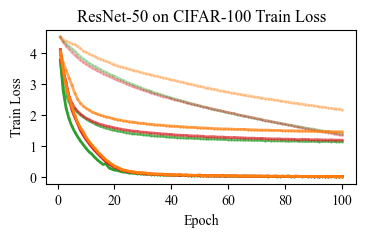

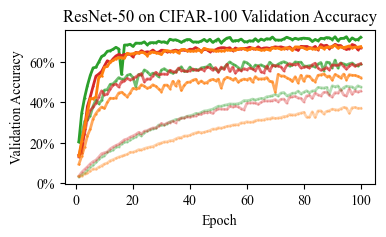

In [38]:
model="ResNet-50"
dataset="CIFAR-100"
plot_loss(model=model, dataset=dataset, show=True)
plot_acc(model=model, dataset=dataset, show=True)

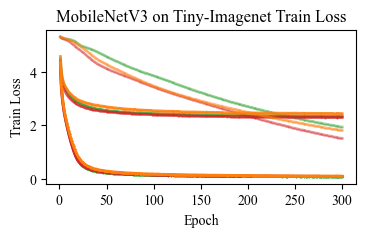

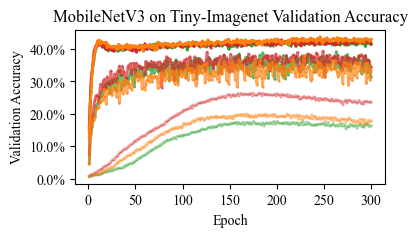

In [39]:
model="MobileNetV3"
dataset="Tiny-Imagenet"
plot_loss(model=model, dataset=dataset, show=True)
plot_acc(model=model, dataset=dataset, show=True)

SGD fail


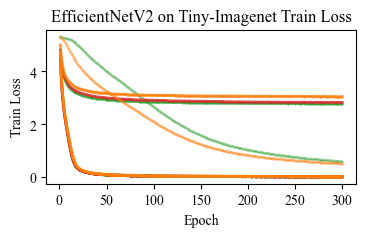

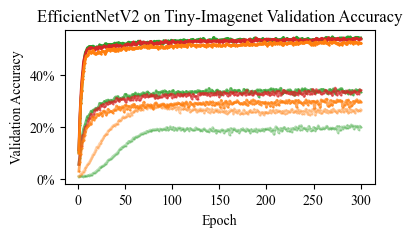

In [40]:
model="EfficientNetV2"
dataset="Tiny-Imagenet"
plot_loss(model=model, dataset=dataset, show=True)
plot_acc(model=model, dataset=dataset, show=True)

SGD fail
Adam fail
AdamW fail


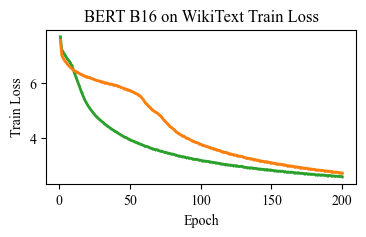

SGD fail
Adam fail


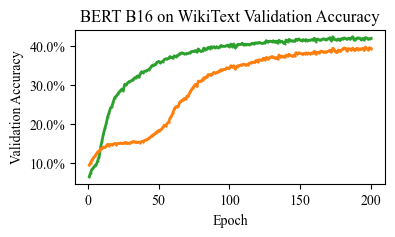

In [25]:
model="BERT B16"
dataset="WikiText"
plot_loss(model=model, dataset=dataset, show=True)
plot_acc(model=model, dataset=dataset, show=True)

In [41]:
plot_legend()

<Figure size 400x200 with 0 Axes>